In [2]:
%pylab inline
import pandas as pd
import fastparquet 
import os,sys

Populating the interactive namespace from numpy and matplotlib


In [3]:
sys.path.insert(0,"/mnt/lanlep2019/src/main")

In [4]:
!ln -s /mnt/lanlep2019 ~/

ln: failed to create symbolic link ‘/home/hadoop/lanlep2019’: File exists


In [5]:
os.chdir("/mnt/lanlep2019/")

In [6]:
!pwd

/mnt/lanlep2019


# once

In [7]:
!pip install hyperopt


    100% |████████████████████████████████| 122kB 3.4MB/s ta 0:00:01
    100% |████████████████████████████████| 829kB 1.5MB/s eta 0:00:011
    100% |████████████████████████████████| 1.7MB 870kB/s eta 0:00:011
    100% |████████████████████████████████| 419kB 3.3MB/s  eta 0:00:01
  Running setup.py bdist_wheel for future ... done
  Stored in directory: /home/hadoop/.cache/pip/wheels/0c/61/d2/d6b7317325828fbb39ee6ad559dbe4664d0896da4721bf379e
  Running setup.py bdist_wheel for networkx ... done
  Stored in directory: /home/hadoop/.cache/pip/wheels/68/f8/29/b53346a112a07d30a5a84d53f19aeadaa1a474897c0423af91
Successfully built future networkx
You are using pip version 9.0.1, however version 19.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


# data

In [7]:
import catboost as cat

In [8]:
import data
import config

In [9]:
reload (data)

<module 'data' from '/mnt/lanlep2019/src/main/data.pyc'>

In [10]:
if 1:
    strategy = {'type':'byquake', "test_quakes":[[ 9,  4,  6] , [15,  1,  5], [10, 14,  3],  [7, 11,  2],  [8, 13, 12]]}
    types=['kaggle','signal','kaggle2'] +['fwv','fwvext']+['fwvsoftmax','fwvdis','fwvdis2','fwvcos']+\
        ['fwvextsoftmax','fwvextdis','fwvextdis2','fwvextcos'] + ['fwvwholereg', 'fwvextwholereg']
    traintest = data.TrainTest('dense', coverages=None, types=types, transform=None, valid_strategy=strategy)

In [11]:
traintest.num_dataset()

5

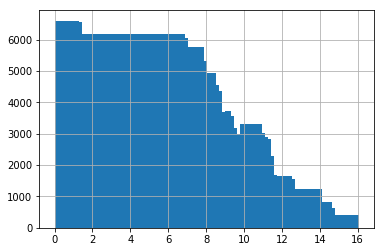

In [12]:
traintest.ydf.hist(bins=100);

In [13]:
np.abs(traintest.ydf-traintest.ydf.median()).mean()

3.02918898210172

In [14]:
testdf=traintest.get_test_data()
testdf.shape

(2624, 450)

In [15]:
datadf=traintest.traindf
datadf.head()

mean        std    max    min  mean_change_abs  \
index                                                                      
quake_03_0200_105000  4.364120   6.262442  119.0 -119.0         0.000000   
quake_06_0120_099000  4.220713  10.566183  328.0 -282.0         0.000007   
quake_07_0296_013500  4.430427   7.501472  159.0 -116.0        -0.000007   
quake_03_0090_034500  4.798247   4.658487  108.0  -76.0         0.000013   
quake_08_0137_055500  4.691327   5.605683  172.0 -171.0        -0.000007   

                      mean_change_rate  abs_max  abs_min  std_first_50000  \
index                                                                       
quake_03_0200_105000      75149.867188    119.0      0.0         4.398645   
quake_06_0120_099000      75124.750000    328.0      0.0         4.937372   
quake_07_0296_013500      74910.898438    159.0      0.0         7.806824   
quake_03_0090_034500      74906.742188    108.0      0.0         5.020636   
quake_08_0137_055500      74864.296875    172.0      0.0         7.771729   

                      std_last_50000       ...         fwvextdis_pca10_2  \
index                                      ...                             
quake_03_0200_105000        7.115628       ...                 -0.867152   
quake_06_0120_099000       17.188982       ...                  0.599042   
quake_07_0296_013500        8.044850       ...                  0.276776   
quake_03_0090_034500        4.439272       ...                 -1.211162   
quake_08_0137_055500        4.222545       ...                 -1.418130   

                      fwvextdis_pca10_3  fwvextdis_pca10_4  fwvextdis_pca10_5  \
index                                                                           
quake_03_0200_105000           0.251729           0.083587           0.029462   
quake_06_0120_099000          -0.058171          -0.059255           0.019930   
quake_07_0296_013500          -0.041059           0.105883           0.042710   
quake_03_0090_034500           0.021516          -0.055162           0.053457   
quake_08_0137_055500          -0.099060          -0.037935          -0.052247   

                      fwvextdis_pca10_6  fwvextdis_pca10_7  fwvextdis_pca10_8  \
index                                                                           
quake_03_0200_105000          -0.022975          -0.039655           0.000274   
quake_06_0120_099000           0.002073           0.007824          -0.008991   
quake_07_0296_013500          -0.009792          -0.018473           0.035101   
quake_03_0090_034500          -0.030760          -0.066036           0.022193   
quake_08_0137_055500           0.054380          -0.019536           0.042780   

                      fwvextdis_pca10_9  fwv_wholereg  fwvext_wholereg  
index                                                                   
quake_03_0200_105000           0.028007     93.940635        -6.822180  
quake_06_0120_099000           0.020008     20.000997       -12.672698  
quake_07_0296_013500          -0.005669     37.947210       -38.633617  
quake_03_0090_034500           0.016614     80.679887        11.746026  
quake_08_0137_055500           0.010705     53.077711         4.727631  

[5 rows x 450 columns]

In [16]:
ydf=traintest.ydf
ydf.head()

index
quake_03_0200_105000    0.998098
quake_06_0120_099000    2.318898
quake_07_0296_013500    4.532197
quake_03_0090_034500    5.302996
quake_08_0137_055500    2.514399
Name: y, dtype: float64

In [17]:
qdf=pd.DataFrame(datadf.index.map(lambda u: u.split("_")[1]).astype(np.int8),index=datadf.index)
qdf.head()

index
index                      
quake_03_0200_105000      3
quake_06_0120_099000      6
quake_07_0296_013500      7
quake_03_0090_034500      3
quake_08_0137_055500      8

In [18]:
qdf['index'].value_counts().to_frame().sort_index().T

0      1      2      3      4      5      6      7      8      9   \
index  3672  29520  36295  22631  32480  20574  18018  41240  20192  24635   

          10     11     12     13     14     15    16  
index  29228  28196  22560  21885  37761  24179  4674

In [19]:
qdf.shape,ydf.shape,datadf.shape

((417740, 1), (417740,), (417740, 450))

In [20]:
quakes=range(1,16)
quakes

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

In [21]:
idx=qdf['index'].isin(set(quakes)).values
ydf=ydf[idx]
qdf=qdf[idx]
datadf=datadf[idx]

In [22]:
qdf.shape,ydf.shape,datadf.shape

((409394, 1), (409394,), (409394, 450))

In [23]:
quake_duration= config.quake_length
quake_duration

{1: 11.540566395569977,
 2: 14.180203599212305,
 3: 8.856243408447243,
 4: 12.693878224447909,
 5: 8.05509606419685,
 6: 7.059247509412199,
 7: 16.107000305270187,
 8: 7.906144318432936,
 9: 9.637176132666621,
 10: 11.4267247041647,
 11: 11.0245547308509,
 12: 8.828581201128031,
 13: 8.565787763958841,
 14: 14.7515396785698,
 15: 9.459497978791095}

In [24]:
for qno in quakes:
    r=11/quake_duration[qno]
    print qno, r
    ydf.loc[qdf['index']==qno] *= r

1 0.95315945708
2 0.775729341475
3 1.24206161605
4 0.866559439558
5 1.36559513534
6 1.55823973948
7 0.682932873379
8 1.39132294542
9 1.14141319496
10 0.962655553957
11 0.997772723575
12 1.24595331338
13 1.28417844373
14 0.745684873558
15 1.16285240767


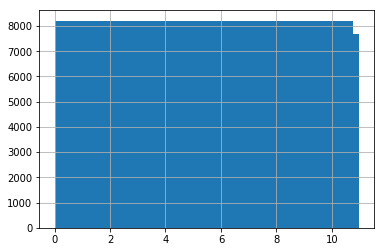

In [25]:
ydf.hist(bins=50);

In [26]:
import utils
n_thread= utils.get_num_thread()
n_thread

35

In [27]:
from hyperopt import fmin, tpe, hp


In [28]:
w={k:v/np.mean(config.quake_weights.values()) for k,v in config.quake_weights.items()}
wdf=qdf['index'].map(lambda u: w[u])
wdf.head()

index
quake_03_0200_105000    0.416667
quake_06_0120_099000    0.416667
quake_07_0296_013500    1.111111
quake_03_0090_034500    0.416667
quake_08_0137_055500    0.416667
Name: index, dtype: float64

In [29]:
def train_quake(qno,params,n_thread):
    assert(qno in quakes)
    print 'valid quake', qno
    teidx=(qdf['index']==qno).values
    tridx=~qdf['index'].isin({qno,0,16}).values
    
    Xtr,ytr,Xte,yte=datadf[tridx],ydf[tridx],datadf[teidx],ydf[teidx]
    Wtr,Wte=wdf[tridx],wdf[teidx]
    Xtr,ytr,Xte,yte, Wtr, Wte=[u.values for u in [Xtr,ytr,Xte,yte, Wtr,Wte]]
    print Xtr.shape,ytr.shape,Xte.shape,yte.shape
    train_pool=cat.Pool(Xtr,ytr)
    valid_pool=cat.Pool(Xte,yte)
    model = cat.CatBoostRegressor(iterations = 5000, thread_count = n_thread, **params)
    model.fit(train_pool,eval_set=valid_pool,use_best_model=True)            
    a =  model.get_best_score()
    return a['validation_0']['MAE'], model.get_best_iteration()

In [30]:
params = {'objective':"MAE",
          'max_depth':8, 
          'learning_rate':0.03,
          'border_count':128,
          'l2_leaf_reg':2,
           "colsample_bylevel":0.7,
            'leaf_estimation_method':'Gradient',
          #'min_data_in_leaf' : 1,
          'metric_period' : 100,
          'early_stopping_rounds': 100,
          'eval_metric':'MAE',
            #'fold_len_multiplier':[1.05,1.5,2], 
            #'bagging_temperature':[1,0.75,0.5]
            #,'random_strength':[0.5,1,1.5],
           }

In [31]:
best_mae=1e10

In [32]:
def lgbcv(learning_rate, border_count,l2_leaf_reg,max_depth,
          colsample_bylevel):
    d=locals()
    newparams=params.copy()
    newparams.update(d)    
    newparams['border_count']=int(border_count)
    newparams['max_depth']=int(max_depth)
    #newparams['min_data_in_leaf']=int(min_data_in_leaf)
    scores=[]
    validScores={}
    for qno in quakes:
        s=train_quake(qno,newparams,n_thread)
        print "quake ", qno,s
        validScores[qno]=s
        scores.append(s[0])
    r=np.mean(scores)
    global best_mae
    if best_mae>r: best_mae=r
    print "mean score", r
    return r

In [36]:
space={
   'border_count': hp.loguniform('border_count', np.log(32),np.log(128) ),
    'l2_leaf_reg':hp.loguniform('l2_leaf_reg', np.log(0.01),np.log(10) ),
    'max_depth':hp.uniform('max_depth',  3,10 ),
    'colsample_bylevel':hp.uniform('colsample_bylevel',  0.3,1 ),
#    'min_data_in_leaf':hp.loguniform('min_data_in_leaf', np.log(5),np.log(3000) ),
    'learning_rate':hp.loguniform('learning_rate', np.log(5*1e-3),np.log(0.1) ),
}

In [37]:
def objective(args):
    print args
    return lgbcv(**args)



In [38]:
best = fmin(fn=objective,
    space=space,
    algo=tpe.suggest,
    max_evals=100)
print best

{'learning_rate': 0.024373040789112493, 'l2_leaf_reg': 0.011110640200325062, 'border_count': 79.1880169868182, 'max_depth': 3.922221926934301, 'colsample_bylevel': 0.6407702181723893}
valid quake                                          
1                                                    
(379874, 450)                                        
(379874,)                                            
(29520, 450)                                         
(29520,)                                             
0:	learn: 5.4680418	test: 5.4697789	best: 5.4697789 (0)	total: 36.7ms	remaining: 3m 3s

  0%|          | 0/100 [00:18<?, ?it/s, best loss: ?]

100:	learn: 4.4527836	test: 4.4441492	best: 4.4441492 (100)	total: 3.44s	remaining: 2m 46s

200:	learn: 3.6905809	test: 3.6547220	best: 3.6547220 (200)	total: 7.03s	remaining: 2m 47s

300:	learn: 3.0507191	test: 3.0051558	best: 3.0051558 (300)	total: 10.6s	remaining: 2m 45s

400:	learn: 2.5006272	test: 2.5286457	best: 2.5286457 (400)	total: 14.2s	remaining: 2m 43s

500:	learn: 2.0442360	test: 2.1539976	best: 2.1539976 (500)	total: 17.8s	remaining: 2m 40s

600:	learn: 1.6829948	test: 1.8368569	best: 1.8368569 (600)	total: 21.4s	remaining: 2m 36s

700:	learn: 1.4134237	test: 1.5798235	best: 1.5798235 (700)	total: 25s	remaining: 2m 33s

800:	learn: 1.2362515	test: 1.3837885	best: 1.3837885 (800)	total: 28.5s	remaining: 2m 29s

900:	learn: 1.1235719	test: 1.2455827	best: 1.2455827 (900)	total: 31.9s	remaining: 2m 25s

1000:	learn: 1.0901349	test: 1.2035552	best: 1.2035552 (1000)	total: 35.3s	remaining: 2m 21s

1100:	learn: 1.0820771	test: 1.1966029	best: 1.1966029 (1100)	total: 38.9s	remai

100:	learn: 4.4510516	test: 4.4700545	best: 4.4700545 (100)	total: 3.37s	remaining: 2m 43s

200:	learn: 3.6875252	test: 3.7274567	best: 3.7274567 (200)	total: 6.79s	remaining: 2m 42s

300:	learn: 3.0486048	test: 3.1142011	best: 3.1142011 (300)	total: 10.3s	remaining: 2m 41s

400:	learn: 2.5022646	test: 2.6231428	best: 2.6231428 (400)	total: 14.1s	remaining: 2m 41s

500:	learn: 2.0421631	test: 2.2422899	best: 2.2422899 (500)	total: 17.7s	remaining: 2m 39s

600:	learn: 1.6754507	test: 1.9407340	best: 1.9407340 (600)	total: 21.3s	remaining: 2m 35s

700:	learn: 1.4040847	test: 1.6982262	best: 1.6982262 (700)	total: 24.9s	remaining: 2m 32s

800:	learn: 1.2267362	test: 1.5087699	best: 1.5087699 (800)	total: 28.3s	remaining: 2m 28s

900:	learn: 1.1153412	test: 1.3765067	best: 1.3765067 (900)	total: 31.7s	remaining: 2m 24s

1000:	learn: 1.0834124	test: 1.3295176	best: 1.3295176 (1000)	total: 35s	remaining: 2m 19s

1100:	learn: 1.0759996	test: 1.3182080	best: 1.3182080 (1100)	total: 38.5s	remai

100:	learn: 4.4513214	test: 4.4479086	best: 4.4479086 (100)	total: 3.38s	remaining: 2m 44s

200:	learn: 3.6871107	test: 3.6727950	best: 3.6727950 (200)	total: 6.85s	remaining: 2m 43s

300:	learn: 3.0506711	test: 3.0017449	best: 3.0017449 (300)	total: 10.6s	remaining: 2m 45s

400:	learn: 2.5123942	test: 2.4312427	best: 2.4312427 (400)	total: 14.4s	remaining: 2m 44s

500:	learn: 2.0663609	test: 1.9299402	best: 1.9299402 (500)	total: 18.1s	remaining: 2m 42s

600:	learn: 1.7092664	test: 1.5078877	best: 1.5078877 (600)	total: 21.7s	remaining: 2m 39s

700:	learn: 1.4416657	test: 1.1764970	best: 1.1764970 (700)	total: 25.4s	remaining: 2m 35s

800:	learn: 1.2644287	test: 0.9503275	best: 0.9503275 (800)	total: 29s	remaining: 2m 31s

900:	learn: 1.1489172	test: 0.8340357	best: 0.8340357 (900)	total: 32.5s	remaining: 2m 27s

1000:	learn: 1.1138196	test: 0.8412572	best: 0.8300820 (923)	total: 35.9s	remaining: 2m 23s

Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8300820094  

100:	learn: 4.4506453	test: 4.4689484	best: 4.4689484 (100)	total: 3.4s	remaining: 2m 44s

200:	learn: 3.6848394	test: 3.7391406	best: 3.7391406 (200)	total: 6.84s	remaining: 2m 43s

300:	learn: 3.0421995	test: 3.1386719	best: 3.1386719 (300)	total: 10.3s	remaining: 2m 40s

400:	learn: 2.4989969	test: 2.6353303	best: 2.6353303 (400)	total: 13.8s	remaining: 2m 38s

500:	learn: 2.0482644	test: 2.2013878	best: 2.2013878 (500)	total: 17.5s	remaining: 2m 37s

600:	learn: 1.6906940	test: 1.8285926	best: 1.8285926 (600)	total: 21.3s	remaining: 2m 35s

700:	learn: 1.4227973	test: 1.5350164	best: 1.5350164 (700)	total: 24.9s	remaining: 2m 32s

800:	learn: 1.2465774	test: 1.3285092	best: 1.3285092 (800)	total: 28.4s	remaining: 2m 28s

900:	learn: 1.1359082	test: 1.1832761	best: 1.1832761 (900)	total: 31.7s	remaining: 2m 24s

1000:	learn: 1.1038438	test: 1.1195401	best: 1.1195401 (1000)	total: 35.1s	remaining: 2m 20s

1100:	learn: 1.0961838	test: 1.1004449	best: 1.1004449 (1100)	total: 38.6s	rema

100:	learn: 4.4507933	test: 4.4381823	best: 4.4381823 (100)	total: 3.47s	remaining: 2m 48s

200:	learn: 3.6830975	test: 3.6372202	best: 3.6372202 (200)	total: 6.97s	remaining: 2m 46s

300:	learn: 3.0418806	test: 2.9767067	best: 2.9767067 (300)	total: 10.6s	remaining: 2m 45s

400:	learn: 2.5015555	test: 2.4062507	best: 2.4062507 (400)	total: 14.3s	remaining: 2m 44s

500:	learn: 2.0524475	test: 1.9490687	best: 1.9490687 (500)	total: 18.2s	remaining: 2m 43s

600:	learn: 1.6899088	test: 1.6391218	best: 1.6391218 (600)	total: 21.8s	remaining: 2m 39s

700:	learn: 1.4175014	test: 1.4314360	best: 1.4314360 (700)	total: 25.5s	remaining: 2m 36s

800:	learn: 1.2406273	test: 1.3096024	best: 1.3096024 (800)	total: 29s	remaining: 2m 31s

900:	learn: 1.1286179	test: 1.2279561	best: 1.2279561 (900)	total: 32.4s	remaining: 2m 27s

1000:	learn: 1.0943391	test: 1.2261139	best: 1.2171936 (951)	total: 35.8s	remaining: 2m 23s

Stopped by overfitting detector  (100 iterations wait)

bestTest = 1.217193646   

100:	learn: 4.4520550	test: 4.4229750	best: 4.4229750 (100)	total: 3.45s	remaining: 2m 47s

200:	learn: 3.6855589	test: 3.6337268	best: 3.6337268 (200)	total: 6.95s	remaining: 2m 45s

300:	learn: 3.0417908	test: 3.0054199	best: 3.0054199 (300)	total: 10.6s	remaining: 2m 45s

400:	learn: 2.4995454	test: 2.4732913	best: 2.4732913 (400)	total: 14.3s	remaining: 2m 44s

500:	learn: 2.0519283	test: 2.0323669	best: 2.0323669 (500)	total: 18s	remaining: 2m 42s

600:	learn: 1.6925675	test: 1.6818963	best: 1.6818963 (600)	total: 21.7s	remaining: 2m 39s

700:	learn: 1.4178176	test: 1.4768369	best: 1.4768369 (700)	total: 25.4s	remaining: 2m 35s

800:	learn: 1.2346002	test: 1.4055069	best: 1.4055069 (800)	total: 29.2s	remaining: 2m 33s

900:	learn: 1.1219108	test: 1.3482911	best: 1.3482911 (900)	total: 32.6s	remaining: 2m 28s

1000:	learn: 1.0901827	test: 1.3435480	best: 1.3421337 (970)	total: 36.1s	remaining: 2m 24s

Stopped by overfitting detector  (100 iterations wait)

bestTest = 1.342133728   

100:	learn: 4.4509822	test: 4.4678598	best: 4.4678598 (100)	total: 3.39s	remaining: 2m 44s

200:	learn: 3.6895967	test: 3.7172268	best: 3.7172268 (200)	total: 6.97s	remaining: 2m 46s

300:	learn: 3.0531574	test: 3.0840682	best: 3.0840682 (300)	total: 10.5s	remaining: 2m 43s

400:	learn: 2.5123319	test: 2.5493514	best: 2.5493514 (400)	total: 14.4s	remaining: 2m 44s

500:	learn: 2.0578848	test: 2.1244678	best: 2.1244678 (500)	total: 18.3s	remaining: 2m 44s

600:	learn: 1.6824184	test: 1.8594228	best: 1.8594228 (600)	total: 22.1s	remaining: 2m 41s

700:	learn: 1.4064713	test: 1.6435345	best: 1.6435345 (700)	total: 25.6s	remaining: 2m 36s

800:	learn: 1.2267510	test: 1.4840823	best: 1.4840823 (800)	total: 29s	remaining: 2m 31s

900:	learn: 1.1094576	test: 1.3974613	best: 1.3974613 (900)	total: 32.3s	remaining: 2m 27s

1000:	learn: 1.0743532	test: 1.3683784	best: 1.3683784 (1000)	total: 35.7s	remaining: 2m 22s

1100:	learn: 1.0667149	test: 1.3625838	best: 1.3625277 (1099)	total: 39.2s	remai

100:	learn: 4.4527833	test: 4.4212254	best: 4.4212254 (100)	total: 3.43s	remaining: 2m 46s

200:	learn: 3.6868310	test: 3.6102195	best: 3.6102195 (200)	total: 6.9s	remaining: 2m 44s

300:	learn: 3.0465036	test: 2.9216926	best: 2.9216926 (300)	total: 10.6s	remaining: 2m 45s

400:	learn: 2.5032041	test: 2.3707639	best: 2.3707639 (400)	total: 14.3s	remaining: 2m 43s

500:	learn: 2.0503181	test: 1.9593498	best: 1.9593498 (500)	total: 18s	remaining: 2m 41s

600:	learn: 1.6879297	test: 1.6555475	best: 1.6555475 (600)	total: 21.6s	remaining: 2m 38s

700:	learn: 1.4138450	test: 1.4626215	best: 1.4626215 (700)	total: 25.2s	remaining: 2m 34s

800:	learn: 1.2348517	test: 1.3409203	best: 1.3409203 (800)	total: 28.8s	remaining: 2m 30s

900:	learn: 1.1203094	test: 1.2860737	best: 1.2852595 (891)	total: 32.2s	remaining: 2m 26s

Stopped by overfitting detector  (100 iterations wait)

bestTest = 1.285259541                               

bestIteration = 891                                  

Shrink mo

100:	learn: 4.4513367	test: 4.4476318	best: 4.4476318 (100)	total: 3.46s	remaining: 2m 47s

200:	learn: 3.6852631	test: 3.6908440	best: 3.6908440 (200)	total: 6.96s	remaining: 2m 46s

300:	learn: 3.0494004	test: 3.0335721	best: 3.0335721 (300)	total: 10.6s	remaining: 2m 45s

400:	learn: 2.5125090	test: 2.4558401	best: 2.4558401 (400)	total: 14.3s	remaining: 2m 44s

500:	learn: 2.0680445	test: 1.9381623	best: 1.9381623 (500)	total: 18s	remaining: 2m 41s

600:	learn: 1.7111128	test: 1.5175127	best: 1.5175127 (600)	total: 21.8s	remaining: 2m 39s

700:	learn: 1.4430354	test: 1.1964863	best: 1.1964863 (700)	total: 25.5s	remaining: 2m 36s

800:	learn: 1.2628386	test: 1.0167487	best: 1.0167487 (800)	total: 29.1s	remaining: 2m 32s

900:	learn: 1.1473847	test: 0.9336840	best: 0.9336840 (900)	total: 32.5s	remaining: 2m 27s

1000:	learn: 1.1134388	test: 0.9029083	best: 0.9028536 (999)	total: 36s	remaining: 2m 23s

1100:	learn: 1.1057262	test: 0.9001822	best: 0.8999594 (1090)	total: 39.5s	remainin

100:	learn: 4.4520324	test: 4.4530844	best: 4.4530844 (100)	total: 3.44s	remaining: 2m 46s

200:	learn: 3.6856093	test: 3.7118281	best: 3.7118281 (200)	total: 6.91s	remaining: 2m 44s

300:	learn: 3.0451087	test: 3.0915157	best: 3.0915157 (300)	total: 10.5s	remaining: 2m 43s

400:	learn: 2.5048428	test: 2.5473743	best: 2.5473743 (400)	total: 14.3s	remaining: 2m 44s

500:	learn: 2.0567496	test: 2.0780808	best: 2.0780808 (500)	total: 18s	remaining: 2m 41s

600:	learn: 1.6983947	test: 1.6949459	best: 1.6949459 (600)	total: 21.6s	remaining: 2m 38s

700:	learn: 1.4307507	test: 1.3966950	best: 1.3966950 (700)	total: 25.2s	remaining: 2m 34s

800:	learn: 1.2533652	test: 1.1937514	best: 1.1937514 (800)	total: 28.7s	remaining: 2m 30s

900:	learn: 1.1399493	test: 1.0782555	best: 1.0782555 (900)	total: 32.1s	remaining: 2m 25s

1000:	learn: 1.1084137	test: 1.0286194	best: 1.0286194 (1000)	total: 35.5s	remaining: 2m 21s

1100:	learn: 1.1008048	test: 1.0136503	best: 1.0136503 (1100)	total: 38.9s	remai

100:	learn: 4.4513079	test: 4.4566021	best: 4.4566021 (100)	total: 3.59s	remaining: 2m 54s

200:	learn: 3.6842982	test: 3.7155737	best: 3.7155737 (200)	total: 6.91s	remaining: 2m 45s

300:	learn: 3.0443810	test: 3.0984078	best: 3.0984078 (300)	total: 10.5s	remaining: 2m 43s

400:	learn: 2.5042989	test: 2.5706337	best: 2.5706337 (400)	total: 14.1s	remaining: 2m 42s

500:	learn: 2.0563370	test: 2.1113363	best: 2.1113363 (500)	total: 17.8s	remaining: 2m 40s

600:	learn: 1.6987180	test: 1.7203370	best: 1.7203370 (600)	total: 21.5s	remaining: 2m 37s

700:	learn: 1.4309087	test: 1.4141047	best: 1.4141047 (700)	total: 25.1s	remaining: 2m 33s

800:	learn: 1.2534203	test: 1.2111174	best: 1.2111174 (800)	total: 28.6s	remaining: 2m 30s

900:	learn: 1.1413239	test: 1.0791514	best: 1.0791514 (900)	total: 32s	remaining: 2m 25s

1000:	learn: 1.1099859	test: 1.0225851	best: 1.0225851 (1000)	total: 35.5s	remaining: 2m 21s

1100:	learn: 1.1024868	test: 1.0098269	best: 1.0098269 (1100)	total: 39.1s	remai

100:	learn: 4.4509051	test: 4.4515482	best: 4.4515482 (100)	total: 3.59s	remaining: 2m 53s

200:	learn: 3.6878942	test: 3.6434882	best: 3.6434882 (200)	total: 7.15s	remaining: 2m 50s

300:	learn: 3.0509050	test: 2.9545758	best: 2.9545758 (300)	total: 10.7s	remaining: 2m 47s

400:	learn: 2.5122266	test: 2.3732421	best: 2.3732421 (400)	total: 14.5s	remaining: 2m 45s

500:	learn: 2.0671165	test: 1.8573114	best: 1.8573114 (500)	total: 18.2s	remaining: 2m 43s

600:	learn: 1.7098810	test: 1.4433489	best: 1.4433489 (600)	total: 21.8s	remaining: 2m 39s

700:	learn: 1.4393675	test: 1.1660671	best: 1.1660671 (700)	total: 25.5s	remaining: 2m 36s

800:	learn: 1.2604862	test: 0.9946312	best: 0.9946312 (800)	total: 29s	remaining: 2m 32s

900:	learn: 1.1456201	test: 0.8834370	best: 0.8834370 (900)	total: 32.5s	remaining: 2m 27s

1000:	learn: 1.1098092	test: 0.8897866	best: 0.8779286 (923)	total: 35.9s	remaining: 2m 23s

Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8779285502  

100:	learn: 4.4512125	test: 4.4371373	best: 4.4371373 (100)	total: 3.47s	remaining: 2m 48s

200:	learn: 3.6853252	test: 3.6463509	best: 3.6463509 (200)	total: 6.97s	remaining: 2m 46s

300:	learn: 3.0467474	test: 2.9823620	best: 2.9823620 (300)	total: 10.6s	remaining: 2m 45s

400:	learn: 2.5075187	test: 2.4190928	best: 2.4190928 (400)	total: 14.3s	remaining: 2m 44s

500:	learn: 2.0626062	test: 1.9211208	best: 1.9211208 (500)	total: 18.2s	remaining: 2m 43s

600:	learn: 1.7074990	test: 1.4814473	best: 1.4814473 (600)	total: 21.9s	remaining: 2m 39s

700:	learn: 1.4313583	test: 1.2268466	best: 1.2268466 (700)	total: 25.5s	remaining: 2m 36s

800:	learn: 1.2449268	test: 1.1387308	best: 1.1387308 (800)	total: 29.1s	remaining: 2m 32s

900:	learn: 1.1328753	test: 1.0673803	best: 1.0673803 (900)	total: 32.5s	remaining: 2m 27s

1000:	learn: 1.1003279	test: 1.0579940	best: 1.0507560 (948)	total: 35.9s	remaining: 2m 23s

Stopped by overfitting detector  (100 iterations wait)

bestTest = 1.050756034 

100:	learn: 4.4485437	test: 4.4798857	best: 4.4798857 (100)	total: 3.34s	remaining: 2m 42s

200:	learn: 3.6776788	test: 3.7927964	best: 3.7927964 (200)	total: 6.7s	remaining: 2m 40s

300:	learn: 3.0323922	test: 3.2399086	best: 3.2399086 (300)	total: 10.2s	remaining: 2m 38s

400:	learn: 2.4895189	test: 2.7632930	best: 2.7632930 (400)	total: 13.7s	remaining: 2m 36s

500:	learn: 2.0358072	test: 2.3637434	best: 2.3637434 (500)	total: 17.3s	remaining: 2m 34s

600:	learn: 1.6707976	test: 2.0378322	best: 2.0378322 (600)	total: 20.8s	remaining: 2m 32s

700:	learn: 1.3966071	test: 1.7967216	best: 1.7967216 (700)	total: 24.3s	remaining: 2m 29s

800:	learn: 1.2144783	test: 1.6371306	best: 1.6371306 (800)	total: 27.9s	remaining: 2m 26s

900:	learn: 1.0996971	test: 1.5317243	best: 1.5317243 (900)	total: 31.3s	remaining: 2m 22s

1000:	learn: 1.0678075	test: 1.4818690	best: 1.4818690 (1000)	total: 34.6s	remaining: 2m 18s

1100:	learn: 1.0600389	test: 1.4653583	best: 1.4653583 (1100)	total: 37.9s	rema

100:	learn: 4.4500953	test: 4.4610043	best: 4.4610043 (100)	total: 3.44s	remaining: 2m 46s

200:	learn: 3.6809278	test: 3.7111381	best: 3.7111381 (200)	total: 7.07s	remaining: 2m 48s

300:	learn: 3.0356064	test: 3.1192949	best: 3.1192949 (300)	total: 10.6s	remaining: 2m 45s

400:	learn: 2.4966326	test: 2.5854558	best: 2.5854558 (400)	total: 14.2s	remaining: 2m 43s

500:	learn: 2.0516822	test: 2.1295178	best: 2.1295178 (500)	total: 17.9s	remaining: 2m 40s

600:	learn: 1.6943948	test: 1.7881979	best: 1.7881979 (600)	total: 21.5s	remaining: 2m 37s

700:	learn: 1.4275379	test: 1.5071787	best: 1.5071787 (700)	total: 25.1s	remaining: 2m 34s

800:	learn: 1.2518990	test: 1.2833373	best: 1.2833373 (800)	total: 28.7s	remaining: 2m 30s

900:	learn: 1.1393746	test: 1.1262738	best: 1.1262738 (900)	total: 32s	remaining: 2m 25s

1000:	learn: 1.1023914	test: 1.0930781	best: 1.0930781 (1000)	total: 35.4s	remaining: 2m 21s

1100:	learn: 1.0939802	test: 1.1036020	best: 1.0925029 (1011)	total: 38.9s	remai

100:	learn: 3.4378923	test: 3.4026463	best: 3.4026463 (100)	total: 7.84s	remaining: 6m 20s

200:	learn: 2.1254209	test: 2.2226868	best: 2.2226868 (200)	total: 16.3s	remaining: 6m 28s

300:	learn: 1.3294019	test: 1.5275921	best: 1.5275921 (300)	total: 24.6s	remaining: 6m 24s

400:	learn: 1.0206620	test: 1.2145400	best: 1.2145400 (400)	total: 32.4s	remaining: 6m 11s

500:	learn: 0.9599948	test: 1.2010696	best: 1.2005989 (494)	total: 39.9s	remaining: 5m 57s

Stopped by overfitting detector  (100 iterations wait)                        

bestTest = 1.200598932                                                        

bestIteration = 494                                                           

Shrink model to first 495 iterations.                                         
quake                                                                         
1                                                                             
(1.2005989315155288, 494)                                      

100:	learn: 3.4371102	test: 3.4844910	best: 3.4844910 (100)	total: 7.75s	remaining: 6m 16s

200:	learn: 2.1228739	test: 2.3264977	best: 2.3264977 (200)	total: 16s	remaining: 6m 21s

300:	learn: 1.3229259	test: 1.6820744	best: 1.6820744 (300)	total: 24.3s	remaining: 6m 19s

400:	learn: 1.0144205	test: 1.3721127	best: 1.3721127 (400)	total: 31.9s	remaining: 6m 5s

500:	learn: 0.9522804	test: 1.3444192	best: 1.3444192 (500)	total: 39.4s	remaining: 5m 53s

600:	learn: 0.9070470	test: 1.3430235	best: 1.3422258 (581)	total: 46.7s	remaining: 5m 41s

700:	learn: 0.8665183	test: 1.3448043	best: 1.3420326 (607)	total: 54.3s	remaining: 5m 32s

Stopped by overfitting detector  (100 iterations wait)                        

bestTest = 1.342032638                                                        

bestIteration = 607                                                           

Shrink model to first 608 iterations.                                         
quake                                   

100:	learn: 3.4371349	test: 3.4204634	best: 3.4204634 (100)	total: 7.81s	remaining: 6m 18s

200:	learn: 2.1465127	test: 2.0349935	best: 2.0349935 (200)	total: 16.4s	remaining: 6m 31s

300:	learn: 1.3574602	test: 1.1146166	best: 1.1146166 (300)	total: 24.8s	remaining: 6m 27s

400:	learn: 1.0428813	test: 0.8208348	best: 0.8202459 (391)	total: 32.7s	remaining: 6m 15s

Stopped by overfitting detector  (100 iterations wait)                        

bestTest = 0.8202459147                                                       

bestIteration = 391                                                           

Shrink model to first 392 iterations.                                         
quake                                                                         
3                                                                             
(0.8202459146877454, 391)                                                     
valid quake                                                                 

100:	learn: 3.4306998	test: 3.5299714	best: 3.5299714 (100)	total: 7.69s	remaining: 6m 12s

200:	learn: 2.1278395	test: 2.3284920	best: 2.3284920 (200)	total: 16s	remaining: 6m 21s

300:	learn: 1.3384013	test: 1.5216277	best: 1.5216277 (300)	total: 24.2s	remaining: 6m 18s

400:	learn: 1.0302212	test: 1.1684332	best: 1.1684332 (400)	total: 32s	remaining: 6m 6s

500:	learn: 0.9687029	test: 1.1366326	best: 1.1366326 (500)	total: 39.4s	remaining: 5m 53s

600:	learn: 0.9239179	test: 1.1336136	best: 1.1327193 (559)	total: 46.8s	remaining: 5m 42s

700:	learn: 0.8831799	test: 1.1305129	best: 1.1297122 (672)	total: 54.3s	remaining: 5m 33s

Stopped by overfitting detector  (100 iterations wait)                        

bestTest = 1.129712247                                                        

bestIteration = 672                                                           

Shrink model to first 673 iterations.                                         
quake                                     

100:	learn: 3.4329986	test: 3.4073856	best: 3.4073856 (100)	total: 7.98s	remaining: 6m 27s

200:	learn: 2.1318396	test: 2.0933227	best: 2.0933227 (200)	total: 16.7s	remaining: 6m 37s

300:	learn: 1.3313168	test: 1.4717657	best: 1.4717657 (300)	total: 25s	remaining: 6m 30s

400:	learn: 1.0258280	test: 1.3114787	best: 1.3114787 (400)	total: 32.9s	remaining: 6m 17s

500:	learn: 0.9659922	test: 1.3190704	best: 1.3109268 (403)	total: 40.5s	remaining: 6m 3s

Stopped by overfitting detector  (100 iterations wait)                        

bestTest = 1.310926803                                                        

bestIteration = 403                                                           

Shrink model to first 404 iterations.                                         
quake                                                                         
5                                                                             
(1.310926802927181, 403)                                          

100:	learn: 3.4306935	test: 3.3835945	best: 3.3835945 (100)	total: 8.05s	remaining: 6m 30s

200:	learn: 2.1351725	test: 2.1074717	best: 2.1074717 (200)	total: 16.6s	remaining: 6m 37s

300:	learn: 1.3399007	test: 1.4242675	best: 1.4242675 (300)	total: 25.3s	remaining: 6m 35s

400:	learn: 1.0249699	test: 1.2931049	best: 1.2923266 (393)	total: 33.4s	remaining: 6m 23s

Stopped by overfitting detector  (100 iterations wait)                        

bestTest = 1.292326577                                                        

bestIteration = 393                                                           

Shrink model to first 394 iterations.                                         
quake                                                                         
6                                                                             
(1.2923265773959423, 393)                                                     
valid quake                                                                 

100:	learn: 3.4353909	test: 3.4856528	best: 3.4856528 (100)	total: 7.64s	remaining: 6m 10s

200:	learn: 2.1352431	test: 2.2368207	best: 2.2368207 (200)	total: 16s	remaining: 6m 21s

300:	learn: 1.3179603	test: 1.6326706	best: 1.6326706 (300)	total: 24.1s	remaining: 6m 16s

400:	learn: 1.0036532	test: 1.3968369	best: 1.3968369 (400)	total: 32s	remaining: 6m 7s

500:	learn: 0.9416376	test: 1.3720745	best: 1.3720745 (500)	total: 39.5s	remaining: 5m 54s

600:	learn: 0.8950149	test: 1.3688403	best: 1.3687988 (599)	total: 46.9s	remaining: 5m 43s

700:	learn: 0.8531939	test: 1.3699072	best: 1.3672555 (615)	total: 54.4s	remaining: 5m 33s

Stopped by overfitting detector  (100 iterations wait)                        

bestTest = 1.367255526                                                        

bestIteration = 615                                                           

Shrink model to first 616 iterations.                                         
quake                                     

100:	learn: 3.4355478	test: 3.3445230	best: 3.3445230 (100)	total: 7.88s	remaining: 6m 22s

200:	learn: 2.1346804	test: 2.0258625	best: 2.0258625 (200)	total: 16.3s	remaining: 6m 28s

300:	learn: 1.3334928	test: 1.3811052	best: 1.3811052 (300)	total: 24.8s	remaining: 6m 27s

400:	learn: 1.0196225	test: 1.2494304	best: 1.2363815 (374)	total: 32.7s	remaining: 6m 15s

Stopped by overfitting detector  (100 iterations wait)                        

bestTest = 1.236381462                                                        

bestIteration = 374                                                           

Shrink model to first 375 iterations.                                         
quake                                                                         
8                                                                             
(1.236381461508427, 374)                                                      
valid quake                                                                 

100:	learn: 3.4335338	test: 3.4503869	best: 3.4503869 (100)	total: 7.81s	remaining: 6m 18s

200:	learn: 2.1446563	test: 2.0684835	best: 2.0684835 (200)	total: 16.2s	remaining: 6m 26s

300:	learn: 1.3570795	test: 1.1670210	best: 1.1670210 (300)	total: 25.1s	remaining: 6m 32s

400:	learn: 1.0411871	test: 0.9106587	best: 0.9106587 (400)	total: 33.2s	remaining: 6m 20s

500:	learn: 0.9798536	test: 0.8948867	best: 0.8941684 (496)	total: 40.9s	remaining: 6m 7s

600:	learn: 0.9371591	test: 0.8939218	best: 0.8936582 (544)	total: 48.4s	remaining: 5m 54s

700:	learn: 0.8969593	test: 0.8938102	best: 0.8928521 (627)	total: 56s	remaining: 5m 43s

800:	learn: 0.8593404	test: 0.8927786	best: 0.8923044 (744)	total: 1m 3s	remaining: 5m 32s

Stopped by overfitting detector  (100 iterations wait)                        

bestTest = 0.8923043939                                                       

bestIteration = 744                                                           

Shrink model to first 745 i

100:	learn: 3.4312124	test: 3.4996067	best: 3.4996067 (100)	total: 7.74s	remaining: 6m 15s

200:	learn: 2.1353993	test: 2.2371560	best: 2.2371560 (200)	total: 16.2s	remaining: 6m 26s

300:	learn: 1.3449779	test: 1.4214496	best: 1.4214496 (300)	total: 24.5s	remaining: 6m 23s

400:	learn: 1.0359851	test: 1.1048955	best: 1.1048955 (400)	total: 32.3s	remaining: 6m 10s

500:	learn: 0.9743373	test: 1.0583411	best: 1.0583411 (500)	total: 39.8s	remaining: 5m 57s

600:	learn: 0.9303392	test: 1.0516176	best: 1.0515609 (599)	total: 47.3s	remaining: 5m 45s

700:	learn: 0.8890455	test: 1.0482297	best: 1.0482235 (699)	total: 55.1s	remaining: 5m 37s

800:	learn: 0.8510913	test: 1.0469238	best: 1.0465934 (787)	total: 1m 2s	remaining: 5m 28s

900:	learn: 0.8156850	test: 1.0474438	best: 1.0465890 (829)	total: 1m 10s	remaining: 5m 20s

1000:	learn: 0.7842115	test: 1.0449220	best: 1.0449220 (1000)	total: 1m 17s	remaining: 5m 11s

1100:	learn: 0.7575657	test: 1.0458070	best: 1.0446977 (1035)	total: 1m 25s	

100:	learn: 3.4292501	test: 3.5047738	best: 3.5047738 (100)	total: 7.85s	remaining: 6m 20s

200:	learn: 2.1330141	test: 2.2593107	best: 2.2593107 (200)	total: 16.3s	remaining: 6m 28s

300:	learn: 1.3458111	test: 1.4140195	best: 1.4140195 (300)	total: 24.3s	remaining: 6m 19s

400:	learn: 1.0395501	test: 1.0829959	best: 1.0829959 (400)	total: 32s	remaining: 6m 7s

500:	learn: 0.9788993	test: 1.0427694	best: 1.0426438 (499)	total: 39.5s	remaining: 5m 54s

600:	learn: 0.9352199	test: 1.0381492	best: 1.0378870 (580)	total: 47.1s	remaining: 5m 44s

700:	learn: 0.8955974	test: 1.0394368	best: 1.0370410 (619)	total: 54.6s	remaining: 5m 34s

Stopped by overfitting detector  (100 iterations wait)                        

bestTest = 1.037041008                                                        

bestIteration = 619                                                           

Shrink model to first 620 iterations.                                         
quake                                   

100:	learn: 3.4367834	test: 3.3813561	best: 3.3813561 (100)	total: 7.94s	remaining: 6m 25s

200:	learn: 2.1461496	test: 1.9684583	best: 1.9684583 (200)	total: 16.4s	remaining: 6m 31s

300:	learn: 1.3558313	test: 1.1170636	best: 1.1170636 (300)	total: 24.6s	remaining: 6m 23s

400:	learn: 1.0399825	test: 0.8863956	best: 0.8819802 (379)	total: 32.4s	remaining: 6m 12s

Stopped by overfitting detector  (100 iterations wait)                        

bestTest = 0.8819801993                                                       

bestIteration = 379                                                           

Shrink model to first 380 iterations.                                         
quake                                                                         
12                                                                            
(0.8819801992866568, 379)                                                     
valid quake                                                                 

100:	learn: 3.4364410	test: 3.4020529	best: 3.4020529 (100)	total: 7.72s	remaining: 6m 14s

200:	learn: 2.1453061	test: 2.0319859	best: 2.0319859 (200)	total: 16.2s	remaining: 6m 26s

300:	learn: 1.3482183	test: 1.2034824	best: 1.2034824 (300)	total: 24.7s	remaining: 6m 25s

400:	learn: 1.0342727	test: 1.0561915	best: 1.0561349 (399)	total: 32.5s	remaining: 6m 12s

500:	learn: 0.9723057	test: 1.0562387	best: 1.0529510 (438)	total: 40.1s	remaining: 5m 59s

Stopped by overfitting detector  (100 iterations wait)                        

bestTest = 1.05295099                                                         

bestIteration = 438                                                           

Shrink model to first 439 iterations.                                         
quake                                                                         
13                                                                            
(1.0529509904460888, 438)                                      

100:	learn: 3.4273866	test: 3.5712729	best: 3.5712729 (100)	total: 7.61s	remaining: 6m 9s

200:	learn: 2.1190567	test: 2.4184791	best: 2.4184791 (200)	total: 15.7s	remaining: 6m 14s

300:	learn: 1.3104510	test: 1.7491646	best: 1.7491646 (300)	total: 24s	remaining: 6m 14s

400:	learn: 0.9969430	test: 1.4924327	best: 1.4924327 (400)	total: 31.6s	remaining: 6m 2s

500:	learn: 0.9361589	test: 1.4633261	best: 1.4633261 (500)	total: 39.1s	remaining: 5m 50s

600:	learn: 0.8926703	test: 1.4643052	best: 1.4617890 (536)	total: 46.4s	remaining: 5m 39s

Stopped by overfitting detector  (100 iterations wait)                        

bestTest = 1.461788999                                                        

bestIteration = 536                                                           

Shrink model to first 537 iterations.                                         
quake                                                                         
14                                                    

100:	learn: 3.4267918	test: 3.5092054	best: 3.5092054 (100)	total: 7.89s	remaining: 6m 22s

200:	learn: 2.1296005	test: 2.2649973	best: 2.2649973 (200)	total: 16.2s	remaining: 6m 27s

300:	learn: 1.3437006	test: 1.4608135	best: 1.4608135 (300)	total: 24.7s	remaining: 6m 25s

400:	learn: 1.0371017	test: 1.1034035	best: 1.1034035 (400)	total: 32.6s	remaining: 6m 13s

500:	learn: 0.9748378	test: 1.0971194	best: 1.0865301 (427)	total: 40s	remaining: 5m 58s

Stopped by overfitting detector  (100 iterations wait)                        

bestTest = 1.086530133                                                        

bestIteration = 427                                                           

Shrink model to first 428 iterations.                                         
quake                                                                         
15                                                                            
(1.0865301334564883, 427)                                        

100:	learn: 2.4840050	test: 2.5183567	best: 2.5183567 (100)	total: 3.56s	remaining: 2m 52s

200:	learn: 1.2234391	test: 1.3643536	best: 1.3643536 (200)	total: 7.14s	remaining: 2m 50s

300:	learn: 1.0638506	test: 1.1944966	best: 1.1924216 (285)	total: 10.6s	remaining: 2m 44s

Stopped by overfitting detector  (100 iterations wait)                        

bestTest = 1.192421617                                                        

bestIteration = 285                                                           

Shrink model to first 286 iterations.                                         
quake                                                                         
1                                                                             
(1.1924216168998745, 285)                                                     
valid quake                                                                   
2                                                                             
(373099, 4

100:	learn: 2.4860948	test: 2.6070500	best: 2.6070500 (100)	total: 3.53s	remaining: 2m 51s

200:	learn: 1.2105601	test: 1.5030364	best: 1.5030364 (200)	total: 7.04s	remaining: 2m 48s

300:	learn: 1.0551909	test: 1.3211112	best: 1.3209895 (299)	total: 10.5s	remaining: 2m 43s

400:	learn: 1.0320753	test: 1.3174801	best: 1.3169564 (393)	total: 13.9s	remaining: 2m 38s

500:	learn: 1.0132642	test: 1.3158610	best: 1.3148178 (488)	total: 17.2s	remaining: 2m 34s

Stopped by overfitting detector  (100 iterations wait)                        

bestTest = 1.314817828                                                        

bestIteration = 488                                                           

Shrink model to first 489 iterations.                                         
quake                                                                         
2                                                                             
(1.314817828304066, 488)                                       

100:	learn: 2.4963916	test: 2.4144047	best: 2.4144047 (100)	total: 3.62s	remaining: 2m 55s

200:	learn: 1.2480155	test: 0.9332383	best: 0.9332383 (200)	total: 7.24s	remaining: 2m 52s

300:	learn: 1.0844762	test: 0.8407176	best: 0.8217177 (232)	total: 10.8s	remaining: 2m 48s

Stopped by overfitting detector  (100 iterations wait)                        

bestTest = 0.8217177377                                                       

bestIteration = 232                                                           

Shrink model to first 233 iterations.                                         
quake                                                                         
3                                                                             
(0.8217177376535735, 232)                                                     
valid quake                                                                   
4                                                                             
(376914, 4

100:	learn: 2.4845778	test: 2.6255530	best: 2.6255530 (100)	total: 3.56s	remaining: 2m 52s

200:	learn: 1.2311611	test: 1.3243607	best: 1.3243607 (200)	total: 7.01s	remaining: 2m 47s

300:	learn: 1.0746689	test: 1.0903158	best: 1.0903158 (300)	total: 10.5s	remaining: 2m 44s

400:	learn: 1.0521535	test: 1.0816583	best: 1.0811083 (394)	total: 14s	remaining: 2m 40s

500:	learn: 1.0331465	test: 1.0764766	best: 1.0764766 (500)	total: 17.5s	remaining: 2m 36s

600:	learn: 1.0157342	test: 1.0779998	best: 1.0760883 (532)	total: 21s	remaining: 2m 33s

Stopped by overfitting detector  (100 iterations wait)                        

bestTest = 1.076088318                                                        

bestIteration = 532                                                           

Shrink model to first 533 iterations.                                         
quake                                                                         
4                                                     

100:	learn: 2.4830776	test: 2.4001400	best: 2.4001400 (100)	total: 3.63s	remaining: 2m 56s

200:	learn: 1.2255255	test: 1.3228495	best: 1.3228495 (200)	total: 7.22s	remaining: 2m 52s

300:	learn: 1.0686917	test: 1.2578745	best: 1.2385938 (240)	total: 10.8s	remaining: 2m 48s

Stopped by overfitting detector  (100 iterations wait)                        

bestTest = 1.238593842                                                        

bestIteration = 240                                                           

Shrink model to first 241 iterations.                                         
quake                                                                         
5                                                                             
(1.2385938418859612, 240)                                                     
valid quake                                                                   
6                                                                             
(391376, 4

100:	learn: 2.4819386	test: 2.4557467	best: 2.4557467 (100)	total: 3.62s	remaining: 2m 55s

200:	learn: 1.2189632	test: 1.3853792	best: 1.3853792 (200)	total: 7.2s	remaining: 2m 52s

300:	learn: 1.0620857	test: 1.3226527	best: 1.3205554 (237)	total: 10.7s	remaining: 2m 46s

Stopped by overfitting detector  (100 iterations wait)                        

bestTest = 1.320555423                                                        

bestIteration = 237                                                           

Shrink model to first 238 iterations.                                         
quake                                                                         
6                                                                             
(1.3205554225220704, 237)                                                     
valid quake                                                                   
7                                                                             
(368154, 45

100:	learn: 2.4952037	test: 2.5390221	best: 2.5390221 (100)	total: 3.53s	remaining: 2m 51s

200:	learn: 1.2100771	test: 1.4813166	best: 1.4813166 (200)	total: 7s	remaining: 2m 47s

300:	learn: 1.0463618	test: 1.3580543	best: 1.3578888 (296)	total: 10.4s	remaining: 2m 42s

400:	learn: 1.0227472	test: 1.3517658	best: 1.3513460 (395)	total: 13.8s	remaining: 2m 38s

500:	learn: 1.0034685	test: 1.3506314	best: 1.3500771 (418)	total: 17.3s	remaining: 2m 35s

600:	learn: 0.9862403	test: 1.3503077	best: 1.3486835 (536)	total: 20.7s	remaining: 2m 31s

Stopped by overfitting detector  (100 iterations wait)                        

bestTest = 1.348683508                                                        

bestIteration = 536                                                           

Shrink model to first 537 iterations.                                         
quake                                                                         
7                                                    

100:	learn: 2.4870577	test: 2.3553945	best: 2.3553945 (100)	total: 3.64s	remaining: 2m 56s

200:	learn: 1.2192694	test: 1.3206625	best: 1.3206625 (200)	total: 7.28s	remaining: 2m 53s

300:	learn: 1.0601619	test: 1.3208102	best: 1.2713593 (221)	total: 10.8s	remaining: 2m 49s

Stopped by overfitting detector  (100 iterations wait)                        

bestTest = 1.271359344                                                        

bestIteration = 221                                                           

Shrink model to first 222 iterations.                                         
quake                                                                         
8                                                                             
(1.2713593441149944, 221)                                                     
valid quake                                                                   
9                                                                             
(384759, 4

100:	learn: 2.4963570	test: 2.4377557	best: 2.4377557 (100)	total: 3.64s	remaining: 2m 56s

200:	learn: 1.2462053	test: 1.0009528	best: 1.0009528 (200)	total: 7.23s	remaining: 2m 52s

300:	learn: 1.0845031	test: 0.8876559	best: 0.8876559 (300)	total: 10.7s	remaining: 2m 47s

400:	learn: 1.0622137	test: 0.8836931	best: 0.8832633 (385)	total: 14.2s	remaining: 2m 43s

Stopped by overfitting detector  (100 iterations wait)                        

bestTest = 0.8832633303                                                       

bestIteration = 385                                                           

Shrink model to first 386 iterations.                                         
quake                                                                         
9                                                                             
(0.8832633303139253, 385)                                                     
valid quake                                                                 

100:	learn: 2.4869218	test: 2.5469120	best: 2.5469120 (100)	total: 3.5s	remaining: 2m 49s

200:	learn: 1.2365755	test: 1.1998719	best: 1.1998719 (200)	total: 6.92s	remaining: 2m 45s

300:	learn: 1.0800039	test: 1.0192721	best: 1.0192721 (300)	total: 10.4s	remaining: 2m 42s

400:	learn: 1.0569905	test: 1.0080642	best: 1.0080642 (400)	total: 13.9s	remaining: 2m 39s

500:	learn: 1.0379199	test: 1.0050688	best: 1.0048527 (498)	total: 17.5s	remaining: 2m 36s

600:	learn: 1.0203662	test: 1.0026785	best: 1.0022659 (594)	total: 21.1s	remaining: 2m 34s

Stopped by overfitting detector  (100 iterations wait)                        

bestTest = 1.002265867                                                        

bestIteration = 594                                                           

Shrink model to first 595 iterations.                                         
quake                                                                         
10                                                 

100:	learn: 2.4862697	test: 2.5610671	best: 2.5610671 (100)	total: 3.52s	remaining: 2m 50s

200:	learn: 1.2364580	test: 1.2073781	best: 1.2073781 (200)	total: 7.11s	remaining: 2m 49s

300:	learn: 1.0823960	test: 1.0069340	best: 1.0069340 (300)	total: 10.8s	remaining: 2m 49s

400:	learn: 1.0593948	test: 0.9984055	best: 0.9983284 (399)	total: 14.3s	remaining: 2m 44s

500:	learn: 1.0404529	test: 0.9990170	best: 0.9980429 (474)	total: 17.8s	remaining: 2m 40s

600:	learn: 1.0227366	test: 0.9985450	best: 0.9976341 (515)	total: 21.3s	remaining: 2m 36s

Stopped by overfitting detector  (100 iterations wait)                        

bestTest = 0.9976341462                                                       

bestIteration = 515                                                           

Shrink model to first 516 iterations.                                         
quake                                                                         
11                                                

100:	learn: 2.4932679	test: 2.3552663	best: 2.3552663 (100)	total: 3.8s	remaining: 3m 4s

200:	learn: 1.2427674	test: 0.9846318	best: 0.9846318 (200)	total: 7.41s	remaining: 2m 56s

300:	learn: 1.0809287	test: 0.9134739	best: 0.8799178 (231)	total: 11s	remaining: 2m 51s

Stopped by overfitting detector  (100 iterations wait)                        

bestTest = 0.8799177756                                                       

bestIteration = 231                                                           

Shrink model to first 232 iterations.                                         
quake                                                                         
12                                                                            
(0.8799177756461096, 231)                                                     
valid quake                                                                   
13                                                                            
(387509, 450) 

100:	learn: 2.4943164	test: 2.4032479	best: 2.4032479 (100)	total: 3.61s	remaining: 2m 55s

200:	learn: 1.2296213	test: 1.1291851	best: 1.1291851 (200)	total: 7.32s	remaining: 2m 54s

300:	learn: 1.0730712	test: 1.0596893	best: 1.0480115 (238)	total: 10.8s	remaining: 2m 49s

Stopped by overfitting detector  (100 iterations wait)                        

bestTest = 1.048011488                                                        

bestIteration = 238                                                           

Shrink model to first 239 iterations.                                         
quake                                                                         
13                                                                            
(1.0480114878691429, 238)                                                     
valid quake                                                                   
14                                                                            
(371633, 4

100:	learn: 2.4777419	test: 2.7364603	best: 2.7364603 (100)	total: 3.42s	remaining: 2m 45s

200:	learn: 1.2018255	test: 1.6129704	best: 1.6129704 (200)	total: 6.86s	remaining: 2m 43s

300:	learn: 1.0414892	test: 1.4469675	best: 1.4468921 (298)	total: 10.5s	remaining: 2m 43s

400:	learn: 1.0181958	test: 1.4418728	best: 1.4418728 (400)	total: 13.9s	remaining: 2m 39s

500:	learn: 0.9990364	test: 1.4437891	best: 1.4414015 (401)	total: 17.3s	remaining: 2m 35s

Stopped by overfitting detector  (100 iterations wait)                        

bestTest = 1.441401488                                                        

bestIteration = 401                                                           

Shrink model to first 402 iterations.                                         
quake                                                                         
14                                                                            
(1.4414014878860542, 401)                                      

100:	learn: 2.4768234	test: 2.5879486	best: 2.5879486 (100)	total: 3.65s	remaining: 2m 56s

200:	learn: 1.2315770	test: 1.2730000	best: 1.2730000 (200)	total: 7.25s	remaining: 2m 52s

300:	learn: 1.0748156	test: 1.1180650	best: 1.1025483 (252)	total: 11s	remaining: 2m 51s

Stopped by overfitting detector  (100 iterations wait)                        

bestTest = 1.102548295                                                        

bestIteration = 252                                                           

Shrink model to first 253 iterations.                                         
quake                                                                         
15                                                                            
(1.1025482953350974, 252)                                                     
mean score                                                                    
1.1292853338741717                                                            
{'learning_r

100:	learn: 4.3879537	test: 4.3755568	best: 4.3755568 (100)	total: 5.35s	remaining: 4m 19s

200:	learn: 3.5760605	test: 3.5372133	best: 3.5372133 (200)	total: 10.7s	remaining: 4m 16s

300:	learn: 2.8930524	test: 2.8596068	best: 2.8596068 (300)	total: 16.2s	remaining: 4m 12s

400:	learn: 2.3181850	test: 2.3777472	best: 2.3777472 (400)	total: 21.6s	remaining: 4m 8s

500:	learn: 1.8546459	test: 1.9862835	best: 1.9862835 (500)	total: 27.1s	remaining: 4m 3s

600:	learn: 1.4986163	test: 1.6691934	best: 1.6691934 (600)	total: 32.6s	remaining: 3m 58s

700:	learn: 1.2605685	test: 1.4238736	best: 1.4238736 (700)	total: 38s	remaining: 3m 53s

800:	learn: 1.1121666	test: 1.2552779	best: 1.2552779 (800)	total: 43.3s	remaining: 3m 46s

900:	learn: 1.0557706	test: 1.1995877	best: 1.1995877 (900)	total: 48.8s	remaining: 3m 41s

1000:	learn: 1.0375130	test: 1.1949442	best: 1.1948779 (996)	total: 54.1s	remaining: 3m 35s

1100:	learn: 1.0235527	test: 1.1945450	best: 1.1942653 (1023)	total: 59.2s	remainin

100:	learn: 4.3852033	test: 4.4060914	best: 4.4060914 (100)	total: 5.47s	remaining: 4m 25s

200:	learn: 3.5719328	test: 3.6182005	best: 3.6182005 (200)	total: 10.8s	remaining: 4m 18s

300:	learn: 2.8895777	test: 2.9686871	best: 2.9686871 (300)	total: 16.3s	remaining: 4m 13s

400:	learn: 2.3165102	test: 2.4690059	best: 2.4690059 (400)	total: 21.7s	remaining: 4m 8s

500:	learn: 1.8474972	test: 2.0981073	best: 2.0981073 (500)	total: 27.2s	remaining: 4m 4s

600:	learn: 1.4901276	test: 1.8022095	best: 1.8022095 (600)	total: 32.7s	remaining: 3m 59s

700:	learn: 1.2520874	test: 1.5737008	best: 1.5737008 (700)	total: 38.2s	remaining: 3m 54s

800:	learn: 1.1049789	test: 1.4126158	best: 1.4126158 (800)	total: 43.5s	remaining: 3m 48s

900:	learn: 1.0498976	test: 1.3495543	best: 1.3495543 (900)	total: 48.8s	remaining: 3m 42s

1000:	learn: 1.0305088	test: 1.3375970	best: 1.3375970 (1000)	total: 54.1s	remaining: 3m 36s

1100:	learn: 1.0160809	test: 1.3330344	best: 1.3329469 (1086)	total: 59.3s	remai

100:	learn: 4.3871686	test: 4.3862129	best: 4.3862129 (100)	total: 5.4s	remaining: 4m 21s

200:	learn: 3.5737687	test: 3.5634333	best: 3.5634333 (200)	total: 10.9s	remaining: 4m 19s

300:	learn: 2.8945679	test: 2.8453870	best: 2.8453870 (300)	total: 16.5s	remaining: 4m 17s

400:	learn: 2.3347556	test: 2.2400388	best: 2.2400388 (400)	total: 22.1s	remaining: 4m 13s

500:	learn: 1.8788560	test: 1.7181479	best: 1.7181479 (500)	total: 27.7s	remaining: 4m 8s

600:	learn: 1.5257685	test: 1.2961448	best: 1.2961448 (600)	total: 33.1s	remaining: 4m 2s

700:	learn: 1.2887812	test: 1.0003393	best: 1.0003393 (700)	total: 38.6s	remaining: 3m 56s

800:	learn: 1.1377590	test: 0.8390755	best: 0.8390755 (800)	total: 44s	remaining: 3m 50s

900:	learn: 1.0781564	test: 0.8260099	best: 0.8220503 (851)	total: 49.6s	remaining: 3m 45s

Stopped by overfitting detector  (100 iterations wait)                       

bestTest = 0.8220502721                                                      

bestIteration = 851

100:	learn: 4.3869690	test: 4.4116412	best: 4.4116412 (100)	total: 5.31s	remaining: 4m 17s

200:	learn: 3.5710990	test: 3.6443887	best: 3.6443887 (200)	total: 10.8s	remaining: 4m 17s

300:	learn: 2.8853982	test: 3.0137579	best: 3.0137579 (300)	total: 16.3s	remaining: 4m 14s

400:	learn: 2.3195218	test: 2.4842027	best: 2.4842027 (400)	total: 21.8s	remaining: 4m 9s

500:	learn: 1.8611956	test: 2.0341750	best: 2.0341750 (500)	total: 27.4s	remaining: 4m 5s

600:	learn: 1.5071850	test: 1.6568689	best: 1.6568689 (600)	total: 32.9s	remaining: 4m

700:	learn: 1.2702511	test: 1.3942975	best: 1.3942975 (700)	total: 38.3s	remaining: 3m 54s

800:	learn: 1.1228396	test: 1.2180317	best: 1.2180317 (800)	total: 43.7s	remaining: 3m 49s

900:	learn: 1.0676984	test: 1.1338163	best: 1.1338163 (900)	total: 49.1s	remaining: 3m 43s

1000:	learn: 1.0496587	test: 1.1140028	best: 1.1140028 (1000)	total: 54.4s	remaining: 3m 37s

1100:	learn: 1.0359243	test: 1.1035250	best: 1.1035250 (1100)	total: 59.6s	remaining

100:	learn: 4.3873275	test: 4.3767970	best: 4.3767970 (100)	total: 5.42s	remaining: 4m 22s

200:	learn: 3.5710632	test: 3.5348118	best: 3.5348118 (200)	total: 10.9s	remaining: 4m 20s

300:	learn: 2.8870751	test: 2.8372343	best: 2.8372343 (300)	total: 16.4s	remaining: 4m 16s

400:	learn: 2.3226050	test: 2.2547123	best: 2.2547123 (400)	total: 22.1s	remaining: 4m 13s

500:	learn: 1.8628133	test: 1.8172440	best: 1.8172440 (500)	total: 27.9s	remaining: 4m 10s

600:	learn: 1.5028715	test: 1.5398942	best: 1.5398942 (600)	total: 33.5s	remaining: 4m 5s

700:	learn: 1.2614843	test: 1.3877671	best: 1.3877671 (700)	total: 39.1s	remaining: 3m 59s

800:	learn: 1.1147583	test: 1.2985608	best: 1.2985608 (800)	total: 44.5s	remaining: 3m 53s

900:	learn: 1.0604871	test: 1.2740176	best: 1.2732311 (878)	total: 50s	remaining: 3m 47s

Stopped by overfitting detector  (100 iterations wait)                       

bestTest = 1.273231073                                                       

bestIteration = 8

100:	learn: 4.3878116	test: 4.3522094	best: 4.3522094 (100)	total: 5.42s	remaining: 4m 23s

200:	learn: 3.5703056	test: 3.5229789	best: 3.5229789 (200)	total: 10.9s	remaining: 4m 20s

300:	learn: 2.8842783	test: 2.8574598	best: 2.8574598 (300)	total: 16.4s	remaining: 4m 15s

400:	learn: 2.3228059	test: 2.2974958	best: 2.2974958 (400)	total: 22.2s	remaining: 4m 14s

500:	learn: 1.8667174	test: 1.8442979	best: 1.8442979 (500)	total: 27.9s	remaining: 4m 10s

600:	learn: 1.5089062	test: 1.5206391	best: 1.5206391 (600)	total: 33.5s	remaining: 4m 4s

700:	learn: 1.2632945	test: 1.3976211	best: 1.3976211 (700)	total: 39s	remaining: 3m 59s

800:	learn: 1.1123346	test: 1.3233176	best: 1.3233176 (800)	total: 44.4s	remaining: 3m 52s

900:	learn: 1.0557830	test: 1.3064013	best: 1.3053123 (871)	total: 49.8s	remaining: 3m 46s

Stopped by overfitting detector  (100 iterations wait)                       

bestTest = 1.305312348                                                       

bestIteration = 8

100:	learn: 4.3865570	test: 4.4058940	best: 4.4058940 (100)	total: 5.25s	remaining: 4m 14s

200:	learn: 3.5746448	test: 3.6120897	best: 3.6120897 (200)	total: 10.5s	remaining: 4m 11s

300:	learn: 2.8946693	test: 2.9454057	best: 2.9454057 (300)	total: 15.9s	remaining: 4m 7s

400:	learn: 2.3294805	test: 2.3950637	best: 2.3950637 (400)	total: 21.4s	remaining: 4m 5s

500:	learn: 1.8579985	test: 2.0013634	best: 2.0013634 (500)	total: 26.9s	remaining: 4m 1s

600:	learn: 1.4912962	test: 1.7459063	best: 1.7459063 (600)	total: 32.2s	remaining: 3m 56s

700:	learn: 1.2499794	test: 1.5411639	best: 1.5411639 (700)	total: 37.6s	remaining: 3m 50s

800:	learn: 1.0977432	test: 1.4229048	best: 1.4229048 (800)	total: 42.8s	remaining: 3m 44s

900:	learn: 1.0394080	test: 1.3792618	best: 1.3792618 (900)	total: 48s	remaining: 3m 38s

1000:	learn: 1.0207778	test: 1.3679896	best: 1.3679896 (1000)	total: 53.4s	remaining: 3m 33s

1100:	learn: 1.0065416	test: 1.3621022	best: 1.3621022 (1100)	total: 58.5s	remainin

100:	learn: 4.3895663	test: 4.3536220	best: 4.3536220 (100)	total: 5.38s	remaining: 4m 21s

200:	learn: 3.5737815	test: 3.4893602	best: 3.4893602 (200)	total: 10.8s	remaining: 4m 18s

300:	learn: 2.8913759	test: 2.7563743	best: 2.7563743 (300)	total: 16.5s	remaining: 4m 17s

400:	learn: 2.3236067	test: 2.1932437	best: 2.1932437 (400)	total: 22.2s	remaining: 4m 14s

500:	learn: 1.8618135	test: 1.7839371	best: 1.7839371 (500)	total: 27.9s	remaining: 4m 10s

600:	learn: 1.5029231	test: 1.4899585	best: 1.4899585 (600)	total: 33.5s	remaining: 4m 4s

700:	learn: 1.2606096	test: 1.3300242	best: 1.3300242 (700)	total: 39s	remaining: 3m 59s

800:	learn: 1.1097262	test: 1.2480954	best: 1.2480954 (800)	total: 44.4s	remaining: 3m 53s

900:	learn: 1.0529981	test: 1.2686231	best: 1.2457130 (810)	total: 49.9s	remaining: 3m 47s

Stopped by overfitting detector  (100 iterations wait)                       

bestTest = 1.245712963                                                       

bestIteration = 8

100:	learn: 4.3872360	test: 4.3860328	best: 4.3860328 (100)	total: 5.39s	remaining: 4m 21s

200:	learn: 3.5713162	test: 3.5830254	best: 3.5830254 (200)	total: 10.8s	remaining: 4m 18s

300:	learn: 2.8923221	test: 2.8828224	best: 2.8828224 (300)	total: 16.5s	remaining: 4m 17s

400:	learn: 2.3326804	test: 2.2648475	best: 2.2648475 (400)	total: 22.1s	remaining: 4m 13s

500:	learn: 1.8788554	test: 1.7312871	best: 1.7312871 (500)	total: 27.7s	remaining: 4m 8s

600:	learn: 1.5262390	test: 1.3161402	best: 1.3161402 (600)	total: 33.3s	remaining: 4m 3s

700:	learn: 1.2860227	test: 1.0527180	best: 1.0527180 (700)	total: 38.7s	remaining: 3m 57s

800:	learn: 1.1324485	test: 0.9410320	best: 0.9410320 (800)	total: 44.2s	remaining: 3m 51s

900:	learn: 1.0761683	test: 0.8940865	best: 0.8940865 (900)	total: 49.7s	remaining: 3m 46s

1000:	learn: 1.0583395	test: 0.8878896	best: 0.8877153 (995)	total: 55.2s	remaining: 3m 40s

1100:	learn: 1.0448233	test: 0.8854173	best: 0.8853974 (1097)	total: 1m	remaining

100:	learn: 4.3872137	test: 4.3951364	best: 4.3951364 (100)	total: 5.39s	remaining: 4m 21s

200:	learn: 3.5698042	test: 3.6164237	best: 3.6164237 (200)	total: 10.8s	remaining: 4m 17s

300:	learn: 2.8874332	test: 2.9679049	best: 2.9679049 (300)	total: 16.3s	remaining: 4m 14s

400:	learn: 2.3252498	test: 2.4036155	best: 2.4036155 (400)	total: 22s	remaining: 4m 12s

500:	learn: 1.8681305	test: 1.9315655	best: 1.9315655 (500)	total: 27.5s	remaining: 4m 7s

600:	learn: 1.5141345	test: 1.5589860	best: 1.5589860 (600)	total: 33.1s	remaining: 4m 2s

700:	learn: 1.2765880	test: 1.2933392	best: 1.2933392 (700)	total: 38.6s	remaining: 3m 56s

800:	learn: 1.1261634	test: 1.1383693	best: 1.1383693 (800)	total: 43.9s	remaining: 3m 50s

900:	learn: 1.0714517	test: 1.0698652	best: 1.0698652 (900)	total: 49.3s	remaining: 3m 44s

1000:	learn: 1.0536377	test: 1.0463713	best: 1.0462752 (999)	total: 54.7s	remaining: 3m 38s

1100:	learn: 1.0397488	test: 1.0343892	best: 1.0343892 (1100)	total: 1m	remaining: 

100:	learn: 4.3856651	test: 4.3964358	best: 4.3964358 (100)	total: 5.39s	remaining: 4m 21s

200:	learn: 3.5681474	test: 3.6199183	best: 3.6199183 (200)	total: 10.8s	remaining: 4m 17s

300:	learn: 2.8850972	test: 2.9744683	best: 2.9744683 (300)	total: 16.5s	remaining: 4m 17s

400:	learn: 2.3221132	test: 2.4222044	best: 2.4222044 (400)	total: 22.1s	remaining: 4m 13s

500:	learn: 1.8654393	test: 1.9458857	best: 1.9458857 (500)	total: 27.7s	remaining: 4m 8s

600:	learn: 1.5143042	test: 1.5574950	best: 1.5574950 (600)	total: 33.1s	remaining: 4m 2s

700:	learn: 1.2775808	test: 1.2919080	best: 1.2919080 (700)	total: 38.6s	remaining: 3m 56s

800:	learn: 1.1296669	test: 1.1287916	best: 1.1287916 (800)	total: 44s	remaining: 3m 50s

900:	learn: 1.0761567	test: 1.0532394	best: 1.0532394 (900)	total: 49.4s	remaining: 3m 44s

1000:	learn: 1.0580681	test: 1.0306735	best: 1.0306735 (1000)	total: 54.9s	remaining: 3m 39s

1100:	learn: 1.0438121	test: 1.0212209	best: 1.0212209 (1100)	total: 1m	remaining:

100:	learn: 4.3859877	test: 4.3853846	best: 4.3853846 (100)	total: 5.45s	remaining: 4m 24s

200:	learn: 3.5733046	test: 3.5227363	best: 3.5227363 (200)	total: 11s	remaining: 4m 22s

300:	learn: 2.8936540	test: 2.7941695	best: 2.7941695 (300)	total: 16.7s	remaining: 4m 21s

400:	learn: 2.3328947	test: 2.1759339	best: 2.1759339 (400)	total: 22.4s	remaining: 4m 16s

500:	learn: 1.8792613	test: 1.6388808	best: 1.6388808 (500)	total: 28s	remaining: 4m 11s

600:	learn: 1.5242812	test: 1.2523470	best: 1.2523470 (600)	total: 33.6s	remaining: 4m 6s

700:	learn: 1.2832245	test: 1.0303858	best: 1.0303858 (700)	total: 39.2s	remaining: 4m

800:	learn: 1.1331161	test: 0.8955689	best: 0.8955689 (800)	total: 44.6s	remaining: 3m 53s

900:	learn: 1.0734591	test: 0.8942035	best: 0.8820685 (831)	total: 50.2s	remaining: 3m 48s

Stopped by overfitting detector  (100 iterations wait)                         

bestTest = 0.8820685273                                                        

bestIteration = 831

100:	learn: 4.3863745	test: 4.3726060	best: 4.3726060 (100)	total: 5.33s	remaining: 4m 18s

200:	learn: 3.5720106	test: 3.5363167	best: 3.5363167 (200)	total: 10.7s	remaining: 4m 15s

300:	learn: 2.8913023	test: 2.8323592	best: 2.8323592 (300)	total: 16.4s	remaining: 4m 16s

400:	learn: 2.3292011	test: 2.2291671	best: 2.2291671 (400)	total: 22s	remaining: 4m 12s

500:	learn: 1.8754186	test: 1.6891444	best: 1.6891444 (500)	total: 27.7s	remaining: 4m 8s

600:	learn: 1.5186269	test: 1.2995190	best: 1.2995190 (600)	total: 33.3s	remaining: 4m 3s

700:	learn: 1.2701404	test: 1.1494513	best: 1.1494513 (700)	total: 38.8s	remaining: 3m 57s

800:	learn: 1.1203687	test: 1.0809904	best: 1.0809904 (800)	total: 44.2s	remaining: 3m 51s

900:	learn: 1.0662438	test: 1.0566203	best: 1.0534149 (861)	total: 49.8s	remaining: 3m 46s

Stopped by overfitting detector  (100 iterations wait)                         

bestTest = 1.05341486                                                          

bestIteration 

100:	learn: 4.3842828	test: 4.4209885	best: 4.4209885 (100)	total: 5.24s	remaining: 4m 14s

200:	learn: 3.5644047	test: 3.6947020	best: 3.6947020 (200)	total: 10.6s	remaining: 4m 13s

300:	learn: 2.8807063	test: 3.0987631	best: 3.0987631 (300)	total: 15.9s	remaining: 4m 8s

400:	learn: 2.3112915	test: 2.5870301	best: 2.5870301 (400)	total: 21.3s	remaining: 4m 4s

500:	learn: 1.8455614	test: 2.1754856	best: 2.1754856 (500)	total: 26.7s	remaining: 4m

600:	learn: 1.4841781	test: 1.8692654	best: 1.8692654 (600)	total: 32.2s	remaining: 3m 55s

700:	learn: 1.2403386	test: 1.6624310	best: 1.6624310 (700)	total: 37.5s	remaining: 3m 50s

800:	learn: 1.0888328	test: 1.5324278	best: 1.5324278 (800)	total: 42.8s	remaining: 3m 44s

900:	learn: 1.0335952	test: 1.4731238	best: 1.4731238 (900)	total: 48.2s	remaining: 3m 39s

1000:	learn: 1.0151726	test: 1.4552036	best: 1.4552036 (1000)	total: 53.4s	remaining: 3m 33s

1100:	learn: 1.0014093	test: 1.4502610	best: 1.4502547 (1099)	total: 58.5s	remaining

100:	learn: 4.3851924	test: 4.4142968	best: 4.4142968 (100)	total: 5.45s	remaining: 4m 24s

200:	learn: 3.5652308	test: 3.6429859	best: 3.6429859 (200)	total: 10.9s	remaining: 4m 21s

300:	learn: 2.8798408	test: 3.0126855	best: 3.0126855 (300)	total: 16.5s	remaining: 4m 16s

400:	learn: 2.3168059	test: 2.4531984	best: 2.4531984 (400)	total: 22.2s	remaining: 4m 14s

500:	learn: 1.8608475	test: 2.0048982	best: 2.0048982 (500)	total: 27.8s	remaining: 4m 9s

600:	learn: 1.5095547	test: 1.6522613	best: 1.6522613 (600)	total: 33.4s	remaining: 4m 4s

700:	learn: 1.2728918	test: 1.3813606	best: 1.3813606 (700)	total: 38.9s	remaining: 3m 58s

800:	learn: 1.1269650	test: 1.1935046	best: 1.1935046 (800)	total: 44.2s	remaining: 3m 51s

900:	learn: 1.0699818	test: 1.1292752	best: 1.1292752 (900)	total: 49.6s	remaining: 3m 45s

1000:	learn: 1.0513468	test: 1.1171028	best: 1.1148168 (957)	total: 55.1s	remaining: 3m 39s

Stopped by overfitting detector  (100 iterations wait)                         



100:	learn: 3.5353358	test: 3.4916522	best: 3.4916522 (100)	total: 3.22s	remaining: 2m 36s

200:	learn: 2.2862384	test: 2.3563861	best: 2.3563861 (200)	total: 6.5s	remaining: 2m 35s

300:	learn: 1.4943712	test: 1.6586212	best: 1.6586212 (300)	total: 9.75s	remaining: 2m 32s

400:	learn: 1.1343952	test: 1.2573446	best: 1.2573446 (400)	total: 13.1s	remaining: 2m 30s

500:	learn: 1.0837514	test: 1.1973778	best: 1.1972894 (495)	total: 16.3s	remaining: 2m 26s

Stopped by overfitting detector  (100 iterations wait)                          

bestTest = 1.197289375                                                          

bestIteration = 495                                                             

Shrink model to first 496 iterations.                                           
quake                                                                           
1                                                                               
(1.1972893751668532, 495)                           

100:	learn: 3.5322751	test: 3.5826357	best: 3.5826357 (100)	total: 3.1s	remaining: 2m 30s

200:	learn: 2.2886260	test: 2.4445417	best: 2.4445417 (200)	total: 6.3s	remaining: 2m 30s

300:	learn: 1.4864594	test: 1.7749503	best: 1.7749503 (300)	total: 9.67s	remaining: 2m 30s

400:	learn: 1.1259979	test: 1.3901640	best: 1.3901640 (400)	total: 12.8s	remaining: 2m 27s

500:	learn: 1.0760249	test: 1.3195770	best: 1.3195770 (500)	total: 16s	remaining: 2m 23s

600:	learn: 1.0649271	test: 1.3160896	best: 1.3155972 (590)	total: 19.1s	remaining: 2m 19s

700:	learn: 1.0560968	test: 1.3161917	best: 1.3152600 (645)	total: 22.2s	remaining: 2m 16s

Stopped by overfitting detector  (100 iterations wait)                          

bestTest = 1.315259994                                                          

bestIteration = 645                                                             

Shrink model to first 646 iterations.                                           
quake                            

100:	learn: 3.5328711	test: 3.5114647	best: 3.5114647 (100)	total: 3.38s	remaining: 2m 44s

200:	learn: 2.3039835	test: 2.2056921	best: 2.2056921 (200)	total: 6.67s	remaining: 2m 39s

300:	learn: 1.5221527	test: 1.2801239	best: 1.2801239 (300)	total: 9.98s	remaining: 2m 35s

400:	learn: 1.1606752	test: 0.8362798	best: 0.8362798 (400)	total: 13.2s	remaining: 2m 31s

500:	learn: 1.1076080	test: 0.8436816	best: 0.8251231 (418)	total: 16.4s	remaining: 2m 27s

Stopped by overfitting detector  (100 iterations wait)                          

bestTest = 0.8251230711                                                         

bestIteration = 418                                                             

Shrink model to first 419 iterations.                                           
quake                                                                           
3                                                                               
(0.8251230710926566, 418)                          

100:	learn: 3.5304959	test: 3.5938140	best: 3.5938140 (100)	total: 3.11s	remaining: 2m 31s

200:	learn: 2.2912238	test: 2.4359721	best: 2.4359721 (200)	total: 6.27s	remaining: 2m 29s

300:	learn: 1.5044389	test: 1.6258544	best: 1.6258544 (300)	total: 9.46s	remaining: 2m 27s

400:	learn: 1.1465165	test: 1.1986228	best: 1.1986228 (400)	total: 12.6s	remaining: 2m 24s

500:	learn: 1.0973087	test: 1.1002613	best: 1.1002613 (500)	total: 15.7s	remaining: 2m 20s

600:	learn: 1.0861521	test: 1.0865908	best: 1.0865908 (600)	total: 18.7s	remaining: 2m 16s

700:	learn: 1.0771057	test: 1.0820514	best: 1.0820226 (695)	total: 21.8s	remaining: 2m 13s

800:	learn: 1.0691271	test: 1.0786578	best: 1.0784138 (793)	total: 24.8s	remaining: 2m 10s

900:	learn: 1.0616923	test: 1.0765725	best: 1.0764813 (893)	total: 27.9s	remaining: 2m 6s

1000:	learn: 1.0544263	test: 1.0751972	best: 1.0749737 (990)	total: 30.9s	remaining: 2m 3s

1100:	learn: 1.0475889	test: 1.0724141	best: 1.0724141 (1100)	total: 34.2s	remain

100:	learn: 3.5303425	test: 3.4778181	best: 3.4778181 (100)	total: 3.18s	remaining: 2m 34s

200:	learn: 2.2961809	test: 2.1906549	best: 2.1906549 (200)	total: 6.45s	remaining: 2m 33s

300:	learn: 1.5035697	test: 1.4864582	best: 1.4864582 (300)	total: 9.86s	remaining: 2m 33s

400:	learn: 1.1416510	test: 1.2281680	best: 1.2281680 (400)	total: 13.1s	remaining: 2m 30s

500:	learn: 1.0876928	test: 1.2398031	best: 1.2102222 (426)	total: 16.3s	remaining: 2m 26s

Stopped by overfitting detector  (100 iterations wait)                          

bestTest = 1.210222222                                                          

bestIteration = 426                                                             

Shrink model to first 427 iterations.                                           
quake                                                                           
5                                                                               
(1.2102222218314203, 426)                          

100:	learn: 3.5302683	test: 3.4808233	best: 3.4808233 (100)	total: 3.16s	remaining: 2m 33s

200:	learn: 2.2919158	test: 2.2702434	best: 2.2702434 (200)	total: 6.42s	remaining: 2m 33s

300:	learn: 1.5018951	test: 1.5249186	best: 1.5249186 (300)	total: 9.77s	remaining: 2m 32s

400:	learn: 1.1325875	test: 1.3548518	best: 1.3548518 (400)	total: 12.9s	remaining: 2m 28s

500:	learn: 1.0831042	test: 1.3447191	best: 1.3414732 (446)	total: 16.1s	remaining: 2m 24s

Stopped by overfitting detector  (100 iterations wait)                          

bestTest = 1.341473235                                                          

bestIteration = 446                                                             

Shrink model to first 447 iterations.                                           
quake                                                                           
6                                                                               
(1.3414732345329978, 446)                          

100:	learn: 3.5353606	test: 3.5641168	best: 3.5641168 (100)	total: 3.11s	remaining: 2m 31s

200:	learn: 2.3018779	test: 2.3451000	best: 2.3451000 (200)	total: 6.49s	remaining: 2m 34s

300:	learn: 1.4895339	test: 1.7141639	best: 1.7141639 (300)	total: 9.64s	remaining: 2m 30s

400:	learn: 1.1226310	test: 1.4039356	best: 1.4039356 (400)	total: 12.8s	remaining: 2m 26s

500:	learn: 1.0685186	test: 1.3654901	best: 1.3654901 (500)	total: 15.8s	remaining: 2m 22s

600:	learn: 1.0570035	test: 1.3604500	best: 1.3604500 (600)	total: 18.9s	remaining: 2m 18s

700:	learn: 1.0474248	test: 1.3585298	best: 1.3581694 (688)	total: 22s	remaining: 2m 14s

800:	learn: 1.0392179	test: 1.3569474	best: 1.3569474 (800)	total: 25s	remaining: 2m 11s

900:	learn: 1.0321837	test: 1.3548489	best: 1.3547710 (877)	total: 28.1s	remaining: 2m 7s

1000:	learn: 1.0250694	test: 1.3529779	best: 1.3529391 (999)	total: 31.1s	remaining: 2m 4s

1100:	learn: 1.0180046	test: 1.3529061	best: 1.3521930 (1040)	total: 34.2s	remaining:

100:	learn: 3.5311404	test: 3.4462788	best: 3.4462788 (100)	total: 3.2s	remaining: 2m 35s

200:	learn: 2.2920136	test: 2.1739954	best: 2.1739954 (200)	total: 6.51s	remaining: 2m 35s

300:	learn: 1.4972477	test: 1.5197792	best: 1.5197792 (300)	total: 9.8s	remaining: 2m 33s

400:	learn: 1.1341627	test: 1.2926702	best: 1.2926702 (400)	total: 13s	remaining: 2m 29s

500:	learn: 1.0820102	test: 1.3415636	best: 1.2920444 (402)	total: 16.2s	remaining: 2m 25s

Stopped by overfitting detector  (100 iterations wait)                          

bestTest = 1.29204442                                                           

bestIteration = 402                                                             

Shrink model to first 403 iterations.                                           
quake                                                                           
8                                                                               
(1.292044419783559, 402)                               

100:	learn: 3.5317721	test: 3.5324833	best: 3.5324833 (100)	total: 3.16s	remaining: 2m 33s

200:	learn: 2.3057490	test: 2.2221005	best: 2.2221005 (200)	total: 6.44s	remaining: 2m 33s

300:	learn: 1.5238446	test: 1.2948094	best: 1.2948094 (300)	total: 9.7s	remaining: 2m 31s

400:	learn: 1.1570032	test: 0.9406918	best: 0.9406918 (400)	total: 12.9s	remaining: 2m 27s

500:	learn: 1.1055813	test: 0.8991151	best: 0.8991151 (500)	total: 16s	remaining: 2m 24s

600:	learn: 1.0945616	test: 0.8953082	best: 0.8952349 (594)	total: 19.3s	remaining: 2m 21s

700:	learn: 1.0856493	test: 0.8940077	best: 0.8938430 (689)	total: 22.4s	remaining: 2m 17s

800:	learn: 1.0774348	test: 0.8927576	best: 0.8927342 (799)	total: 25.4s	remaining: 2m 13s

900:	learn: 1.0700979	test: 0.8922903	best: 0.8922138 (892)	total: 28.5s	remaining: 2m 9s

1000:	learn: 1.0634210	test: 0.8907623	best: 0.8907053 (997)	total: 31.7s	remaining: 2m 6s

1100:	learn: 1.0568025	test: 0.8904161	best: 0.8904161 (1100)	total: 34.7s	remaining

100:	learn: 3.5293693	test: 3.5602748	best: 3.5602748 (100)	total: 3.17s	remaining: 2m 33s

200:	learn: 2.2969983	test: 2.3309024	best: 2.3309024 (200)	total: 6.41s	remaining: 2m 33s

300:	learn: 1.5136923	test: 1.4907842	best: 1.4907842 (300)	total: 9.64s	remaining: 2m 30s

400:	learn: 1.1531450	test: 1.0912951	best: 1.0912951 (400)	total: 12.8s	remaining: 2m 26s

500:	learn: 1.1026938	test: 1.0166934	best: 1.0166934 (500)	total: 15.9s	remaining: 2m 23s

600:	learn: 1.0912366	test: 1.0064658	best: 1.0063803 (599)	total: 19.1s	remaining: 2m 20s

700:	learn: 1.0813781	test: 1.0008988	best: 1.0008082 (691)	total: 22.2s	remaining: 2m 16s

800:	learn: 1.0731688	test: 0.9976657	best: 0.9976657 (800)	total: 25.3s	remaining: 2m 12s

900:	learn: 1.0655295	test: 0.9959250	best: 0.9957822 (898)	total: 28.4s	remaining: 2m 9s

1000:	learn: 1.0585019	test: 0.9941307	best: 0.9940778 (997)	total: 31.4s	remaining: 2m 5s

1100:	learn: 1.0519222	test: 0.9924583	best: 0.9924583 (1100)	total: 34.4s	remain

100:	learn: 3.5297928	test: 3.5655440	best: 3.5655440 (100)	total: 3.15s	remaining: 2m 32s

200:	learn: 2.2969209	test: 2.3643006	best: 2.3643006 (200)	total: 6.38s	remaining: 2m 32s

300:	learn: 1.5126674	test: 1.5064230	best: 1.5064230 (300)	total: 9.62s	remaining: 2m 30s

400:	learn: 1.1519612	test: 1.0948009	best: 1.0948009 (400)	total: 12.8s	remaining: 2m 26s

500:	learn: 1.1030896	test: 1.0100497	best: 1.0100497 (500)	total: 15.9s	remaining: 2m 22s

600:	learn: 1.0916482	test: 1.0010865	best: 1.0010865 (600)	total: 19s	remaining: 2m 19s

700:	learn: 1.0820906	test: 0.9982215	best: 0.9982215 (700)	total: 22.1s	remaining: 2m 15s

800:	learn: 1.0739666	test: 0.9974644	best: 0.9972306 (776)	total: 25.4s	remaining: 2m 13s

900:	learn: 1.0666669	test: 0.9967254	best: 0.9966044 (866)	total: 28.5s	remaining: 2m 9s

1000:	learn: 1.0596398	test: 0.9964313	best: 0.9959372 (976)	total: 31.6s	remaining: 2m 6s

1100:	learn: 1.0527712	test: 0.9962410	best: 0.9954410 (1071)	total: 34.7s	remainin

100:	learn: 3.5309832	test: 3.4726643	best: 3.4726643 (100)	total: 3.35s	remaining: 2m 42s

200:	learn: 2.3047088	test: 2.1383010	best: 2.1383010 (200)	total: 6.63s	remaining: 2m 38s

300:	learn: 1.5211088	test: 1.2467718	best: 1.2467718 (300)	total: 9.85s	remaining: 2m 33s

400:	learn: 1.1570103	test: 0.8911985	best: 0.8911985 (400)	total: 13s	remaining: 2m 29s

500:	learn: 1.1021635	test: 0.9104807	best: 0.8774207 (416)	total: 16.1s	remaining: 2m 24s

Stopped by overfitting detector  (100 iterations wait)                          

bestTest = 0.8774206662                                                         

bestIteration = 416                                                             

Shrink model to first 417 iterations.                                           
quake                                                                           
12                                                                              
(0.8774206661706674, 416)                            

100:	learn: 3.5322734	test: 3.4881717	best: 3.4881717 (100)	total: 3.21s	remaining: 2m 35s

200:	learn: 2.3020850	test: 2.1937663	best: 2.1937663 (200)	total: 6.42s	remaining: 2m 33s

300:	learn: 1.5185672	test: 1.2922680	best: 1.2922680 (300)	total: 9.7s	remaining: 2m 31s

400:	learn: 1.1450493	test: 1.0800735	best: 1.0800735 (400)	total: 12.9s	remaining: 2m 27s

500:	learn: 1.0938529	test: 1.0654718	best: 1.0530057 (427)	total: 16s	remaining: 2m 23s

Stopped by overfitting detector  (100 iterations wait)                          

bestTest = 1.053005718                                                          

bestIteration = 427                                                             

Shrink model to first 428 iterations.                                           
quake                                                                           
13                                                                              
(1.05300571760964, 427)                               

100:	learn: 3.5214225	test: 3.6587779	best: 3.6587779 (100)	total: 3.1s	remaining: 2m 30s

200:	learn: 2.2811559	test: 2.5815737	best: 2.5815737 (200)	total: 6.26s	remaining: 2m 29s

300:	learn: 1.4817353	test: 1.8689246	best: 1.8689246 (300)	total: 9.45s	remaining: 2m 27s

400:	learn: 1.1102173	test: 1.5413024	best: 1.5413024 (400)	total: 12.5s	remaining: 2m 23s

500:	learn: 1.0604643	test: 1.4653091	best: 1.4652955 (499)	total: 15.6s	remaining: 2m 20s

600:	learn: 1.0485419	test: 1.4559922	best: 1.4559922 (600)	total: 18.6s	remaining: 2m 16s

700:	learn: 1.0391770	test: 1.4514560	best: 1.4513824 (699)	total: 21.7s	remaining: 2m 13s

800:	learn: 1.0310353	test: 1.4495594	best: 1.4495533 (799)	total: 24.7s	remaining: 2m 9s

900:	learn: 1.0232783	test: 1.4483309	best: 1.4480154 (868)	total: 27.8s	remaining: 2m 6s

1000:	learn: 1.0161104	test: 1.4488468	best: 1.4476351 (969)	total: 30.9s	remaining: 2m 3s

Stopped by overfitting detector  (100 iterations wait)                          

b

100:	learn: 3.5254145	test: 3.5811593	best: 3.5811593 (100)	total: 3.15s	remaining: 2m 32s

200:	learn: 2.2925611	test: 2.3777495	best: 2.3777495 (200)	total: 6.36s	remaining: 2m 31s

300:	learn: 1.5094512	test: 1.6015609	best: 1.6015609 (300)	total: 9.58s	remaining: 2m 29s

400:	learn: 1.1506910	test: 1.1387205	best: 1.1387205 (400)	total: 12.7s	remaining: 2m 25s

500:	learn: 1.0946186	test: 1.1019725	best: 1.0916145 (450)	total: 16s	remaining: 2m 24s

Stopped by overfitting detector  (100 iterations wait)                          

bestTest = 1.091614481                                                          

bestIteration = 450                                                             

Shrink model to first 451 iterations.                                           
quake                                                                           
15                                                                              
(1.0916144805462205, 450)                            

100:	learn: 5.2293004	test: 5.2305221	best: 5.2305221 (100)	total: 4.46s	remaining: 3m 36s

200:	learn: 4.9971208	test: 4.9971573	best: 4.9971573 (200)	total: 8.62s	remaining: 3m 25s

300:	learn: 4.7840958	test: 4.7816936	best: 4.7816936 (300)	total: 12.9s	remaining: 3m 21s

400:	learn: 4.5869403	test: 4.5808484	best: 4.5808484 (400)	total: 17.1s	remaining: 3m 16s

500:	learn: 4.4021753	test: 4.3907366	best: 4.3907366 (500)	total: 21.4s	remaining: 3m 12s

600:	learn: 4.2275577	test: 4.2095103	best: 4.2095103 (600)	total: 25.7s	remaining: 3m 8s

700:	learn: 4.0605221	test: 4.0368933	best: 4.0368933 (700)	total: 30.1s	remaining: 3m 4s

800:	learn: 3.9000695	test: 3.8713402	best: 3.8713402 (800)	total: 34.5s	remaining: 3m

900:	learn: 3.7459405	test: 3.7113629	best: 3.7113629 (900)	total: 38.9s	remaining: 2m 56s

1000:	learn: 3.5976626	test: 3.5563918	best: 3.5563918 (1000)	total: 43.3s	remaining: 2m 53s

1100:	learn: 3.4542728	test: 3.4084413	best: 3.4084413 (1100)	total: 48s	remaining: 

100:	learn: 5.2289739	test: 5.2346949	best: 5.2346949 (100)	total: 4.34s	remaining: 3m 30s

200:	learn: 4.9963290	test: 5.0063924	best: 5.0063924 (200)	total: 8.48s	remaining: 3m 22s

300:	learn: 4.7825415	test: 4.7976539	best: 4.7976539 (300)	total: 12.8s	remaining: 3m 19s

400:	learn: 4.5849382	test: 4.6047375	best: 4.6047375 (400)	total: 16.9s	remaining: 3m 13s

500:	learn: 4.4001223	test: 4.4227375	best: 4.4227375 (500)	total: 21.1s	remaining: 3m 9s

600:	learn: 4.2251203	test: 4.2525556	best: 4.2525556 (600)	total: 25.3s	remaining: 3m 5s

700:	learn: 4.0581249	test: 4.0899285	best: 4.0899285 (700)	total: 29.5s	remaining: 3m 1s

800:	learn: 3.8977000	test: 3.9339042	best: 3.9339042 (800)	total: 33.8s	remaining: 2m 57s

900:	learn: 3.7434112	test: 3.7848707	best: 3.7848707 (900)	total: 38.1s	remaining: 2m 53s

1000:	learn: 3.5949388	test: 3.6430469	best: 3.6430469 (1000)	total: 42.5s	remaining: 2m 49s

1100:	learn: 3.4517865	test: 3.5070460	best: 3.5070460 (1100)	total: 47.1s	remain

100:	learn: 5.2295093	test: 5.2265766	best: 5.2265766 (100)	total: 4.49s	remaining: 3m 37s

200:	learn: 4.9971292	test: 4.9940471	best: 4.9940471 (200)	total: 8.9s	remaining: 3m 32s

300:	learn: 4.7836541	test: 4.7816513	best: 4.7816513 (300)	total: 13.1s	remaining: 3m 24s

400:	learn: 4.5859866	test: 4.5847479	best: 4.5847479 (400)	total: 17.3s	remaining: 3m 18s

500:	learn: 4.4008231	test: 4.3996326	best: 4.3996326 (500)	total: 21.7s	remaining: 3m 14s

600:	learn: 4.2254313	test: 4.2242870	best: 4.2242870 (600)	total: 26s	remaining: 3m 10s

700:	learn: 4.0579762	test: 4.0559447	best: 4.0559447 (700)	total: 30.4s	remaining: 3m 6s

800:	learn: 3.8972696	test: 3.8927234	best: 3.8927234 (800)	total: 34.9s	remaining: 3m 2s

900:	learn: 3.7429423	test: 3.7347685	best: 3.7347685 (900)	total: 39.3s	remaining: 2m 58s

1000:	learn: 3.5946414	test: 3.5815677	best: 3.5815677 (1000)	total: 44s	remaining: 2m 55s

1100:	learn: 3.4520896	test: 3.4318073	best: 3.4318073 (1100)	total: 48.6s	remaining:

100:	learn: 5.2289926	test: 5.2333558	best: 5.2333558 (100)	total: 4.46s	remaining: 3m 36s

200:	learn: 4.9964244	test: 5.0025746	best: 5.0025746 (200)	total: 8.64s	remaining: 3m 26s

300:	learn: 4.7828436	test: 4.7922701	best: 4.7922701 (300)	total: 12.8s	remaining: 3m 19s

400:	learn: 4.5853155	test: 4.5999267	best: 4.5999267 (400)	total: 17s	remaining: 3m 14s

500:	learn: 4.3999562	test: 4.4215089	best: 4.4215089 (500)	total: 21.3s	remaining: 3m 10s

600:	learn: 4.2247231	test: 4.2525158	best: 4.2525158 (600)	total: 25.6s	remaining: 3m 7s

700:	learn: 4.0568342	test: 4.0934386	best: 4.0934386 (700)	total: 30.1s	remaining: 3m 4s

800:	learn: 3.8959144	test: 3.9417587	best: 3.9417587 (800)	total: 34.6s	remaining: 3m 1s

900:	learn: 3.7410499	test: 3.7957761	best: 3.7957761 (900)	total: 39s	remaining: 2m 57s

1000:	learn: 3.5915965	test: 3.6558344	best: 3.6558344 (1000)	total: 43.4s	remaining: 2m 53s

1100:	learn: 3.4472965	test: 3.5222374	best: 3.5222374 (1100)	total: 47.9s	remaining:

100:	learn: 5.2295672	test: 5.2254410	best: 5.2254410 (100)	total: 4.53s	remaining: 3m 39s

200:	learn: 4.9968568	test: 4.9966413	best: 4.9966413 (200)	total: 8.8s	remaining: 3m 30s

300:	learn: 4.7832130	test: 4.7819026	best: 4.7819026 (300)	total: 13s	remaining: 3m 22s

400:	learn: 4.5853594	test: 4.5797330	best: 4.5797330 (400)	total: 17.4s	remaining: 3m 19s

500:	learn: 4.4003153	test: 4.3868639	best: 4.3868639 (500)	total: 21.9s	remaining: 3m 16s

600:	learn: 4.2247521	test: 4.2054523	best: 4.2054523 (600)	total: 26.2s	remaining: 3m 11s

700:	learn: 4.0569316	test: 4.0315397	best: 4.0315397 (700)	total: 30.5s	remaining: 3m 7s

800:	learn: 3.8958391	test: 3.8639615	best: 3.8639615 (800)	total: 35s	remaining: 3m 3s

900:	learn: 3.7410511	test: 3.7007707	best: 3.7007707 (900)	total: 39.4s	remaining: 2m 59s

1000:	learn: 3.5916939	test: 3.5459047	best: 3.5459047 (1000)	total: 43.8s	remaining: 2m 54s

1100:	learn: 3.4475473	test: 3.3979127	best: 3.3979127 (1100)	total: 48.3s	remaining:

100:	learn: 5.2297690	test: 5.2186559	best: 5.2186559 (100)	total: 4.55s	remaining: 3m 40s

200:	learn: 4.9975473	test: 4.9841296	best: 4.9841296 (200)	total: 8.8s	remaining: 3m 30s

300:	learn: 4.7843552	test: 4.7648639	best: 4.7648639 (300)	total: 13s	remaining: 3m 22s

400:	learn: 4.5869873	test: 4.5610011	best: 4.5610011 (400)	total: 17.3s	remaining: 3m 18s

500:	learn: 4.4018461	test: 4.3692749	best: 4.3692749 (500)	total: 21.6s	remaining: 3m 13s

600:	learn: 4.2263626	test: 4.1883193	best: 4.1883193 (600)	total: 26s	remaining: 3m 10s

700:	learn: 4.0585818	test: 4.0144895	best: 4.0144895 (700)	total: 30.4s	remaining: 3m 6s

800:	learn: 3.8973968	test: 3.8473772	best: 3.8473772 (800)	total: 35.1s	remaining: 3m 4s

900:	learn: 3.7421322	test: 3.6899225	best: 3.6899225 (900)	total: 39.7s	remaining: 3m

1000:	learn: 3.5922755	test: 3.5434766	best: 3.5434766 (1000)	total: 44.2s	remaining: 2m 56s

1100:	learn: 3.4475312	test: 3.4035490	best: 3.4035490 (1100)	total: 48.8s	remaining: 2m 

100:	learn: 5.2287695	test: 5.2356950	best: 5.2356950 (100)	total: 4.4s	remaining: 3m 33s

200:	learn: 4.9962779	test: 5.0034256	best: 5.0034256 (200)	total: 8.54s	remaining: 3m 23s

300:	learn: 4.7828881	test: 4.7926308	best: 4.7926308 (300)	total: 12.7s	remaining: 3m 18s

400:	learn: 4.5854692	test: 4.5990172	best: 4.5990172 (400)	total: 16.8s	remaining: 3m 12s

500:	learn: 4.4006063	test: 4.4188459	best: 4.4188459 (500)	total: 20.9s	remaining: 3m 7s

600:	learn: 4.2259336	test: 4.2478373	best: 4.2478373 (600)	total: 25.1s	remaining: 3m 3s

700:	learn: 4.0590793	test: 4.0838051	best: 4.0838051 (700)	total: 29.3s	remaining: 2m 59s

800:	learn: 3.8990629	test: 3.9258607	best: 3.9258607 (800)	total: 33.5s	remaining: 2m 55s

900:	learn: 3.7451024	test: 3.7738159	best: 3.7738159 (900)	total: 37.9s	remaining: 2m 52s

1000:	learn: 3.5969343	test: 3.6269271	best: 3.6269271 (1000)	total: 42.2s	remaining: 2m 48s

1100:	learn: 3.4538674	test: 3.4855926	best: 3.4855926 (1100)	total: 46.7s	remain

100:	learn: 5.2297363	test: 5.2234095	best: 5.2234095 (100)	total: 4.57s	remaining: 3m 41s

200:	learn: 4.9974582	test: 4.9911885	best: 4.9911885 (200)	total: 8.84s	remaining: 3m 31s

300:	learn: 4.7842709	test: 4.7726291	best: 4.7726291 (300)	total: 13.2s	remaining: 3m 26s

400:	learn: 4.5871861	test: 4.5643571	best: 4.5643571 (400)	total: 17.5s	remaining: 3m 20s

500:	learn: 4.4025315	test: 4.3665704	best: 4.3665704 (500)	total: 21.8s	remaining: 3m 15s

600:	learn: 4.2274551	test: 4.1791291	best: 4.1791291 (600)	total: 26.2s	remaining: 3m 11s

700:	learn: 4.0599991	test: 4.0004043	best: 4.0004043 (700)	total: 30.6s	remaining: 3m 7s

800:	learn: 3.8987541	test: 3.8305762	best: 3.8305762 (800)	total: 35.1s	remaining: 3m 4s

900:	learn: 3.7434572	test: 3.6683025	best: 3.6683025 (900)	total: 39.6s	remaining: 3m

1000:	learn: 3.5941563	test: 3.5094623	best: 3.5094623 (1000)	total: 44.2s	remaining: 2m 56s

1100:	learn: 3.4503090	test: 3.3553780	best: 3.3553780 (1100)	total: 48.9s	remaining

100:	learn: 5.2295603	test: 5.2275872	best: 5.2275872 (100)	total: 4.71s	remaining: 3m 48s

200:	learn: 4.9974737	test: 4.9944536	best: 4.9944536 (200)	total: 8.91s	remaining: 3m 32s

300:	learn: 4.7842258	test: 4.7803029	best: 4.7803029 (300)	total: 13.1s	remaining: 3m 24s

400:	learn: 4.5865640	test: 4.5830896	best: 4.5830896 (400)	total: 17.3s	remaining: 3m 18s

500:	learn: 4.4012864	test: 4.3986166	best: 4.3986166 (500)	total: 21.6s	remaining: 3m 13s

600:	learn: 4.2255450	test: 4.2261646	best: 4.2261646 (600)	total: 25.9s	remaining: 3m 9s

700:	learn: 4.0578084	test: 4.0614127	best: 4.0614127 (700)	total: 30.3s	remaining: 3m 5s

800:	learn: 3.8967400	test: 3.9028839	best: 3.9028839 (800)	total: 34.7s	remaining: 3m 2s

900:	learn: 3.7421283	test: 3.7496295	best: 3.7496295 (900)	total: 39.4s	remaining: 2m 59s

1000:	learn: 3.5937655	test: 3.6000696	best: 3.6000696 (1000)	total: 43.8s	remaining: 2m 55s

1100:	learn: 3.4508481	test: 3.4536706	best: 3.4536706 (1100)	total: 48.4s	remain

100:	learn: 5.2293215	test: 5.2302756	best: 5.2302756 (100)	total: 4.46s	remaining: 3m 36s

200:	learn: 4.9970475	test: 4.9978718	best: 4.9978718 (200)	total: 8.64s	remaining: 3m 26s

300:	learn: 4.7837356	test: 4.7845375	best: 4.7845375 (300)	total: 12.7s	remaining: 3m 18s

400:	learn: 4.5863513	test: 4.5876556	best: 4.5876556 (400)	total: 16.9s	remaining: 3m 13s

500:	learn: 4.4012046	test: 4.4052233	best: 4.4052233 (500)	total: 21.1s	remaining: 3m 9s

600:	learn: 4.2257045	test: 4.2350268	best: 4.2350268 (600)	total: 25.4s	remaining: 3m 5s

700:	learn: 4.0578664	test: 4.0742354	best: 4.0742354 (700)	total: 29.8s	remaining: 3m 3s

800:	learn: 3.8965171	test: 3.9202447	best: 3.9202447 (800)	total: 34.2s	remaining: 2m 59s

900:	learn: 3.7415464	test: 3.7716026	best: 3.7716026 (900)	total: 38.5s	remaining: 2m 55s

1000:	learn: 3.5924138	test: 3.6279411	best: 3.6279411 (1000)	total: 42.9s	remaining: 2m 51s

1100:	learn: 3.4485106	test: 3.4899443	best: 3.4899443 (1100)	total: 47.3s	remain

100:	learn: 5.2292661	test: 5.2291089	best: 5.2291089 (100)	total: 4.48s	remaining: 3m 37s

200:	learn: 4.9969714	test: 4.9963715	best: 4.9963715 (200)	total: 8.65s	remaining: 3m 26s

300:	learn: 4.7835921	test: 4.7831671	best: 4.7831671 (300)	total: 12.7s	remaining: 3m 18s

400:	learn: 4.5856713	test: 4.5878230	best: 4.5878230 (400)	total: 16.9s	remaining: 3m 13s

500:	learn: 4.3999638	test: 4.4075474	best: 4.4075474 (500)	total: 21.3s	remaining: 3m 10s

600:	learn: 4.2240363	test: 4.2376969	best: 4.2376969 (600)	total: 25.6s	remaining: 3m 7s

700:	learn: 4.0561767	test: 4.0758822	best: 4.0758822 (700)	total: 29.9s	remaining: 3m 3s

800:	learn: 3.8948892	test: 3.9213727	best: 3.9213727 (800)	total: 34.3s	remaining: 2m 59s

900:	learn: 3.7396875	test: 3.7737632	best: 3.7737632 (900)	total: 38.7s	remaining: 2m 56s

1000:	learn: 3.5904576	test: 3.6318595	best: 3.6318595 (1000)	total: 43.2s	remaining: 2m 52s

1100:	learn: 3.4467693	test: 3.4950052	best: 3.4950052 (1100)	total: 47.7s	remai

100:	learn: 5.2294426	test: 5.2253035	best: 5.2253035 (100)	total: 4.54s	remaining: 3m 39s

200:	learn: 4.9967866	test: 4.9943484	best: 4.9943484 (200)	total: 8.78s	remaining: 3m 29s

300:	learn: 4.7829650	test: 4.7826600	best: 4.7826600 (300)	total: 13s	remaining: 3m 22s

400:	learn: 4.5848945	test: 4.5868140	best: 4.5868140 (400)	total: 17.4s	remaining: 3m 20s

500:	learn: 4.3995188	test: 4.3986898	best: 4.3986898 (500)	total: 21.8s	remaining: 3m 15s

600:	learn: 4.2242887	test: 4.2164343	best: 4.2164343 (600)	total: 26.2s	remaining: 3m 11s

700:	learn: 4.0568814	test: 4.0388338	best: 4.0388338 (700)	total: 30.7s	remaining: 3m 7s

800:	learn: 3.8966063	test: 3.8668342	best: 3.8668342 (800)	total: 35.1s	remaining: 3m 3s

900:	learn: 3.7422569	test: 3.7013821	best: 3.7013821 (900)	total: 39.5s	remaining: 2m 59s

1000:	learn: 3.5937616	test: 3.5409477	best: 3.5409477 (1000)	total: 44s	remaining: 2m 55s

1100:	learn: 3.4505397	test: 3.3860977	best: 3.3860977 (1100)	total: 48.5s	remaining

100:	learn: 5.2294905	test: 5.2259716	best: 5.2259716 (100)	total: 4.69s	remaining: 3m 47s

200:	learn: 4.9971444	test: 4.9927710	best: 4.9927710 (200)	total: 8.89s	remaining: 3m 32s

300:	learn: 4.7837793	test: 4.7765026	best: 4.7765026 (300)	total: 13.1s	remaining: 3m 25s

400:	learn: 4.5861033	test: 4.5749730	best: 4.5749730 (400)	total: 17.4s	remaining: 3m 20s

500:	learn: 4.4008038	test: 4.3859722	best: 4.3859722 (500)	total: 21.8s	remaining: 3m 16s

600:	learn: 4.2255467	test: 4.2050094	best: 4.2050094 (600)	total: 26.2s	remaining: 3m 12s

700:	learn: 4.0581830	test: 4.0326351	best: 4.0326351 (700)	total: 30.7s	remaining: 3m 8s

800:	learn: 3.8973319	test: 3.8668739	best: 3.8668739 (800)	total: 35.1s	remaining: 3m 4s

900:	learn: 3.7426420	test: 3.7084838	best: 3.7084838 (900)	total: 39.8s	remaining: 3m

1000:	learn: 3.5938741	test: 3.5541419	best: 3.5541419 (1000)	total: 44.2s	remaining: 2m 56s

1100:	learn: 3.4507961	test: 3.4041387	best: 3.4041387 (1100)	total: 48.8s	remaining

100:	learn: 5.2287732	test: 5.2338826	best: 5.2338826 (100)	total: 4.35s	remaining: 3m 31s

200:	learn: 4.9960761	test: 5.0017947	best: 5.0017947 (200)	total: 8.45s	remaining: 3m 21s

300:	learn: 4.7821160	test: 4.7924290	best: 4.7924290 (300)	total: 12.5s	remaining: 3m 15s

400:	learn: 4.5838506	test: 4.6035005	best: 4.6035005 (400)	total: 16.8s	remaining: 3m 12s

500:	learn: 4.3975811	test: 4.4325821	best: 4.4325821 (500)	total: 20.9s	remaining: 3m 7s

600:	learn: 4.2210858	test: 4.2725226	best: 4.2725226 (600)	total: 25.1s	remaining: 3m 3s

700:	learn: 4.0525555	test: 4.1217967	best: 4.1217967 (700)	total: 29.2s	remaining: 2m 59s

800:	learn: 3.8908220	test: 3.9788116	best: 3.9788116 (800)	total: 33.5s	remaining: 2m 55s

900:	learn: 3.7350001	test: 3.8429448	best: 3.8429448 (900)	total: 37.8s	remaining: 2m 51s

1000:	learn: 3.5846468	test: 3.7136026	best: 3.7136026 (1000)	total: 42.1s	remaining: 2m 48s

1100:	learn: 3.4396989	test: 3.5894807	best: 3.5894807 (1100)	total: 46.5s	remai

100:	learn: 5.2294337	test: 5.2282600	best: 5.2282600 (100)	total: 4.53s	remaining: 3m 39s

200:	learn: 4.9969480	test: 4.9996699	best: 4.9996699 (200)	total: 8.8s	remaining: 3m 30s

300:	learn: 4.7833162	test: 4.7905210	best: 4.7905210 (300)	total: 13s	remaining: 3m 23s

400:	learn: 4.5853467	test: 4.5943056	best: 4.5943056 (400)	total: 17.5s	remaining: 3m 20s

500:	learn: 4.3996076	test: 4.4104751	best: 4.4104751 (500)	total: 21.8s	remaining: 3m 15s

600:	learn: 4.2237322	test: 4.2368327	best: 4.2368327 (600)	total: 26.2s	remaining: 3m 11s

700:	learn: 4.0554579	test: 4.0729567	best: 4.0729567 (700)	total: 30.6s	remaining: 3m 7s

800:	learn: 3.8936383	test: 3.9184608	best: 3.9184608 (800)	total: 35s	remaining: 3m 3s

900:	learn: 3.7377513	test: 3.7713187	best: 3.7713187 (900)	total: 39.4s	remaining: 2m 59s

1000:	learn: 3.5872737	test: 3.6330621	best: 3.6330621 (1000)	total: 43.8s	remaining: 2m 54s

1100:	learn: 3.4421665	test: 3.5014319	best: 3.5014319 (1100)	total: 48.3s	remaining:

100:	learn: 5.2039785	test: 5.2048599	best: 5.2048599 (100)	total: 7.4s	remaining: 5m 58s

200:	learn: 4.9490252	test: 4.9485174	best: 4.9485174 (200)	total: 14.6s	remaining: 5m 49s

300:	learn: 4.7166024	test: 4.7123970	best: 4.7123970 (300)	total: 21.7s	remaining: 5m 38s

400:	learn: 4.5016335	test: 4.4929429	best: 4.4929429 (400)	total: 28.8s	remaining: 5m 30s

500:	learn: 4.2999725	test: 4.2862606	best: 4.2862606 (500)	total: 35.9s	remaining: 5m 22s

600:	learn: 4.1086866	test: 4.0892252	best: 4.0892252 (600)	total: 43.1s	remaining: 5m 15s

700:	learn: 3.9251708	test: 3.9023642	best: 3.9023642 (700)	total: 50.4s	remaining: 5m 8s

800:	learn: 3.7493951	test: 3.7237574	best: 3.7237574 (800)	total: 57.6s	remaining: 5m 1s

900:	learn: 3.5807687	test: 3.5511995	best: 3.5511995 (900)	total: 1m 4s	remaining: 4m 54s

1000:	learn: 3.4180617	test: 3.3862982	best: 3.3862982 (1000)	total: 1m 11s	remaining: 4m 47s

1100:	learn: 3.2606694	test: 3.2286633	best: 3.2286633 (1100)	total: 1m 19s	rema

100:	learn: 5.2035164	test: 5.2097537	best: 5.2097537 (100)	total: 7.11s	remaining: 5m 45s

200:	learn: 4.9481144	test: 4.9593459	best: 4.9593459 (200)	total: 14.1s	remaining: 5m 36s

300:	learn: 4.7149592	test: 4.7312448	best: 4.7312448 (300)	total: 21.1s	remaining: 5m 28s

400:	learn: 4.4997139	test: 4.5202266	best: 4.5202266 (400)	total: 28.3s	remaining: 5m 24s

500:	learn: 4.2977545	test: 4.3232236	best: 4.3232236 (500)	total: 35.3s	remaining: 5m 16s

600:	learn: 4.1059246	test: 4.1354442	best: 4.1354442 (600)	total: 42.4s	remaining: 5m 10s

700:	learn: 3.9227277	test: 3.9551625	best: 3.9551625 (700)	total: 49.4s	remaining: 5m 3s

800:	learn: 3.7469043	test: 3.7863063	best: 3.7863063 (800)	total: 56.6s	remaining: 4m 56s

900:	learn: 3.5783327	test: 3.6245928	best: 3.6245928 (900)	total: 1m 3s	remaining: 4m 50s

1000:	learn: 3.4158807	test: 3.4674337	best: 3.4674337 (1000)	total: 1m 11s	remaining: 4m 43s

1100:	learn: 3.2584683	test: 3.3155209	best: 3.3155209 (1100)	total: 1m 18s	re

100:	learn: 5.2040944	test: 5.2017763	best: 5.2017763 (100)	total: 7.3s	remaining: 5m 53s

200:	learn: 4.9491549	test: 4.9476638	best: 4.9476638 (200)	total: 14.5s	remaining: 5m 46s

300:	learn: 4.7162970	test: 4.7166810	best: 4.7166810 (300)	total: 21.8s	remaining: 5m 40s

400:	learn: 4.5007515	test: 4.5022692	best: 4.5022692 (400)	total: 29s	remaining: 5m 32s

500:	learn: 4.2985353	test: 4.3008002	best: 4.3008002 (500)	total: 36.2s	remaining: 5m 24s

600:	learn: 4.1065148	test: 4.1109277	best: 4.1109277 (600)	total: 43.4s	remaining: 5m 18s

700:	learn: 3.9229353	test: 3.9267936	best: 3.9267936 (700)	total: 50.9s	remaining: 5m 12s

800:	learn: 3.7470524	test: 3.7481266	best: 3.7481266 (800)	total: 58.3s	remaining: 5m 5s

900:	learn: 3.5787360	test: 3.5745991	best: 3.5745991 (900)	total: 1m 5s	remaining: 4m 58s

1000:	learn: 3.4163164	test: 3.4045410	best: 3.4045410 (1000)	total: 1m 12s	remaining: 4m 51s

1100:	learn: 3.2594871	test: 3.2398245	best: 3.2398245 (1100)	total: 1m 20s	remai

100:	learn: 5.2035947	test: 5.2088084	best: 5.2088084 (100)	total: 7.34s	remaining: 5m 55s

200:	learn: 4.9483492	test: 4.9584656	best: 4.9584656 (200)	total: 14.4s	remaining: 5m 42s

300:	learn: 4.7153074	test: 4.7331025	best: 4.7331025 (300)	total: 21.3s	remaining: 5m 33s

400:	learn: 4.4995504	test: 4.5271298	best: 4.5271298 (400)	total: 28.3s	remaining: 5m 25s

500:	learn: 4.2976390	test: 4.3359223	best: 4.3359223 (500)	total: 35.8s	remaining: 5m 21s

600:	learn: 4.1056967	test: 4.1544530	best: 4.1544530 (600)	total: 43.4s	remaining: 5m 17s

700:	learn: 3.9217330	test: 3.9837416	best: 3.9837416 (700)	total: 50.5s	remaining: 5m 9s

800:	learn: 3.7455860	test: 3.8198794	best: 3.8198794 (800)	total: 57.7s	remaining: 5m 2s

900:	learn: 3.5758166	test: 3.6637799	best: 3.6637799 (900)	total: 1m 4s	remaining: 4m 54s

1000:	learn: 3.4118701	test: 3.5151517	best: 3.5151517 (1000)	total: 1m 12s	remaining: 4m 47s

1100:	learn: 3.2534804	test: 3.3720876	best: 3.3720876 (1100)	total: 1m 19s	rem

100:	learn: 5.2040872	test: 5.2020782	best: 5.2020782 (100)	total: 7.32s	remaining: 5m 55s

200:	learn: 4.9487995	test: 4.9521249	best: 4.9521249 (200)	total: 14.5s	remaining: 5m 45s

300:	learn: 4.7159983	test: 4.7195249	best: 4.7195249 (300)	total: 21.8s	remaining: 5m 39s

400:	learn: 4.5006009	test: 4.4997464	best: 4.4997464 (400)	total: 29s	remaining: 5m 32s

500:	learn: 4.2983791	test: 4.2924649	best: 4.2924649 (500)	total: 36.2s	remaining: 5m 25s

600:	learn: 4.1058987	test: 4.0969652	best: 4.0969652 (600)	total: 43.4s	remaining: 5m 17s

700:	learn: 3.9218543	test: 3.9105139	best: 3.9105139 (700)	total: 50.6s	remaining: 5m 10s

800:	learn: 3.7454927	test: 3.7292472	best: 3.7292472 (800)	total: 58s	remaining: 5m 4s

900:	learn: 3.5760687	test: 3.5552065	best: 3.5552065 (900)	total: 1m 5s	remaining: 4m 57s

1000:	learn: 3.4124560	test: 3.3898986	best: 3.3898986 (1000)	total: 1m 12s	remaining: 4m 50s

1100:	learn: 3.2546365	test: 3.2323798	best: 3.2323798 (1100)	total: 1m 19s	remain

100:	learn: 5.2044681	test: 5.1931141	best: 5.1931141 (100)	total: 7.35s	remaining: 5m 56s

200:	learn: 4.9497973	test: 4.9343118	best: 4.9343118 (200)	total: 14.5s	remaining: 5m 47s

300:	learn: 4.7174078	test: 4.6940709	best: 4.6940709 (300)	total: 21.8s	remaining: 5m 40s

400:	learn: 4.5020513	test: 4.4706880	best: 4.4706880 (400)	total: 28.9s	remaining: 5m 31s

500:	learn: 4.2998553	test: 4.2621521	best: 4.2621521 (500)	total: 36s	remaining: 5m 23s

600:	learn: 4.1072634	test: 4.0638064	best: 4.0638064 (600)	total: 43.1s	remaining: 5m 15s

700:	learn: 3.9229496	test: 3.8740255	best: 3.8740255 (700)	total: 50.2s	remaining: 5m 7s

800:	learn: 3.7461521	test: 3.6961104	best: 3.6961104 (800)	total: 57.6s	remaining: 5m 2s

900:	learn: 3.5760095	test: 3.5319620	best: 3.5319620 (900)	total: 1m 4s	remaining: 4m 55s

1000:	learn: 3.4117425	test: 3.3741802	best: 3.3741802 (1000)	total: 1m 12s	remaining: 4m 48s

1100:	learn: 3.2532655	test: 3.2216507	best: 3.2216507 (1100)	total: 1m 19s	remai

100:	learn: 5.2031629	test: 5.2108159	best: 5.2108159 (100)	total: 7.05s	remaining: 5m 42s

200:	learn: 4.9477662	test: 4.9579930	best: 4.9579930 (200)	total: 14.1s	remaining: 5m 37s

300:	learn: 4.7149934	test: 4.7310794	best: 4.7310794 (300)	total: 21s	remaining: 5m 27s

400:	learn: 4.4996563	test: 4.5220467	best: 4.5220467 (400)	total: 27.9s	remaining: 5m 19s

500:	learn: 4.2976430	test: 4.3266827	best: 4.3266827 (500)	total: 34.8s	remaining: 5m 12s

600:	learn: 4.1057509	test: 4.1419498	best: 4.1419498 (600)	total: 41.7s	remaining: 5m 5s

700:	learn: 3.9222129	test: 3.9648328	best: 3.9648328 (700)	total: 48.9s	remaining: 5m

800:	learn: 3.7464856	test: 3.7945756	best: 3.7945756 (800)	total: 55.9s	remaining: 4m 53s

900:	learn: 3.5779151	test: 3.6311399	best: 3.6311399 (900)	total: 1m 2s	remaining: 4m 46s

1000:	learn: 3.4153227	test: 3.4738062	best: 3.4738062 (1000)	total: 1m 9s	remaining: 4m 39s

1100:	learn: 3.2584107	test: 3.3221428	best: 3.3221428 (1100)	total: 1m 16s	remaining

100:	learn: 5.2042736	test: 5.1985409	best: 5.1985409 (100)	total: 7.52s	remaining: 6m 4s

200:	learn: 4.9495082	test: 4.9429148	best: 4.9429148 (200)	total: 14.7s	remaining: 5m 50s

300:	learn: 4.7171852	test: 4.7039396	best: 4.7039396 (300)	total: 21.9s	remaining: 5m 41s

400:	learn: 4.5025187	test: 4.4756439	best: 4.4756439 (400)	total: 29.1s	remaining: 5m 33s

500:	learn: 4.3009835	test: 4.2603514	best: 4.2603514 (500)	total: 36.6s	remaining: 5m 28s

600:	learn: 4.1090523	test: 4.0565456	best: 4.0565456 (600)	total: 43.8s	remaining: 5m 20s

700:	learn: 3.9252871	test: 3.8631508	best: 3.8631508 (700)	total: 51.1s	remaining: 5m 13s

800:	learn: 3.7486893	test: 3.6800796	best: 3.6800796 (800)	total: 58.5s	remaining: 5m 6s

900:	learn: 3.5794403	test: 3.5017351	best: 3.5017351 (900)	total: 1m 5s	remaining: 4m 59s

1000:	learn: 3.4163101	test: 3.3291446	best: 3.3291446 (1000)	total: 1m 13s	remaining: 4m 52s

1100:	learn: 3.2590050	test: 3.1595304	best: 3.1595304 (1100)	total: 1m 20s	rem

100:	learn: 5.2041796	test: 5.2027740	best: 5.2027740 (100)	total: 7.47s	remaining: 6m 2s

200:	learn: 4.9493923	test: 4.9470387	best: 4.9470387 (200)	total: 14.6s	remaining: 5m 48s

300:	learn: 4.7165679	test: 4.7150310	best: 4.7150310 (300)	total: 21.7s	remaining: 5m 39s

400:	learn: 4.5009305	test: 4.5016866	best: 4.5016866 (400)	total: 28.8s	remaining: 5m 30s

500:	learn: 4.2983965	test: 4.3038440	best: 4.3038440 (500)	total: 36s	remaining: 5m 23s

600:	learn: 4.1061453	test: 4.1174228	best: 4.1174228 (600)	total: 43.4s	remaining: 5m 17s

700:	learn: 3.9218607	test: 3.9388243	best: 3.9388243 (700)	total: 50.6s	remaining: 5m 10s

800:	learn: 3.7454136	test: 3.7675491	best: 3.7675491 (800)	total: 57.9s	remaining: 5m 3s

900:	learn: 3.5765303	test: 3.6011300	best: 3.6011300 (900)	total: 1m 5s	remaining: 4m 56s

1000:	learn: 3.4140147	test: 3.4384459	best: 3.4384459 (1000)	total: 1m 12s	remaining: 4m 50s

1100:	learn: 3.2573442	test: 3.2801387	best: 3.2801387 (1100)	total: 1m 20s	remai

100:	learn: 5.2039134	test: 5.2055427	best: 5.2055427 (100)	total: 7.25s	remaining: 5m 51s

200:	learn: 4.9488345	test: 4.9522535	best: 4.9522535 (200)	total: 14.3s	remaining: 5m 41s

300:	learn: 4.7161689	test: 4.7222052	best: 4.7222052 (300)	total: 21.6s	remaining: 5m 36s

400:	learn: 4.5006481	test: 4.5108000	best: 4.5108000 (400)	total: 28.7s	remaining: 5m 28s

500:	learn: 4.2981117	test: 4.3158134	best: 4.3158134 (500)	total: 35.8s	remaining: 5m 21s

600:	learn: 4.1055094	test: 4.1334083	best: 4.1334083 (600)	total: 42.9s	remaining: 5m 14s

700:	learn: 3.9209721	test: 3.9611023	best: 3.9611023 (700)	total: 50.1s	remaining: 5m 7s

800:	learn: 3.7443269	test: 3.7949875	best: 3.7949875 (800)	total: 57.4s	remaining: 5m 1s

900:	learn: 3.5744799	test: 3.6353832	best: 3.6353832 (900)	total: 1m 4s	remaining: 4m 54s

1000:	learn: 3.4109965	test: 3.4821109	best: 3.4821109 (1000)	total: 1m 11s	remaining: 4m 46s

1100:	learn: 3.2531758	test: 3.3352225	best: 3.3352225 (1100)	total: 1m 18s	rem

100:	learn: 5.2038304	test: 5.2043057	best: 5.2043057 (100)	total: 7.44s	remaining: 6m 1s

200:	learn: 4.9486925	test: 4.9502306	best: 4.9502306 (200)	total: 14.6s	remaining: 5m 47s

300:	learn: 4.7158639	test: 4.7205906	best: 4.7205906 (300)	total: 21.6s	remaining: 5m 37s

400:	learn: 4.5000193	test: 4.5120266	best: 4.5120266 (400)	total: 28.7s	remaining: 5m 28s

500:	learn: 4.2973012	test: 4.3188252	best: 4.3188252 (500)	total: 35.9s	remaining: 5m 22s

600:	learn: 4.1044753	test: 4.1367242	best: 4.1367242 (600)	total: 43.1s	remaining: 5m 15s

700:	learn: 3.9199632	test: 3.9637967	best: 3.9637967 (700)	total: 50.2s	remaining: 5m 8s

800:	learn: 3.7429978	test: 3.7998373	best: 3.7998373 (800)	total: 57.4s	remaining: 5m

900:	learn: 3.5731819	test: 3.6420146	best: 3.6420146 (900)	total: 1m 4s	remaining: 4m 53s

1000:	learn: 3.4093553	test: 3.4899359	best: 3.4899359 (1000)	total: 1m 11s	remaining: 4m 47s

1100:	learn: 3.2516402	test: 3.3435082	best: 3.3435082 (1100)	total: 1m 19s	remaini

100:	learn: 5.2041477	test: 5.2009101	best: 5.2009101 (100)	total: 7.29s	remaining: 5m 53s

200:	learn: 4.9490002	test: 4.9474830	best: 4.9474830 (200)	total: 14.4s	remaining: 5m 43s

300:	learn: 4.7156170	test: 4.7166582	best: 4.7166582 (300)	total: 21.7s	remaining: 5m 39s

400:	learn: 4.4995992	test: 4.5023048	best: 4.5023048 (400)	total: 28.9s	remaining: 5m 31s

500:	learn: 4.2972998	test: 4.2964596	best: 4.2964596 (500)	total: 36s	remaining: 5m 23s

600:	learn: 4.1054313	test: 4.0972725	best: 4.0972725 (600)	total: 43.2s	remaining: 5m 16s

700:	learn: 3.9220617	test: 3.9036766	best: 3.9036766 (700)	total: 50.5s	remaining: 5m 9s

800:	learn: 3.7464459	test: 3.7169347	best: 3.7169347 (800)	total: 58s	remaining: 5m 4s

900:	learn: 3.5777828	test: 3.5367116	best: 3.5367116 (900)	total: 1m 5s	remaining: 4m 56s

1000:	learn: 3.4149412	test: 3.3620395	best: 3.3620395 (1000)	total: 1m 12s	remaining: 4m 49s

1100:	learn: 3.2580654	test: 3.1946327	best: 3.1946327 (1100)	total: 1m 19s	remaini

100:	learn: 5.2041185	test: 5.2014694	best: 5.2014694 (100)	total: 7.25s	remaining: 5m 51s

200:	learn: 4.9493554	test: 4.9456573	best: 4.9456573 (200)	total: 14.4s	remaining: 5m 43s

300:	learn: 4.7166037	test: 4.7102767	best: 4.7102767 (300)	total: 21.7s	remaining: 5m 39s

400:	learn: 4.5010675	test: 4.4924830	best: 4.4924830 (400)	total: 28.8s	remaining: 5m 30s

500:	learn: 4.2989397	test: 4.2864495	best: 4.2864495 (500)	total: 36s	remaining: 5m 23s

600:	learn: 4.1070176	test: 4.0908119	best: 4.0908119 (600)	total: 43.2s	remaining: 5m 15s

700:	learn: 3.9233158	test: 3.9046240	best: 3.9046240 (700)	total: 50.4s	remaining: 5m 8s

800:	learn: 3.7472442	test: 3.7276514	best: 3.7276514 (800)	total: 57.8s	remaining: 5m 3s

900:	learn: 3.5783823	test: 3.5557506	best: 3.5557506 (900)	total: 1m 5s	remaining: 4m 56s

1000:	learn: 3.4158144	test: 3.3887001	best: 3.3887001 (1000)	total: 1m 12s	remaining: 4m 49s

1100:	learn: 3.2589765	test: 3.2269734	best: 3.2269734 (1100)	total: 1m 19s	remai

100:	learn: 5.2033841	test: 5.2084137	best: 5.2084137 (100)	total: 6.98s	remaining: 5m 38s

200:	learn: 4.9481142	test: 4.9554489	best: 4.9554489 (200)	total: 14s	remaining: 5m 35s

300:	learn: 4.7146011	test: 4.7307111	best: 4.7307111 (300)	total: 20.9s	remaining: 5m 25s

400:	learn: 4.4982808	test: 4.5284577	best: 4.5284577 (400)	total: 27.8s	remaining: 5m 18s

500:	learn: 4.2947888	test: 4.3433227	best: 4.3433227 (500)	total: 34.7s	remaining: 5m 11s

600:	learn: 4.1018237	test: 4.1706549	best: 4.1706549 (600)	total: 41.6s	remaining: 5m 4s

700:	learn: 3.9172897	test: 4.0058638	best: 4.0058638 (700)	total: 48.7s	remaining: 4m 58s

800:	learn: 3.7403051	test: 3.8484938	best: 3.8484938 (800)	total: 55.8s	remaining: 4m 52s

900:	learn: 3.5699155	test: 3.6992784	best: 3.6992784 (900)	total: 1m 2s	remaining: 4m 45s

1000:	learn: 3.4058385	test: 3.5569612	best: 3.5569612 (1000)	total: 1m 9s	remaining: 4m 38s

1100:	learn: 3.2478830	test: 3.4206678	best: 3.4206678 (1100)	total: 1m 16s	remai

100:	learn: 5.2038798	test: 5.2068431	best: 5.2068431 (100)	total: 7.18s	remaining: 5m 48s

200:	learn: 4.9487873	test: 4.9591951	best: 4.9591951 (200)	total: 14.2s	remaining: 5m 39s

300:	learn: 4.7158329	test: 4.7304741	best: 4.7304741 (300)	total: 21.2s	remaining: 5m 30s

400:	learn: 4.5000646	test: 4.5203935	best: 4.5203935 (400)	total: 28.2s	remaining: 5m 23s

500:	learn: 4.2974491	test: 4.3225081	best: 4.3225081 (500)	total: 35.6s	remaining: 5m 19s

600:	learn: 4.1049439	test: 4.1360713	best: 4.1360713 (600)	total: 42.8s	remaining: 5m 13s

700:	learn: 3.9201545	test: 3.9611723	best: 3.9611723 (700)	total: 50s	remaining: 5m 6s

800:	learn: 3.7428635	test: 3.7944537	best: 3.7944537 (800)	total: 57.3s	remaining: 5m

900:	learn: 3.5721920	test: 3.6421606	best: 3.6421606 (900)	total: 1m 4s	remaining: 4m 53s

1000:	learn: 3.4076554	test: 3.4953193	best: 3.4953193 (1000)	total: 1m 11s	remaining: 4m 47s

1100:	learn: 3.2488936	test: 3.3556154	best: 3.3556154 (1100)	total: 1m 19s	remainin

100:	learn: 4.7381502	test: 4.7335993	best: 4.7335993 (100)	total: 7.31s	remaining: 5m 54s

200:	learn: 4.1492690	test: 4.1282999	best: 4.1282999 (200)	total: 14.6s	remaining: 5m 48s

300:	learn: 3.6373064	test: 3.6035043	best: 3.6035043 (300)	total: 22.2s	remaining: 5m 46s

400:	learn: 3.1787947	test: 3.1398768	best: 3.1398768 (400)	total: 29.8s	remaining: 5m 41s

500:	learn: 2.7638307	test: 2.7466245	best: 2.7466245 (500)	total: 37.2s	remaining: 5m 34s

600:	learn: 2.3945374	test: 2.4425521	best: 2.4425521 (600)	total: 44.8s	remaining: 5m 28s

700:	learn: 2.0701076	test: 2.1754061	best: 2.1754061 (700)	total: 52.5s	remaining: 5m 22s

800:	learn: 1.7894578	test: 1.9379126	best: 1.9379126 (800)	total: 1m	remaining: 5m 16s

900:	learn: 1.5524162	test: 1.7350812	best: 1.7350812 (900)	total: 1m 8s	remaining: 5m 9s

1000:	learn: 1.3645180	test: 1.5603678	best: 1.5603678 (1000)	total: 1m 15s	remaining: 5m 2s

1100:	learn: 1.2233263	test: 1.4163312	best: 1.4163312 (1100)	total: 1m 23s	remain

100:	learn: 4.7355659	test: 4.7530060	best: 4.7530060 (100)	total: 7.27s	remaining: 5m 52s

200:	learn: 4.1451924	test: 4.1781169	best: 4.1781169 (200)	total: 14.5s	remaining: 5m 45s

300:	learn: 3.6333430	test: 3.6810457	best: 3.6810457 (300)	total: 21.8s	remaining: 5m 40s

400:	learn: 3.1749434	test: 3.2409773	best: 3.2409773 (400)	total: 29.2s	remaining: 5m 35s

500:	learn: 2.7594561	test: 2.8552535	best: 2.8552535 (500)	total: 36.9s	remaining: 5m 31s

600:	learn: 2.3925273	test: 2.5393956	best: 2.5393956 (600)	total: 44.5s	remaining: 5m 25s

700:	learn: 2.0653979	test: 2.2835272	best: 2.2835272 (700)	total: 52s	remaining: 5m 19s

800:	learn: 1.7828694	test: 2.0657650	best: 2.0657650 (800)	total: 59.6s	remaining: 5m 12s

900:	learn: 1.5454937	test: 1.8746609	best: 1.8746609 (900)	total: 1m 7s	remaining: 5m 5s

1000:	learn: 1.3583508	test: 1.7103598	best: 1.7103598 (1000)	total: 1m 14s	remaining: 4m 58s

1100:	learn: 1.2177681	test: 1.5733923	best: 1.5733923 (1100)	total: 1m 22s	rema

100:	learn: 4.7369612	test: 4.7379004	best: 4.7379004 (100)	total: 7.47s	remaining: 6m 2s

200:	learn: 4.1452771	test: 4.1493577	best: 4.1493577 (200)	total: 14.9s	remaining: 5m 55s

300:	learn: 3.6327572	test: 3.6283897	best: 3.6283897 (300)	total: 22.5s	remaining: 5m 51s

400:	learn: 3.1754033	test: 3.1475131	best: 3.1475131 (400)	total: 30.2s	remaining: 5m 46s

500:	learn: 2.7643370	test: 2.7130181	best: 2.7130181 (500)	total: 37.9s	remaining: 5m 40s

600:	learn: 2.4055308	test: 2.3254259	best: 2.3254259 (600)	total: 45.8s	remaining: 5m 34s

700:	learn: 2.0880904	test: 1.9701332	best: 1.9701332 (700)	total: 53.5s	remaining: 5m 28s

800:	learn: 1.8118387	test: 1.6509076	best: 1.6509076 (800)	total: 1m 1s	remaining: 5m 21s

900:	learn: 1.5776952	test: 1.3774482	best: 1.3774482 (900)	total: 1m 9s	remaining: 5m 14s

1000:	learn: 1.3920225	test: 1.1549817	best: 1.1549817 (1000)	total: 1m 16s	remaining: 5m 7s

1100:	learn: 1.2517370	test: 0.9853339	best: 0.9853339 (1100)	total: 1m 24s	rem

100:	learn: 4.7364420	test: 4.7518481	best: 4.7518481 (100)	total: 7.45s	remaining: 6m 1s

200:	learn: 4.1458972	test: 4.1903304	best: 4.1903304 (200)	total: 14.8s	remaining: 5m 52s

300:	learn: 3.6314377	test: 3.7122484	best: 3.7122484 (300)	total: 22.1s	remaining: 5m 45s

400:	learn: 3.1700771	test: 3.2918789	best: 3.2918789 (400)	total: 29.6s	remaining: 5m 39s

500:	learn: 2.7554622	test: 2.9155324	best: 2.9155324 (500)	total: 37.2s	remaining: 5m 34s

600:	learn: 2.3933729	test: 2.5795365	best: 2.5795365 (600)	total: 45.1s	remaining: 5m 30s

700:	learn: 2.0734396	test: 2.2777315	best: 2.2777315 (700)	total: 52.8s	remaining: 5m 23s

800:	learn: 1.7967453	test: 2.0007030	best: 2.0007030 (800)	total: 1m	remaining: 5m 15s

900:	learn: 1.5616990	test: 1.7544305	best: 1.7544305 (900)	total: 1m 7s	remaining: 5m 8s

1000:	learn: 1.3742650	test: 1.5589048	best: 1.5589048 (1000)	total: 1m 15s	remaining: 5m 1s

1100:	learn: 1.2336056	test: 1.4068471	best: 1.4068471 (1100)	total: 1m 23s	remaini

100:	learn: 4.7366957	test: 4.7396733	best: 4.7396733 (100)	total: 7.67s	remaining: 6m 11s

200:	learn: 4.1458133	test: 4.1347653	best: 4.1347653 (200)	total: 15.1s	remaining: 5m 59s

300:	learn: 3.6318116	test: 3.6069118	best: 3.6069118 (300)	total: 22.7s	remaining: 5m 53s

400:	learn: 3.1714355	test: 3.1417679	best: 3.1417679 (400)	total: 30.4s	remaining: 5m 48s

500:	learn: 2.7578043	test: 2.7224080	best: 2.7224080 (500)	total: 38.3s	remaining: 5m 43s

600:	learn: 2.3961982	test: 2.3517192	best: 2.3517192 (600)	total: 46.2s	remaining: 5m 37s

700:	learn: 2.0760301	test: 2.0335735	best: 2.0335735 (700)	total: 54s	remaining: 5m 31s

800:	learn: 1.7961596	test: 1.7936488	best: 1.7936488 (800)	total: 1m 1s	remaining: 5m 23s

900:	learn: 1.5570146	test: 1.6133147	best: 1.6133147 (900)	total: 1m 9s	remaining: 5m 16s

1000:	learn: 1.3678573	test: 1.4823785	best: 1.4823785 (1000)	total: 1m 17s	remaining: 5m 9s

1100:	learn: 1.2254934	test: 1.4068053	best: 1.4068053 (1100)	total: 1m 24s	rema

100:	learn: 4.7383945	test: 4.7159700	best: 4.7159700 (100)	total: 7.49s	remaining: 6m 3s

200:	learn: 4.1475141	test: 4.1047676	best: 4.1047676 (200)	total: 14.9s	remaining: 5m 56s

300:	learn: 3.6329483	test: 3.5839736	best: 3.5839736 (300)	total: 22.5s	remaining: 5m 51s

400:	learn: 3.1704869	test: 3.1391089	best: 3.1391089 (400)	total: 30.2s	remaining: 5m 46s

500:	learn: 2.7573954	test: 2.7329714	best: 2.7329714 (500)	total: 38.1s	remaining: 5m 42s

600:	learn: 2.3991443	test: 2.3767213	best: 2.3767213 (600)	total: 46.1s	remaining: 5m 37s

700:	learn: 2.0818324	test: 2.0618923	best: 2.0618923 (700)	total: 54s	remaining: 5m 30s

800:	learn: 1.8053698	test: 1.7891508	best: 1.7891508 (800)	total: 1m 1s	remaining: 5m 23s

900:	learn: 1.5675837	test: 1.5725608	best: 1.5725608 (900)	total: 1m 9s	remaining: 5m 15s

1000:	learn: 1.3759141	test: 1.4444066	best: 1.4444066 (1000)	total: 1m 17s	remaining: 5m 8s

1100:	learn: 1.2304468	test: 1.3869931	best: 1.3869931 (1100)	total: 1m 25s	remai

100:	learn: 4.7361388	test: 4.7502738	best: 4.7502738 (100)	total: 7.46s	remaining: 6m 1s

200:	learn: 4.1457550	test: 4.1778931	best: 4.1778931 (200)	total: 14.6s	remaining: 5m 49s

300:	learn: 3.6332587	test: 3.6792445	best: 3.6792445 (300)	total: 21.9s	remaining: 5m 42s

400:	learn: 3.1754327	test: 3.2344267	best: 3.2344267 (400)	total: 29.4s	remaining: 5m 36s

500:	learn: 2.7626123	test: 2.8351203	best: 2.8351203 (500)	total: 36.8s	remaining: 5m 30s

600:	learn: 2.4004571	test: 2.4848214	best: 2.4848214 (600)	total: 44.5s	remaining: 5m 25s

700:	learn: 2.0764734	test: 2.1924865	best: 2.1924865 (700)	total: 51.8s	remaining: 5m 17s

800:	learn: 1.7874222	test: 1.9793644	best: 1.9793644 (800)	total: 59.3s	remaining: 5m 10s

900:	learn: 1.5436147	test: 1.8123011	best: 1.8123011 (900)	total: 1m 6s	remaining: 5m 4s

1000:	learn: 1.3530698	test: 1.6641825	best: 1.6641825 (1000)	total: 1m 14s	remaining: 4m 56s

1100:	learn: 1.2110671	test: 1.5458737	best: 1.5458737 (1100)	total: 1m 21s	rem

100:	learn: 4.7383282	test: 4.7251040	best: 4.7251040 (100)	total: 7.52s	remaining: 6m 4s

200:	learn: 4.1488046	test: 4.0962400	best: 4.0962400 (200)	total: 15s	remaining: 5m 57s

300:	learn: 3.6347677	test: 3.5559300	best: 3.5559300 (300)	total: 22.6s	remaining: 5m 52s

400:	learn: 3.1754936	test: 3.0641205	best: 3.0641205 (400)	total: 30.4s	remaining: 5m 49s

500:	learn: 2.7622883	test: 2.6263845	best: 2.6263845 (500)	total: 38.2s	remaining: 5m 42s

600:	learn: 2.3988172	test: 2.2693937	best: 2.2693937 (600)	total: 46.1s	remaining: 5m 37s

700:	learn: 2.0770723	test: 1.9756886	best: 1.9756886 (700)	total: 53.9s	remaining: 5m 30s

800:	learn: 1.7983826	test: 1.7328321	best: 1.7328321 (800)	total: 1m 1s	remaining: 5m 23s

900:	learn: 1.5599398	test: 1.5314190	best: 1.5314190 (900)	total: 1m 9s	remaining: 5m 17s

1000:	learn: 1.3686356	test: 1.4012249	best: 1.4012249 (1000)	total: 1m 17s	remaining: 5m 9s

1100:	learn: 1.2250418	test: 1.3113362	best: 1.3113362 (1100)	total: 1m 25s	remai

100:	learn: 4.7376814	test: 4.7344532	best: 4.7344532 (100)	total: 7.5s	remaining: 6m 4s

200:	learn: 4.1469559	test: 4.1543263	best: 4.1543263 (200)	total: 14.9s	remaining: 5m 54s

300:	learn: 3.6330636	test: 3.6526248	best: 3.6526248 (300)	total: 22.3s	remaining: 5m 47s

400:	learn: 3.1757366	test: 3.1893765	best: 3.1893765 (400)	total: 29.9s	remaining: 5m 42s

500:	learn: 2.7654933	test: 2.7633869	best: 2.7633869 (500)	total: 37.6s	remaining: 5m 37s

600:	learn: 2.4072596	test: 2.3704073	best: 2.3704073 (600)	total: 45.5s	remaining: 5m 33s

700:	learn: 2.0906806	test: 2.0065372	best: 2.0065372 (700)	total: 53.2s	remaining: 5m 26s

800:	learn: 1.8150034	test: 1.6881013	best: 1.6881013 (800)	total: 1m	remaining: 5m 19s

900:	learn: 1.5808610	test: 1.4174899	best: 1.4174899 (900)	total: 1m 8s	remaining: 5m 12s

1000:	learn: 1.3935908	test: 1.2051658	best: 1.2051658 (1000)	total: 1m 16s	remaining: 5m 5s

1100:	learn: 1.2509790	test: 1.0623801	best: 1.0623801 (1100)	total: 1m 24s	remaini

100:	learn: 4.7375729	test: 4.7417623	best: 4.7417623 (100)	total: 7.31s	remaining: 5m 54s

200:	learn: 4.1465103	test: 4.1685499	best: 4.1685499 (200)	total: 14.6s	remaining: 5m 47s

300:	learn: 3.6317943	test: 3.6836388	best: 3.6836388 (300)	total: 22s	remaining: 5m 43s

400:	learn: 3.1710759	test: 3.2518159	best: 3.2518159 (400)	total: 30.1s	remaining: 5m 44s

500:	learn: 2.7574499	test: 2.8576069	best: 2.8576069 (500)	total: 38.1s	remaining: 5m 41s

600:	learn: 2.3970577	test: 2.4983261	best: 2.4983261 (600)	total: 45.8s	remaining: 5m 35s

700:	learn: 2.0788029	test: 2.1749605	best: 2.1749605 (700)	total: 53.5s	remaining: 5m 27s

800:	learn: 1.8008925	test: 1.8950460	best: 1.8950460 (800)	total: 1m 1s	remaining: 5m 21s

900:	learn: 1.5659376	test: 1.6552578	best: 1.6552578 (900)	total: 1m 9s	remaining: 5m 13s

1000:	learn: 1.3804298	test: 1.4573479	best: 1.4573479 (1000)	total: 1m 16s	remaining: 5m 6s

1100:	learn: 1.2397688	test: 1.3042919	best: 1.3042919 (1100)	total: 1m 24s	rema

100:	learn: 4.7364501	test: 4.7401808	best: 4.7401808 (100)	total: 7.41s	remaining: 5m 59s

200:	learn: 4.1438458	test: 4.1724375	best: 4.1724375 (200)	total: 14.8s	remaining: 5m 52s

300:	learn: 3.6282038	test: 3.6890755	best: 3.6890755 (300)	total: 22.4s	remaining: 5m 50s

400:	learn: 3.1677284	test: 3.2600290	best: 3.2600290 (400)	total: 30s	remaining: 5m 43s

500:	learn: 2.7549084	test: 2.8706888	best: 2.8706888 (500)	total: 37.6s	remaining: 5m 38s

600:	learn: 2.3942008	test: 2.5188097	best: 2.5188097 (600)	total: 45.4s	remaining: 5m 32s

700:	learn: 2.0757168	test: 2.1967217	best: 2.1967217 (700)	total: 53.2s	remaining: 5m 26s

800:	learn: 1.7991133	test: 1.9057929	best: 1.9057929 (800)	total: 1m	remaining: 5m 19s

900:	learn: 1.5654373	test: 1.6512574	best: 1.6512574 (900)	total: 1m 8s	remaining: 5m 11s

1000:	learn: 1.3801636	test: 1.4484323	best: 1.4484323 (1000)	total: 1m 16s	remaining: 5m 4s

1100:	learn: 1.2398673	test: 1.2978598	best: 1.2978598 (1100)	total: 1m 23s	remaini

100:	learn: 4.7363269	test: 4.7371007	best: 4.7371007 (100)	total: 7.45s	remaining: 6m 1s

200:	learn: 4.1450296	test: 4.1374437	best: 4.1374437 (200)	total: 14.9s	remaining: 5m 54s

300:	learn: 3.6332496	test: 3.5928399	best: 3.5928399 (300)	total: 22.4s	remaining: 5m 50s

400:	learn: 3.1757809	test: 3.1015277	best: 3.1015277 (400)	total: 30.2s	remaining: 5m 46s

500:	learn: 2.7652547	test: 2.6646534	best: 2.6646534 (500)	total: 38s	remaining: 5m 41s

600:	learn: 2.4065268	test: 2.2700896	best: 2.2700896 (600)	total: 45.9s	remaining: 5m 35s

700:	learn: 2.0902295	test: 1.9012317	best: 1.9012317 (700)	total: 53.7s	remaining: 5m 29s

800:	learn: 1.8145554	test: 1.5777294	best: 1.5777294 (800)	total: 1m 1s	remaining: 5m 21s

900:	learn: 1.5784987	test: 1.3212422	best: 1.3212422 (900)	total: 1m 9s	remaining: 5m 15s

1000:	learn: 1.3897113	test: 1.1450813	best: 1.1450813 (1000)	total: 1m 16s	remaining: 5m 7s

1100:	learn: 1.2469258	test: 1.0216871	best: 1.0216871 (1100)	total: 1m 24s	remai

100:	learn: 4.7371109	test: 4.7299707	best: 4.7299707 (100)	total: 7.42s	remaining: 6m

200:	learn: 4.1460259	test: 4.1275493	best: 4.1275493 (200)	total: 15.1s	remaining: 5m 59s

300:	learn: 3.6326626	test: 3.6049695	best: 3.6049695 (300)	total: 22.6s	remaining: 5m 53s

400:	learn: 3.1745992	test: 3.1313495	best: 3.1313495 (400)	total: 30.3s	remaining: 5m 47s

500:	learn: 2.7632930	test: 2.7065929	best: 2.7065929 (500)	total: 38s	remaining: 5m 40s

600:	learn: 2.4033881	test: 2.3220925	best: 2.3220925 (600)	total: 46s	remaining: 5m 36s

700:	learn: 2.0866908	test: 1.9640772	best: 1.9640772 (700)	total: 53.8s	remaining: 5m 29s

800:	learn: 1.8124867	test: 1.6274000	best: 1.6274000 (800)	total: 1m 1s	remaining: 5m 22s

900:	learn: 1.5749483	test: 1.3715232	best: 1.3715232 (900)	total: 1m 9s	remaining: 5m 15s

1000:	learn: 1.3814124	test: 1.2217662	best: 1.2217662 (1000)	total: 1m 17s	remaining: 5m 8s

1100:	learn: 1.2345389	test: 1.1537397	best: 1.1537397 (1100)	total: 1m 24s	remaining:

100:	learn: 4.7354431	test: 4.7498585	best: 4.7498585 (100)	total: 7.39s	remaining: 5m 58s

200:	learn: 4.1418644	test: 4.2065498	best: 4.2065498 (200)	total: 14.5s	remaining: 5m 45s

300:	learn: 3.6263514	test: 3.7503104	best: 3.7503104 (300)	total: 21.7s	remaining: 5m 38s

400:	learn: 3.1645833	test: 3.3514596	best: 3.3514596 (400)	total: 29s	remaining: 5m 32s

500:	learn: 2.7512500	test: 2.9858970	best: 2.9858970 (500)	total: 36.5s	remaining: 5m 27s

600:	learn: 2.3856391	test: 2.6544015	best: 2.6544015 (600)	total: 44.1s	remaining: 5m 23s

700:	learn: 2.0609074	test: 2.3702880	best: 2.3702880 (700)	total: 51.7s	remaining: 5m 16s

800:	learn: 1.7781129	test: 2.1318620	best: 2.1318620 (800)	total: 59.1s	remaining: 5m 10s

900:	learn: 1.5373284	test: 1.9361347	best: 1.9361347 (900)	total: 1m 6s	remaining: 5m 2s

1000:	learn: 1.3462861	test: 1.7813112	best: 1.7813112 (1000)	total: 1m 14s	remaining: 4m 56s

1100:	learn: 1.2022094	test: 1.6618932	best: 1.6618932 (1100)	total: 1m 21s	rema

100:	learn: 4.7366804	test: 4.7534782	best: 4.7534782 (100)	total: 7.39s	remaining: 5m 58s

200:	learn: 4.1448206	test: 4.1770144	best: 4.1770144 (200)	total: 14.7s	remaining: 5m 51s

300:	learn: 3.6277962	test: 3.6940636	best: 3.6940636 (300)	total: 22.2s	remaining: 5m 46s

400:	learn: 3.1644437	test: 3.2814276	best: 3.2814276 (400)	total: 29.7s	remaining: 5m 41s

500:	learn: 2.7515403	test: 2.8946908	best: 2.8946908 (500)	total: 37.6s	remaining: 5m 37s

600:	learn: 2.3911055	test: 2.5408816	best: 2.5408816 (600)	total: 45.4s	remaining: 5m 32s

700:	learn: 2.0728320	test: 2.2276363	best: 2.2276363 (700)	total: 53.2s	remaining: 5m 26s

800:	learn: 1.7973169	test: 1.9574424	best: 1.9574424 (800)	total: 1m	remaining: 5m 19s

900:	learn: 1.5636316	test: 1.7220492	best: 1.7220492 (900)	total: 1m 8s	remaining: 5m 13s

1000:	learn: 1.3780380	test: 1.5171221	best: 1.5171221 (1000)	total: 1m 16s	remaining: 5m 5s

1100:	learn: 1.2382350	test: 1.3588591	best: 1.3588591 (1100)	total: 1m 23s	remai

100:	learn: 3.4255847	test: 3.3920407	best: 3.3920407 (100)	total: 7.18s	remaining: 5m 48s

200:	learn: 2.1050463	test: 2.2147093	best: 2.2147093 (200)	total: 14.3s	remaining: 5m 41s

300:	learn: 1.3027155	test: 1.5183498	best: 1.5183498 (300)	total: 21.4s	remaining: 5m 33s

400:	learn: 0.9913789	test: 1.2129061	best: 1.2129061 (400)	total: 28.5s	remaining: 5m 26s

500:	learn: 0.9216437	test: 1.2011630	best: 1.2011109 (489)	total: 35.4s	remaining: 5m 17s

600:	learn: 0.8686972	test: 1.2026580	best: 1.2002031 (538)	total: 42.2s	remaining: 5m 9s

Stopped by overfitting detector  (100 iterations wait)                          

bestTest = 1.200203117                                                          

bestIteration = 538                                                             

Shrink model to first 539 iterations.                                           
quake                                                                           
1                                        

100:	learn: 3.4246403	test: 3.4821411	best: 3.4821411 (100)	total: 6.96s	remaining: 5m 37s

200:	learn: 2.1016723	test: 2.3220639	best: 2.3220639 (200)	total: 13.9s	remaining: 5m 32s

300:	learn: 1.2975302	test: 1.6767111	best: 1.6767111 (300)	total: 20.9s	remaining: 5m 25s

400:	learn: 0.9845190	test: 1.3769160	best: 1.3769160 (400)	total: 27.8s	remaining: 5m 18s

500:	learn: 0.9106154	test: 1.3487570	best: 1.3486682 (498)	total: 34.9s	remaining: 5m 13s

600:	learn: 0.8558367	test: 1.3492246	best: 1.3481154 (520)	total: 41.7s	remaining: 5m 5s

Stopped by overfitting detector  (100 iterations wait)                          

bestTest = 1.348115422                                                          

bestIteration = 520                                                             

Shrink model to first 521 iterations.                                           
quake                                                                           
2                                        

100:	learn: 3.4220686	test: 3.4113289	best: 3.4113289 (100)	total: 7.21s	remaining: 5m 49s

200:	learn: 2.1221341	test: 2.0226773	best: 2.0226773 (200)	total: 14.3s	remaining: 5m 41s

300:	learn: 1.3304238	test: 1.1056672	best: 1.1056672 (300)	total: 21.4s	remaining: 5m 34s

400:	learn: 1.0140642	test: 0.8208983	best: 0.8201161 (391)	total: 28.5s	remaining: 5m 26s

Stopped by overfitting detector  (100 iterations wait)                          

bestTest = 0.8201161007                                                         

bestIteration = 391                                                             

Shrink model to first 392 iterations.                                           
quake                                                                           
3                                                                               
(0.8201161006525977, 391)                                                       
valid quake                                                   

100:	learn: 3.4194623	test: 3.5245840	best: 3.5245840 (100)	total: 6.97s	remaining: 5m 38s

200:	learn: 2.1081431	test: 2.3233668	best: 2.3233668 (200)	total: 14s	remaining: 5m 34s

300:	learn: 1.3131084	test: 1.5222121	best: 1.5222121 (300)	total: 21.2s	remaining: 5m 30s

400:	learn: 1.0021390	test: 1.1782340	best: 1.1782340 (400)	total: 28s	remaining: 5m 21s

500:	learn: 0.9285148	test: 1.1453045	best: 1.1452339 (498)	total: 34.9s	remaining: 5m 13s

600:	learn: 0.8721664	test: 1.1410781	best: 1.1410781 (600)	total: 41.8s	remaining: 5m 6s

700:	learn: 0.8240070	test: 1.1377918	best: 1.1376637 (699)	total: 48.7s	remaining: 4m 58s

800:	learn: 0.7797590	test: 1.1361708	best: 1.1361708 (800)	total: 55.8s	remaining: 4m 52s

900:	learn: 0.7382928	test: 1.1359536	best: 1.1356049 (832)	total: 1m 2s	remaining: 4m 45s

Stopped by overfitting detector  (100 iterations wait)                          

bestTest = 1.135604922                                                          

bestIteration

100:	learn: 3.4199158	test: 3.3975799	best: 3.3975799 (100)	total: 7.34s	remaining: 5m 55s

200:	learn: 2.1108072	test: 2.0794447	best: 2.0794447 (200)	total: 14.5s	remaining: 5m 46s

300:	learn: 1.3048761	test: 1.4556005	best: 1.4556005 (300)	total: 21.7s	remaining: 5m 38s

400:	learn: 0.9952171	test: 1.2874090	best: 1.2874090 (400)	total: 28.8s	remaining: 5m 30s

500:	learn: 0.9247117	test: 1.2870938	best: 1.2823078 (442)	total: 36s	remaining: 5m 22s

Stopped by overfitting detector  (100 iterations wait)                          

bestTest = 1.282307785                                                          

bestIteration = 442                                                             

Shrink model to first 443 iterations.                                           
quake                                                                           
5                                                                               
(1.2823077848500934, 442)                            

100:	learn: 3.4202203	test: 3.3808970	best: 3.3808970 (100)	total: 7.06s	remaining: 5m 42s

200:	learn: 2.1156253	test: 2.0976210	best: 2.0976210 (200)	total: 14.4s	remaining: 5m 43s

300:	learn: 1.3128944	test: 1.4230450	best: 1.4230450 (300)	total: 21.6s	remaining: 5m 37s

400:	learn: 0.9942396	test: 1.2995475	best: 1.2990484 (394)	total: 28.7s	remaining: 5m 29s

500:	learn: 0.9241998	test: 1.3004340	best: 1.2987817 (476)	total: 35.8s	remaining: 5m 21s

Stopped by overfitting detector  (100 iterations wait)                          

bestTest = 1.298781736                                                          

bestIteration = 476                                                             

Shrink model to first 477 iterations.                                           
quake                                                                           
6                                                                               
(1.2987817356215021, 476)                          

100:	learn: 3.4225446	test: 3.4795087	best: 3.4795087 (100)	total: 6.85s	remaining: 5m 32s

200:	learn: 2.1128764	test: 2.2305714	best: 2.2305714 (200)	total: 13.7s	remaining: 5m 26s

300:	learn: 1.2913032	test: 1.6318669	best: 1.6318669 (300)	total: 20.6s	remaining: 5m 21s

400:	learn: 0.9737641	test: 1.4076691	best: 1.4076691 (400)	total: 27.4s	remaining: 5m 14s

500:	learn: 0.8991358	test: 1.3843650	best: 1.3843650 (500)	total: 34.1s	remaining: 5m 6s

600:	learn: 0.8422842	test: 1.3843738	best: 1.3830692 (566)	total: 40.8s	remaining: 4m 58s

Stopped by overfitting detector  (100 iterations wait)                          

bestTest = 1.383069211                                                          

bestIteration = 566                                                             

Shrink model to first 567 iterations.                                           
quake                                                                           
7                                        

100:	learn: 3.4233887	test: 3.3394275	best: 3.3394275 (100)	total: 7.12s	remaining: 5m 45s

200:	learn: 2.1110118	test: 2.0141678	best: 2.0141678 (200)	total: 14.3s	remaining: 5m 42s

300:	learn: 1.3053362	test: 1.3665773	best: 1.3665773 (300)	total: 21.5s	remaining: 5m 36s

400:	learn: 0.9886733	test: 1.2401932	best: 1.2278315 (374)	total: 28.8s	remaining: 5m 30s

Stopped by overfitting detector  (100 iterations wait)                          

bestTest = 1.22783152                                                           

bestIteration = 374                                                             

Shrink model to first 375 iterations.                                           
quake                                                                           
8                                                                               
(1.2278315203204015, 374)                                                       
valid quake                                                   

100:	learn: 3.4217133	test: 3.4450032	best: 3.4450032 (100)	total: 7.13s	remaining: 5m 45s

200:	learn: 2.1231119	test: 2.0643722	best: 2.0643722 (200)	total: 14.2s	remaining: 5m 39s

300:	learn: 1.3303565	test: 1.1624619	best: 1.1624619 (300)	total: 21.3s	remaining: 5m 31s

400:	learn: 1.0119812	test: 0.9190881	best: 0.9190881 (400)	total: 28.2s	remaining: 5m 23s

500:	learn: 0.9409645	test: 0.9022157	best: 0.9016679 (491)	total: 35.2s	remaining: 5m 16s

600:	learn: 0.8886084	test: 0.9006808	best: 0.9004936 (589)	total: 42.4s	remaining: 5m 9s

700:	learn: 0.8383579	test: 0.9001346	best: 0.8997219 (659)	total: 49.3s	remaining: 5m 2s

Stopped by overfitting detector  (100 iterations wait)                          

bestTest = 0.8997219211                                                         

bestIteration = 659                                                             

Shrink model to first 660 iterations.                                           
quake                          

100:	learn: 3.4183416	test: 3.4880624	best: 3.4880624 (100)	total: 7.21s	remaining: 5m 49s

200:	learn: 2.1121988	test: 2.2196128	best: 2.2196128 (200)	total: 14.3s	remaining: 5m 41s

300:	learn: 1.3180635	test: 1.4133668	best: 1.4133668 (300)	total: 21.4s	remaining: 5m 34s

400:	learn: 1.0070862	test: 1.1049332	best: 1.1049332 (400)	total: 28.3s	remaining: 5m 24s

500:	learn: 0.9347160	test: 1.0627719	best: 1.0627719 (500)	total: 35.3s	remaining: 5m 16s

600:	learn: 0.8802278	test: 1.0566375	best: 1.0558754 (577)	total: 42.4s	remaining: 5m 10s

700:	learn: 0.8312736	test: 1.0551986	best: 1.0546910 (666)	total: 49.4s	remaining: 5m 2s

800:	learn: 0.7875690	test: 1.0521272	best: 1.0521191 (798)	total: 56.4s	remaining: 4m 55s

900:	learn: 0.7474280	test: 1.0506035	best: 1.0503743 (889)	total: 1m 3s	remaining: 4m 48s

1000:	learn: 0.7099875	test: 1.0478754	best: 1.0474985 (994)	total: 1m 10s	remaining: 4m 41s

1100:	learn: 0.6758786	test: 1.0468543	best: 1.0467055 (1090)	total: 1m 17s	rem

100:	learn: 3.4168441	test: 3.4955388	best: 3.4955388 (100)	total: 7.07s	remaining: 5m 42s

200:	learn: 2.1099478	test: 2.2411392	best: 2.2411392 (200)	total: 14.1s	remaining: 5m 37s

300:	learn: 1.3182260	test: 1.4070069	best: 1.4070069 (300)	total: 21.3s	remaining: 5m 31s

400:	learn: 1.0077957	test: 1.0880231	best: 1.0880231 (400)	total: 28.2s	remaining: 5m 23s

500:	learn: 0.9351045	test: 1.0511852	best: 1.0511852 (500)	total: 35.4s	remaining: 5m 17s

600:	learn: 0.8816427	test: 1.0477467	best: 1.0460630 (568)	total: 42.3s	remaining: 5m 9s

Stopped by overfitting detector  (100 iterations wait)                          

bestTest = 1.046063017                                                          

bestIteration = 568                                                             

Shrink model to first 569 iterations.                                           
quake                                                                           
11                                       

100:	learn: 3.4228163	test: 3.3713550	best: 3.3713550 (100)	total: 7.19s	remaining: 5m 48s

200:	learn: 2.1235090	test: 1.9530228	best: 1.9530228 (200)	total: 14.3s	remaining: 5m 40s

300:	learn: 1.3264266	test: 1.1125332	best: 1.1125332 (300)	total: 21.3s	remaining: 5m 32s

400:	learn: 1.0103026	test: 0.8862433	best: 0.8821299 (383)	total: 28.2s	remaining: 5m 23s

Stopped by overfitting detector  (100 iterations wait)                          

bestTest = 0.8821299362                                                         

bestIteration = 383                                                             

Shrink model to first 384 iterations.                                           
quake                                                                           
12                                                                              
(0.8821299361899336, 383)                                                       
valid quake                                                   

100:	learn: 3.4228703	test: 3.3971514	best: 3.3971514 (100)	total: 7.12s	remaining: 5m 45s

200:	learn: 2.1233872	test: 2.0185548	best: 2.0185548 (200)	total: 14.2s	remaining: 5m 38s

300:	learn: 1.3208631	test: 1.1965642	best: 1.1965642 (300)	total: 21.5s	remaining: 5m 35s

400:	learn: 1.0021905	test: 1.0540698	best: 1.0540698 (400)	total: 28.6s	remaining: 5m 28s

500:	learn: 0.9326885	test: 1.0503411	best: 1.0480900 (462)	total: 35.7s	remaining: 5m 20s

Stopped by overfitting detector  (100 iterations wait)                          

bestTest = 1.048089976                                                          

bestIteration = 462                                                             

Shrink model to first 463 iterations.                                           
quake                                                                           
13                                                                              
(1.048089976316138, 462)                           

100:	learn: 3.4136023	test: 3.5638355	best: 3.5638355 (100)	total: 6.79s	remaining: 5m 29s

200:	learn: 2.0980825	test: 2.4112433	best: 2.4112433 (200)	total: 13.7s	remaining: 5m 27s

300:	learn: 1.2844678	test: 1.7520049	best: 1.7520049 (300)	total: 20.7s	remaining: 5m 22s

400:	learn: 0.9663521	test: 1.5036942	best: 1.5036942 (400)	total: 27.8s	remaining: 5m 18s

500:	learn: 0.8958421	test: 1.4770959	best: 1.4766397 (498)	total: 35.1s	remaining: 5m 15s

600:	learn: 0.8431112	test: 1.4758572	best: 1.4745645 (550)	total: 42.2s	remaining: 5m 8s

Stopped by overfitting detector  (100 iterations wait)                          

bestTest = 1.474564499                                                          

bestIteration = 550                                                             

Shrink model to first 551 iterations.                                           
quake                                                                           
14                                       

100:	learn: 3.4139460	test: 3.5113846	best: 3.5113846 (100)	total: 7.08s	remaining: 5m 43s

200:	learn: 2.1087118	test: 2.2649378	best: 2.2649378 (200)	total: 14.2s	remaining: 5m 39s

300:	learn: 1.3163594	test: 1.4634440	best: 1.4634440 (300)	total: 21.3s	remaining: 5m 33s

400:	learn: 1.0072782	test: 1.1156592	best: 1.1156592 (400)	total: 28.5s	remaining: 5m 26s

500:	learn: 0.9398652	test: 1.0970426	best: 1.0897010 (443)	total: 35.6s	remaining: 5m 20s

Stopped by overfitting detector  (100 iterations wait)                          

bestTest = 1.089700987                                                          

bestIteration = 443                                                             

Shrink model to first 444 iterations.                                           
quake                                                                           
15                                                                              
(1.0897009865161456, 443)                          

100:	learn: 4.7469517	test: 4.7432989	best: 4.7432989 (100)	total: 6s	remaining: 4m 50s

200:	learn: 4.1663491	test: 4.1458978	best: 4.1458978 (200)	total: 11.9s	remaining: 4m 43s

300:	learn: 3.6630404	test: 3.6276957	best: 3.6276957 (300)	total: 17.9s	remaining: 4m 38s

400:	learn: 3.2126890	test: 3.1679669	best: 3.1679669 (400)	total: 24s	remaining: 4m 35s

500:	learn: 2.8042496	test: 2.7776315	best: 2.7776315 (500)	total: 30.2s	remaining: 4m 30s

600:	learn: 2.4389979	test: 2.4748555	best: 2.4748555 (600)	total: 36.4s	remaining: 4m 26s

700:	learn: 2.1179528	test: 2.2087412	best: 2.2087412 (700)	total: 42.9s	remaining: 4m 23s

800:	learn: 1.8410631	test: 1.9696984	best: 1.9696984 (800)	total: 49.2s	remaining: 4m 18s

900:	learn: 1.6057485	test: 1.7637215	best: 1.7637215 (900)	total: 55.6s	remaining: 4m 12s

1000:	learn: 1.4175247	test: 1.5863825	best: 1.5863825 (1000)	total: 1m 1s	remaining: 4m 6s

1100:	learn: 1.2752067	test: 1.4374012	best: 1.4374012 (1100)	total: 1m 7s	remaining

100:	learn: 4.7451521	test: 4.7601966	best: 4.7601966 (100)	total: 5.78s	remaining: 4m 40s

200:	learn: 4.1632184	test: 4.1912243	best: 4.1912243 (200)	total: 11.7s	remaining: 4m 40s

300:	learn: 3.6593877	test: 3.7023728	best: 3.7023728 (300)	total: 17.7s	remaining: 4m 35s

400:	learn: 3.2094832	test: 3.2699337	best: 3.2699337 (400)	total: 23.7s	remaining: 4m 31s

500:	learn: 2.8009099	test: 2.8864189	best: 2.8864189 (500)	total: 29.8s	remaining: 4m 27s

600:	learn: 2.4387106	test: 2.5692355	best: 2.5692355 (600)	total: 35.9s	remaining: 4m 22s

700:	learn: 2.1153648	test: 2.3080453	best: 2.3080453 (700)	total: 42.2s	remaining: 4m 18s

800:	learn: 1.8350298	test: 2.0872533	best: 2.0872533 (800)	total: 48.5s	remaining: 4m 14s

900:	learn: 1.5979952	test: 1.8951622	best: 1.8951622 (900)	total: 54.7s	remaining: 4m 8s

1000:	learn: 1.4092243	test: 1.7303617	best: 1.7303617 (1000)	total: 1m	remaining: 4m 2s

1100:	learn: 1.2668558	test: 1.5897067	best: 1.5897067 (1100)	total: 1m 6s	remainin

100:	learn: 4.7463963	test: 4.7454961	best: 4.7454961 (100)	total: 5.79s	remaining: 4m 40s

200:	learn: 4.1641342	test: 4.1633732	best: 4.1633732 (200)	total: 11.6s	remaining: 4m 36s

300:	learn: 3.6604737	test: 3.6525598	best: 3.6525598 (300)	total: 17.8s	remaining: 4m 37s

400:	learn: 3.2119594	test: 3.1809867	best: 3.1809867 (400)	total: 23.9s	remaining: 4m 33s

500:	learn: 2.8071080	test: 2.7513884	best: 2.7513884 (500)	total: 30.1s	remaining: 4m 30s

600:	learn: 2.4517318	test: 2.3682723	best: 2.3682723 (600)	total: 36.5s	remaining: 4m 27s

700:	learn: 2.1381878	test: 2.0169635	best: 2.0169635 (700)	total: 42.9s	remaining: 4m 23s

800:	learn: 1.8653911	test: 1.7011072	best: 1.7011072 (800)	total: 49.3s	remaining: 4m 18s

900:	learn: 1.6321191	test: 1.4225217	best: 1.4225217 (900)	total: 55.6s	remaining: 4m 13s

1000:	learn: 1.4452084	test: 1.1943524	best: 1.1943524 (1000)	total: 1m 1s	remaining: 4m 7s

1100:	learn: 1.3033386	test: 1.0173351	best: 1.0173351 (1100)	total: 1m 8s	rema

100:	learn: 4.7458437	test: 4.7593948	best: 4.7593948 (100)	total: 5.79s	remaining: 4m 40s

200:	learn: 4.1638006	test: 4.2015764	best: 4.2015764 (200)	total: 11.7s	remaining: 4m 38s

300:	learn: 3.6582629	test: 3.7278049	best: 3.7278049 (300)	total: 17.6s	remaining: 4m 35s

400:	learn: 3.2050790	test: 3.3107344	best: 3.3107344 (400)	total: 23.6s	remaining: 4m 31s

500:	learn: 2.7962803	test: 2.9359436	best: 2.9359436 (500)	total: 29.7s	remaining: 4m 27s

600:	learn: 2.4386105	test: 2.6018622	best: 2.6018622 (600)	total: 36s	remaining: 4m 23s

700:	learn: 2.1226438	test: 2.3015679	best: 2.3015679 (700)	total: 42.3s	remaining: 4m 19s

800:	learn: 1.8495206	test: 2.0266016	best: 2.0266016 (800)	total: 48.7s	remaining: 4m 15s

900:	learn: 1.6161672	test: 1.7788914	best: 1.7788914 (900)	total: 54.9s	remaining: 4m 9s

1000:	learn: 1.4281398	test: 1.5757150	best: 1.5757150 (1000)	total: 1m 1s	remaining: 4m 3s

1100:	learn: 1.2867046	test: 1.4178305	best: 1.4178305 (1100)	total: 1m 7s	remaini

100:	learn: 4.7455536	test: 4.7460660	best: 4.7460660 (100)	total: 5.96s	remaining: 4m 48s

200:	learn: 4.1627580	test: 4.1467102	best: 4.1467102 (200)	total: 11.8s	remaining: 4m 42s

300:	learn: 3.6571026	test: 3.6230885	best: 3.6230885 (300)	total: 18.1s	remaining: 4m 41s

400:	learn: 3.2048250	test: 3.1638660	best: 3.1638660 (400)	total: 24.2s	remaining: 4m 37s

500:	learn: 2.7980084	test: 2.7467972	best: 2.7467972 (500)	total: 30.5s	remaining: 4m 33s

600:	learn: 2.4405951	test: 2.3787986	best: 2.3787986 (600)	total: 36.9s	remaining: 4m 30s

700:	learn: 2.1250164	test: 2.0587080	best: 2.0587080 (700)	total: 43.3s	remaining: 4m 25s

800:	learn: 1.8493827	test: 1.8095200	best: 1.8095200 (800)	total: 49.9s	remaining: 4m 21s

900:	learn: 1.6110872	test: 1.6247881	best: 1.6247881 (900)	total: 56.3s	remaining: 4m 16s

1000:	learn: 1.4206433	test: 1.4878939	best: 1.4878939 (1000)	total: 1m 2s	remaining: 4m 10s

1100:	learn: 1.2762155	test: 1.4054337	best: 1.4054337 (1100)	total: 1m 8s	rem

100:	learn: 4.7473692	test: 4.7254931	best: 4.7254931 (100)	total: 5.84s	remaining: 4m 43s

200:	learn: 4.1651281	test: 4.1238939	best: 4.1238939 (200)	total: 11.9s	remaining: 4m 44s

300:	learn: 3.6591035	test: 3.6093158	best: 3.6093158 (300)	total: 18s	remaining: 4m 41s

400:	learn: 3.2050727	test: 3.1717293	best: 3.1717293 (400)	total: 24.4s	remaining: 4m 39s

500:	learn: 2.7975140	test: 2.7724102	best: 2.7724102 (500)	total: 31.2s	remaining: 4m 40s

600:	learn: 2.4422676	test: 2.4203924	best: 2.4203924 (600)	total: 37.8s	remaining: 4m 36s

700:	learn: 2.1286215	test: 2.1070490	best: 2.1070490 (700)	total: 44.4s	remaining: 4m 32s

800:	learn: 1.8555499	test: 1.8364635	best: 1.8364635 (800)	total: 50.8s	remaining: 4m 26s

900:	learn: 1.6194996	test: 1.6113086	best: 1.6113086 (900)	total: 57.2s	remaining: 4m 20s

1000:	learn: 1.4268534	test: 1.4677203	best: 1.4677203 (1000)	total: 1m 3s	remaining: 4m 14s

1100:	learn: 1.2788484	test: 1.4033815	best: 1.4033815 (1100)	total: 1m 9s	remai

100:	learn: 4.7454234	test: 4.7571433	best: 4.7571433 (100)	total: 5.7s	remaining: 4m 36s

200:	learn: 4.1639964	test: 4.1903621	best: 4.1903621 (200)	total: 11.4s	remaining: 4m 32s

300:	learn: 3.6606253	test: 3.6974132	best: 3.6974132 (300)	total: 17.3s	remaining: 4m 29s

400:	learn: 3.2111451	test: 3.2560785	best: 3.2560785 (400)	total: 23.1s	remaining: 4m 25s

500:	learn: 2.8054919	test: 2.8590987	best: 2.8590987 (500)	total: 29.2s	remaining: 4m 21s

600:	learn: 2.4477061	test: 2.5077967	best: 2.5077967 (600)	total: 35.5s	remaining: 4m 19s

700:	learn: 2.1288670	test: 2.2114228	best: 2.2114228 (700)	total: 41.6s	remaining: 4m 15s

800:	learn: 1.8441552	test: 1.9938825	best: 1.9938825 (800)	total: 47.8s	remaining: 4m 10s

900:	learn: 1.6009609	test: 1.8268443	best: 1.8268443 (900)	total: 53.9s	remaining: 4m 5s

1000:	learn: 1.4093651	test: 1.6772475	best: 1.6772475 (1000)	total: 1m	remaining: 3m 59s

1100:	learn: 1.2656211	test: 1.5541161	best: 1.5541161 (1100)	total: 1m 5s	remainin

100:	learn: 4.7466652	test: 4.7329022	best: 4.7329022 (100)	total: 5.95s	remaining: 4m 48s

200:	learn: 4.1655338	test: 4.1123188	best: 4.1123188 (200)	total: 11.8s	remaining: 4m 42s

300:	learn: 3.6601312	test: 3.5802649	best: 3.5802649 (300)	total: 17.9s	remaining: 4m 39s

400:	learn: 3.2089272	test: 3.0955889	best: 3.0955889 (400)	total: 24.3s	remaining: 4m 38s

500:	learn: 2.8025706	test: 2.6631260	best: 2.6631260 (500)	total: 30.6s	remaining: 4m 34s

600:	learn: 2.4431572	test: 2.3086715	best: 2.3086715 (600)	total: 37s	remaining: 4m 30s

700:	learn: 2.1252841	test: 2.0153412	best: 2.0153412 (700)	total: 43.4s	remaining: 4m 26s

800:	learn: 1.8497175	test: 1.7741908	best: 1.7741908 (800)	total: 49.8s	remaining: 4m 21s

900:	learn: 1.6132497	test: 1.5715067	best: 1.5715067 (900)	total: 56.3s	remaining: 4m 16s

1000:	learn: 1.4211649	test: 1.4381554	best: 1.4381554 (1000)	total: 1m 2s	remaining: 4m 10s

1100:	learn: 1.2764798	test: 1.3419455	best: 1.3419455 (1100)	total: 1m 8s	remai

100:	learn: 4.7469829	test: 4.7438944	best: 4.7438944 (100)	total: 5.83s	remaining: 4m 42s

200:	learn: 4.1646010	test: 4.1687324	best: 4.1687324 (200)	total: 11.6s	remaining: 4m 37s

300:	learn: 3.6596645	test: 3.6718474	best: 3.6718474 (300)	total: 17.6s	remaining: 4m 34s

400:	learn: 3.2106732	test: 3.2139816	best: 3.2139816 (400)	total: 23.8s	remaining: 4m 33s

500:	learn: 2.8063895	test: 2.7927102	best: 2.7927102 (500)	total: 30s	remaining: 4m 29s

600:	learn: 2.4519495	test: 2.4028355	best: 2.4028355 (600)	total: 36.4s	remaining: 4m 26s

700:	learn: 2.1397813	test: 2.0407504	best: 2.0407504 (700)	total: 42.8s	remaining: 4m 22s

800:	learn: 1.8677275	test: 1.7197226	best: 1.7197226 (800)	total: 49.1s	remaining: 4m 17s

900:	learn: 1.6346307	test: 1.4453974	best: 1.4453974 (900)	total: 55.5s	remaining: 4m 12s

1000:	learn: 1.4463195	test: 1.2244947	best: 1.2244947 (1000)	total: 1m 1s	remaining: 4m 6s

1100:	learn: 1.3022430	test: 1.0699189	best: 1.0699189 (1100)	total: 1m 7s	remain

100:	learn: 4.7468542	test: 4.7489869	best: 4.7489869 (100)	total: 5.8s	remaining: 4m 41s

200:	learn: 4.1639980	test: 4.1804787	best: 4.1804787 (200)	total: 11.6s	remaining: 4m 36s

300:	learn: 3.6581856	test: 3.6991255	best: 3.6991255 (300)	total: 17.5s	remaining: 4m 33s

400:	learn: 3.2059299	test: 3.2708612	best: 3.2708612 (400)	total: 23.6s	remaining: 4m 30s

500:	learn: 2.7996015	test: 2.8794154	best: 2.8794154 (500)	total: 29.9s	remaining: 4m 28s

600:	learn: 2.4435357	test: 2.5223272	best: 2.5223272 (600)	total: 36.2s	remaining: 4m 24s

700:	learn: 2.1294279	test: 2.1984394	best: 2.1984394 (700)	total: 42.5s	remaining: 4m 20s

800:	learn: 1.8552257	test: 1.9159391	best: 1.9159391 (800)	total: 48.6s	remaining: 4m 14s

900:	learn: 1.6213866	test: 1.6728079	best: 1.6728079 (900)	total: 54.9s	remaining: 4m 9s

1000:	learn: 1.4342319	test: 1.4697582	best: 1.4697582 (1000)	total: 1m 1s	remaining: 4m 4s

1100:	learn: 1.2921904	test: 1.3104768	best: 1.3104768 (1100)	total: 1m 7s	remain

100:	learn: 4.7462102	test: 4.7474660	best: 4.7474660 (100)	total: 5.87s	remaining: 4m 44s

200:	learn: 4.1621270	test: 4.1844499	best: 4.1844499 (200)	total: 11.6s	remaining: 4m 36s

300:	learn: 3.6557362	test: 3.7050700	best: 3.7050700 (300)	total: 17.5s	remaining: 4m 33s

400:	learn: 3.2037177	test: 3.2783892	best: 3.2783892 (400)	total: 23.8s	remaining: 4m 32s

500:	learn: 2.7970822	test: 2.8928035	best: 2.8928035 (500)	total: 29.9s	remaining: 4m 28s

600:	learn: 2.4396642	test: 2.5439934	best: 2.5439934 (600)	total: 36.2s	remaining: 4m 25s

700:	learn: 2.1249129	test: 2.2247755	best: 2.2247755 (700)	total: 42.5s	remaining: 4m 20s

800:	learn: 1.8516761	test: 1.9359690	best: 1.9359690 (800)	total: 48.8s	remaining: 4m 15s

900:	learn: 1.6193026	test: 1.6796159	best: 1.6796159 (900)	total: 55.2s	remaining: 4m 11s

1000:	learn: 1.4334213	test: 1.4695711	best: 1.4695711 (1000)	total: 1m 1s	remaining: 4m 5s

1100:	learn: 1.2921513	test: 1.3095623	best: 1.3095623 (1100)	total: 1m 7s	rema

100:	learn: 4.7459304	test: 4.7459603	best: 4.7459603 (100)	total: 5.96s	remaining: 4m 49s

200:	learn: 4.1632662	test: 4.1543962	best: 4.1543962 (200)	total: 11.8s	remaining: 4m 42s

300:	learn: 3.6593120	test: 3.6156827	best: 3.6156827 (300)	total: 17.9s	remaining: 4m 39s

400:	learn: 3.2104098	test: 3.1314946	best: 3.1314946 (400)	total: 24.2s	remaining: 4m 37s

500:	learn: 2.8053560	test: 2.6992208	best: 2.6992208 (500)	total: 30.4s	remaining: 4m 33s

600:	learn: 2.4497634	test: 2.3093089	best: 2.3093089 (600)	total: 36.8s	remaining: 4m 29s

700:	learn: 2.1371545	test: 1.9461568	best: 1.9461568 (700)	total: 43s	remaining: 4m 23s

800:	learn: 1.8655699	test: 1.6256786	best: 1.6256786 (800)	total: 49.3s	remaining: 4m 18s

900:	learn: 1.6317312	test: 1.3623787	best: 1.3623787 (900)	total: 55.6s	remaining: 4m 13s

1000:	learn: 1.4424037	test: 1.1744204	best: 1.1744204 (1000)	total: 1m 1s	remaining: 4m 7s

1100:	learn: 1.2985417	test: 1.0432161	best: 1.0432161 (1100)	total: 1m 8s	remain

100:	learn: 4.7468263	test: 4.7390534	best: 4.7390534 (100)	total: 6.39s	remaining: 5m 9s

200:	learn: 4.1645289	test: 4.1434191	best: 4.1434191 (200)	total: 12.3s	remaining: 4m 53s

300:	learn: 3.6600436	test: 3.6268498	best: 3.6268498 (300)	total: 18.3s	remaining: 4m 45s

400:	learn: 3.2100177	test: 3.1608182	best: 3.1608182 (400)	total: 24.6s	remaining: 4m 42s

500:	learn: 2.8049173	test: 2.7420919	best: 2.7420919 (500)	total: 30.8s	remaining: 4m 36s

600:	learn: 2.4492753	test: 2.3616131	best: 2.3616131 (600)	total: 37.3s	remaining: 4m 32s

700:	learn: 2.1362837	test: 2.0104980	best: 2.0104980 (700)	total: 43.7s	remaining: 4m 28s

800:	learn: 1.8653227	test: 1.6777206	best: 1.6777206 (800)	total: 50s	remaining: 4m 22s

900:	learn: 1.6306673	test: 1.4051402	best: 1.4051402 (900)	total: 56.5s	remaining: 4m 16s

1000:	learn: 1.4364456	test: 1.2406187	best: 1.2406187 (1000)	total: 1m 2s	remaining: 4m 10s

1100:	learn: 1.2869098	test: 1.1569345	best: 1.1569345 (1100)	total: 1m 8s	remain

100:	learn: 4.7448838	test: 4.7583086	best: 4.7583086 (100)	total: 5.61s	remaining: 4m 32s

200:	learn: 4.1597392	test: 4.2202120	best: 4.2202120 (200)	total: 11.3s	remaining: 4m 28s

300:	learn: 3.6521335	test: 3.7699549	best: 3.7699549 (300)	total: 17.2s	remaining: 4m 28s

400:	learn: 3.1989150	test: 3.3814168	best: 3.3814168 (400)	total: 23.2s	remaining: 4m 25s

500:	learn: 2.7925108	test: 3.0254212	best: 3.0254212 (500)	total: 29.2s	remaining: 4m 22s

600:	learn: 2.4324126	test: 2.6984633	best: 2.6984633 (600)	total: 35.4s	remaining: 4m 19s

700:	learn: 2.1116054	test: 2.4125556	best: 2.4125556 (700)	total: 41.6s	remaining: 4m 14s

800:	learn: 1.8323236	test: 2.1673036	best: 2.1673036 (800)	total: 47.7s	remaining: 4m 10s

900:	learn: 1.5934602	test: 1.9662127	best: 1.9662127 (900)	total: 54.1s	remaining: 4m 6s

1000:	learn: 1.4015186	test: 1.8040068	best: 1.8040068 (1000)	total: 1m	remaining: 4m

1100:	learn: 1.2559565	test: 1.6773700	best: 1.6773700 (1100)	total: 1m 6s	remaining: 

100:	learn: 4.7462583	test: 4.7587819	best: 4.7587819 (100)	total: 5.92s	remaining: 4m 47s

200:	learn: 4.1624089	test: 4.1860512	best: 4.1860512 (200)	total: 12s	remaining: 4m 46s

300:	learn: 3.6538705	test: 3.7085933	best: 3.7085933 (300)	total: 18.1s	remaining: 4m 41s

400:	learn: 3.1986494	test: 3.3040067	best: 3.3040067 (400)	total: 24.2s	remaining: 4m 37s

500:	learn: 2.7913341	test: 2.9217599	best: 2.9217599 (500)	total: 30.4s	remaining: 4m 33s

600:	learn: 2.4351120	test: 2.5713134	best: 2.5713134 (600)	total: 36.8s	remaining: 4m 29s

700:	learn: 2.1211502	test: 2.2637233	best: 2.2637233 (700)	total: 43.2s	remaining: 4m 24s

800:	learn: 1.8487575	test: 1.9984312	best: 1.9984312 (800)	total: 49.7s	remaining: 4m 20s

900:	learn: 1.6164375	test: 1.7706684	best: 1.7706684 (900)	total: 55.9s	remaining: 4m 14s

1000:	learn: 1.4304085	test: 1.5676881	best: 1.5676881 (1000)	total: 1m 2s	remaining: 4m 8s

1100:	learn: 1.2890080	test: 1.4029333	best: 1.4029333 (1100)	total: 1m 8s	remain

100:	learn: 2.9700570	test: 2.9283722	best: 2.9283722 (100)	total: 2.72s	remaining: 2m 12s

200:	learn: 1.6063952	test: 1.7704620	best: 1.7704620 (200)	total: 5.47s	remaining: 2m 10s

300:	learn: 1.1085480	test: 1.2220147	best: 1.2220147 (300)	total: 8.18s	remaining: 2m 7s

400:	learn: 1.0789812	test: 1.1992044	best: 1.1977579 (382)	total: 10.9s	remaining: 2m 4s

Stopped by overfitting detector  (100 iterations wait)                           

bestTest = 1.197757938                                                           

bestIteration = 382                                                              

Shrink model to first 383 iterations.                                            
quake                                                                            
1                                                                                
(1.197757938236293, 382)                                                         
valid quake                                              

100:	learn: 2.9651764	test: 3.0370589	best: 3.0370589 (100)	total: 2.64s	remaining: 2m 8s

200:	learn: 1.5948413	test: 1.8713022	best: 1.8713022 (200)	total: 5.37s	remaining: 2m 8s

300:	learn: 1.0993325	test: 1.3448384	best: 1.3448384 (300)	total: 8.03s	remaining: 2m 5s

400:	learn: 1.0717784	test: 1.3148131	best: 1.3146253 (391)	total: 10.7s	remaining: 2m 2s

500:	learn: 1.0586454	test: 1.3149687	best: 1.3143612 (426)	total: 13.3s	remaining: 1m 59s

Stopped by overfitting detector  (100 iterations wait)                           

bestTest = 1.314361158                                                           

bestIteration = 426                                                              

Shrink model to first 427 iterations.                                            
quake                                                                            
2                                                                                
(1.3143611577212824, 426)                        

100:	learn: 2.9690447	test: 2.9154982	best: 2.9154982 (100)	total: 2.66s	remaining: 2m 9s

200:	learn: 1.6324503	test: 1.4181680	best: 1.4181680 (200)	total: 5.46s	remaining: 2m 10s

300:	learn: 1.1321450	test: 0.8340694	best: 0.8335650 (297)	total: 8.13s	remaining: 2m 6s

Stopped by overfitting detector  (100 iterations wait)                           

bestTest = 0.8335650256                                                          

bestIteration = 297                                                              

Shrink model to first 298 iterations.                                            
quake                                                                            
3                                                                                
(0.8335650256205356, 297)                                                        
valid quake                                                                      
4                                                                  

100:	learn: 2.9600717	test: 3.0620711	best: 3.0620711 (100)	total: 2.69s	remaining: 2m 10s

200:	learn: 1.6125481	test: 1.7430909	best: 1.7430909 (200)	total: 5.45s	remaining: 2m 10s

300:	learn: 1.1188140	test: 1.1471141	best: 1.1471141 (300)	total: 8.16s	remaining: 2m 7s

400:	learn: 1.0914025	test: 1.0858319	best: 1.0858319 (400)	total: 10.8s	remaining: 2m 3s

500:	learn: 1.0783820	test: 1.0768358	best: 1.0767111 (499)	total: 13.5s	remaining: 2m 1s

600:	learn: 1.0675560	test: 1.0746784	best: 1.0744227 (597)	total: 16.1s	remaining: 1m 57s

700:	learn: 1.0573814	test: 1.0714584	best: 1.0710430 (677)	total: 18.8s	remaining: 1m 55s

800:	learn: 1.0479945	test: 1.0707100	best: 1.0707100 (800)	total: 21.5s	remaining: 1m 52s

900:	learn: 1.0390908	test: 1.0709078	best: 1.0700783 (807)	total: 24.1s	remaining: 1m 49s

Stopped by overfitting detector  (100 iterations wait)                           

bestTest = 1.070078262                                                           

bestItera

100:	learn: 2.9624251	test: 2.8865994	best: 2.8865994 (100)	total: 2.77s	remaining: 2m 14s

200:	learn: 1.6121473	test: 1.5614850	best: 1.5614850 (200)	total: 5.57s	remaining: 2m 12s

300:	learn: 1.1097831	test: 1.2121970	best: 1.2121970 (300)	total: 8.31s	remaining: 2m 9s

400:	learn: 1.0806772	test: 1.2464740	best: 1.2118048 (306)	total: 11s	remaining: 2m 6s

Stopped by overfitting detector  (100 iterations wait)                           

bestTest = 1.211804761                                                           

bestIteration = 306                                                              

Shrink model to first 307 iterations.                                            
quake                                                                            
5                                                                                
(1.2118047609358582, 306)                                                        
valid quake                                                

100:	learn: 2.9589666	test: 2.9317075	best: 2.9317075 (100)	total: 2.76s	remaining: 2m 13s

200:	learn: 1.6123755	test: 1.6162761	best: 1.6162761 (200)	total: 5.57s	remaining: 2m 12s

300:	learn: 1.1052107	test: 1.3518017	best: 1.3513191 (299)	total: 8.28s	remaining: 2m 9s

400:	learn: 1.0780879	test: 1.3535777	best: 1.3506957 (321)	total: 11s	remaining: 2m 5s

Stopped by overfitting detector  (100 iterations wait)                           

bestTest = 1.350695745                                                           

bestIteration = 321                                                              

Shrink model to first 322 iterations.                                            
quake                                                                            
6                                                                                
(1.3506957453382833, 321)                                                        
valid quake                                                

100:	learn: 2.9699720	test: 3.0044994	best: 3.0044994 (100)	total: 2.67s	remaining: 2m 9s

200:	learn: 1.6005579	test: 1.8004111	best: 1.8004111 (200)	total: 5.38s	remaining: 2m 8s

300:	learn: 1.0895281	test: 1.3850847	best: 1.3850847 (300)	total: 8.02s	remaining: 2m 5s

400:	learn: 1.0602154	test: 1.3625765	best: 1.3624915 (399)	total: 10.7s	remaining: 2m 2s

500:	learn: 1.0466183	test: 1.3598000	best: 1.3598000 (500)	total: 13.2s	remaining: 1m 58s

600:	learn: 1.0355376	test: 1.3587535	best: 1.3584041 (598)	total: 15.8s	remaining: 1m 55s

700:	learn: 1.0257757	test: 1.3563531	best: 1.3561274 (696)	total: 18.4s	remaining: 1m 53s

800:	learn: 1.0166013	test: 1.3554880	best: 1.3554561 (798)	total: 21.1s	remaining: 1m 50s

900:	learn: 1.0077344	test: 1.3551545	best: 1.3551545 (900)	total: 24s	remaining: 1m 48s

1000:	learn: 0.9994230	test: 1.3554611	best: 1.3549616 (911)	total: 26.8s	remaining: 1m 47s

Stopped by overfitting detector  (100 iterations wait)                           

be

100:	learn: 2.9633612	test: 2.8316642	best: 2.8316642 (100)	total: 2.79s	remaining: 2m 15s

200:	learn: 1.6079779	test: 1.5923457	best: 1.5923457 (200)	total: 5.54s	remaining: 2m 12s

300:	learn: 1.1024487	test: 1.3003173	best: 1.2898255 (285)	total: 8.3s	remaining: 2m 9s

Stopped by overfitting detector  (100 iterations wait)                           

bestTest = 1.289825518                                                           

bestIteration = 285                                                              

Shrink model to first 286 iterations.                                            
quake                                                                            
8                                                                                
(1.2898255181123883, 285)                                                        
valid quake                                                                      
9                                                                  

100:	learn: 2.9665255	test: 2.9484284	best: 2.9484284 (100)	total: 2.71s	remaining: 2m 11s

200:	learn: 1.6344722	test: 1.4240453	best: 1.4240453 (200)	total: 5.45s	remaining: 2m 10s

300:	learn: 1.1306185	test: 0.9171159	best: 0.9171159 (300)	total: 8.19s	remaining: 2m 7s

400:	learn: 1.1028391	test: 0.8995020	best: 0.8991799 (375)	total: 10.8s	remaining: 2m 4s

500:	learn: 1.0896504	test: 0.8935007	best: 0.8934301 (498)	total: 13.5s	remaining: 2m 1s

600:	learn: 1.0787716	test: 0.8920137	best: 0.8919792 (580)	total: 16.1s	remaining: 1m 58s

700:	learn: 1.0690930	test: 0.8916089	best: 0.8912346 (690)	total: 18.8s	remaining: 1m 55s

800:	learn: 1.0598127	test: 0.8892267	best: 0.8891855 (794)	total: 21.7s	remaining: 1m 53s

900:	learn: 1.0512087	test: 0.8890594	best: 0.8887455 (839)	total: 24.3s	remaining: 1m 50s

1000:	learn: 1.0431405	test: 0.8875949	best: 0.8873479 (950)	total: 27s	remaining: 1m 47s

1100:	learn: 1.0356971	test: 0.8883831	best: 0.8871890 (1018)	total: 29.7s	remaining

100:	learn: 2.9597868	test: 3.0102443	best: 3.0102443 (100)	total: 2.74s	remaining: 2m 12s

200:	learn: 1.6186812	test: 1.6105450	best: 1.6105450 (200)	total: 5.66s	remaining: 2m 15s

300:	learn: 1.1228739	test: 1.0579356	best: 1.0579356 (300)	total: 8.39s	remaining: 2m 10s

400:	learn: 1.0957706	test: 1.0111779	best: 1.0111779 (400)	total: 11.1s	remaining: 2m 6s

500:	learn: 1.0823652	test: 1.0025573	best: 1.0025573 (500)	total: 13.7s	remaining: 2m 3s

600:	learn: 1.0712760	test: 0.9994160	best: 0.9992609 (593)	total: 16.4s	remaining: 2m

700:	learn: 1.0614230	test: 0.9972252	best: 0.9971972 (699)	total: 19.1s	remaining: 1m 56s

800:	learn: 1.0522057	test: 0.9957839	best: 0.9957839 (800)	total: 21.7s	remaining: 1m 53s

900:	learn: 1.0437454	test: 0.9935342	best: 0.9933610 (892)	total: 24.4s	remaining: 1m 51s

1000:	learn: 1.0356687	test: 0.9935548	best: 0.9930431 (973)	total: 27.1s	remaining: 1m 48s

Stopped by overfitting detector  (100 iterations wait)                           

be

100:	learn: 2.9575395	test: 3.0180211	best: 3.0180211 (100)	total: 2.61s	remaining: 2m 6s

200:	learn: 1.6173218	test: 1.6288990	best: 1.6288990 (200)	total: 5.34s	remaining: 2m 7s

300:	learn: 1.1235209	test: 1.0540297	best: 1.0540297 (300)	total: 8.02s	remaining: 2m 5s

400:	learn: 1.0965066	test: 1.0080774	best: 1.0080774 (400)	total: 10.7s	remaining: 2m 2s

500:	learn: 1.0833844	test: 1.0032273	best: 1.0032273 (500)	total: 13.3s	remaining: 1m 59s

600:	learn: 1.0726055	test: 1.0005645	best: 1.0003845 (579)	total: 15.9s	remaining: 1m 56s

700:	learn: 1.0628683	test: 0.9990756	best: 0.9990157 (699)	total: 18.6s	remaining: 1m 54s

800:	learn: 1.0537121	test: 0.9984588	best: 0.9981803 (785)	total: 21.2s	remaining: 1m 51s

900:	learn: 1.0451529	test: 0.9981314	best: 0.9967259 (836)	total: 23.9s	remaining: 1m 48s

Stopped by overfitting detector  (100 iterations wait)                           

bestTest = 0.9967259043                                                          

bestIterat

100:	learn: 2.9655916	test: 2.8625327	best: 2.8625327 (100)	total: 2.78s	remaining: 2m 14s

200:	learn: 1.6287963	test: 1.3563559	best: 1.3563559 (200)	total: 5.58s	remaining: 2m 13s

300:	learn: 1.1250512	test: 0.8783152	best: 0.8768154 (294)	total: 8.31s	remaining: 2m 9s

Stopped by overfitting detector  (100 iterations wait)                           

bestTest = 0.8768154375                                                          

bestIteration = 294                                                              

Shrink model to first 295 iterations.                                            
quake                                                                            
12                                                                               
(0.876815437481631, 294)                                                         
valid quake                                                                      
13                                                                

100:	learn: 2.9649311	test: 2.8991815	best: 2.8991815 (100)	total: 2.78s	remaining: 2m 14s

200:	learn: 1.6310555	test: 1.3924063	best: 1.3924063 (200)	total: 5.53s	remaining: 2m 12s

300:	learn: 1.1181379	test: 1.0589094	best: 1.0589094 (300)	total: 8.25s	remaining: 2m 8s

400:	learn: 1.0897430	test: 1.0694261	best: 1.0580135 (304)	total: 11s	remaining: 2m 5s

Stopped by overfitting detector  (100 iterations wait)                           

bestTest = 1.05801347                                                            

bestIteration = 304                                                              

Shrink model to first 305 iterations.                                            
quake                                                                            
13                                                                               
(1.0580134697453618, 304)                                                        
valid quake                                                

100:	learn: 2.9490426	test: 3.1629462	best: 3.1629462 (100)	total: 2.64s	remaining: 2m 8s

200:	learn: 1.5900109	test: 1.9594870	best: 1.9594870 (200)	total: 5.3s	remaining: 2m 6s

300:	learn: 1.0857115	test: 1.5094709	best: 1.5094709 (300)	total: 7.89s	remaining: 2m 3s

400:	learn: 1.0575843	test: 1.4629302	best: 1.4629302 (400)	total: 10.5s	remaining: 2m

500:	learn: 1.0440123	test: 1.4554078	best: 1.4554078 (500)	total: 13.1s	remaining: 1m 57s

600:	learn: 1.0325786	test: 1.4524371	best: 1.4522191 (590)	total: 15.8s	remaining: 1m 55s

700:	learn: 1.0224153	test: 1.4519782	best: 1.4514122 (666)	total: 18.3s	remaining: 1m 52s

800:	learn: 1.0132217	test: 1.4518140	best: 1.4509492 (770)	total: 21s	remaining: 1m 49s

900:	learn: 1.0043754	test: 1.4501986	best: 1.4500614 (882)	total: 23.8s	remaining: 1m 48s

Stopped by overfitting detector  (100 iterations wait)                           

bestTest = 1.450061441                                                           

bestIteration = 

100:	learn: 2.9533862	test: 3.0536777	best: 3.0536777 (100)	total: 2.71s	remaining: 2m 11s

200:	learn: 1.6176314	test: 1.7206219	best: 1.7206219 (200)	total: 5.43s	remaining: 2m 9s

300:	learn: 1.1210299	test: 1.0984008	best: 1.0984008 (300)	total: 8.11s	remaining: 2m 6s

400:	learn: 1.0901830	test: 1.1106208	best: 1.0894086 (319)	total: 10.7s	remaining: 2m 2s

Stopped by overfitting detector  (100 iterations wait)                           

bestTest = 1.089408624                                                           

bestIteration = 319                                                              

Shrink model to first 320 iterations.                                            
quake                                                                            
15                                                                               
(1.0894086237968097, 319)                                                        
mean score                                                

100:	learn: 3.9389007	test: 3.9115015	best: 3.9115015 (100)	total: 2.99s	remaining: 2m 25s

200:	learn: 2.8805134	test: 2.8424286	best: 2.8424286 (200)	total: 5.94s	remaining: 2m 21s

300:	learn: 2.0707007	test: 2.1727694	best: 2.1727694 (300)	total: 8.99s	remaining: 2m 20s

400:	learn: 1.5166648	test: 1.6787353	best: 1.6787353 (400)	total: 12s	remaining: 2m 18s

500:	learn: 1.2089030	test: 1.3477105	best: 1.3477105 (500)	total: 15s	remaining: 2m 14s

600:	learn: 1.0970443	test: 1.2051425	best: 1.2051425 (600)	total: 18.2s	remaining: 2m 12s

700:	learn: 1.0847093	test: 1.1973866	best: 1.1969907 (686)	total: 21.1s	remaining: 2m 9s

800:	learn: 1.0763370	test: 1.1990572	best: 1.1968970 (732)	total: 24.1s	remaining: 2m 6s

Stopped by overfitting detector  (100 iterations wait)                           

bestTest = 1.196897046                                                           

bestIteration = 732                                                              

Shrink model to first

100:	learn: 3.9372092	test: 3.9774754	best: 3.9774754 (100)	total: 2.92s	remaining: 2m 21s

200:	learn: 2.8788915	test: 2.9673906	best: 2.9673906 (200)	total: 5.9s	remaining: 2m 20s

300:	learn: 2.0688928	test: 2.2717732	best: 2.2717732 (300)	total: 9.08s	remaining: 2m 21s

400:	learn: 1.5063493	test: 1.7947649	best: 1.7947649 (400)	total: 12s	remaining: 2m 18s

500:	learn: 1.1990327	test: 1.4752656	best: 1.4752656 (500)	total: 15s	remaining: 2m 14s

600:	learn: 1.0893397	test: 1.3337844	best: 1.3337844 (600)	total: 17.7s	remaining: 2m 9s

700:	learn: 1.0775469	test: 1.3191461	best: 1.3191461 (700)	total: 20.7s	remaining: 2m 6s

800:	learn: 1.0694543	test: 1.3184773	best: 1.3184053 (750)	total: 23.5s	remaining: 2m 3s

900:	learn: 1.0624370	test: 1.3193849	best: 1.3181568 (809)	total: 26.5s	remaining: 2m

Stopped by overfitting detector  (100 iterations wait)                           

bestTest = 1.31815684                                                            

bestIteration = 80

100:	learn: 3.9372530	test: 3.9309517	best: 3.9309517 (100)	total: 2.95s	remaining: 2m 23s

200:	learn: 2.8826483	test: 2.8301303	best: 2.8301303 (200)	total: 5.98s	remaining: 2m 22s

300:	learn: 2.0915951	test: 1.9640299	best: 1.9640299 (300)	total: 9.07s	remaining: 2m 21s

400:	learn: 1.5419585	test: 1.3047000	best: 1.3047000 (400)	total: 12.1s	remaining: 2m 18s

500:	learn: 1.2358776	test: 0.9151853	best: 0.9151853 (500)	total: 15.1s	remaining: 2m 15s

600:	learn: 1.1203229	test: 0.8413486	best: 0.8330939 (563)	total: 18.1s	remaining: 2m 12s

Stopped by overfitting detector  (100 iterations wait)                           

bestTest = 0.8330938923                                                          

bestIteration = 563                                                              

Shrink model to first 564 iterations.                                            
quake                                                                            
3                                  

100:	learn: 3.9343630	test: 3.9780540	best: 3.9780540 (100)	total: 2.94s	remaining: 2m 22s

200:	learn: 2.8726668	test: 2.9908541	best: 2.9908541 (200)	total: 5.92s	remaining: 2m 21s

300:	learn: 2.0748541	test: 2.2328228	best: 2.2328228 (300)	total: 8.95s	remaining: 2m 19s

400:	learn: 1.5249039	test: 1.6496474	best: 1.6496474 (400)	total: 12s	remaining: 2m 17s

500:	learn: 1.2188043	test: 1.2929919	best: 1.2929919 (500)	total: 14.9s	remaining: 2m 14s

600:	learn: 1.1106544	test: 1.1268715	best: 1.1268715 (600)	total: 17.8s	remaining: 2m 10s

700:	learn: 1.0988295	test: 1.0984511	best: 1.0984511 (700)	total: 20.7s	remaining: 2m 7s

800:	learn: 1.0910903	test: 1.0906397	best: 1.0906397 (800)	total: 23.7s	remaining: 2m 4s

900:	learn: 1.0841854	test: 1.0846421	best: 1.0846421 (900)	total: 26.6s	remaining: 2m 1s

1000:	learn: 1.0777180	test: 1.0825448	best: 1.0825174 (987)	total: 29.5s	remaining: 1m 57s

1100:	learn: 1.0718756	test: 1.0800294	best: 1.0799304 (1094)	total: 32.5s	remaining

100:	learn: 3.9337880	test: 3.9009835	best: 3.9009835 (100)	total: 2.95s	remaining: 2m 23s

200:	learn: 2.8720957	test: 2.7932399	best: 2.7932399 (200)	total: 5.95s	remaining: 2m 21s

300:	learn: 2.0788612	test: 1.9690157	best: 1.9690157 (300)	total: 8.93s	remaining: 2m 19s

400:	learn: 1.5197986	test: 1.4928652	best: 1.4928652 (400)	total: 11.9s	remaining: 2m 16s

500:	learn: 1.2092289	test: 1.2757903	best: 1.2757903 (500)	total: 15s	remaining: 2m 14s

600:	learn: 1.0967720	test: 1.2110018	best: 1.2048104 (577)	total: 18s	remaining: 2m 11s

Stopped by overfitting detector  (100 iterations wait)                           

bestTest = 1.204810396                                                           

bestIteration = 577                                                              

Shrink model to first 578 iterations.                                            
quake                                                                            
5                                      

100:	learn: 3.9364647	test: 3.8873505	best: 3.8873505 (100)	total: 2.98s	remaining: 2m 24s

200:	learn: 2.8710018	test: 2.8430098	best: 2.8430098 (200)	total: 6.01s	remaining: 2m 23s

300:	learn: 2.0776995	test: 2.0620734	best: 2.0620734 (300)	total: 9.05s	remaining: 2m 21s

400:	learn: 1.5218944	test: 1.5426959	best: 1.5426959 (400)	total: 12.3s	remaining: 2m 20s

500:	learn: 1.2046318	test: 1.3933223	best: 1.3933223 (500)	total: 15.3s	remaining: 2m 17s

600:	learn: 1.0938561	test: 1.3459236	best: 1.3455134 (584)	total: 18.2s	remaining: 2m 13s

Stopped by overfitting detector  (100 iterations wait)                           

bestTest = 1.345513439                                                           

bestIteration = 584                                                              

Shrink model to first 585 iterations.                                            
quake                                                                            
6                                  

100:	learn: 3.9374918	test: 3.9609157	best: 3.9609157 (100)	total: 2.89s	remaining: 2m 19s

200:	learn: 2.8836792	test: 2.9136489	best: 2.9136489 (200)	total: 5.88s	remaining: 2m 20s

300:	learn: 2.0848220	test: 2.1445296	best: 2.1445296 (300)	total: 8.88s	remaining: 2m 18s

400:	learn: 1.5107190	test: 1.7310388	best: 1.7310388 (400)	total: 11.8s	remaining: 2m 15s

500:	learn: 1.1981438	test: 1.4611384	best: 1.4611384 (500)	total: 14.7s	remaining: 2m 12s

600:	learn: 1.0812775	test: 1.3743185	best: 1.3743185 (600)	total: 17.5s	remaining: 2m 8s

700:	learn: 1.0687763	test: 1.3655658	best: 1.3654947 (699)	total: 20.4s	remaining: 2m 5s

800:	learn: 1.0603373	test: 1.3628490	best: 1.3628474 (790)	total: 23.2s	remaining: 2m 1s

900:	learn: 1.0530181	test: 1.3600745	best: 1.3600324 (899)	total: 26s	remaining: 1m 58s

1000:	learn: 1.0464844	test: 1.3595778	best: 1.3592797 (974)	total: 28.8s	remaining: 1m 55s

1100:	learn: 1.0406887	test: 1.3586245	best: 1.3585619 (1094)	total: 31.7s	remaining

100:	learn: 3.9371841	test: 3.8699419	best: 3.8699419 (100)	total: 3.01s	remaining: 2m 26s

200:	learn: 2.8766668	test: 2.7350983	best: 2.7350983 (200)	total: 6.01s	remaining: 2m 23s

300:	learn: 2.0763348	test: 1.9750716	best: 1.9750716 (300)	total: 9.26s	remaining: 2m 24s

400:	learn: 1.5175421	test: 1.5265575	best: 1.5265575 (400)	total: 12.3s	remaining: 2m 21s

500:	learn: 1.2077204	test: 1.3242600	best: 1.3242600 (500)	total: 15.4s	remaining: 2m 18s

600:	learn: 1.0935098	test: 1.3164777	best: 1.2896551 (542)	total: 18.3s	remaining: 2m 14s

Stopped by overfitting detector  (100 iterations wait)                           

bestTest = 1.289655074                                                           

bestIteration = 542                                                              

Shrink model to first 543 iterations.                                            
quake                                                                            
8                                  

100:	learn: 3.9349131	test: 3.9379344	best: 3.9379344 (100)	total: 2.94s	remaining: 2m 22s

200:	learn: 2.8808294	test: 2.8596492	best: 2.8596492 (200)	total: 6.13s	remaining: 2m 26s

300:	learn: 2.0929994	test: 1.9719910	best: 1.9719910 (300)	total: 9.14s	remaining: 2m 22s

400:	learn: 1.5444021	test: 1.3193056	best: 1.3193056 (400)	total: 12.1s	remaining: 2m 19s

500:	learn: 1.2332961	test: 0.9968231	best: 0.9968231 (500)	total: 15.1s	remaining: 2m 15s

600:	learn: 1.1191968	test: 0.9090981	best: 0.9090591 (599)	total: 18s	remaining: 2m 11s

700:	learn: 1.1072957	test: 0.9061882	best: 0.9060724 (694)	total: 20.9s	remaining: 2m 8s

800:	learn: 1.0994487	test: 0.9039536	best: 0.9039176 (798)	total: 23.8s	remaining: 2m 4s

900:	learn: 1.0925782	test: 0.9024041	best: 0.9023783 (898)	total: 26.8s	remaining: 2m 1s

1000:	learn: 1.0862467	test: 0.9009043	best: 0.9009043 (1000)	total: 29.7s	remaining: 1m 58s

1100:	learn: 1.0803238	test: 0.8994462	best: 0.8993265 (1065)	total: 32.7s	remainin

100:	learn: 3.9353640	test: 3.9515998	best: 3.9515998 (100)	total: 2.97s	remaining: 2m 24s

200:	learn: 2.8753141	test: 2.9258234	best: 2.9258234 (200)	total: 5.97s	remaining: 2m 22s

300:	learn: 2.0829247	test: 2.1072201	best: 2.1072201 (300)	total: 9.02s	remaining: 2m 20s

400:	learn: 1.5318931	test: 1.5105586	best: 1.5105586 (400)	total: 12.1s	remaining: 2m 18s

500:	learn: 1.2239797	test: 1.1598486	best: 1.1598486 (500)	total: 15.1s	remaining: 2m 15s

600:	learn: 1.1139787	test: 1.0328510	best: 1.0328510 (600)	total: 18s	remaining: 2m 11s

700:	learn: 1.1020746	test: 1.0104919	best: 1.0104919 (700)	total: 20.9s	remaining: 2m 8s

800:	learn: 1.0942600	test: 1.0039267	best: 1.0039062 (799)	total: 23.9s	remaining: 2m 5s

900:	learn: 1.0873733	test: 0.9998198	best: 0.9998198 (900)	total: 26.8s	remaining: 2m 1s

1000:	learn: 1.0809999	test: 0.9974787	best: 0.9973891 (991)	total: 29.7s	remaining: 1m 58s

1100:	learn: 1.0750207	test: 0.9953184	best: 0.9953112 (1099)	total: 32.7s	remaining

100:	learn: 3.9345874	test: 3.9533211	best: 3.9533211 (100)	total: 2.99s	remaining: 2m 25s

200:	learn: 2.8757274	test: 2.9373080	best: 2.9373080 (200)	total: 6s	remaining: 2m 23s

300:	learn: 2.0817249	test: 2.1369897	best: 2.1369897 (300)	total: 9.05s	remaining: 2m 21s

400:	learn: 1.5319844	test: 1.5255552	best: 1.5255552 (400)	total: 12.1s	remaining: 2m 18s

500:	learn: 1.2247492	test: 1.1749881	best: 1.1749881 (500)	total: 15.1s	remaining: 2m 15s

600:	learn: 1.1160462	test: 1.0255535	best: 1.0255535 (600)	total: 18s	remaining: 2m 11s

700:	learn: 1.1037645	test: 1.0054468	best: 1.0054468 (700)	total: 21s	remaining: 2m 8s

800:	learn: 1.0952689	test: 1.0004162	best: 1.0004162 (800)	total: 23.9s	remaining: 2m 5s

900:	learn: 1.0879537	test: 0.9985783	best: 0.9985783 (900)	total: 27s	remaining: 2m 2s

1000:	learn: 1.0814364	test: 0.9966846	best: 0.9966846 (1000)	total: 30s	remaining: 1m 59s

1100:	learn: 1.0753624	test: 0.9956254	best: 0.9955686 (1096)	total: 32.9s	remaining: 1m 56s

100:	learn: 3.9362406	test: 3.9108502	best: 3.9108502 (100)	total: 3.03s	remaining: 2m 27s

200:	learn: 2.8812158	test: 2.7732751	best: 2.7732751 (200)	total: 6.06s	remaining: 2m 24s

300:	learn: 2.0936474	test: 1.8867424	best: 1.8867424 (300)	total: 9.08s	remaining: 2m 21s

400:	learn: 1.5421206	test: 1.2657786	best: 1.2657786 (400)	total: 12.1s	remaining: 2m 18s

500:	learn: 1.2321616	test: 0.9659445	best: 0.9659445 (500)	total: 15.1s	remaining: 2m 15s

600:	learn: 1.1161169	test: 0.8884168	best: 0.8784202 (561)	total: 18s	remaining: 2m 11s

Stopped by overfitting detector  (100 iterations wait)                           

bestTest = 0.8784202096                                                          

bestIteration = 561                                                              

Shrink model to first 562 iterations.                                            
quake                                                                            
12                                   

100:	learn: 3.9348455	test: 3.9032270	best: 3.9032270 (100)	total: 2.93s	remaining: 2m 22s

200:	learn: 2.8773874	test: 2.8081254	best: 2.8081254 (200)	total: 5.93s	remaining: 2m 21s

300:	learn: 2.0879628	test: 1.9486301	best: 1.9486301 (300)	total: 8.98s	remaining: 2m 20s

400:	learn: 1.5372439	test: 1.3082536	best: 1.3082536 (400)	total: 12s	remaining: 2m 17s

500:	learn: 1.2164804	test: 1.1319202	best: 1.1319202 (500)	total: 15s	remaining: 2m 14s

600:	learn: 1.1064540	test: 1.0648097	best: 1.0604804 (576)	total: 17.9s	remaining: 2m 10s

Stopped by overfitting detector  (100 iterations wait)                           

bestTest = 1.060480409                                                           

bestIteration = 576                                                              

Shrink model to first 577 iterations.                                            
quake                                                                            
13                                     

100:	learn: 3.9292493	test: 4.0089416	best: 4.0089416 (100)	total: 2.85s	remaining: 2m 18s

200:	learn: 2.8622740	test: 3.0903332	best: 3.0903332 (200)	total: 5.8s	remaining: 2m 18s

300:	learn: 2.0616282	test: 2.3742747	best: 2.3742747 (300)	total: 8.79s	remaining: 2m 17s

400:	learn: 1.4993673	test: 1.8826158	best: 1.8826158 (400)	total: 11.7s	remaining: 2m 14s

500:	learn: 1.1843567	test: 1.6089296	best: 1.6089296 (500)	total: 14.6s	remaining: 2m 11s

600:	learn: 1.0728850	test: 1.4877551	best: 1.4877551 (600)	total: 17.4s	remaining: 2m 7s

700:	learn: 1.0609234	test: 1.4650458	best: 1.4650458 (700)	total: 20.3s	remaining: 2m 4s

800:	learn: 1.0526593	test: 1.4595601	best: 1.4595601 (800)	total: 23.2s	remaining: 2m 1s

900:	learn: 1.0455040	test: 1.4558826	best: 1.4558772 (899)	total: 26.1s	remaining: 1m 58s

1000:	learn: 1.0391443	test: 1.4536210	best: 1.4534202 (994)	total: 29.1s	remaining: 1m 56s

1100:	learn: 1.0333415	test: 1.4527231	best: 1.4523606 (1080)	total: 31.9s	remainin

100:	learn: 3.9331238	test: 3.9657832	best: 3.9657832 (100)	total: 3s	remaining: 2m 25s

200:	learn: 2.8664553	test: 2.9731924	best: 2.9731924 (200)	total: 6.1s	remaining: 2m 25s

300:	learn: 2.0767674	test: 2.1700254	best: 2.1700254 (300)	total: 9.3s	remaining: 2m 25s

400:	learn: 1.5276796	test: 1.6201478	best: 1.6201478 (400)	total: 12.3s	remaining: 2m 21s

500:	learn: 1.2235505	test: 1.2413504	best: 1.2413504 (500)	total: 15.4s	remaining: 2m 17s

600:	learn: 1.1080387	test: 1.0980201	best: 1.0980201 (600)	total: 18.3s	remaining: 2m 14s

700:	learn: 1.0945866	test: 1.1103136	best: 1.0970995 (610)	total: 21.2s	remaining: 2m 10s

Stopped by overfitting detector  (100 iterations wait)                           

bestTest = 1.097099514                                                           

bestIteration = 610                                                              

Shrink model to first 611 iterations.                                            
quake                         

100:	learn: 4.8193302	test: 4.8180287	best: 4.8180287 (100)	total: 3.65s	remaining: 2m 57s

200:	learn: 4.2915462	test: 4.2761250	best: 4.2761250 (200)	total: 7.07s	remaining: 2m 48s

300:	learn: 3.8348362	test: 3.8018417	best: 3.8018417 (300)	total: 10.5s	remaining: 2m 44s

400:	learn: 3.4272813	test: 3.3767100	best: 3.3767100 (400)	total: 14.1s	remaining: 2m 41s

500:	learn: 3.0555595	test: 3.0063242	best: 3.0063242 (500)	total: 17.7s	remaining: 2m 38s

600:	learn: 2.7143599	test: 2.6965219	best: 2.6965219 (600)	total: 21.4s	remaining: 2m 36s

700:	learn: 2.4072324	test: 2.4502124	best: 2.4502124 (700)	total: 25.1s	remaining: 2m 33s

800:	learn: 2.1327127	test: 2.2253831	best: 2.2253831 (800)	total: 28.8s	remaining: 2m 31s

900:	learn: 1.8952178	test: 2.0182764	best: 2.0182764 (900)	total: 32.5s	remaining: 2m 27s

1000:	learn: 1.6886226	test: 1.8367280	best: 1.8367280 (1000)	total: 36.3s	remaining: 2m 25s

1100:	learn: 1.5144780	test: 1.6729057	best: 1.6729057 (1100)	total: 40s	remai

100:	learn: 4.8180749	test: 4.8309053	best: 4.8309053 (100)	total: 3.45s	remaining: 2m 47s

200:	learn: 4.2892518	test: 4.3148955	best: 4.3148955 (200)	total: 6.8s	remaining: 2m 42s

300:	learn: 3.8327910	test: 3.8660924	best: 3.8660924 (300)	total: 10.3s	remaining: 2m 40s

400:	learn: 3.4243494	test: 3.4753672	best: 3.4753672 (400)	total: 13.8s	remaining: 2m 38s

500:	learn: 3.0524663	test: 3.1199870	best: 3.1199870 (500)	total: 17.6s	remaining: 2m 38s

600:	learn: 2.7128838	test: 2.8075159	best: 2.8075159 (600)	total: 21.4s	remaining: 2m 36s

700:	learn: 2.4081837	test: 2.5499220	best: 2.5499220 (700)	total: 25.1s	remaining: 2m 34s

800:	learn: 2.1306097	test: 2.3210968	best: 2.3210968 (800)	total: 28.8s	remaining: 2m 31s

900:	learn: 1.8886029	test: 2.1231404	best: 2.1231404 (900)	total: 32.5s	remaining: 2m 28s

1000:	learn: 1.6791596	test: 1.9476807	best: 1.9476807 (1000)	total: 36.3s	remaining: 2m 24s

1100:	learn: 1.5035485	test: 1.7943261	best: 1.7943261 (1100)	total: 40s	remain

100:	learn: 4.8190888	test: 4.8164453	best: 4.8164453 (100)	total: 3.49s	remaining: 2m 49s

200:	learn: 4.2898335	test: 4.2857513	best: 4.2857513 (200)	total: 6.96s	remaining: 2m 46s

300:	learn: 3.8327875	test: 3.8229630	best: 3.8229630 (300)	total: 10.5s	remaining: 2m 43s

400:	learn: 3.4250809	test: 3.3982664	best: 3.3982664 (400)	total: 14.2s	remaining: 2m 43s

500:	learn: 3.0558859	test: 3.0093143	best: 3.0093143 (500)	total: 17.9s	remaining: 2m 40s

600:	learn: 2.7200648	test: 2.6538089	best: 2.6538089 (600)	total: 21.7s	remaining: 2m 38s

700:	learn: 2.4223225	test: 2.3343388	best: 2.3343388 (700)	total: 25.5s	remaining: 2m 36s

800:	learn: 2.1535913	test: 2.0344954	best: 2.0344954 (800)	total: 29.4s	remaining: 2m 33s

900:	learn: 1.9188175	test: 1.7598687	best: 1.7598687 (900)	total: 33.1s	remaining: 2m 30s

1000:	learn: 1.7139434	test: 1.5138015	best: 1.5138015 (1000)	total: 36.9s	remaining: 2m 27s

1100:	learn: 1.5408243	test: 1.3014452	best: 1.3014452 (1100)	total: 40.7s	rem

100:	learn: 4.8185409	test: 4.8257301	best: 4.8257301 (100)	total: 3.6s	remaining: 2m 54s

200:	learn: 4.2893608	test: 4.3127409	best: 4.3127409 (200)	total: 7s	remaining: 2m 47s

300:	learn: 3.8311727	test: 3.8779252	best: 3.8779252 (300)	total: 10.5s	remaining: 2m 43s

400:	learn: 3.4203975	test: 3.4932080	best: 3.4932080 (400)	total: 14s	remaining: 2m 40s

500:	learn: 3.0473529	test: 3.1475807	best: 3.1475807 (500)	total: 17.7s	remaining: 2m 38s

600:	learn: 2.7079483	test: 2.8337659	best: 2.8337659 (600)	total: 21.4s	remaining: 2m 36s

700:	learn: 2.4071484	test: 2.5518187	best: 2.5518187 (700)	total: 25.2s	remaining: 2m 34s

800:	learn: 2.1357300	test: 2.2913196	best: 2.2913196 (800)	total: 29s	remaining: 2m 31s

900:	learn: 1.8996799	test: 2.0534140	best: 2.0534140 (900)	total: 32.7s	remaining: 2m 28s

1000:	learn: 1.6950928	test: 1.8356985	best: 1.8356985 (1000)	total: 36.4s	remaining: 2m 25s

1100:	learn: 1.5215289	test: 1.6458696	best: 1.6458696 (1100)	total: 40.3s	remaining: 

100:	learn: 4.8187905	test: 4.8166171	best: 4.8166171 (100)	total: 3.53s	remaining: 2m 51s

200:	learn: 4.2889650	test: 4.2692680	best: 4.2692680 (200)	total: 7.15s	remaining: 2m 50s

300:	learn: 3.8304348	test: 3.7897474	best: 3.7897474 (300)	total: 10.7s	remaining: 2m 47s

400:	learn: 3.4197674	test: 3.3611210	best: 3.3611210 (400)	total: 14.3s	remaining: 2m 44s

500:	learn: 3.0478072	test: 2.9771140	best: 2.9771140 (500)	total: 18s	remaining: 2m 41s

600:	learn: 2.7102359	test: 2.6237678	best: 2.6237678 (600)	total: 21.7s	remaining: 2m 39s

700:	learn: 2.4104000	test: 2.3107314	best: 2.3107314 (700)	total: 25.6s	remaining: 2m 36s

800:	learn: 2.1405025	test: 2.0349200	best: 2.0349200 (800)	total: 29.4s	remaining: 2m 34s

900:	learn: 1.9032808	test: 1.8129518	best: 1.8129518 (900)	total: 33.2s	remaining: 2m 31s

1000:	learn: 1.6946923	test: 1.6456967	best: 1.6456967 (1000)	total: 37s	remaining: 2m 27s

1100:	learn: 1.5188698	test: 1.5039336	best: 1.5039336 (1100)	total: 41s	remaining

100:	learn: 4.8197968	test: 4.8020432	best: 4.8020432 (100)	total: 3.51s	remaining: 2m 50s

200:	learn: 4.2907041	test: 4.2552415	best: 4.2552415 (200)	total: 6.93s	remaining: 2m 45s

300:	learn: 3.8321014	test: 3.7797649	best: 3.7797649 (300)	total: 10.5s	remaining: 2m 43s

400:	learn: 3.4206746	test: 3.3733896	best: 3.3733896 (400)	total: 14.2s	remaining: 2m 42s

500:	learn: 3.0474012	test: 3.0139134	best: 3.0139134 (500)	total: 17.9s	remaining: 2m 41s

600:	learn: 2.7086545	test: 2.6800415	best: 2.6800415 (600)	total: 21.8s	remaining: 2m 39s

700:	learn: 2.4097294	test: 2.3879436	best: 2.3879436 (700)	total: 25.6s	remaining: 2m 37s

800:	learn: 2.1401936	test: 2.1209486	best: 2.1209486 (800)	total: 29.6s	remaining: 2m 35s

900:	learn: 1.9049731	test: 1.8857659	best: 1.8857659 (900)	total: 33.4s	remaining: 2m 32s

1000:	learn: 1.6985603	test: 1.6871188	best: 1.6871188 (1000)	total: 37.2s	remaining: 2m 28s

1100:	learn: 1.5215279	test: 1.5382095	best: 1.5382095 (1100)	total: 41s	remai

100:	learn: 4.8182858	test: 4.8259944	best: 4.8259944 (100)	total: 3.43s	remaining: 2m 46s

200:	learn: 4.2901519	test: 4.3080929	best: 4.3080929 (200)	total: 6.82s	remaining: 2m 42s

300:	learn: 3.8346988	test: 3.8586584	best: 3.8586584 (300)	total: 10.3s	remaining: 2m 40s

400:	learn: 3.4281397	test: 3.4546470	best: 3.4546470 (400)	total: 13.8s	remaining: 2m 38s

500:	learn: 3.0587634	test: 3.0872951	best: 3.0872951 (500)	total: 17.5s	remaining: 2m 37s

600:	learn: 2.7213345	test: 2.7553944	best: 2.7553944 (600)	total: 21.2s	remaining: 2m 34s

700:	learn: 2.4213379	test: 2.4561815	best: 2.4561815 (700)	total: 24.9s	remaining: 2m 32s

800:	learn: 2.1486038	test: 2.1997923	best: 2.1997923 (800)	total: 28.5s	remaining: 2m 29s

900:	learn: 1.9027624	test: 2.0090608	best: 2.0090608 (900)	total: 32.1s	remaining: 2m 26s

1000:	learn: 1.6880216	test: 1.8614344	best: 1.8614344 (1000)	total: 35.8s	remaining: 2m 23s

1100:	learn: 1.5094233	test: 1.7270337	best: 1.7270337 (1100)	total: 39.5s	rem

100:	learn: 4.8195680	test: 4.8089135	best: 4.8089135 (100)	total: 3.61s	remaining: 2m 55s

200:	learn: 4.2912301	test: 4.2486734	best: 4.2486734 (200)	total: 7.11s	remaining: 2m 49s

300:	learn: 3.8331445	test: 3.7644173	best: 3.7644173 (300)	total: 10.7s	remaining: 2m 46s

400:	learn: 3.4226861	test: 3.3266233	best: 3.3266233 (400)	total: 14.3s	remaining: 2m 44s

500:	learn: 3.0511553	test: 2.9245632	best: 2.9245632 (500)	total: 18s	remaining: 2m 41s

600:	learn: 2.7131039	test: 2.5728069	best: 2.5728069 (600)	total: 21.8s	remaining: 2m 39s

700:	learn: 2.4107778	test: 2.2812859	best: 2.2812859 (700)	total: 25.6s	remaining: 2m 36s

800:	learn: 2.1383052	test: 2.0332853	best: 2.0332853 (800)	total: 29.6s	remaining: 2m 35s

900:	learn: 1.8999557	test: 1.8310836	best: 1.8310836 (900)	total: 33.4s	remaining: 2m 31s

1000:	learn: 1.6920536	test: 1.6593082	best: 1.6593082 (1000)	total: 37.1s	remaining: 2m 28s

1100:	learn: 1.5145330	test: 1.5309154	best: 1.5309154 (1100)	total: 41s	remaini

100:	learn: 4.8197594	test: 4.8155446	best: 4.8155446 (100)	total: 3.49s	remaining: 2m 49s

200:	learn: 4.2899271	test: 4.2884440	best: 4.2884440 (200)	total: 6.94s	remaining: 2m 45s

300:	learn: 3.8315938	test: 3.8357825	best: 3.8357825 (300)	total: 10.5s	remaining: 2m 43s

400:	learn: 3.4239467	test: 3.4215450	best: 3.4215450 (400)	total: 14.1s	remaining: 2m 41s

500:	learn: 3.0550827	test: 3.0398920	best: 3.0398920 (500)	total: 17.8s	remaining: 2m 39s

600:	learn: 2.7199404	test: 2.6851773	best: 2.6851773 (600)	total: 21.7s	remaining: 2m 38s

700:	learn: 2.4233898	test: 2.3547987	best: 2.3547987 (700)	total: 25.5s	remaining: 2m 36s

800:	learn: 2.1562317	test: 2.0429006	best: 2.0429006 (800)	total: 29.2s	remaining: 2m 33s

900:	learn: 1.9216312	test: 1.7651289	best: 1.7651289 (900)	total: 32.9s	remaining: 2m 29s

1000:	learn: 1.7168883	test: 1.5237859	best: 1.5237859 (1000)	total: 36.7s	remaining: 2m 26s

1100:	learn: 1.5434650	test: 1.3154877	best: 1.3154877 (1100)	total: 40.5s	rem

100:	learn: 4.8191976	test: 4.8190428	best: 4.8190428 (100)	total: 3.52s	remaining: 2m 50s

200:	learn: 4.2899759	test: 4.2960521	best: 4.2960521 (200)	total: 6.96s	remaining: 2m 46s

300:	learn: 3.8306446	test: 3.8539781	best: 3.8539781 (300)	total: 10.4s	remaining: 2m 42s

400:	learn: 3.4207543	test: 3.4571655	best: 3.4571655 (400)	total: 14s	remaining: 2m 40s

500:	learn: 3.0491553	test: 3.0987933	best: 3.0987933 (500)	total: 17.7s	remaining: 2m 38s

600:	learn: 2.7120945	test: 2.7643816	best: 2.7643816 (600)	total: 21.4s	remaining: 2m 36s

700:	learn: 2.4142334	test: 2.4565230	best: 2.4565230 (700)	total: 25.3s	remaining: 2m 34s

800:	learn: 2.1450969	test: 2.1741547	best: 2.1741547 (800)	total: 29.2s	remaining: 2m 33s

900:	learn: 1.9095580	test: 1.9236478	best: 1.9236478 (900)	total: 32.9s	remaining: 2m 29s

1000:	learn: 1.7041371	test: 1.7026792	best: 1.7026792 (1000)	total: 36.7s	remaining: 2m 26s

1100:	learn: 1.5305688	test: 1.5133345	best: 1.5133345 (1100)	total: 40.4s	remai

100:	learn: 4.8191423	test: 4.8173874	best: 4.8173874 (100)	total: 3.46s	remaining: 2m 48s

200:	learn: 4.2888298	test: 4.2975977	best: 4.2975977 (200)	total: 6.88s	remaining: 2m 44s

300:	learn: 3.8295650	test: 3.8541779	best: 3.8541779 (300)	total: 10.4s	remaining: 2m 41s

400:	learn: 3.4196582	test: 3.4601563	best: 3.4601563 (400)	total: 14s	remaining: 2m 40s

500:	learn: 3.0482358	test: 3.1018340	best: 3.1018340 (500)	total: 17.6s	remaining: 2m 38s

600:	learn: 2.7113197	test: 2.7758101	best: 2.7758101 (600)	total: 21.6s	remaining: 2m 37s

700:	learn: 2.4124097	test: 2.4784362	best: 2.4784362 (700)	total: 25.3s	remaining: 2m 35s

800:	learn: 2.1430350	test: 2.2012164	best: 2.2012164 (800)	total: 29s	remaining: 2m 32s

900:	learn: 1.9074621	test: 1.9496692	best: 1.9496692 (900)	total: 32.8s	remaining: 2m 29s

1000:	learn: 1.7029571	test: 1.7220382	best: 1.7220382 (1000)	total: 36.5s	remaining: 2m 25s

1100:	learn: 1.5300437	test: 1.5256912	best: 1.5256912 (1100)	total: 40.2s	remaini

100:	learn: 4.8188274	test: 4.8182743	best: 4.8182743 (100)	total: 3.54s	remaining: 2m 51s

200:	learn: 4.2886494	test: 4.2836032	best: 4.2836032 (200)	total: 7.02s	remaining: 2m 47s

300:	learn: 3.8316560	test: 3.7984886	best: 3.7984886 (300)	total: 10.6s	remaining: 2m 45s

400:	learn: 3.4238497	test: 3.3583000	best: 3.3583000 (400)	total: 14.2s	remaining: 2m 43s

500:	learn: 3.0540678	test: 2.9578942	best: 2.9578942 (500)	total: 18s	remaining: 2m 41s

600:	learn: 2.7178828	test: 2.5976099	best: 2.5976099 (600)	total: 21.8s	remaining: 2m 39s

700:	learn: 2.4200181	test: 2.2700473	best: 2.2700473 (700)	total: 25.8s	remaining: 2m 37s

800:	learn: 2.1523660	test: 1.9575309	best: 1.9575309 (800)	total: 29.6s	remaining: 2m 35s

900:	learn: 1.9180782	test: 1.6828221	best: 1.6828221 (900)	total: 33.4s	remaining: 2m 31s

1000:	learn: 1.7131349	test: 1.4466620	best: 1.4466620 (1000)	total: 37.1s	remaining: 2m 28s

1100:	learn: 1.5381708	test: 1.2655238	best: 1.2655238 (1100)	total: 41s	remaini

100:	learn: 4.8193037	test: 4.8118473	best: 4.8118473 (100)	total: 3.51s	remaining: 2m 50s

200:	learn: 4.2894835	test: 4.2705119	best: 4.2705119 (200)	total: 6.96s	remaining: 2m 46s

300:	learn: 3.8314621	test: 3.7976788	best: 3.7976788 (300)	total: 10.5s	remaining: 2m 44s

400:	learn: 3.4226425	test: 3.3722485	best: 3.3722485 (400)	total: 14.1s	remaining: 2m 41s

500:	learn: 3.0521609	test: 2.9883072	best: 2.9883072 (500)	total: 18s	remaining: 2m 41s

600:	learn: 2.7158277	test: 2.6392764	best: 2.6392764 (600)	total: 21.8s	remaining: 2m 39s

700:	learn: 2.4179564	test: 2.3208740	best: 2.3208740 (700)	total: 25.7s	remaining: 2m 37s

800:	learn: 2.1497060	test: 2.0217082	best: 2.0217082 (800)	total: 29.5s	remaining: 2m 34s

900:	learn: 1.9161895	test: 1.7374608	best: 1.7374608 (900)	total: 33.3s	remaining: 2m 31s

1000:	learn: 1.7119417	test: 1.4847705	best: 1.4847705 (1000)	total: 37.1s	remaining: 2m 28s

1100:	learn: 1.5348052	test: 1.3061088	best: 1.3061088 (1100)	total: 40.9s	remai

100:	learn: 4.8180190	test: 4.8267608	best: 4.8267608 (100)	total: 3.54s	remaining: 2m 51s

200:	learn: 4.2861194	test: 4.3300336	best: 4.3300336 (200)	total: 6.89s	remaining: 2m 44s

300:	learn: 3.8250857	test: 3.9197572	best: 3.9197572 (300)	total: 10.3s	remaining: 2m 40s

400:	learn: 3.4112429	test: 3.5624561	best: 3.5624561 (400)	total: 13.8s	remaining: 2m 38s

500:	learn: 3.0368753	test: 3.2445232	best: 3.2445232 (500)	total: 17.3s	remaining: 2m 35s

600:	learn: 2.6984714	test: 2.9515026	best: 2.9515026 (600)	total: 20.9s	remaining: 2m 33s

700:	learn: 2.3975544	test: 2.6810905	best: 2.6810905 (700)	total: 24.7s	remaining: 2m 31s

800:	learn: 2.1241000	test: 2.4434813	best: 2.4434813 (800)	total: 28.6s	remaining: 2m 30s

900:	learn: 1.8840177	test: 2.2293992	best: 2.2293992 (900)	total: 32.6s	remaining: 2m 28s

1000:	learn: 1.6748654	test: 2.0422015	best: 2.0422015 (1000)	total: 36.5s	remaining: 2m 25s

1100:	learn: 1.4980409	test: 1.8863224	best: 1.8863224 (1100)	total: 40.3s	rem

100:	learn: 4.8186183	test: 4.8295901	best: 4.8295901 (100)	total: 3.53s	remaining: 2m 51s

200:	learn: 4.2879825	test: 4.3102393	best: 4.3102393 (200)	total: 7.02s	remaining: 2m 47s

300:	learn: 3.8272578	test: 3.8697300	best: 3.8697300 (300)	total: 10.5s	remaining: 2m 44s

400:	learn: 3.4134209	test: 3.4932037	best: 3.4932037 (400)	total: 14.2s	remaining: 2m 42s

500:	learn: 3.0395135	test: 3.1522499	best: 3.1522499 (500)	total: 18s	remaining: 2m 41s

600:	learn: 2.7034775	test: 2.8227298	best: 2.8227298 (600)	total: 21.7s	remaining: 2m 38s

700:	learn: 2.4057745	test: 2.5166709	best: 2.5166709 (700)	total: 25.4s	remaining: 2m 36s

800:	learn: 2.1375507	test: 2.2466117	best: 2.2466117 (800)	total: 29.2s	remaining: 2m 33s

900:	learn: 1.9024742	test: 2.0217525	best: 2.0217525 (900)	total: 33s	remaining: 2m 30s

1000:	learn: 1.6976897	test: 1.8277352	best: 1.8277352 (1000)	total: 36.7s	remaining: 2m 26s

1100:	learn: 1.5252765	test: 1.6425315	best: 1.6425315 (1100)	total: 40.5s	remaini

100:	learn: 3.9556918	test: 3.9286862	best: 3.9286862 (100)	total: 5.87s	remaining: 4m 44s

200:	learn: 2.8859339	test: 2.8538758	best: 2.8538758 (200)	total: 11.6s	remaining: 4m 38s

300:	learn: 2.0661398	test: 2.1684667	best: 2.1684667 (300)	total: 17.5s	remaining: 4m 33s

400:	learn: 1.4940503	test: 1.6642581	best: 1.6642581 (400)	total: 23.4s	remaining: 4m 28s

500:	learn: 1.1737658	test: 1.3259525	best: 1.3259525 (500)	total: 29s	remaining: 4m 20s

600:	learn: 1.0550036	test: 1.2010119	best: 1.2010119 (600)	total: 34.7s	remaining: 4m 14s

700:	learn: 1.0297367	test: 1.1948651	best: 1.1947815 (689)	total: 40.5s	remaining: 4m 8s

800:	learn: 1.0110627	test: 1.1954643	best: 1.1945800 (706)	total: 46.1s	remaining: 4m 1s

Stopped by overfitting detector  (100 iterations wait)                           

bestTest = 1.19458003                                                            

bestIteration = 706                                                              

Shrink model to fir

100:	learn: 3.9522572	test: 3.9810202	best: 3.9810202 (100)	total: 5.75s	remaining: 4m 39s

200:	learn: 2.8822364	test: 2.9605285	best: 2.9605285 (200)	total: 11.7s	remaining: 4m 39s

300:	learn: 2.0614557	test: 2.2647341	best: 2.2647341 (300)	total: 17.6s	remaining: 4m 35s

400:	learn: 1.4851095	test: 1.7986206	best: 1.7986206 (400)	total: 23.5s	remaining: 4m 29s

500:	learn: 1.1659191	test: 1.4794150	best: 1.4794150 (500)	total: 29.3s	remaining: 4m 22s

600:	learn: 1.0495112	test: 1.3489688	best: 1.3489688 (600)	total: 34.9s	remaining: 4m 15s

700:	learn: 1.0230944	test: 1.3334993	best: 1.3334807 (699)	total: 40.5s	remaining: 4m 8s

800:	learn: 1.0044811	test: 1.3281743	best: 1.3280895 (798)	total: 46.1s	remaining: 4m 1s

900:	learn: 0.9877737	test: 1.3278372	best: 1.3271916 (819)	total: 51.6s	remaining: 3m 54s

Stopped by overfitting detector  (100 iterations wait)                           

bestTest = 1.327191645                                                           

bestIter

100:	learn: 3.9518311	test: 3.9475821	best: 3.9475821 (100)	total: 6.01s	remaining: 4m 51s

200:	learn: 2.8865352	test: 2.8334162	best: 2.8334162 (200)	total: 12s	remaining: 4m 46s

300:	learn: 2.0840901	test: 1.9528653	best: 1.9528653 (300)	total: 18.1s	remaining: 4m 43s

400:	learn: 1.5184374	test: 1.2809024	best: 1.2809024 (400)	total: 24.2s	remaining: 4m 37s

500:	learn: 1.1999973	test: 0.8926910	best: 0.8926910 (500)	total: 30.2s	remaining: 4m 31s

600:	learn: 1.0775848	test: 0.8276086	best: 0.8221775 (567)	total: 36s	remaining: 4m 23s

Stopped by overfitting detector  (100 iterations wait)                           

bestTest = 0.822177518                                                           

bestIteration = 567                                                              

Shrink model to first 568 iterations.                                            
quake                                                                            
3                                      

100:	learn: 3.9516662	test: 4.0013196	best: 4.0013196 (100)	total: 5.69s	remaining: 4m 36s

200:	learn: 2.8761275	test: 3.0091207	best: 3.0091207 (200)	total: 11.5s	remaining: 4m 34s

300:	learn: 2.0673689	test: 2.2461432	best: 2.2461432 (300)	total: 17.7s	remaining: 4m 36s

400:	learn: 1.5010314	test: 1.6531707	best: 1.6531707 (400)	total: 23.7s	remaining: 4m 31s

500:	learn: 1.1830378	test: 1.2969602	best: 1.2969602 (500)	total: 29.5s	remaining: 4m 24s

600:	learn: 1.0669254	test: 1.1362768	best: 1.1362768 (600)	total: 35.2s	remaining: 4m 17s

700:	learn: 1.0417024	test: 1.1083490	best: 1.1083490 (700)	total: 40.8s	remaining: 4m 10s

800:	learn: 1.0232430	test: 1.1005778	best: 1.1005046 (796)	total: 46.3s	remaining: 4m 2s

900:	learn: 1.0059024	test: 1.0983238	best: 1.0982153 (878)	total: 52.1s	remaining: 3m 56s

1000:	learn: 0.9902710	test: 1.0976522	best: 1.0974557 (951)	total: 57.7s	remaining: 3m 50s

1100:	learn: 0.9752017	test: 1.0980199	best: 1.0974394 (1009)	total: 1m 3s	remai

100:	learn: 3.9514768	test: 3.9267713	best: 3.9267713 (100)	total: 5.81s	remaining: 4m 41s

200:	learn: 2.8787881	test: 2.8248936	best: 2.8248936 (200)	total: 11.8s	remaining: 4m 41s

300:	learn: 2.0715376	test: 2.0013781	best: 2.0013781 (300)	total: 17.9s	remaining: 4m 39s

400:	learn: 1.4959017	test: 1.5338181	best: 1.5338181 (400)	total: 24s	remaining: 4m 35s

500:	learn: 1.1741950	test: 1.3418635	best: 1.3418635 (500)	total: 29.9s	remaining: 4m 28s

600:	learn: 1.0593602	test: 1.2810009	best: 1.2795867 (582)	total: 36s	remaining: 4m 23s

Stopped by overfitting detector  (100 iterations wait)                           

bestTest = 1.279586668                                                           

bestIteration = 582                                                              

Shrink model to first 583 iterations.                                            
quake                                                                            
5                                      

100:	learn: 3.9528629	test: 3.9053365	best: 3.9053365 (100)	total: 5.84s	remaining: 4m 43s

200:	learn: 2.8762753	test: 2.8483757	best: 2.8483757 (200)	total: 12s	remaining: 4m 46s

300:	learn: 2.0735727	test: 2.0501356	best: 2.0501356 (300)	total: 18.2s	remaining: 4m 43s

400:	learn: 1.5024417	test: 1.5132958	best: 1.5132958 (400)	total: 24.3s	remaining: 4m 38s

500:	learn: 1.1740172	test: 1.3549182	best: 1.3549182 (500)	total: 30.3s	remaining: 4m 31s

600:	learn: 1.0562643	test: 1.3058369	best: 1.3055474 (578)	total: 36.1s	remaining: 4m 24s

700:	learn: 1.0312952	test: 1.3048952	best: 1.3040490 (662)	total: 41.9s	remaining: 4m 17s

800:	learn: 1.0123500	test: 1.3037438	best: 1.3036129 (730)	total: 47.7s	remaining: 4m 10s

900:	learn: 0.9958839	test: 1.3036004	best: 1.3025939 (890)	total: 53.4s	remaining: 4m 3s

Stopped by overfitting detector  (100 iterations wait)                           

bestTest = 1.302593933                                                           

bestItera

100:	learn: 3.9527601	test: 3.9839605	best: 3.9839605 (100)	total: 5.63s	remaining: 4m 33s

200:	learn: 2.8859447	test: 2.9365643	best: 2.9365643 (200)	total: 11.3s	remaining: 4m 30s

300:	learn: 2.0747415	test: 2.1646343	best: 2.1646343 (300)	total: 17.2s	remaining: 4m 28s

400:	learn: 1.4854550	test: 1.7402860	best: 1.7402860 (400)	total: 23s	remaining: 4m 24s

500:	learn: 1.1615211	test: 1.4671260	best: 1.4671260 (500)	total: 28.7s	remaining: 4m 17s

600:	learn: 1.0401387	test: 1.3789933	best: 1.3789933 (600)	total: 34.5s	remaining: 4m 12s

700:	learn: 1.0139203	test: 1.3628820	best: 1.3628820 (700)	total: 40s	remaining: 4m 5s

800:	learn: 0.9942307	test: 1.3580706	best: 1.3579887 (795)	total: 45.5s	remaining: 3m 58s

900:	learn: 0.9776661	test: 1.3538027	best: 1.3538027 (900)	total: 50.9s	remaining: 3m 51s

1000:	learn: 0.9617120	test: 1.3523582	best: 1.3521012 (988)	total: 56.4s	remaining: 3m 45s

1100:	learn: 0.9459820	test: 1.3531694	best: 1.3518015 (1031)	total: 1m 1s	remaining

100:	learn: 3.9533650	test: 3.8872949	best: 3.8872949 (100)	total: 5.91s	remaining: 4m 46s

200:	learn: 2.8815117	test: 2.7450128	best: 2.7450128 (200)	total: 11.9s	remaining: 4m 43s

300:	learn: 2.0694853	test: 1.9635677	best: 1.9635677 (300)	total: 18.1s	remaining: 4m 41s

400:	learn: 1.4952063	test: 1.4863919	best: 1.4863919 (400)	total: 24.3s	remaining: 4m 38s

500:	learn: 1.1707448	test: 1.2788211	best: 1.2788211 (500)	total: 30.3s	remaining: 4m 31s

600:	learn: 1.0518790	test: 1.2726589	best: 1.2468571 (544)	total: 36.2s	remaining: 4m 24s

Stopped by overfitting detector  (100 iterations wait)                           

bestTest = 1.246857101                                                           

bestIteration = 544                                                              

Shrink model to first 545 iterations.                                            
quake                                                                            
8                                  

100:	learn: 3.9520440	test: 3.9592837	best: 3.9592837 (100)	total: 5.73s	remaining: 4m 37s

200:	learn: 2.8850738	test: 2.8737197	best: 2.8737197 (200)	total: 11.7s	remaining: 4m 38s

300:	learn: 2.0852689	test: 1.9762186	best: 1.9762186 (300)	total: 17.7s	remaining: 4m 36s

400:	learn: 1.5192847	test: 1.3072192	best: 1.3072192 (400)	total: 23.7s	remaining: 4m 32s

500:	learn: 1.1945121	test: 0.9831795	best: 0.9831795 (500)	total: 29.7s	remaining: 4m 26s

600:	learn: 1.0744198	test: 0.8929831	best: 0.8929831 (600)	total: 35.4s	remaining: 4m 18s

700:	learn: 1.0499054	test: 0.8865760	best: 0.8865760 (700)	total: 41s	remaining: 4m 11s

800:	learn: 1.0321337	test: 0.8858918	best: 0.8857319 (792)	total: 46.6s	remaining: 4m 4s

900:	learn: 1.0158753	test: 0.8850087	best: 0.8849778 (899)	total: 52.3s	remaining: 3m 57s

1000:	learn: 1.0004840	test: 0.8848732	best: 0.8846226 (908)	total: 57.9s	remaining: 3m 51s

Stopped by overfitting detector  (100 iterations wait)                           


100:	learn: 3.9512730	test: 3.9800925	best: 3.9800925 (100)	total: 5.74s	remaining: 4m 38s

200:	learn: 2.8798745	test: 2.9593228	best: 2.9593228 (200)	total: 11.6s	remaining: 4m 37s

300:	learn: 2.0761746	test: 2.1453210	best: 2.1453210 (300)	total: 17.6s	remaining: 4m 34s

400:	learn: 1.5084789	test: 1.5528455	best: 1.5528455 (400)	total: 23.8s	remaining: 4m 33s

500:	learn: 1.1885980	test: 1.2017882	best: 1.2017882 (500)	total: 29.6s	remaining: 4m 26s

600:	learn: 1.0703835	test: 1.0704121	best: 1.0704121 (600)	total: 35.4s	remaining: 4m 18s

700:	learn: 1.0450870	test: 1.0403036	best: 1.0403036 (700)	total: 41s	remaining: 4m 11s

800:	learn: 1.0260389	test: 1.0306332	best: 1.0306332 (800)	total: 46.5s	remaining: 4m 3s

900:	learn: 1.0094011	test: 1.0270155	best: 1.0269668 (899)	total: 52.1s	remaining: 3m 57s

1000:	learn: 0.9936474	test: 1.0243542	best: 1.0242894 (997)	total: 57.9s	remaining: 3m 51s

1100:	learn: 0.9789264	test: 1.0218635	best: 1.0218635 (1100)	total: 1m 3s	remaini

100:	learn: 3.9507507	test: 3.9816984	best: 3.9816984 (100)	total: 5.78s	remaining: 4m 40s

200:	learn: 2.8783926	test: 2.9683811	best: 2.9683811 (200)	total: 11.6s	remaining: 4m 37s

300:	learn: 2.0734846	test: 2.1694100	best: 2.1694100 (300)	total: 17.6s	remaining: 4m 35s

400:	learn: 1.5086792	test: 1.5520344	best: 1.5520344 (400)	total: 23.6s	remaining: 4m 30s

500:	learn: 1.1901205	test: 1.1965922	best: 1.1965922 (500)	total: 29.6s	remaining: 4m 26s

600:	learn: 1.0761157	test: 1.0540494	best: 1.0540494 (600)	total: 35.3s	remaining: 4m 18s

700:	learn: 1.0504098	test: 1.0271118	best: 1.0271118 (700)	total: 41s	remaining: 4m 11s

800:	learn: 1.0310949	test: 1.0193952	best: 1.0193759 (799)	total: 46.6s	remaining: 4m 4s

900:	learn: 1.0141284	test: 1.0165898	best: 1.0163374 (896)	total: 52.3s	remaining: 3m 57s

1000:	learn: 0.9982728	test: 1.0162905	best: 1.0161586 (995)	total: 57.8s	remaining: 3m 51s

1100:	learn: 0.9831284	test: 1.0173754	best: 1.0155517 (1034)	total: 1m 3s	remaini

100:	learn: 3.9509033	test: 3.9282931	best: 3.9282931 (100)	total: 5.84s	remaining: 4m 43s

200:	learn: 2.8859499	test: 2.7871182	best: 2.7871182 (200)	total: 12s	remaining: 4m 45s

300:	learn: 2.0860739	test: 1.8853492	best: 1.8853492 (300)	total: 18.1s	remaining: 4m 42s

400:	learn: 1.5182720	test: 1.2495925	best: 1.2495925 (400)	total: 24.1s	remaining: 4m 36s

500:	learn: 1.1942942	test: 0.9514560	best: 0.9514560 (500)	total: 30s	remaining: 4m 29s

600:	learn: 1.0715840	test: 0.8971603	best: 0.8829011 (551)	total: 35.9s	remaining: 4m 22s

Stopped by overfitting detector  (100 iterations wait)                           

bestTest = 0.8829011339                                                          

bestIteration = 551                                                              

Shrink model to first 552 iterations.                                            
quake                                                                            
12                                     

100:	learn: 3.9526224	test: 3.9276613	best: 3.9276613 (100)	total: 5.75s	remaining: 4m 38s

200:	learn: 2.8853005	test: 2.8237863	best: 2.8237863 (200)	total: 11.7s	remaining: 4m 39s

300:	learn: 2.0829876	test: 1.9471554	best: 1.9471554 (300)	total: 17.8s	remaining: 4m 37s

400:	learn: 1.5139218	test: 1.2994577	best: 1.2994577 (400)	total: 24.1s	remaining: 4m 36s

500:	learn: 1.1810202	test: 1.1198565	best: 1.1198565 (500)	total: 30s	remaining: 4m 29s

600:	learn: 1.0654614	test: 1.0582942	best: 1.0547908 (570)	total: 35.8s	remaining: 4m 21s

Stopped by overfitting detector  (100 iterations wait)                           

bestTest = 1.054790827                                                           

bestIteration = 570                                                              

Shrink model to first 571 iterations.                                            
quake                                                                            
13                                   

100:	learn: 3.9467534	test: 4.0257015	best: 4.0257015 (100)	total: 5.62s	remaining: 4m 32s

200:	learn: 2.8718570	test: 3.0897040	best: 3.0897040 (200)	total: 11.4s	remaining: 4m 31s

300:	learn: 2.0560545	test: 2.3578829	best: 2.3578829 (300)	total: 17.3s	remaining: 4m 29s

400:	learn: 1.4759308	test: 1.8630078	best: 1.8630078 (400)	total: 23.2s	remaining: 4m 26s

500:	learn: 1.1487545	test: 1.5821881	best: 1.5821881 (500)	total: 29.1s	remaining: 4m 21s

600:	learn: 1.0318070	test: 1.4690940	best: 1.4690940 (600)	total: 34.8s	remaining: 4m 14s

700:	learn: 1.0061952	test: 1.4494586	best: 1.4494586 (700)	total: 40.4s	remaining: 4m 7s

800:	learn: 0.9875532	test: 1.4473258	best: 1.4465795 (780)	total: 45.9s	remaining: 4m

Stopped by overfitting detector  (100 iterations wait)                           

bestTest = 1.446579472                                                           

bestIteration = 780                                                              

Shrink model to firs

100:	learn: 3.9486687	test: 3.9783086	best: 3.9783086 (100)	total: 5.84s	remaining: 4m 43s

200:	learn: 2.8707333	test: 2.9866779	best: 2.9866779 (200)	total: 11.7s	remaining: 4m 39s

300:	learn: 2.0679071	test: 2.1758717	best: 2.1758717 (300)	total: 17.8s	remaining: 4m 37s

400:	learn: 1.5025079	test: 1.6212060	best: 1.6212060 (400)	total: 23.8s	remaining: 4m 33s

500:	learn: 1.1865668	test: 1.2446690	best: 1.2446690 (500)	total: 29.9s	remaining: 4m 28s

600:	learn: 1.0695198	test: 1.1057973	best: 1.1057973 (600)	total: 35.5s	remaining: 4m 20s

700:	learn: 1.0434527	test: 1.1139954	best: 1.0980885 (622)	total: 41.1s	remaining: 4m 11s

Stopped by overfitting detector  (100 iterations wait)                           

bestTest = 1.098088472                                                           

bestIteration = 622                                                              

Shrink model to first 623 iterations.                                            
quake                    

100:	learn: 3.0677066	test: 3.0239931	best: 3.0239931 (100)	total: 5.26s	remaining: 4m 15s

200:	learn: 1.6894564	test: 1.8408344	best: 1.8408344 (200)	total: 10.8s	remaining: 4m 18s

300:	learn: 1.1076428	test: 1.2359274	best: 1.2359274 (300)	total: 16.1s	remaining: 4m 10s

400:	learn: 1.0454442	test: 1.1910712	best: 1.1904002 (390)	total: 21s	remaining: 4m

500:	learn: 1.0214487	test: 1.1924252	best: 1.1894495 (435)	total: 25.9s	remaining: 3m 52s

Stopped by overfitting detector  (100 iterations wait)                           

bestTest = 1.189449513                                                           

bestIteration = 435                                                              

Shrink model to first 436 iterations.                                            
quake                                                                            
1                                                                                
(1.1894495126125195, 435)                          

100:	learn: 3.0635636	test: 3.1375424	best: 3.1375424 (100)	total: 5.49s	remaining: 4m 26s

200:	learn: 1.6810017	test: 1.9592863	best: 1.9592863 (200)	total: 11.3s	remaining: 4m 29s

300:	learn: 1.1023677	test: 1.3874421	best: 1.3874421 (300)	total: 16.4s	remaining: 4m 16s

400:	learn: 1.0403283	test: 1.3230624	best: 1.3230624 (400)	total: 21.5s	remaining: 4m 6s

500:	learn: 1.0159489	test: 1.3233434	best: 1.3224843 (440)	total: 26.3s	remaining: 3m 56s

600:	learn: 0.9952217	test: 1.3229940	best: 1.3224532 (536)	total: 31s	remaining: 3m 46s

Stopped by overfitting detector  (100 iterations wait)                           

bestTest = 1.322453192                                                           

bestIteration = 536                                                              

Shrink model to first 537 iterations.                                            
quake                                                                            
2                                     

100:	learn: 3.0684097	test: 3.0205751	best: 3.0205751 (100)	total: 5.37s	remaining: 4m 20s

200:	learn: 1.7159124	test: 1.5145421	best: 1.5145421 (200)	total: 11s	remaining: 4m 22s

300:	learn: 1.1351714	test: 0.8277593	best: 0.8277593 (300)	total: 16.3s	remaining: 4m 15s

400:	learn: 1.0694643	test: 0.8393979	best: 0.8231816 (309)	total: 21.4s	remaining: 4m 5s

Stopped by overfitting detector  (100 iterations wait)                           

bestTest = 0.8231815643                                                          

bestIteration = 309                                                              

Shrink model to first 310 iterations.                                            
quake                                                                            
3                                                                                
(0.8231815643334371, 309)                                                        
valid quake                                               

100:	learn: 3.0603297	test: 3.1703489	best: 3.1703489 (100)	total: 5.18s	remaining: 4m 11s

200:	learn: 1.6994092	test: 1.8525920	best: 1.8525920 (200)	total: 10.8s	remaining: 4m 17s

300:	learn: 1.1233964	test: 1.1974986	best: 1.1974986 (300)	total: 16s	remaining: 4m 9s

400:	learn: 1.0610482	test: 1.1046706	best: 1.1046516 (399)	total: 20.9s	remaining: 3m 59s

500:	learn: 1.0363146	test: 1.0950842	best: 1.0950567 (479)	total: 25.7s	remaining: 3m 50s

600:	learn: 1.0156331	test: 1.0916238	best: 1.0913044 (599)	total: 30.7s	remaining: 3m 44s

700:	learn: 0.9965725	test: 1.0895952	best: 1.0894586 (698)	total: 35.6s	remaining: 3m 38s

800:	learn: 0.9784848	test: 1.0894830	best: 1.0882701 (772)	total: 40.5s	remaining: 3m 32s

Stopped by overfitting detector  (100 iterations wait)                           

bestTest = 1.088270078                                                           

bestIteration = 772                                                              

Shrink model to fi

100:	learn: 3.0593581	test: 3.0086500	best: 3.0086500 (100)	total: 5.38s	remaining: 4m 20s

200:	learn: 1.6930130	test: 1.6774978	best: 1.6774978 (200)	total: 11.1s	remaining: 4m 25s

300:	learn: 1.1150191	test: 1.2937455	best: 1.2937455 (300)	total: 16.4s	remaining: 4m 16s

400:	learn: 1.0528256	test: 1.2896252	best: 1.2807945 (317)	total: 21.5s	remaining: 4m 6s

Stopped by overfitting detector  (100 iterations wait)                           

bestTest = 1.280794547                                                           

bestIteration = 317                                                              

Shrink model to first 318 iterations.                                            
quake                                                                            
5                                                                                
(1.280794546774966, 317)                                                         
valid quake                                             

100:	learn: 3.0586545	test: 3.0230976	best: 3.0230976 (100)	total: 5.33s	remaining: 4m 18s

200:	learn: 1.7036877	test: 1.6856992	best: 1.6856992 (200)	total: 11.1s	remaining: 4m 24s

300:	learn: 1.1090953	test: 1.3177055	best: 1.3177055 (300)	total: 16.4s	remaining: 4m 16s

400:	learn: 1.0474924	test: 1.3100681	best: 1.3089544 (332)	total: 21.5s	remaining: 4m 6s

500:	learn: 1.0238526	test: 1.3060305	best: 1.3056998 (487)	total: 26.4s	remaining: 3m 57s

600:	learn: 1.0036049	test: 1.3050716	best: 1.3041510 (586)	total: 31.5s	remaining: 3m 50s

700:	learn: 0.9849017	test: 1.3062391	best: 1.3040262 (617)	total: 36.6s	remaining: 3m 44s

Stopped by overfitting detector  (100 iterations wait)                           

bestTest = 1.30402616                                                            

bestIteration = 617                                                              

Shrink model to first 618 iterations.                                            
quake                     

100:	learn: 3.0689090	test: 3.1100732	best: 3.1100732 (100)	total: 5.05s	remaining: 4m 5s

200:	learn: 1.6859247	test: 1.8771598	best: 1.8771598 (200)	total: 10.7s	remaining: 4m 15s

300:	learn: 1.0958493	test: 1.4047077	best: 1.4047077 (300)	total: 15.9s	remaining: 4m 7s

400:	learn: 1.0312178	test: 1.3568421	best: 1.3568421 (400)	total: 20.7s	remaining: 3m 57s

500:	learn: 1.0058216	test: 1.3512466	best: 1.3510891 (498)	total: 25.3s	remaining: 3m 47s

600:	learn: 0.9849426	test: 1.3494868	best: 1.3494119 (587)	total: 30s	remaining: 3m 39s

700:	learn: 0.9648019	test: 1.3498081	best: 1.3490310 (616)	total: 34.9s	remaining: 3m 34s

Stopped by overfitting detector  (100 iterations wait)                           

bestTest = 1.349030957                                                           

bestIteration = 616                                                              

Shrink model to first 617 iterations.                                            
quake                        

100:	learn: 3.0634680	test: 2.9317772	best: 2.9317772 (100)	total: 5.3s	remaining: 4m 16s

200:	learn: 1.6944838	test: 1.6351136	best: 1.6351136 (200)	total: 11s	remaining: 4m 23s

300:	learn: 1.1080327	test: 1.2559317	best: 1.2557823 (299)	total: 16.4s	remaining: 4m 15s

Stopped by overfitting detector  (100 iterations wait)                           

bestTest = 1.255782267                                                           

bestIteration = 299                                                              

Shrink model to first 300 iterations.                                            
quake                                                                            
8                                                                                
(1.255782266561837, 299)                                                         
valid quake                                                                      
9                                                                   

100:	learn: 3.0644640	test: 3.0594130	best: 3.0594130 (100)	total: 5.09s	remaining: 4m 7s

200:	learn: 1.7188417	test: 1.5364120	best: 1.5364120 (200)	total: 10.8s	remaining: 4m 16s

300:	learn: 1.1326851	test: 0.9336679	best: 0.9336679 (300)	total: 16.1s	remaining: 4m 11s

400:	learn: 1.0673145	test: 0.8891127	best: 0.8890222 (396)	total: 21.1s	remaining: 4m 2s

500:	learn: 1.0434320	test: 0.8883597	best: 0.8875064 (455)	total: 26s	remaining: 3m 53s

600:	learn: 1.0231345	test: 0.8865631	best: 0.8858116 (587)	total: 30.9s	remaining: 3m 45s

Stopped by overfitting detector  (100 iterations wait)                           

bestTest = 0.8858115616                                                          

bestIteration = 587                                                              

Shrink model to first 588 iterations.                                            
quake                                                                            
9                                      

100:	learn: 3.0607621	test: 3.1263075	best: 3.1263075 (100)	total: 5.14s	remaining: 4m 9s

200:	learn: 1.7055029	test: 1.7486601	best: 1.7486601 (200)	total: 10.8s	remaining: 4m 16s

300:	learn: 1.1247070	test: 1.1131069	best: 1.1131069 (300)	total: 16s	remaining: 4m 9s

400:	learn: 1.0627597	test: 1.0293021	best: 1.0293021 (400)	total: 21s	remaining: 4m

500:	learn: 1.0389577	test: 1.0183293	best: 1.0183293 (500)	total: 25.8s	remaining: 3m 52s

600:	learn: 1.0181087	test: 1.0151858	best: 1.0151298 (589)	total: 30.9s	remaining: 3m 46s

700:	learn: 0.9991265	test: 1.0141609	best: 1.0139970 (654)	total: 35.8s	remaining: 3m 39s

800:	learn: 0.9812612	test: 1.0122310	best: 1.0121998 (799)	total: 40.7s	remaining: 3m 33s

900:	learn: 0.9642263	test: 1.0126797	best: 1.0120632 (873)	total: 45.5s	remaining: 3m 27s

Stopped by overfitting detector  (100 iterations wait)                           

bestTest = 1.012063187                                                           

bestIteration = 

100:	learn: 3.0567291	test: 3.1365432	best: 3.1365432 (100)	total: 5.22s	remaining: 4m 13s

200:	learn: 1.7022339	test: 1.7646914	best: 1.7646914 (200)	total: 10.8s	remaining: 4m 18s

300:	learn: 1.1297997	test: 1.1139226	best: 1.1139226 (300)	total: 16s	remaining: 4m 10s

400:	learn: 1.0687578	test: 1.0262907	best: 1.0262907 (400)	total: 21.1s	remaining: 4m 2s

500:	learn: 1.0437396	test: 1.0193953	best: 1.0193877 (499)	total: 26.1s	remaining: 3m 54s

600:	learn: 1.0218705	test: 1.0171558	best: 1.0168107 (584)	total: 31.2s	remaining: 3m 48s

700:	learn: 1.0027722	test: 1.0174780	best: 1.0162590 (641)	total: 36s	remaining: 3m 40s

Stopped by overfitting detector  (100 iterations wait)                           

bestTest = 1.016258956                                                           

bestIteration = 641                                                              

Shrink model to first 642 iterations.                                            
quake                         

100:	learn: 3.0642845	test: 2.9743567	best: 2.9743567 (100)	total: 5.41s	remaining: 4m 22s

200:	learn: 1.7132504	test: 1.4479468	best: 1.4479468 (200)	total: 11.1s	remaining: 4m 25s

300:	learn: 1.1289569	test: 0.8876984	best: 0.8876984 (300)	total: 16.4s	remaining: 4m 16s

400:	learn: 1.0637832	test: 0.9221645	best: 0.8842306 (305)	total: 21.5s	remaining: 4m 6s

Stopped by overfitting detector  (100 iterations wait)                           

bestTest = 0.8842306104                                                          

bestIteration = 305                                                              

Shrink model to first 306 iterations.                                            
quake                                                                            
12                                                                               
(0.8842306103529903, 305)                                                        
valid quake                                             

100:	learn: 3.0643409	test: 3.0052270	best: 3.0052270 (100)	total: 5.08s	remaining: 4m 6s

200:	learn: 1.7127012	test: 1.4911497	best: 1.4911497 (200)	total: 10.8s	remaining: 4m 16s

300:	learn: 1.1184843	test: 1.0774466	best: 1.0774466 (300)	total: 16.1s	remaining: 4m 11s

400:	learn: 1.0570061	test: 1.0690744	best: 1.0630126 (316)	total: 21.2s	remaining: 4m 3s

Stopped by overfitting detector  (100 iterations wait)                           

bestTest = 1.063012554                                                           

bestIteration = 316                                                              

Shrink model to first 317 iterations.                                            
quake                                                                            
13                                                                               
(1.0630125544460602, 316)                                                        
valid quake                                              

100:	learn: 3.0528338	test: 3.2526539	best: 3.2526539 (100)	total: 5.07s	remaining: 4m 5s

200:	learn: 1.6785342	test: 2.0348802	best: 2.0348802 (200)	total: 10.5s	remaining: 4m 11s

300:	learn: 1.0865136	test: 1.5188266	best: 1.5188266 (300)	total: 15.7s	remaining: 4m 4s

400:	learn: 1.0241846	test: 1.4480928	best: 1.4480928 (400)	total: 20.6s	remaining: 3m 56s

500:	learn: 1.0003069	test: 1.4443918	best: 1.4442533 (498)	total: 25.5s	remaining: 3m 48s

600:	learn: 0.9793824	test: 1.4465877	best: 1.4442525 (503)	total: 30.4s	remaining: 3m 42s

Stopped by overfitting detector  (100 iterations wait)                           

bestTest = 1.444252512                                                           

bestIteration = 503                                                              

Shrink model to first 504 iterations.                                            
quake                                                                            
14                                   

100:	learn: 3.0543525	test: 3.1625213	best: 3.1625213 (100)	total: 5.28s	remaining: 4m 15s

200:	learn: 1.6986704	test: 1.8414208	best: 1.8414208 (200)	total: 11s	remaining: 4m 22s

300:	learn: 1.1239171	test: 1.1750188	best: 1.1750188 (300)	total: 16.2s	remaining: 4m 12s

400:	learn: 1.0587632	test: 1.1434405	best: 1.1322021 (352)	total: 21.1s	remaining: 4m 2s

Stopped by overfitting detector  (100 iterations wait)                           

bestTest = 1.13220211                                                            

bestIteration = 352                                                              

Shrink model to first 353 iterations.                                            
quake                                                                            
15                                                                               
(1.1322021098672033, 352)                                                        
mean score                                                

100:	learn: 4.9880529	test: 4.9876274	best: 4.9876274 (100)	total: 5.31s	remaining: 4m 17s

200:	learn: 4.5725686	test: 4.5649904	best: 4.5649904 (200)	total: 10.2s	remaining: 4m 3s

300:	learn: 4.2079659	test: 4.1880797	best: 4.1880797 (300)	total: 15.3s	remaining: 3m 58s

400:	learn: 3.8753783	test: 3.8450053	best: 3.8450053 (400)	total: 20.4s	remaining: 3m 53s

500:	learn: 3.5679012	test: 3.5259633	best: 3.5259633 (500)	total: 25.7s	remaining: 3m 50s

600:	learn: 3.2810873	test: 3.2332516	best: 3.2332516 (600)	total: 31.1s	remaining: 3m 47s

700:	learn: 3.0113670	test: 2.9684356	best: 2.9684356 (700)	total: 36.6s	remaining: 3m 44s

800:	learn: 2.7580201	test: 2.7356114	best: 2.7356114 (800)	total: 42.2s	remaining: 3m 41s

900:	learn: 2.5230134	test: 2.5426607	best: 2.5426607 (900)	total: 47.8s	remaining: 3m 37s

1000:	learn: 2.3067734	test: 2.3674284	best: 2.3674284 (1000)	total: 53.5s	remaining: 3m 33s

1100:	learn: 2.1082788	test: 2.2019601	best: 2.2019601 (1100)	total: 59s	remain

100:	learn: 4.9871148	test: 4.9970930	best: 4.9970930 (100)	total: 5.26s	remaining: 4m 15s

200:	learn: 4.5704548	test: 4.5882369	best: 4.5882369 (200)	total: 9.99s	remaining: 3m 58s

300:	learn: 4.2052217	test: 4.2317337	best: 4.2317337 (300)	total: 15s	remaining: 3m 54s

400:	learn: 3.8724045	test: 3.9070237	best: 3.9070237 (400)	total: 20.1s	remaining: 3m 50s

500:	learn: 3.5648025	test: 3.6124092	best: 3.6124092 (500)	total: 25.4s	remaining: 3m 47s

600:	learn: 3.2786791	test: 3.3368079	best: 3.3368079 (600)	total: 30.6s	remaining: 3m 44s

700:	learn: 3.0087456	test: 3.0809047	best: 3.0809047 (700)	total: 36.1s	remaining: 3m 41s

800:	learn: 2.7562349	test: 2.8471870	best: 2.8471870 (800)	total: 41.8s	remaining: 3m 38s

900:	learn: 2.5233868	test: 2.6432099	best: 2.6432099 (900)	total: 47.4s	remaining: 3m 35s

1000:	learn: 2.3069827	test: 2.4619036	best: 2.4619036 (1000)	total: 53s	remaining: 3m 31s

1100:	learn: 2.1064458	test: 2.3005520	best: 2.3005520 (1100)	total: 58.5s	remaini

100:	learn: 4.9882694	test: 4.9856581	best: 4.9856581 (100)	total: 5.28s	remaining: 4m 16s

200:	learn: 4.5719671	test: 4.5708691	best: 4.5708691 (200)	total: 10.2s	remaining: 4m 3s

300:	learn: 4.2068133	test: 4.2053512	best: 4.2053512 (300)	total: 15.2s	remaining: 3m 57s

400:	learn: 3.8737497	test: 3.8688058	best: 3.8688058 (400)	total: 20.4s	remaining: 3m 54s

500:	learn: 3.5663308	test: 3.5514890	best: 3.5514890 (500)	total: 25.7s	remaining: 3m 51s

600:	learn: 3.2807117	test: 3.2504136	best: 3.2504136 (600)	total: 31.1s	remaining: 3m 47s

700:	learn: 3.0126715	test: 2.9661773	best: 2.9661773 (700)	total: 36.8s	remaining: 3m 45s

800:	learn: 2.7624409	test: 2.7004569	best: 2.7004569 (800)	total: 42.5s	remaining: 3m 42s

900:	learn: 2.5338480	test: 2.4548751	best: 2.4548751 (900)	total: 48.3s	remaining: 3m 39s

1000:	learn: 2.3234963	test: 2.2226257	best: 2.2226257 (1000)	total: 54s	remaining: 3m 35s

1100:	learn: 2.1289150	test: 2.0024702	best: 2.0024702 (1100)	total: 59.7s	remain

100:	learn: 4.9875659	test: 4.9941326	best: 4.9941326 (100)	total: 5.05s	remaining: 4m 4s

200:	learn: 4.5708734	test: 4.5877570	best: 4.5877570 (200)	total: 9.86s	remaining: 3m 55s

300:	learn: 4.2052736	test: 4.2363054	best: 4.2363054 (300)	total: 14.9s	remaining: 3m 52s

400:	learn: 3.8713376	test: 3.9215853	best: 3.9215853 (400)	total: 20s	remaining: 3m 48s

500:	learn: 3.5620506	test: 3.6330235	best: 3.6330235 (500)	total: 25.2s	remaining: 3m 46s

600:	learn: 3.2734777	test: 3.3659263	best: 3.3659263 (600)	total: 30.5s	remaining: 3m 43s

700:	learn: 3.0029759	test: 3.1165160	best: 3.1165160 (700)	total: 36.2s	remaining: 3m 41s

800:	learn: 2.7505386	test: 2.8844133	best: 2.8844133 (800)	total: 41.8s	remaining: 3m 39s

900:	learn: 2.5200101	test: 2.6701785	best: 2.6701785 (900)	total: 47.5s	remaining: 3m 36s

1000:	learn: 2.3078134	test: 2.4701976	best: 2.4701976 (1000)	total: 53.2s	remaining: 3m 32s

1100:	learn: 2.1112804	test: 2.2811921	best: 2.2811921 (1100)	total: 58.9s	remain

100:	learn: 4.9879602	test: 4.9883883	best: 4.9883883 (100)	total: 5.17s	remaining: 4m 10s

200:	learn: 4.5709369	test: 4.5662117	best: 4.5662117 (200)	total: 10.1s	remaining: 4m 1s

300:	learn: 4.2050166	test: 4.1870696	best: 4.1870696 (300)	total: 15.2s	remaining: 3m 57s

400:	learn: 3.8707828	test: 3.8407525	best: 3.8407525 (400)	total: 20.4s	remaining: 3m 54s

500:	learn: 3.5616182	test: 3.5193879	best: 3.5193879 (500)	total: 25.9s	remaining: 3m 52s

600:	learn: 3.2735373	test: 3.2260009	best: 3.2260009 (600)	total: 31.1s	remaining: 3m 47s

700:	learn: 3.0038273	test: 2.9499976	best: 2.9499976 (700)	total: 36.7s	remaining: 3m 44s

800:	learn: 2.7524970	test: 2.6910435	best: 2.6910435 (800)	total: 42.3s	remaining: 3m 41s

900:	learn: 2.5223487	test: 2.4535770	best: 2.4535770 (900)	total: 48.1s	remaining: 3m 38s

1000:	learn: 2.3104128	test: 2.2354921	best: 2.2354921 (1000)	total: 53.9s	remaining: 3m 35s

1100:	learn: 2.1143519	test: 2.0391590	best: 2.0391590 (1100)	total: 59.8s	rema

100:	learn: 4.9887263	test: 4.9740471	best: 4.9740471 (100)	total: 5.07s	remaining: 4m 5s

200:	learn: 4.5728152	test: 4.5453861	best: 4.5453861 (200)	total: 9.94s	remaining: 3m 57s

300:	learn: 4.2072304	test: 4.1673426	best: 4.1673426 (300)	total: 15s	remaining: 3m 54s

400:	learn: 3.8728856	test: 3.8211339	best: 3.8211339 (400)	total: 20.5s	remaining: 3m 54s

500:	learn: 3.5627273	test: 3.5141574	best: 3.5141574 (500)	total: 25.8s	remaining: 3m 51s

600:	learn: 3.2730513	test: 3.2340006	best: 3.2340006 (600)	total: 31.2s	remaining: 3m 48s

700:	learn: 3.0023039	test: 2.9720748	best: 2.9720748 (700)	total: 36.9s	remaining: 3m 46s

800:	learn: 2.7511996	test: 2.7219906	best: 2.7219906 (800)	total: 42.6s	remaining: 3m 43s

900:	learn: 2.5224409	test: 2.4951333	best: 2.4951333 (900)	total: 48.4s	remaining: 3m 40s

1000:	learn: 2.3122143	test: 2.2851013	best: 2.2851013 (1000)	total: 54.4s	remaining: 3m 37s

1100:	learn: 2.1172778	test: 2.0930394	best: 2.0930394 (1100)	total: 1m	remaining

100:	learn: 4.9868832	test: 4.9939786	best: 4.9939786 (100)	total: 5.07s	remaining: 4m 5s

200:	learn: 4.5709899	test: 4.5853061	best: 4.5853061 (200)	total: 9.87s	remaining: 3m 55s

300:	learn: 4.2060793	test: 4.2289985	best: 4.2289985 (300)	total: 15s	remaining: 3m 53s

400:	learn: 3.8736336	test: 3.9027523	best: 3.9027523 (400)	total: 20.1s	remaining: 3m 50s

500:	learn: 3.5666069	test: 3.5996288	best: 3.5996288 (500)	total: 25.2s	remaining: 3m 46s

600:	learn: 3.2809022	test: 3.3184365	best: 3.3184365 (600)	total: 30.5s	remaining: 3m 43s

700:	learn: 3.0129307	test: 3.0532933	best: 3.0532933 (700)	total: 35.7s	remaining: 3m 39s

800:	learn: 2.7620306	test: 2.8071233	best: 2.8071233 (800)	total: 41.1s	remaining: 3m 35s

900:	learn: 2.5323154	test: 2.5789395	best: 2.5789395 (900)	total: 46.8s	remaining: 3m 32s

1000:	learn: 2.3196635	test: 2.3734621	best: 2.3734621 (1000)	total: 52.5s	remaining: 3m 29s

1100:	learn: 2.1209605	test: 2.1920276	best: 2.1920276 (1100)	total: 57.9s	remain

100:	learn: 4.9884750	test: 4.9820092	best: 4.9820092 (100)	total: 5.28s	remaining: 4m 16s

200:	learn: 4.5730043	test: 4.5488285	best: 4.5488285 (200)	total: 10.2s	remaining: 4m 4s

300:	learn: 4.2082185	test: 4.1580279	best: 4.1580279 (300)	total: 15.4s	remaining: 4m

400:	learn: 3.8741315	test: 3.8041594	best: 3.8041594 (400)	total: 20.7s	remaining: 3m 57s

500:	learn: 3.5647476	test: 3.4772295	best: 3.4772295 (500)	total: 26.3s	remaining: 3m 56s

600:	learn: 3.2774714	test: 3.1675185	best: 3.1675185 (600)	total: 31.7s	remaining: 3m 52s

700:	learn: 3.0082532	test: 2.8773125	best: 2.8773125 (700)	total: 37.3s	remaining: 3m 48s

800:	learn: 2.7568316	test: 2.6147183	best: 2.6147183 (800)	total: 42.9s	remaining: 3m 44s

900:	learn: 2.5255964	test: 2.3865993	best: 2.3865993 (900)	total: 48.7s	remaining: 3m 41s

1000:	learn: 2.3121797	test: 2.1852437	best: 2.1852437 (1000)	total: 54.5s	remaining: 3m 37s

1100:	learn: 2.1148993	test: 2.0061205	best: 2.0061205 (1100)	total: 1m	remaining: 

100:	learn: 4.9884731	test: 4.9850944	best: 4.9850944 (100)	total: 5.14s	remaining: 4m 9s

200:	learn: 4.5726453	test: 4.5694627	best: 4.5694627 (200)	total: 9.98s	remaining: 3m 58s

300:	learn: 4.2067973	test: 4.2089048	best: 4.2089048 (300)	total: 15s	remaining: 3m 54s

400:	learn: 3.8731465	test: 3.8817088	best: 3.8817088 (400)	total: 20.3s	remaining: 3m 52s

500:	learn: 3.5654069	test: 3.5731317	best: 3.5731317 (500)	total: 25.7s	remaining: 3m 50s

600:	learn: 3.2799752	test: 3.2794951	best: 3.2794951 (600)	total: 31.1s	remaining: 3m 47s

700:	learn: 3.0120240	test: 3.0020557	best: 3.0020557 (700)	total: 36.6s	remaining: 3m 44s

800:	learn: 2.7624977	test: 2.7382228	best: 2.7382228 (800)	total: 42.3s	remaining: 3m 41s

900:	learn: 2.5347929	test: 2.4874567	best: 2.4874567 (900)	total: 48.1s	remaining: 3m 38s

1000:	learn: 2.3250880	test: 2.2479641	best: 2.2479641 (1000)	total: 53.9s	remaining: 3m 35s

1100:	learn: 2.1311594	test: 2.0202161	best: 2.0202161 (1100)	total: 59.7s	remain

100:	learn: 4.9879819	test: 4.9894708	best: 4.9894708 (100)	total: 5.04s	remaining: 4m 4s

200:	learn: 4.5718404	test: 4.5750992	best: 4.5750992 (200)	total: 9.81s	remaining: 3m 54s

300:	learn: 4.2059012	test: 4.2183510	best: 4.2183510 (300)	total: 14.8s	remaining: 3m 51s

400:	learn: 3.8716494	test: 3.8999390	best: 3.8999390 (400)	total: 20.2s	remaining: 3m 51s

500:	learn: 3.5624400	test: 3.6036037	best: 3.6036037 (500)	total: 25.5s	remaining: 3m 48s

600:	learn: 3.2747604	test: 3.3294697	best: 3.3294697 (600)	total: 30.8s	remaining: 3m 45s

700:	learn: 3.0054046	test: 3.0719004	best: 3.0719004 (700)	total: 36.2s	remaining: 3m 41s

800:	learn: 2.7545940	test: 2.8270259	best: 2.8270259 (800)	total: 41.7s	remaining: 3m 38s

900:	learn: 2.5255574	test: 2.5966084	best: 2.5966084 (900)	total: 47.4s	remaining: 3m 35s

1000:	learn: 2.3145630	test: 2.3801233	best: 2.3801233 (1000)	total: 53.4s	remaining: 3m 33s

1100:	learn: 2.1192128	test: 2.1780654	best: 2.1780654 (1100)	total: 59s	remain

100:	learn: 4.9880450	test: 4.9878690	best: 4.9878690 (100)	total: 5.11s	remaining: 4m 8s

200:	learn: 4.5713296	test: 4.5756965	best: 4.5756965 (200)	total: 9.89s	remaining: 3m 56s

300:	learn: 4.2041680	test: 4.2220975	best: 4.2220975 (300)	total: 14.9s	remaining: 3m 52s

400:	learn: 3.8692450	test: 3.9020999	best: 3.9020999 (400)	total: 20.3s	remaining: 3m 52s

500:	learn: 3.5599933	test: 3.6093444	best: 3.6093444 (500)	total: 25.5s	remaining: 3m 49s

600:	learn: 3.2722988	test: 3.3367206	best: 3.3367206 (600)	total: 30.9s	remaining: 3m 45s

700:	learn: 3.0028561	test: 3.0806695	best: 3.0806695 (700)	total: 36.3s	remaining: 3m 42s

800:	learn: 2.7520530	test: 2.8407469	best: 2.8407469 (800)	total: 41.9s	remaining: 3m 39s

900:	learn: 2.5225689	test: 2.6162706	best: 2.6162706 (900)	total: 47.4s	remaining: 3m 35s

1000:	learn: 2.3113477	test: 2.4044356	best: 2.4044356 (1000)	total: 53.4s	remaining: 3m 33s

1100:	learn: 2.1165924	test: 2.2046892	best: 2.2046892 (1100)	total: 59s	remain

100:	learn: 4.9879408	test: 4.9861497	best: 4.9861497 (100)	total: 5.27s	remaining: 4m 15s

200:	learn: 4.5706312	test: 4.5724995	best: 4.5724995 (200)	total: 10.2s	remaining: 4m 4s

300:	learn: 4.2046590	test: 4.1966987	best: 4.1966987 (300)	total: 15.3s	remaining: 3m 59s

400:	learn: 3.8719813	test: 3.8422410	best: 3.8422410 (400)	total: 20.6s	remaining: 3m 56s

500:	learn: 3.5643806	test: 3.5116403	best: 3.5116403 (500)	total: 25.9s	remaining: 3m 52s

600:	learn: 3.2782782	test: 3.2030769	best: 3.2030769 (600)	total: 31.3s	remaining: 3m 48s

700:	learn: 3.0101959	test: 2.9159300	best: 2.9159300 (700)	total: 37s	remaining: 3m 46s

800:	learn: 2.7602692	test: 2.6493007	best: 2.6493007 (800)	total: 42.5s	remaining: 3m 43s

900:	learn: 2.5318289	test: 2.3996360	best: 2.3996360 (900)	total: 48.4s	remaining: 3m 40s

1000:	learn: 2.3215647	test: 2.1625803	best: 2.1625803 (1000)	total: 54.2s	remaining: 3m 36s

1100:	learn: 2.1279363	test: 1.9341197	best: 1.9341197 (1100)	total: 59.9s	remain

100:	learn: 4.9882168	test: 4.9840613	best: 4.9840613 (100)	total: 5.11s	remaining: 4m 8s

200:	learn: 4.5720480	test: 4.5612234	best: 4.5612234 (200)	total: 10.1s	remaining: 4m

300:	learn: 4.2062987	test: 4.1859572	best: 4.1859572 (300)	total: 15.2s	remaining: 3m 57s

400:	learn: 3.8726005	test: 3.8438437	best: 3.8438437 (400)	total: 20.4s	remaining: 3m 54s

500:	learn: 3.5643916	test: 3.5265007	best: 3.5265007 (500)	total: 25.8s	remaining: 3m 51s

600:	learn: 3.2779474	test: 3.2276792	best: 3.2276792 (600)	total: 31.2s	remaining: 3m 48s

700:	learn: 3.0094884	test: 2.9506310	best: 2.9506310 (700)	total: 36.9s	remaining: 3m 46s

800:	learn: 2.7593135	test: 2.6902038	best: 2.6902038 (800)	total: 42.5s	remaining: 3m 42s

900:	learn: 2.5306065	test: 2.4467255	best: 2.4467255 (900)	total: 48.2s	remaining: 3m 39s

1000:	learn: 2.3200251	test: 2.2179157	best: 2.2179157 (1000)	total: 53.9s	remaining: 3m 35s

1100:	learn: 2.1261222	test: 1.9968739	best: 1.9968739 (1100)	total: 59.6s	remainin

100:	learn: 4.9870603	test: 4.9927959	best: 4.9927959 (100)	total: 4.98s	remaining: 4m 1s

200:	learn: 4.5698023	test: 4.5915374	best: 4.5915374 (200)	total: 9.69s	remaining: 3m 51s

300:	learn: 4.2019276	test: 4.2567175	best: 4.2567175 (300)	total: 14.6s	remaining: 3m 47s

400:	learn: 3.8666136	test: 3.9593506	best: 3.9593506 (400)	total: 19.6s	remaining: 3m 44s

500:	learn: 3.5558588	test: 3.6885602	best: 3.6885602 (500)	total: 24.5s	remaining: 3m 40s

600:	learn: 3.2667265	test: 3.4418153	best: 3.4418153 (600)	total: 29.9s	remaining: 3m 39s

700:	learn: 2.9968907	test: 3.2091195	best: 3.2091195 (700)	total: 35.2s	remaining: 3m 36s

800:	learn: 2.7458161	test: 2.9885198	best: 2.9885198 (800)	total: 40.6s	remaining: 3m 32s

900:	learn: 2.5150905	test: 2.7792697	best: 2.7792697 (900)	total: 46.1s	remaining: 3m 29s

1000:	learn: 2.3007940	test: 2.5862149	best: 2.5862149 (1000)	total: 51.6s	remaining: 3m 26s

1100:	learn: 2.1021364	test: 2.4084423	best: 2.4084423 (1100)	total: 57.1s	rema

100:	learn: 4.9876574	test: 4.9939733	best: 4.9939733 (100)	total: 5.27s	remaining: 4m 15s

200:	learn: 4.5703819	test: 4.5865751	best: 4.5865751 (200)	total: 10.2s	remaining: 4m 4s

300:	learn: 4.2038208	test: 4.2269868	best: 4.2269868 (300)	total: 15.4s	remaining: 4m 1s

400:	learn: 3.8686336	test: 3.9051486	best: 3.9051486 (400)	total: 20.7s	remaining: 3m 56s

500:	learn: 3.5574506	test: 3.6181925	best: 3.6181925 (500)	total: 25.9s	remaining: 3m 52s

600:	learn: 3.2673444	test: 3.3596725	best: 3.3596725 (600)	total: 31.3s	remaining: 3m 48s

700:	learn: 2.9971027	test: 3.1080059	best: 3.1080059 (700)	total: 36.7s	remaining: 3m 45s

800:	learn: 2.7465570	test: 2.8687993	best: 2.8687993 (800)	total: 42.3s	remaining: 3m 41s

900:	learn: 2.5178153	test: 2.6399888	best: 2.6399888 (900)	total: 48.2s	remaining: 3m 39s

1000:	learn: 2.3071674	test: 2.4332954	best: 2.4332954 (1000)	total: 54s	remaining: 3m 35s

1100:	learn: 2.1122655	test: 2.2420789	best: 2.2420789 (1100)	total: 59.6s	remaini

100:	learn: 4.2424501	test: 4.2243704	best: 4.2243704 (100)	total: 4.96s	remaining: 4m

200:	learn: 3.3426541	test: 3.2980648	best: 3.2980648 (200)	total: 10s	remaining: 3m 59s

300:	learn: 2.6009812	test: 2.6084800	best: 2.6084800 (300)	total: 15.3s	remaining: 3m 58s

400:	learn: 2.0098299	test: 2.1199683	best: 2.1199683 (400)	total: 20.6s	remaining: 3m 56s

500:	learn: 1.5666233	test: 1.7271038	best: 1.7271038 (500)	total: 25.9s	remaining: 3m 52s

600:	learn: 1.2765973	test: 1.4331650	best: 1.4331650 (600)	total: 31.1s	remaining: 3m 47s

700:	learn: 1.1098728	test: 1.2410496	best: 1.2410496 (700)	total: 36.3s	remaining: 3m 42s

800:	learn: 1.0633547	test: 1.1934394	best: 1.1934394 (800)	total: 41.4s	remaining: 3m 36s

900:	learn: 1.0487838	test: 1.1910121	best: 1.1901532 (856)	total: 46.2s	remaining: 3m 30s

Stopped by overfitting detector  (100 iterations wait)                           

bestTest = 1.190153157                                                           

bestIteratio

100:	learn: 4.2410602	test: 4.2660803	best: 4.2660803 (100)	total: 4.96s	remaining: 4m

200:	learn: 3.3421063	test: 3.3964085	best: 3.3964085 (200)	total: 9.96s	remaining: 3m 57s

300:	learn: 2.6027685	test: 2.7105294	best: 2.7105294 (300)	total: 15.1s	remaining: 3m 55s

400:	learn: 2.0074132	test: 2.2204259	best: 2.2204259 (400)	total: 20.3s	remaining: 3m 53s

500:	learn: 1.5585628	test: 1.8551685	best: 1.8551685 (500)	total: 25.6s	remaining: 3m 49s

600:	learn: 1.2682720	test: 1.5770794	best: 1.5770794 (600)	total: 30.7s	remaining: 3m 44s

700:	learn: 1.1037401	test: 1.3905460	best: 1.3905460 (700)	total: 35.8s	remaining: 3m 39s

800:	learn: 1.0583365	test: 1.3354414	best: 1.3354414 (800)	total: 40.9s	remaining: 3m 34s

900:	learn: 1.0430681	test: 1.3246447	best: 1.3246447 (900)	total: 45.8s	remaining: 3m 28s

1000:	learn: 1.0310424	test: 1.3226829	best: 1.3224449 (982)	total: 50.6s	remaining: 3m 22s

1100:	learn: 1.0204501	test: 1.3221764	best: 1.3217198 (1086)	total: 55.5s	remainin

100:	learn: 4.2409833	test: 4.2401309	best: 4.2401309 (100)	total: 5s	remaining: 4m 2s

200:	learn: 3.3421999	test: 3.3167235	best: 3.3167235 (200)	total: 10.2s	remaining: 4m 2s

300:	learn: 2.6093775	test: 2.5382702	best: 2.5382702 (300)	total: 15.5s	remaining: 4m 2s

400:	learn: 2.0311698	test: 1.8934296	best: 1.8934296 (400)	total: 20.9s	remaining: 3m 59s

500:	learn: 1.5918652	test: 1.3693057	best: 1.3693057 (500)	total: 26.5s	remaining: 3m 57s

600:	learn: 1.3048623	test: 1.0099157	best: 1.0099157 (600)	total: 31.8s	remaining: 3m 52s

700:	learn: 1.1357075	test: 0.8288237	best: 0.8288237 (700)	total: 36.9s	remaining: 3m 46s

800:	learn: 1.0860089	test: 0.8306251	best: 0.8210789 (734)	total: 41.9s	remaining: 3m 39s

Stopped by overfitting detector  (100 iterations wait)                           

bestTest = 0.8210788558                                                          

bestIteration = 734                                                              

Shrink model to first

100:	learn: 4.2400295	test: 4.2685277	best: 4.2685277 (100)	total: 4.97s	remaining: 4m 1s

200:	learn: 3.3354795	test: 3.4225603	best: 3.4225603 (200)	total: 10.1s	remaining: 4m

300:	learn: 2.5958283	test: 2.7425868	best: 2.7425868 (300)	total: 15.4s	remaining: 3m 59s

400:	learn: 2.0129387	test: 2.1808509	best: 2.1808509 (400)	total: 20.7s	remaining: 3m 57s

500:	learn: 1.5739572	test: 1.7171466	best: 1.7171466 (500)	total: 25.9s	remaining: 3m 52s

600:	learn: 1.2861598	test: 1.3986313	best: 1.3986313 (600)	total: 31.2s	remaining: 3m 48s

700:	learn: 1.1220573	test: 1.1989344	best: 1.1989344 (700)	total: 36.1s	remaining: 3m 41s

800:	learn: 1.0775853	test: 1.1231886	best: 1.1231886 (800)	total: 41.1s	remaining: 3m 35s

900:	learn: 1.0633450	test: 1.1065942	best: 1.1065942 (900)	total: 46s	remaining: 3m 29s

1000:	learn: 1.0518325	test: 1.0998012	best: 1.0998012 (1000)	total: 50.8s	remaining: 3m 22s

1100:	learn: 1.0413475	test: 1.0964502	best: 1.0964502 (1100)	total: 55.6s	remaining:

100:	learn: 4.2398506	test: 4.2218001	best: 4.2218001 (100)	total: 5.09s	remaining: 4m 7s

200:	learn: 3.3353692	test: 3.2889185	best: 3.2889185 (200)	total: 10.3s	remaining: 4m 6s

300:	learn: 2.5979089	test: 2.5294992	best: 2.5294992 (300)	total: 15.6s	remaining: 4m 4s

400:	learn: 2.0159151	test: 1.9412733	best: 1.9412733 (400)	total: 21.1s	remaining: 4m 2s

500:	learn: 1.5695742	test: 1.5730614	best: 1.5730614 (500)	total: 26.5s	remaining: 3m 58s

600:	learn: 1.2773330	test: 1.3828347	best: 1.3828347 (600)	total: 31.8s	remaining: 3m 52s

700:	learn: 1.1146028	test: 1.2811964	best: 1.2811964 (700)	total: 37.1s	remaining: 3m 47s

800:	learn: 1.0709549	test: 1.2750123	best: 1.2678646 (743)	total: 42.3s	remaining: 3m 41s

Stopped by overfitting detector  (100 iterations wait)                           

bestTest = 1.267864565                                                           

bestIteration = 743                                                              

Shrink model to fir

100:	learn: 4.2417113	test: 4.2022811	best: 4.2022811 (100)	total: 5.09s	remaining: 4m 7s

200:	learn: 3.3353686	test: 3.2942873	best: 3.2942873 (200)	total: 10.5s	remaining: 4m 9s

300:	learn: 2.5976114	test: 2.5708020	best: 2.5708020 (300)	total: 15.8s	remaining: 4m 7s

400:	learn: 2.0201151	test: 2.0002309	best: 2.0002309 (400)	total: 21.2s	remaining: 4m 3s

500:	learn: 1.5775653	test: 1.5758098	best: 1.5758098 (500)	total: 26.5s	remaining: 3m 58s

600:	learn: 1.2798492	test: 1.4047101	best: 1.4047101 (600)	total: 31.8s	remaining: 3m 52s

700:	learn: 1.1108661	test: 1.3201151	best: 1.3201151 (700)	total: 36.9s	remaining: 3m 46s

800:	learn: 1.0641853	test: 1.3095326	best: 1.3083581 (759)	total: 42.1s	remaining: 3m 40s

Stopped by overfitting detector  (100 iterations wait)                           

bestTest = 1.308358117                                                           

bestIteration = 759                                                              

Shrink model to fir

100:	learn: 4.2406067	test: 4.2645955	best: 4.2645955 (100)	total: 4.86s	remaining: 3m 55s

200:	learn: 3.3426290	test: 3.3828509	best: 3.3828509 (200)	total: 9.82s	remaining: 3m 54s

300:	learn: 2.6088197	test: 2.6580720	best: 2.6580720 (300)	total: 15.1s	remaining: 3m 56s

400:	learn: 2.0199529	test: 2.1119495	best: 2.1119495 (400)	total: 20.4s	remaining: 3m 53s

500:	learn: 1.5611121	test: 1.7898488	best: 1.7898488 (500)	total: 25.6s	remaining: 3m 49s

600:	learn: 1.2670096	test: 1.5436210	best: 1.5436210 (600)	total: 30.6s	remaining: 3m 44s

700:	learn: 1.0966369	test: 1.4079499	best: 1.4079499 (700)	total: 35.5s	remaining: 3m 37s

800:	learn: 1.0483112	test: 1.3674419	best: 1.3674419 (800)	total: 40.4s	remaining: 3m 31s

900:	learn: 1.0335313	test: 1.3590429	best: 1.3590429 (900)	total: 45.2s	remaining: 3m 25s

1000:	learn: 1.0215682	test: 1.3549609	best: 1.3548589 (994)	total: 50.1s	remaining: 3m 20s

1100:	learn: 1.0106268	test: 1.3520071	best: 1.3520071 (1100)	total: 54.9s	rema

100:	learn: 4.2431075	test: 4.1960252	best: 4.1960252 (100)	total: 5.08s	remaining: 4m 6s

200:	learn: 3.3403862	test: 3.2375495	best: 3.2375495 (200)	total: 10.3s	remaining: 4m 5s

300:	learn: 2.6029984	test: 2.4626971	best: 2.4626971 (300)	total: 15.6s	remaining: 4m 2s

400:	learn: 2.0172315	test: 1.9220616	best: 1.9220616 (400)	total: 21s	remaining: 4m 1s

500:	learn: 1.5718505	test: 1.5448525	best: 1.5448525 (500)	total: 26.5s	remaining: 3m 57s

600:	learn: 1.2768018	test: 1.3467219	best: 1.3467219 (600)	total: 31.8s	remaining: 3m 52s

700:	learn: 1.1082131	test: 1.2539455	best: 1.2539455 (700)	total: 36.9s	remaining: 3m 46s

800:	learn: 1.0616007	test: 1.2876830	best: 1.2538013 (702)	total: 42s	remaining: 3m 40s

Stopped by overfitting detector  (100 iterations wait)                           

bestTest = 1.253801294                                                           

bestIteration = 702                                                              

Shrink model to first 7

100:	learn: 4.2410086	test: 4.2426181	best: 4.2426181 (100)	total: 5.06s	remaining: 4m 5s

200:	learn: 3.3399370	test: 3.3410834	best: 3.3410834 (200)	total: 10.3s	remaining: 4m 4s

300:	learn: 2.6085608	test: 2.5686000	best: 2.5686000 (300)	total: 15.5s	remaining: 4m 2s

400:	learn: 2.0322893	test: 1.9010885	best: 1.9010885 (400)	total: 20.9s	remaining: 4m

500:	learn: 1.5936766	test: 1.3822326	best: 1.3822326 (500)	total: 26.4s	remaining: 3m 57s

600:	learn: 1.3031367	test: 1.0552995	best: 1.0552995 (600)	total: 31.8s	remaining: 3m 52s

700:	learn: 1.1323491	test: 0.9284700	best: 0.9284700 (700)	total: 36.9s	remaining: 3m 46s

800:	learn: 1.0852692	test: 0.8897516	best: 0.8897516 (800)	total: 41.9s	remaining: 3m 39s

900:	learn: 1.0707788	test: 0.8865363	best: 0.8865363 (900)	total: 46.9s	remaining: 3m 33s

1000:	learn: 1.0591785	test: 0.8862946	best: 0.8861032 (996)	total: 51.8s	remaining: 3m 26s

1100:	learn: 1.0491209	test: 0.8860170	best: 0.8859330 (1073)	total: 56.7s	remaining: 

100:	learn: 4.2403351	test: 4.2524270	best: 4.2524270 (100)	total: 5.05s	remaining: 4m 4s

200:	learn: 3.3369506	test: 3.3891812	best: 3.3891812 (200)	total: 10.2s	remaining: 4m 2s

300:	learn: 2.6017434	test: 2.6743610	best: 2.6743610 (300)	total: 15.6s	remaining: 4m 3s

400:	learn: 2.0216998	test: 2.0766914	best: 2.0766914 (400)	total: 21s	remaining: 4m

500:	learn: 1.5811826	test: 1.6131912	best: 1.6131912 (500)	total: 26.2s	remaining: 3m 55s

600:	learn: 1.2931922	test: 1.2889854	best: 1.2889854 (600)	total: 31.3s	remaining: 3m 49s

700:	learn: 1.1259294	test: 1.1122103	best: 1.1122103 (700)	total: 36.3s	remaining: 3m 42s

800:	learn: 1.0801070	test: 1.0479696	best: 1.0479696 (800)	total: 41.4s	remaining: 3m 36s

900:	learn: 1.0653628	test: 1.0294604	best: 1.0294604 (900)	total: 46.3s	remaining: 3m 30s

1000:	learn: 1.0535101	test: 1.0206722	best: 1.0206722 (1000)	total: 51.3s	remaining: 3m 24s

1100:	learn: 1.0428506	test: 1.0170192	best: 1.0169434 (1096)	total: 56.2s	remaining: 3

100:	learn: 4.2392187	test: 4.2544816	best: 4.2544816 (100)	total: 4.94s	remaining: 3m 59s

200:	learn: 3.3339707	test: 3.3951449	best: 3.3951449 (200)	total: 10.1s	remaining: 4m

300:	learn: 2.5981455	test: 2.6916847	best: 2.6916847 (300)	total: 15.5s	remaining: 4m 2s

400:	learn: 2.0182566	test: 2.0999168	best: 2.0999168 (400)	total: 21.3s	remaining: 4m 4s

500:	learn: 1.5803096	test: 1.6189496	best: 1.6189496 (500)	total: 26.9s	remaining: 4m 1s

600:	learn: 1.2932736	test: 1.2915968	best: 1.2915968 (600)	total: 32s	remaining: 3m 54s

700:	learn: 1.1285836	test: 1.1068748	best: 1.1068748 (700)	total: 37s	remaining: 3m 46s

800:	learn: 1.0847770	test: 1.0385538	best: 1.0385538 (800)	total: 42s	remaining: 3m 40s

900:	learn: 1.0699386	test: 1.0212329	best: 1.0212329 (900)	total: 47.1s	remaining: 3m 34s

1000:	learn: 1.0581184	test: 1.0143793	best: 1.0143793 (1000)	total: 51.9s	remaining: 3m 27s

1100:	learn: 1.0474719	test: 1.0111384	best: 1.0111384 (1100)	total: 56.8s	remaining: 3m 21

100:	learn: 4.2395001	test: 4.2326392	best: 4.2326392 (100)	total: 5.01s	remaining: 4m 2s

200:	learn: 3.3399728	test: 3.2694544	best: 3.2694544 (200)	total: 10.2s	remaining: 4m 2s

300:	learn: 2.6073650	test: 2.4841092	best: 2.4841092 (300)	total: 15.5s	remaining: 4m 2s

400:	learn: 2.0305856	test: 1.8185716	best: 1.8185716 (400)	total: 20.9s	remaining: 3m 59s

500:	learn: 1.5909044	test: 1.3207823	best: 1.3207823 (500)	total: 26.3s	remaining: 3m 55s

600:	learn: 1.2986840	test: 1.0403921	best: 1.0403921 (600)	total: 31.7s	remaining: 3m 52s

700:	learn: 1.1301796	test: 0.8877739	best: 0.8877739 (700)	total: 36.8s	remaining: 3m 45s

800:	learn: 1.0809112	test: 0.8994160	best: 0.8818757 (716)	total: 41.9s	remaining: 3m 39s

Stopped by overfitting detector  (100 iterations wait)                           

bestTest = 0.8818757165                                                          

bestIteration = 716                                                              

Shrink model to fi

100:	learn: 4.2412383	test: 4.2213480	best: 4.2213480 (100)	total: 5.1s	remaining: 4m 7s

200:	learn: 3.3399176	test: 3.2907837	best: 3.2907837 (200)	total: 10.3s	remaining: 4m 5s

300:	learn: 2.6072449	test: 2.5312277	best: 2.5312277 (300)	total: 15.6s	remaining: 4m 3s

400:	learn: 2.0299770	test: 1.8834276	best: 1.8834276 (400)	total: 21s	remaining: 4m

500:	learn: 1.5901557	test: 1.3647979	best: 1.3647979 (500)	total: 26.4s	remaining: 3m 57s

600:	learn: 1.2886092	test: 1.1566234	best: 1.1566234 (600)	total: 31.7s	remaining: 3m 51s

700:	learn: 1.1203557	test: 1.0738979	best: 1.0738979 (700)	total: 36.9s	remaining: 3m 46s

800:	learn: 1.0746906	test: 1.0596628	best: 1.0543352 (738)	total: 42s	remaining: 3m 40s

Stopped by overfitting detector  (100 iterations wait)                           

bestTest = 1.054335212                                                           

bestIteration = 738                                                              

Shrink model to first 739 i

100:	learn: 4.2369209	test: 4.2859660	best: 4.2859660 (100)	total: 4.86s	remaining: 3m 55s

200:	learn: 3.3285385	test: 3.4917397	best: 3.4917397 (200)	total: 9.97s	remaining: 3m 58s

300:	learn: 2.5922015	test: 2.8441948	best: 2.8441948 (300)	total: 15s	remaining: 3m 54s

400:	learn: 2.0030016	test: 2.3178469	best: 2.3178469 (400)	total: 20.2s	remaining: 3m 51s

500:	learn: 1.5537981	test: 1.9272400	best: 1.9272400 (500)	total: 25.4s	remaining: 3m 47s

600:	learn: 1.2580787	test: 1.6720643	best: 1.6720643 (600)	total: 30.4s	remaining: 3m 42s

700:	learn: 1.0888518	test: 1.5200542	best: 1.5200542 (700)	total: 35.3s	remaining: 3m 36s

800:	learn: 1.0429354	test: 1.4624102	best: 1.4624102 (800)	total: 40.4s	remaining: 3m 31s

900:	learn: 1.0275603	test: 1.4472519	best: 1.4472519 (900)	total: 45.3s	remaining: 3m 26s

1000:	learn: 1.0155428	test: 1.4436333	best: 1.4436333 (1000)	total: 50.1s	remaining: 3m 20s

1100:	learn: 1.0050985	test: 1.4416974	best: 1.4414277 (1078)	total: 54.9s	remai

100:	learn: 4.2397537	test: 4.2593326	best: 4.2593326 (100)	total: 4.97s	remaining: 4m 1s

200:	learn: 3.3315066	test: 3.4105351	best: 3.4105351 (200)	total: 10s	remaining: 3m 59s

300:	learn: 2.5944650	test: 2.7135375	best: 2.7135375 (300)	total: 15.3s	remaining: 3m 59s

400:	learn: 2.0145500	test: 2.1415031	best: 2.1415031 (400)	total: 20.7s	remaining: 3m 57s

500:	learn: 1.5760655	test: 1.7181207	best: 1.7181207 (500)	total: 26.1s	remaining: 3m 54s

600:	learn: 1.2889740	test: 1.3932564	best: 1.3932564 (600)	total: 31.5s	remaining: 3m 50s

700:	learn: 1.1251023	test: 1.1804948	best: 1.1804948 (700)	total: 36.6s	remaining: 3m 44s

800:	learn: 1.0768737	test: 1.1245201	best: 1.1245201 (800)	total: 41.6s	remaining: 3m 37s

900:	learn: 1.0622480	test: 1.1330932	best: 1.1233049 (811)	total: 46.5s	remaining: 3m 31s

Stopped by overfitting detector  (100 iterations wait)                           

bestTest = 1.123304863                                                           

bestItera

100:	learn: 3.6558025	test: 3.6178158	best: 3.6178158 (100)	total: 5.13s	remaining: 4m 9s

200:	learn: 2.4412768	test: 2.4775362	best: 2.4775362 (200)	total: 10.5s	remaining: 4m 10s

300:	learn: 1.6162710	test: 1.7730546	best: 1.7730546 (300)	total: 16.1s	remaining: 4m 11s

400:	learn: 1.1824513	test: 1.3258204	best: 1.3258204 (400)	total: 21.4s	remaining: 4m 5s

500:	learn: 1.0629975	test: 1.1968591	best: 1.1968591 (500)	total: 26.5s	remaining: 3m 58s

600:	learn: 1.0421174	test: 1.1936076	best: 1.1929399 (567)	total: 31.5s	remaining: 3m 50s

Stopped by overfitting detector  (100 iterations wait)                           

bestTest = 1.192939926                                                           

bestIteration = 567                                                              

Shrink model to first 568 iterations.                                            
quake                                                                            
1                                    

100:	learn: 3.6519306	test: 3.6949689	best: 3.6949689 (100)	total: 5.13s	remaining: 4m 8s

200:	learn: 2.4407740	test: 2.5764925	best: 2.5764925 (200)	total: 10.6s	remaining: 4m 12s

300:	learn: 1.6082247	test: 1.9021602	best: 1.9021602 (300)	total: 16.2s	remaining: 4m 12s

400:	learn: 1.1754723	test: 1.4746842	best: 1.4746842 (400)	total: 21.5s	remaining: 4m 6s

500:	learn: 1.0586801	test: 1.3392606	best: 1.3392606 (500)	total: 26.5s	remaining: 3m 58s

600:	learn: 1.0364801	test: 1.3270886	best: 1.3270886 (600)	total: 31.6s	remaining: 3m 51s

700:	learn: 1.0195263	test: 1.3278073	best: 1.3264036 (619)	total: 36.5s	remaining: 3m 43s

Stopped by overfitting detector  (100 iterations wait)                           

bestTest = 1.326403623                                                           

bestIteration = 619                                                              

Shrink model to first 620 iterations.                                            
quake                      

100:	learn: 3.6526610	test: 3.6418748	best: 3.6418748 (100)	total: 5.15s	remaining: 4m 9s

200:	learn: 2.4525672	test: 2.3659093	best: 2.3659093 (200)	total: 10.7s	remaining: 4m 16s

300:	learn: 1.6406647	test: 1.4259809	best: 1.4259809 (300)	total: 16.4s	remaining: 4m 15s

400:	learn: 1.2106043	test: 0.8949938	best: 0.8949938 (400)	total: 21.8s	remaining: 4m 9s

500:	learn: 1.0867313	test: 0.8340490	best: 0.8233464 (451)	total: 27.2s	remaining: 4m 3s

Stopped by overfitting detector  (100 iterations wait)                           

bestTest = 0.8233464187                                                          

bestIteration = 451                                                              

Shrink model to first 452 iterations.                                            
quake                                                                            
3                                                                                
(0.8233464186877082, 451)                       

100:	learn: 3.6504526	test: 3.7164771	best: 3.7164771 (100)	total: 5.13s	remaining: 4m 9s

200:	learn: 2.4406377	test: 2.5977216	best: 2.5977216 (200)	total: 10.7s	remaining: 4m 16s

300:	learn: 1.6260279	test: 1.7778077	best: 1.7778077 (300)	total: 16.2s	remaining: 4m 13s

400:	learn: 1.1946780	test: 1.2926800	best: 1.2926800 (400)	total: 21.5s	remaining: 4m 7s

500:	learn: 1.0772468	test: 1.1223547	best: 1.1223547 (500)	total: 26.7s	remaining: 3m 59s

600:	learn: 1.0560433	test: 1.1012531	best: 1.1012531 (600)	total: 31.7s	remaining: 3m 51s

700:	learn: 1.0394968	test: 1.0940474	best: 1.0939133 (698)	total: 36.6s	remaining: 3m 44s

800:	learn: 1.0245129	test: 1.0921549	best: 1.0917527 (790)	total: 41.7s	remaining: 3m 38s

900:	learn: 1.0106960	test: 1.0913886	best: 1.0912498 (880)	total: 46.8s	remaining: 3m 33s

1000:	learn: 0.9977710	test: 1.0915558	best: 1.0909744 (915)	total: 51.9s	remaining: 3m 27s

Stopped by overfitting detector  (100 iterations wait)                           

100:	learn: 3.6502119	test: 3.6088088	best: 3.6088088 (100)	total: 5.25s	remaining: 4m 14s

200:	learn: 2.4409960	test: 2.3638481	best: 2.3638481 (200)	total: 10.9s	remaining: 4m 20s

300:	learn: 1.6199996	test: 1.6144923	best: 1.6144923 (300)	total: 16.6s	remaining: 4m 18s

400:	learn: 1.1868929	test: 1.3297053	best: 1.3297053 (400)	total: 22s	remaining: 4m 12s

500:	learn: 1.0714283	test: 1.2708994	best: 1.2661316 (459)	total: 27.2s	remaining: 4m 4s

Stopped by overfitting detector  (100 iterations wait)                           

bestTest = 1.266131646                                                           

bestIteration = 459                                                              

Shrink model to first 460 iterations.                                            
quake                                                                            
5                                                                                
(1.2661316460893954, 459)                       

100:	learn: 3.6519786	test: 3.6008565	best: 3.6008565 (100)	total: 5.24s	remaining: 4m 14s

200:	learn: 2.4430274	test: 2.4174848	best: 2.4174848 (200)	total: 10.9s	remaining: 4m 19s

300:	learn: 1.6283870	test: 1.6178574	best: 1.6178574 (300)	total: 16.5s	remaining: 4m 17s

400:	learn: 1.1832651	test: 1.3596244	best: 1.3596244 (400)	total: 21.8s	remaining: 4m 9s

500:	learn: 1.0643543	test: 1.3137727	best: 1.3110412 (461)	total: 27.1s	remaining: 4m 3s

Stopped by overfitting detector  (100 iterations wait)                           

bestTest = 1.311041205                                                           

bestIteration = 461                                                              

Shrink model to first 462 iterations.                                            
quake                                                                            
6                                                                                
(1.3110412052363416, 461)                      

100:	learn: 3.6545732	test: 3.6855243	best: 3.6855243 (100)	total: 5.06s	remaining: 4m 5s

200:	learn: 2.4507561	test: 2.4997124	best: 2.4997124 (200)	total: 10.4s	remaining: 4m 8s

300:	learn: 1.6124510	test: 1.8236983	best: 1.8236983 (300)	total: 16s	remaining: 4m 9s

400:	learn: 1.1733318	test: 1.4595779	best: 1.4595779 (400)	total: 21.2s	remaining: 4m 3s

500:	learn: 1.0487200	test: 1.3671309	best: 1.3671309 (500)	total: 26.2s	remaining: 3m 55s

600:	learn: 1.0267453	test: 1.3573289	best: 1.3573289 (600)	total: 31.1s	remaining: 3m 47s

700:	learn: 1.0092995	test: 1.3520884	best: 1.3520884 (700)	total: 36s	remaining: 3m 40s

800:	learn: 0.9941994	test: 1.3494433	best: 1.3493569 (799)	total: 40.8s	remaining: 3m 34s

900:	learn: 0.9801688	test: 1.3489207	best: 1.3484798 (881)	total: 45.8s	remaining: 3m 28s

1000:	learn: 0.9668209	test: 1.3483438	best: 1.3481898 (969)	total: 50.8s	remaining: 3m 22s

1100:	learn: 0.9540168	test: 1.3485814	best: 1.3481325 (1049)	total: 55.7s	remaining: 3

100:	learn: 3.6526593	test: 3.5706097	best: 3.5706097 (100)	total: 5.46s	remaining: 4m 24s

200:	learn: 2.4437214	test: 2.3102853	best: 2.3102853 (200)	total: 11s	remaining: 4m 22s

300:	learn: 1.6231446	test: 1.5840709	best: 1.5840709 (300)	total: 16.7s	remaining: 4m 21s

400:	learn: 1.1841972	test: 1.2908652	best: 1.2908652 (400)	total: 22.2s	remaining: 4m 14s

500:	learn: 1.0615340	test: 1.2891345	best: 1.2576732 (433)	total: 27.4s	remaining: 4m 5s

Stopped by overfitting detector  (100 iterations wait)                           

bestTest = 1.257673201                                                           

bestIteration = 433                                                              

Shrink model to first 434 iterations.                                            
quake                                                                            
8                                                                                
(1.2576732006502787, 433)                       

100:	learn: 3.6521705	test: 3.6631412	best: 3.6631412 (100)	total: 5.19s	remaining: 4m 11s

200:	learn: 2.4540318	test: 2.3954042	best: 2.3954042 (200)	total: 10.7s	remaining: 4m 16s

300:	learn: 1.6453044	test: 1.4429100	best: 1.4429100 (300)	total: 16.3s	remaining: 4m 14s

400:	learn: 1.2079288	test: 0.9769008	best: 0.9769008 (400)	total: 21.7s	remaining: 4m 8s

500:	learn: 1.0857209	test: 0.8878275	best: 0.8878275 (500)	total: 27s	remaining: 4m 2s

600:	learn: 1.0645792	test: 0.8845244	best: 0.8840237 (576)	total: 32.1s	remaining: 3m 55s

Stopped by overfitting detector  (100 iterations wait)                           

bestTest = 0.8840236543                                                          

bestIteration = 576                                                              

Shrink model to first 577 iterations.                                            
quake                                                                            
9                                      

100:	learn: 3.6511851	test: 3.6890290	best: 3.6890290 (100)	total: 5.41s	remaining: 4m 22s

200:	learn: 2.4446103	test: 2.5161736	best: 2.5161736 (200)	total: 10.9s	remaining: 4m 20s

300:	learn: 1.6307889	test: 1.6672348	best: 1.6672348 (300)	total: 16.4s	remaining: 4m 16s

400:	learn: 1.1991766	test: 1.1919651	best: 1.1919651 (400)	total: 21.8s	remaining: 4m 9s

500:	learn: 1.0815205	test: 1.0523097	best: 1.0523097 (500)	total: 27s	remaining: 4m 2s

600:	learn: 1.0599366	test: 1.0282352	best: 1.0282352 (600)	total: 32.2s	remaining: 3m 55s

700:	learn: 1.0422747	test: 1.0209542	best: 1.0208187 (693)	total: 37.8s	remaining: 3m 51s

800:	learn: 1.0277239	test: 1.0177214	best: 1.0175975 (791)	total: 43s	remaining: 3m 45s

900:	learn: 1.0136890	test: 1.0165854	best: 1.0165792 (875)	total: 48.1s	remaining: 3m 38s

1000:	learn: 1.0005327	test: 1.0151681	best: 1.0147232 (957)	total: 53.1s	remaining: 3m 32s

1100:	learn: 0.9880532	test: 1.0146977	best: 1.0146116 (1062)	total: 58.2s	remaining:

100:	learn: 3.6484649	test: 3.6932821	best: 3.6932821 (100)	total: 5.1s	remaining: 4m 7s

200:	learn: 2.4427355	test: 2.5386799	best: 2.5386799 (200)	total: 10.6s	remaining: 4m 12s

300:	learn: 1.6309263	test: 1.6779902	best: 1.6779902 (300)	total: 16.2s	remaining: 4m 13s

400:	learn: 1.2014969	test: 1.1905628	best: 1.1905628 (400)	total: 21.5s	remaining: 4m 7s

500:	learn: 1.0858048	test: 1.0398936	best: 1.0398936 (500)	total: 26.7s	remaining: 3m 59s

600:	learn: 1.0634370	test: 1.0185791	best: 1.0185791 (600)	total: 31.7s	remaining: 3m 52s

700:	learn: 1.0462843	test: 1.0133327	best: 1.0133327 (700)	total: 36.7s	remaining: 3m 44s

800:	learn: 1.0308198	test: 1.0110196	best: 1.0110196 (800)	total: 41.7s	remaining: 3m 38s

900:	learn: 1.0166410	test: 1.0119543	best: 1.0110196 (800)	total: 46.7s	remaining: 3m 32s

Stopped by overfitting detector  (100 iterations wait)                           

bestTest = 1.011019617                                                           

bestItera

100:	learn: 3.6523934	test: 3.6075537	best: 3.6075537 (100)	total: 5.15s	remaining: 4m 10s

200:	learn: 2.4515576	test: 2.3088633	best: 2.3088633 (200)	total: 10.7s	remaining: 4m 15s

300:	learn: 1.6395326	test: 1.3691758	best: 1.3691758 (300)	total: 16.4s	remaining: 4m 16s

400:	learn: 1.2025458	test: 0.9510533	best: 0.9510533 (400)	total: 21.9s	remaining: 4m 10s

500:	learn: 1.0802029	test: 0.9050201	best: 0.8825385 (441)	total: 27.1s	remaining: 4m 3s

Stopped by overfitting detector  (100 iterations wait)                           

bestTest = 0.8825385073                                                          

bestIteration = 441                                                              

Shrink model to first 442 iterations.                                            
quake                                                                            
12                                                                               
(0.8825385072685872, 441)                     

100:	learn: 3.6530930	test: 3.6194860	best: 3.6194860 (100)	total: 5.39s	remaining: 4m 21s

200:	learn: 2.4501087	test: 2.3622038	best: 2.3622038 (200)	total: 10.9s	remaining: 4m 20s

300:	learn: 1.6387642	test: 1.4121944	best: 1.4121944 (300)	total: 16.6s	remaining: 4m 19s

400:	learn: 1.1911003	test: 1.1263333	best: 1.1263333 (400)	total: 22.1s	remaining: 4m 13s

500:	learn: 1.0746508	test: 1.0652242	best: 1.0613521 (455)	total: 27.3s	remaining: 4m 4s

Stopped by overfitting detector  (100 iterations wait)                           

bestTest = 1.061352077                                                           

bestIteration = 455                                                              

Shrink model to first 456 iterations.                                            
quake                                                                            
13                                                                               
(1.0613520768234548, 455)                     

100:	learn: 3.6443964	test: 3.7612834	best: 3.7612834 (100)	total: 4.97s	remaining: 4m 1s

200:	learn: 2.4327059	test: 2.7047663	best: 2.7047663 (200)	total: 10.3s	remaining: 4m 4s

300:	learn: 1.6038783	test: 1.9703440	best: 1.9703440 (300)	total: 15.7s	remaining: 4m 5s

400:	learn: 1.1606863	test: 1.5868076	best: 1.5868076 (400)	total: 21s	remaining: 4m

500:	learn: 1.0416061	test: 1.4606105	best: 1.4606105 (500)	total: 26.2s	remaining: 3m 55s

600:	learn: 1.0199396	test: 1.4454686	best: 1.4454686 (600)	total: 31.2s	remaining: 3m 48s

700:	learn: 1.0036942	test: 1.4438778	best: 1.4434914 (669)	total: 36.1s	remaining: 3m 41s

800:	learn: 0.9891027	test: 1.4445000	best: 1.4431653 (750)	total: 40.9s	remaining: 3m 34s

Stopped by overfitting detector  (100 iterations wait)                           

bestTest = 1.443165258                                                           

bestIteration = 750                                                              

Shrink model to first 75

100:	learn: 3.6465589	test: 3.6958712	best: 3.6958712 (100)	total: 5.13s	remaining: 4m 9s

200:	learn: 2.4370298	test: 2.5596488	best: 2.5596488 (200)	total: 10.6s	remaining: 4m 12s

300:	learn: 1.6261161	test: 1.7786148	best: 1.7786148 (300)	total: 16.1s	remaining: 4m 11s

400:	learn: 1.1970675	test: 1.2833182	best: 1.2833182 (400)	total: 21.5s	remaining: 4m 6s

500:	learn: 1.0762943	test: 1.1293566	best: 1.1293566 (500)	total: 26.6s	remaining: 3m 59s

600:	learn: 1.0541745	test: 1.1318755	best: 1.1269867 (517)	total: 31.9s	remaining: 3m 53s

Stopped by overfitting detector  (100 iterations wait)                           

bestTest = 1.12698671                                                            

bestIteration = 517                                                              

Shrink model to first 518 iterations.                                            
quake                                                                            
15                                   

100:	learn: 4.5413852	test: 4.5337651	best: 4.5337651 (100)	total: 9.31s	remaining: 7m 31s

200:	learn: 3.8199451	test: 3.7947352	best: 3.7947352 (200)	total: 18.7s	remaining: 7m 25s

300:	learn: 3.2027990	test: 3.1687091	best: 3.1687091 (300)	total: 28s	remaining: 7m 16s

400:	learn: 2.6620935	test: 2.6663800	best: 2.6663800 (400)	total: 37.4s	remaining: 7m 8s

500:	learn: 2.2002327	test: 2.2909708	best: 2.2909708 (500)	total: 47.1s	remaining: 7m 2s

600:	learn: 1.8123208	test: 1.9679766	best: 1.9679766 (600)	total: 56.6s	remaining: 6m 54s

700:	learn: 1.4980599	test: 1.6995648	best: 1.6995648 (700)	total: 1m 6s	remaining: 6m 46s

800:	learn: 1.2680405	test: 1.4853419	best: 1.4853419 (800)	total: 1m 15s	remaining: 6m 36s

900:	learn: 1.1098021	test: 1.3238721	best: 1.3238721 (900)	total: 1m 25s	remaining: 6m 27s

1000:	learn: 1.0100236	test: 1.2293112	best: 1.2293112 (1000)	total: 1m 34s	remaining: 6m 16s

1100:	learn: 0.9665221	test: 1.2074612	best: 1.2074612 (1100)	total: 1m 43s	rem

100:	learn: 4.5390439	test: 4.5587923	best: 4.5587923 (100)	total: 8.96s	remaining: 7m 14s

200:	learn: 3.8175150	test: 3.8544628	best: 3.8544628 (200)	total: 17.9s	remaining: 7m 6s

300:	learn: 3.1996935	test: 3.2622231	best: 3.2622231 (300)	total: 27.1s	remaining: 7m 2s

400:	learn: 2.6580125	test: 2.7620759	best: 2.7620759 (400)	total: 36.6s	remaining: 6m 59s

500:	learn: 2.1951738	test: 2.3900256	best: 2.3900256 (500)	total: 46s	remaining: 6m 53s

600:	learn: 1.8048888	test: 2.0956404	best: 2.0956404 (600)	total: 55.5s	remaining: 6m 46s

700:	learn: 1.4913017	test: 1.8460977	best: 1.8460977 (700)	total: 1m 4s	remaining: 6m 37s

800:	learn: 1.2614365	test: 1.6447430	best: 1.6447430 (800)	total: 1m 14s	remaining: 6m 28s

900:	learn: 1.1031031	test: 1.4886209	best: 1.4886209 (900)	total: 1m 23s	remaining: 6m 18s

1000:	learn: 1.0049778	test: 1.3932975	best: 1.3932975 (1000)	total: 1m 32s	remaining: 6m 8s

1100:	learn: 0.9620145	test: 1.3639285	best: 1.3639285 (1100)	total: 1m 41s	rema

100:	learn: 4.5408958	test: 4.5430029	best: 4.5430029 (100)	total: 9.4s	remaining: 7m 36s

200:	learn: 3.8188870	test: 3.8192793	best: 3.8192793 (200)	total: 18.7s	remaining: 7m 26s

300:	learn: 3.2030104	test: 3.1783678	best: 3.1783678 (300)	total: 28.2s	remaining: 7m 19s

400:	learn: 2.6680172	test: 2.6156789	best: 2.6156789 (400)	total: 37.7s	remaining: 7m 12s

500:	learn: 2.2172958	test: 2.1277484	best: 2.1277484 (500)	total: 47.6s	remaining: 7m 7s

600:	learn: 1.8361119	test: 1.6962312	best: 1.6962312 (600)	total: 57.3s	remaining: 6m 59s

700:	learn: 1.5257302	test: 1.3353103	best: 1.3353103 (700)	total: 1m 6s	remaining: 6m 50s

800:	learn: 1.2974227	test: 1.0666442	best: 1.0666442 (800)	total: 1m 16s	remaining: 6m 40s

900:	learn: 1.1383704	test: 0.8891008	best: 0.8891008 (900)	total: 1m 25s	remaining: 6m 30s

1000:	learn: 1.0351896	test: 0.8208312	best: 0.8208312 (1000)	total: 1m 35s	remaining: 6m 19s

1100:	learn: 0.9912225	test: 0.8230101	best: 0.8197489 (1017)	total: 1m 44s	r

100:	learn: 4.5393162	test: 4.5659661	best: 4.5659661 (100)	total: 9.09s	remaining: 7m 20s

200:	learn: 3.8163785	test: 3.8881685	best: 3.8881685 (200)	total: 18.2s	remaining: 7m 14s

300:	learn: 3.1953442	test: 3.3215376	best: 3.3215376 (300)	total: 27.4s	remaining: 7m 8s

400:	learn: 2.6547474	test: 2.8334098	best: 2.8334098 (400)	total: 36.9s	remaining: 7m 2s

500:	learn: 2.2003333	test: 2.4125403	best: 2.4125403 (500)	total: 46.4s	remaining: 6m 56s

600:	learn: 1.8178951	test: 2.0428093	best: 2.0428093 (600)	total: 56.1s	remaining: 6m 50s

700:	learn: 1.5066654	test: 1.7238216	best: 1.7238216 (700)	total: 1m 5s	remaining: 6m 40s

800:	learn: 1.2775532	test: 1.4888455	best: 1.4888455 (800)	total: 1m 14s	remaining: 6m 31s

900:	learn: 1.1191564	test: 1.3227288	best: 1.3227288 (900)	total: 1m 23s	remaining: 6m 20s

1000:	learn: 1.0209399	test: 1.2072520	best: 1.2072520 (1000)	total: 1m 32s	remaining: 6m 11s

1100:	learn: 0.9765119	test: 1.1663782	best: 1.1663782 (1100)	total: 1m 42s	r

100:	learn: 4.5407353	test: 4.5424125	best: 4.5424125 (100)	total: 9.46s	remaining: 7m 38s

200:	learn: 3.8174279	test: 3.8054339	best: 3.8054339 (200)	total: 18.7s	remaining: 7m 26s

300:	learn: 3.1965824	test: 3.1797037	best: 3.1797037 (300)	total: 28.1s	remaining: 7m 19s

400:	learn: 2.6579747	test: 2.6356309	best: 2.6356309 (400)	total: 37.7s	remaining: 7m 12s

500:	learn: 2.2039607	test: 2.1772352	best: 2.1772352 (500)	total: 47.5s	remaining: 7m 6s

600:	learn: 1.8183125	test: 1.8306046	best: 1.8306046 (600)	total: 57.2s	remaining: 6m 58s

700:	learn: 1.5022559	test: 1.5969950	best: 1.5969950 (700)	total: 1m 6s	remaining: 6m 50s

800:	learn: 1.2700210	test: 1.4525689	best: 1.4525689 (800)	total: 1m 16s	remaining: 6m 41s

900:	learn: 1.1114679	test: 1.3716489	best: 1.3716489 (900)	total: 1m 25s	remaining: 6m 30s

1000:	learn: 1.0154379	test: 1.3191160	best: 1.3191160 (1000)	total: 1m 35s	remaining: 6m 20s

1100:	learn: 0.9739149	test: 1.3072404	best: 1.3072404 (1100)	total: 1m 44s	

100:	learn: 4.5421185	test: 4.5125360	best: 4.5125360 (100)	total: 9.46s	remaining: 7m 38s

200:	learn: 3.8173037	test: 3.7665875	best: 3.7665875 (200)	total: 19.3s	remaining: 7m 41s

300:	learn: 3.1947132	test: 3.1641835	best: 3.1641835 (300)	total: 29.1s	remaining: 7m 33s

400:	learn: 2.6576466	test: 2.6368594	best: 2.6368594 (400)	total: 38.8s	remaining: 7m 25s

500:	learn: 2.2080713	test: 2.1890254	best: 2.1890254 (500)	total: 48.8s	remaining: 7m 18s

600:	learn: 1.8268163	test: 1.8169072	best: 1.8169072 (600)	total: 58.5s	remaining: 7m 8s

700:	learn: 1.5128870	test: 1.5375982	best: 1.5375982 (700)	total: 1m 8s	remaining: 6m 58s

800:	learn: 1.2772654	test: 1.4099390	best: 1.4099390 (800)	total: 1m 18s	remaining: 6m 49s

900:	learn: 1.1146039	test: 1.3400996	best: 1.3400996 (900)	total: 1m 27s	remaining: 6m 38s

1000:	learn: 1.0144833	test: 1.2998326	best: 1.2998326 (1000)	total: 1m 36s	remaining: 6m 26s

1100:	learn: 0.9710810	test: 1.2980164	best: 1.2977345 (1092)	total: 1m 46s	

100:	learn: 4.5402653	test: 4.5614626	best: 4.5614626 (100)	total: 9s	remaining: 7m 16s

200:	learn: 3.8178757	test: 3.8643711	best: 3.8643711 (200)	total: 18.1s	remaining: 7m 13s

300:	learn: 3.2015724	test: 3.2677834	best: 3.2677834 (300)	total: 27.3s	remaining: 7m 6s

400:	learn: 2.6641141	test: 2.7497362	best: 2.7497362 (400)	total: 36.5s	remaining: 6m 58s

500:	learn: 2.2076595	test: 2.3184742	best: 2.3184742 (500)	total: 46.1s	remaining: 6m 53s

600:	learn: 1.8119858	test: 2.0094551	best: 2.0094551 (600)	total: 55.4s	remaining: 6m 45s

700:	learn: 1.4887662	test: 1.7910694	best: 1.7910694 (700)	total: 1m 4s	remaining: 6m 37s

800:	learn: 1.2550670	test: 1.6088086	best: 1.6088086 (800)	total: 1m 13s	remaining: 6m 27s

900:	learn: 1.0939377	test: 1.4859147	best: 1.4859147 (900)	total: 1m 22s	remaining: 6m 16s

1000:	learn: 0.9922062	test: 1.4240425	best: 1.4240425 (1000)	total: 1m 31s	remaining: 6m 6s

1100:	learn: 0.9479854	test: 1.3989841	best: 1.3989841 (1100)	total: 1m 40s	rema

100:	learn: 4.5427643	test: 4.5178628	best: 4.5178628 (100)	total: 9.29s	remaining: 7m 30s

200:	learn: 3.8207459	test: 3.7519977	best: 3.7519977 (200)	total: 18.7s	remaining: 7m 27s

300:	learn: 3.2019562	test: 3.0940733	best: 3.0940733 (300)	total: 28.2s	remaining: 7m 19s

400:	learn: 2.6637432	test: 2.5294224	best: 2.5294224 (400)	total: 37.8s	remaining: 7m 13s

500:	learn: 2.2069426	test: 2.0955373	best: 2.0955373 (500)	total: 47.5s	remaining: 7m 6s

600:	learn: 1.8223136	test: 1.7611928	best: 1.7611928 (600)	total: 57.5s	remaining: 7m

700:	learn: 1.5066665	test: 1.5028144	best: 1.5028144 (700)	total: 1m 7s	remaining: 6m 52s

800:	learn: 1.2727229	test: 1.3495114	best: 1.3495114 (800)	total: 1m 16s	remaining: 6m 42s

900:	learn: 1.1122322	test: 1.2585969	best: 1.2585969 (900)	total: 1m 26s	remaining: 6m 31s

1000:	learn: 1.0099561	test: 1.2294665	best: 1.2270833 (982)	total: 1m 35s	remaining: 6m 21s

Stopped by overfitting detector  (100 iterations wait)                           

100:	learn: 4.5404103	test: 4.5401666	best: 4.5401666 (100)	total: 9.08s	remaining: 7m 20s

200:	learn: 3.8152923	test: 3.8339631	best: 3.8339631 (200)	total: 18.3s	remaining: 7m 16s

300:	learn: 3.1978142	test: 3.2201568	best: 3.2201568 (300)	total: 27.6s	remaining: 7m 10s

400:	learn: 2.6635386	test: 2.6667050	best: 2.6667050 (400)	total: 37.3s	remaining: 7m 8s

500:	learn: 2.2144787	test: 2.1678507	best: 2.1678507 (500)	total: 47s	remaining: 7m 1s

600:	learn: 1.8346150	test: 1.7311942	best: 1.7311942 (600)	total: 56.5s	remaining: 6m 53s

700:	learn: 1.5249513	test: 1.3773062	best: 1.3773062 (700)	total: 1m 6s	remaining: 6m 45s

800:	learn: 1.2955126	test: 1.1275324	best: 1.1275324 (800)	total: 1m 15s	remaining: 6m 37s

900:	learn: 1.1322682	test: 0.9959972	best: 0.9959972 (900)	total: 1m 25s	remaining: 6m 27s

1000:	learn: 1.0314902	test: 0.9286494	best: 0.9286494 (1000)	total: 1m 34s	remaining: 6m 17s

1100:	learn: 0.9885608	test: 0.9031151	best: 0.9031151 (1100)	total: 1m 43s	rem

100:	learn: 4.5402445	test: 4.5514221	best: 4.5514221 (100)	total: 9.23s	remaining: 7m 27s

200:	learn: 3.8148044	test: 3.8638718	best: 3.8638718 (200)	total: 18.5s	remaining: 7m 22s

300:	learn: 3.1946537	test: 3.2851923	best: 3.2851923 (300)	total: 27.8s	remaining: 7m 13s

400:	learn: 2.6571372	test: 2.7737767	best: 2.7737767 (400)	total: 37.2s	remaining: 7m 7s

500:	learn: 2.2057509	test: 2.3208565	best: 2.3208565 (500)	total: 46.9s	remaining: 7m 1s

600:	learn: 1.8223283	test: 1.9385413	best: 1.9385413 (600)	total: 56.7s	remaining: 6m 55s

700:	learn: 1.5109925	test: 1.6258892	best: 1.6258892 (700)	total: 1m 6s	remaining: 6m 46s

800:	learn: 1.2834292	test: 1.3850691	best: 1.3850691 (800)	total: 1m 15s	remaining: 6m 37s

900:	learn: 1.1240511	test: 1.2243842	best: 1.2243842 (900)	total: 1m 25s	remaining: 6m 27s

1000:	learn: 1.0255395	test: 1.1335611	best: 1.1335611 (1000)	total: 1m 34s	remaining: 6m 16s

1100:	learn: 0.9833791	test: 1.0918654	best: 1.0918654 (1100)	total: 1m 43s	r

100:	learn: 4.5386649	test: 4.5493945	best: 4.5493945 (100)	total: 9.07s	remaining: 7m 19s

200:	learn: 3.8124580	test: 3.8664092	best: 3.8664092 (200)	total: 18.4s	remaining: 7m 19s

300:	learn: 3.1917018	test: 3.2913051	best: 3.2913051 (300)	total: 27.7s	remaining: 7m 12s

400:	learn: 2.6542732	test: 2.7872445	best: 2.7872445 (400)	total: 37.1s	remaining: 7m 5s

500:	learn: 2.2025229	test: 2.3426961	best: 2.3426961 (500)	total: 46.9s	remaining: 7m 1s

600:	learn: 1.8202697	test: 1.9503237	best: 1.9503237 (600)	total: 56.5s	remaining: 6m 53s

700:	learn: 1.5108577	test: 1.6200356	best: 1.6200356 (700)	total: 1m 6s	remaining: 6m 45s

800:	learn: 1.2835765	test: 1.3771383	best: 1.3771383 (800)	total: 1m 15s	remaining: 6m 35s

900:	learn: 1.1248043	test: 1.2170637	best: 1.2170637 (900)	total: 1m 24s	remaining: 6m 26s

1000:	learn: 1.0278791	test: 1.1174468	best: 1.1174468 (1000)	total: 1m 34s	remaining: 6m 15s

1100:	learn: 0.9862060	test: 1.0786288	best: 1.0786288 (1100)	total: 1m 43s	r

100:	learn: 4.5404928	test: 4.5432773	best: 4.5432773 (100)	total: 9.29s	remaining: 7m 30s

200:	learn: 3.8180785	test: 3.7935760	best: 3.7935760 (200)	total: 18.7s	remaining: 7m 26s

300:	learn: 3.2017093	test: 3.1340116	best: 3.1340116 (300)	total: 28s	remaining: 7m 17s

400:	learn: 2.6676625	test: 2.5664486	best: 2.5664486 (400)	total: 37.6s	remaining: 7m 11s

500:	learn: 2.2172672	test: 2.0630245	best: 2.0630245 (500)	total: 47.5s	remaining: 7m 6s

600:	learn: 1.8371181	test: 1.6188855	best: 1.6188855 (600)	total: 57.1s	remaining: 6m 57s

700:	learn: 1.5240508	test: 1.2860585	best: 1.2860585 (700)	total: 1m 6s	remaining: 6m 49s

800:	learn: 1.2915508	test: 1.0814285	best: 1.0814285 (800)	total: 1m 16s	remaining: 6m 39s

900:	learn: 1.1312641	test: 0.9441986	best: 0.9441986 (900)	total: 1m 25s	remaining: 6m 30s

1000:	learn: 1.0294919	test: 0.8811349	best: 0.8806416 (989)	total: 1m 34s	remaining: 6m 19s

Stopped by overfitting detector  (100 iterations wait)                         

100:	learn: 4.5410883	test: 4.5327137	best: 4.5327137 (100)	total: 9.35s	remaining: 7m 33s

200:	learn: 3.8185389	test: 3.7982434	best: 3.7982434 (200)	total: 18.6s	remaining: 7m 24s

300:	learn: 3.2009667	test: 3.1668560	best: 3.1668560 (300)	total: 28.2s	remaining: 7m 20s

400:	learn: 2.6655088	test: 2.6138024	best: 2.6138024 (400)	total: 37.9s	remaining: 7m 14s

500:	learn: 2.2146187	test: 2.1230909	best: 2.1230909 (500)	total: 47.7s	remaining: 7m 7s

600:	learn: 1.8353681	test: 1.6726549	best: 1.6726549 (600)	total: 57.3s	remaining: 6m 59s

700:	learn: 1.5204006	test: 1.3408552	best: 1.3408552 (700)	total: 1m 7s	remaining: 6m 51s

800:	learn: 1.2825018	test: 1.1807478	best: 1.1807478 (800)	total: 1m 16s	remaining: 6m 42s

900:	learn: 1.1184424	test: 1.1220428	best: 1.1220428 (900)	total: 1m 26s	remaining: 6m 31s

1000:	learn: 1.0203338	test: 1.0607247	best: 1.0607247 (1000)	total: 1m 35s	remaining: 6m 20s

1100:	learn: 0.9789189	test: 1.0531800	best: 1.0531569 (1099)	total: 1m 44s	

100:	learn: 4.5377491	test: 4.5645738	best: 4.5645738 (100)	total: 8.87s	remaining: 7m 10s

200:	learn: 3.8101585	test: 3.9111629	best: 3.9111629 (200)	total: 17.8s	remaining: 7m 5s

300:	learn: 3.1878471	test: 3.3714220	best: 3.3714220 (300)	total: 27.1s	remaining: 7m 2s

400:	learn: 2.6493150	test: 2.8949394	best: 2.8949394 (400)	total: 36.3s	remaining: 6m 56s

500:	learn: 2.1896675	test: 2.4890596	best: 2.4890596 (500)	total: 45.6s	remaining: 6m 49s

600:	learn: 1.7995625	test: 2.1640060	best: 2.1640060 (600)	total: 55.1s	remaining: 6m 43s

700:	learn: 1.4812109	test: 1.9128521	best: 1.9128521 (700)	total: 1m 4s	remaining: 6m 35s

800:	learn: 1.2463505	test: 1.7271331	best: 1.7271331 (800)	total: 1m 13s	remaining: 6m 26s

900:	learn: 1.0841270	test: 1.5998006	best: 1.5998006 (900)	total: 1m 22s	remaining: 6m 17s

1000:	learn: 0.9850424	test: 1.5226419	best: 1.5226419 (1000)	total: 1m 31s	remaining: 6m 7s

1100:	learn: 0.9415387	test: 1.4929380	best: 1.4929380 (1100)	total: 1m 41s	re

100:	learn: 4.5388541	test: 4.5613077	best: 4.5613077 (100)	total: 9.28s	remaining: 7m 30s

200:	learn: 3.8129171	test: 3.8638927	best: 3.8638927 (200)	total: 18.7s	remaining: 7m 27s

300:	learn: 3.1892636	test: 3.3063531	best: 3.3063531 (300)	total: 28.2s	remaining: 7m 19s

400:	learn: 2.6520093	test: 2.8078585	best: 2.8078585 (400)	total: 37.7s	remaining: 7m 12s

500:	learn: 2.2005012	test: 2.3655106	best: 2.3655106 (500)	total: 47.4s	remaining: 7m 6s

600:	learn: 1.8202321	test: 1.9922359	best: 1.9922359 (600)	total: 57.2s	remaining: 6m 58s

700:	learn: 1.5113393	test: 1.6844042	best: 1.6844042 (700)	total: 1m 6s	remaining: 6m 49s

800:	learn: 1.2835473	test: 1.4308078	best: 1.4308078 (800)	total: 1m 16s	remaining: 6m 39s

900:	learn: 1.1267679	test: 1.2535163	best: 1.2535163 (900)	total: 1m 25s	remaining: 6m 30s

1000:	learn: 1.0285071	test: 1.1375242	best: 1.1375242 (1000)	total: 1m 34s	remaining: 6m 19s

1100:	learn: 0.9853036	test: 1.0964192	best: 1.0964192 (1100)	total: 1m 44s	

100:	learn: 4.2160558	test: 4.1999040	best: 4.1999040 (100)	total: 7.26s	remaining: 5m 52s

200:	learn: 3.2883329	test: 3.2560101	best: 3.2560101 (200)	total: 14.7s	remaining: 5m 51s

300:	learn: 2.5266314	test: 2.5582660	best: 2.5582660 (300)	total: 22.1s	remaining: 5m 44s

400:	learn: 1.9200445	test: 2.0605233	best: 2.0605233 (400)	total: 29.5s	remaining: 5m 37s

500:	learn: 1.4646600	test: 1.6739243	best: 1.6739243 (500)	total: 36.8s	remaining: 5m 30s

600:	learn: 1.1738324	test: 1.3928987	best: 1.3928987 (600)	total: 44.1s	remaining: 5m 23s

700:	learn: 1.0106390	test: 1.2307727	best: 1.2307727 (700)	total: 51.5s	remaining: 5m 15s

800:	learn: 0.9545927	test: 1.2069238	best: 1.2069238 (800)	total: 58.8s	remaining: 5m 8s

900:	learn: 0.9172402	test: 1.2054586	best: 1.2051685 (880)	total: 1m 5s	remaining: 5m

1000:	learn: 0.8859964	test: 1.2048291	best: 1.2046479 (988)	total: 1m 13s	remaining: 4m 52s

Stopped by overfitting detector  (100 iterations wait)                           



100:	learn: 4.2117823	test: 4.2406831	best: 4.2406831 (100)	total: 7.22s	remaining: 5m 50s

200:	learn: 3.2842815	test: 3.3387195	best: 3.3387195 (200)	total: 14.4s	remaining: 5m 43s

300:	learn: 2.5225383	test: 2.6506111	best: 2.6506111 (300)	total: 21.8s	remaining: 5m 40s

400:	learn: 1.9137748	test: 2.1800343	best: 2.1800343 (400)	total: 29.1s	remaining: 5m 34s

500:	learn: 1.4587785	test: 1.8219470	best: 1.8219470 (500)	total: 36.4s	remaining: 5m 27s

600:	learn: 1.1685383	test: 1.5586018	best: 1.5586018 (600)	total: 43.7s	remaining: 5m 19s

700:	learn: 1.0073366	test: 1.3993401	best: 1.3993401 (700)	total: 50.8s	remaining: 5m 11s

800:	learn: 0.9502359	test: 1.3635822	best: 1.3635822 (800)	total: 58.2s	remaining: 5m 5s

900:	learn: 0.9116374	test: 1.3539393	best: 1.3538335 (897)	total: 1m 5s	remaining: 4m 57s

1000:	learn: 0.8794262	test: 1.3500527	best: 1.3500527 (1000)	total: 1m 12s	remaining: 4m 49s

1100:	learn: 0.8491288	test: 1.3500196	best: 1.3498198 (1028)	total: 1m 19s	re

100:	learn: 4.2134526	test: 4.2175313	best: 4.2175313 (100)	total: 7.5s	remaining: 6m 4s

200:	learn: 3.2858655	test: 3.2684700	best: 3.2684700 (200)	total: 14.8s	remaining: 5m 53s

300:	learn: 2.5331217	test: 2.4742078	best: 2.4742078 (300)	total: 22.2s	remaining: 5m 47s

400:	learn: 1.9404539	test: 1.8201998	best: 1.8201998 (400)	total: 29.8s	remaining: 5m 41s

500:	learn: 1.4918950	test: 1.3018136	best: 1.3018136 (500)	total: 37.5s	remaining: 5m 36s

600:	learn: 1.2028947	test: 0.9608442	best: 0.9608442 (600)	total: 44.9s	remaining: 5m 28s

700:	learn: 1.0374474	test: 0.8241568	best: 0.8241568 (700)	total: 52.2s	remaining: 5m 20s

800:	learn: 0.9797625	test: 0.8276851	best: 0.8221168 (716)	total: 59.6s	remaining: 5m 12s

Stopped by overfitting detector  (100 iterations wait)                           

bestTest = 0.8221167859                                                          

bestIteration = 716                                                              

Shrink model to f

100:	learn: 4.2136206	test: 4.2543857	best: 4.2543857 (100)	total: 7.24s	remaining: 5m 51s

200:	learn: 3.2814288	test: 3.3983836	best: 3.3983836 (200)	total: 14.6s	remaining: 5m 47s

300:	learn: 2.5237199	test: 2.7107962	best: 2.7107962 (300)	total: 21.9s	remaining: 5m 42s

400:	learn: 1.9270577	test: 2.1527625	best: 2.1527625 (400)	total: 29.5s	remaining: 5m 38s

500:	learn: 1.4759889	test: 1.6936756	best: 1.6936756 (500)	total: 36.9s	remaining: 5m 31s

600:	learn: 1.1851660	test: 1.3946283	best: 1.3946283 (600)	total: 44.2s	remaining: 5m 23s

700:	learn: 1.0239801	test: 1.2107686	best: 1.2107686 (700)	total: 51.3s	remaining: 5m 14s

800:	learn: 0.9654385	test: 1.1601802	best: 1.1601802 (800)	total: 58.8s	remaining: 5m 8s

900:	learn: 0.9283860	test: 1.1491792	best: 1.1491792 (900)	total: 1m 6s	remaining: 5m

1000:	learn: 0.8954475	test: 1.1473761	best: 1.1468688 (970)	total: 1m 13s	remaining: 4m 52s

1100:	learn: 0.8652986	test: 1.1456994	best: 1.1455210 (1096)	total: 1m 20s	remaini

100:	learn: 4.2138283	test: 4.2065956	best: 4.2065956 (100)	total: 7.43s	remaining: 6m

200:	learn: 3.2821603	test: 3.2608459	best: 3.2608459 (200)	total: 14.8s	remaining: 5m 53s

300:	learn: 2.5263163	test: 2.4937760	best: 2.4937760 (300)	total: 22.3s	remaining: 5m 48s

400:	learn: 1.9284191	test: 1.9141809	best: 1.9141809 (400)	total: 30s	remaining: 5m 44s

500:	learn: 1.4709921	test: 1.5686714	best: 1.5686714 (500)	total: 37.5s	remaining: 5m 37s

600:	learn: 1.1784342	test: 1.3957901	best: 1.3957901 (600)	total: 45s	remaining: 5m 29s

700:	learn: 1.0181239	test: 1.3067607	best: 1.3067607 (700)	total: 52.3s	remaining: 5m 20s

800:	learn: 0.9613495	test: 1.2920328	best: 1.2914291 (790)	total: 59.9s	remaining: 5m 13s

Stopped by overfitting detector  (100 iterations wait)                           

bestTest = 1.291429053                                                           

bestIteration = 790                                                              

Shrink model to first 7

100:	learn: 4.2149003	test: 4.1748478	best: 4.1748478 (100)	total: 7.53s	remaining: 6m 5s

200:	learn: 3.2818374	test: 3.2508429	best: 3.2508429 (200)	total: 15s	remaining: 5m 58s

300:	learn: 2.5282173	test: 2.5142374	best: 2.5142374 (300)	total: 22.5s	remaining: 5m 51s

400:	learn: 1.9352940	test: 1.9287122	best: 1.9287122 (400)	total: 30.1s	remaining: 5m 44s

500:	learn: 1.4817011	test: 1.5179697	best: 1.5179697 (500)	total: 37.5s	remaining: 5m 36s

600:	learn: 1.1830932	test: 1.3746925	best: 1.3746925 (600)	total: 45.1s	remaining: 5m 30s

700:	learn: 1.0167951	test: 1.3035058	best: 1.3035058 (700)	total: 52.5s	remaining: 5m 22s

800:	learn: 0.9601171	test: 1.3001558	best: 1.2998226 (788)	total: 59.9s	remaining: 5m 13s

900:	learn: 0.9239438	test: 1.2998487	best: 1.2994942 (883)	total: 1m 7s	remaining: 5m 5s

Stopped by overfitting detector  (100 iterations wait)                           

bestTest = 1.299494175                                                           

bestIterat

100:	learn: 4.2142482	test: 4.2463890	best: 4.2463890 (100)	total: 7.09s	remaining: 5m 44s

200:	learn: 3.2876967	test: 3.3499420	best: 3.3499420 (200)	total: 14.1s	remaining: 5m 37s

300:	learn: 2.5319028	test: 2.6223000	best: 2.6223000 (300)	total: 21.5s	remaining: 5m 35s

400:	learn: 1.9244030	test: 2.0901102	best: 2.0901102 (400)	total: 28.7s	remaining: 5m 29s

500:	learn: 1.4553955	test: 1.7674348	best: 1.7674348 (500)	total: 36s	remaining: 5m 23s

600:	learn: 1.1610207	test: 1.5337246	best: 1.5337246 (600)	total: 43.2s	remaining: 5m 15s

700:	learn: 0.9941673	test: 1.4252628	best: 1.4252628 (700)	total: 50.3s	remaining: 5m 8s

800:	learn: 0.9353733	test: 1.3959566	best: 1.3959566 (800)	total: 57.5s	remaining: 5m 1s

900:	learn: 0.8970216	test: 1.3880861	best: 1.3880861 (900)	total: 1m 4s	remaining: 4m 53s

1000:	learn: 0.8630221	test: 1.3859988	best: 1.3857224 (985)	total: 1m 11s	remaining: 4m 45s

1100:	learn: 0.8311491	test: 1.3840393	best: 1.3840393 (1100)	total: 1m 18s	remain

100:	learn: 4.2178392	test: 4.1717337	best: 4.1717337 (100)	total: 7.51s	remaining: 6m 4s

200:	learn: 3.2883499	test: 3.1910148	best: 3.1910148 (200)	total: 15s	remaining: 5m 57s

300:	learn: 2.5315295	test: 2.4025602	best: 2.4025602 (300)	total: 22.5s	remaining: 5m 51s

400:	learn: 1.9300384	test: 1.8615728	best: 1.8615728 (400)	total: 30s	remaining: 5m 44s

500:	learn: 1.4737247	test: 1.4867383	best: 1.4867383 (500)	total: 37.5s	remaining: 5m 37s

600:	learn: 1.1772294	test: 1.2971628	best: 1.2971628 (600)	total: 45.1s	remaining: 5m 30s

700:	learn: 1.0105445	test: 1.2303838	best: 1.2296474 (687)	total: 52.5s	remaining: 5m 22s

Stopped by overfitting detector  (100 iterations wait)                           

bestTest = 1.229647388                                                           

bestIteration = 687                                                              

Shrink model to first 688 iterations.                                            
quake                         

100:	learn: 4.2144722	test: 4.2246483	best: 4.2246483 (100)	total: 7.35s	remaining: 5m 56s

200:	learn: 3.2863515	test: 3.3125066	best: 3.3125066 (200)	total: 14.7s	remaining: 5m 51s

300:	learn: 2.5345072	test: 2.5302546	best: 2.5302546 (300)	total: 22.2s	remaining: 5m 46s

400:	learn: 1.9439024	test: 1.8600272	best: 1.8600272 (400)	total: 29.7s	remaining: 5m 41s

500:	learn: 1.4940170	test: 1.3472516	best: 1.3472516 (500)	total: 37.3s	remaining: 5m 34s

600:	learn: 1.2000913	test: 1.0510765	best: 1.0510765 (600)	total: 44.6s	remaining: 5m 26s

700:	learn: 1.0331924	test: 0.9389242	best: 0.9389242 (700)	total: 52s	remaining: 5m 18s

800:	learn: 0.9767512	test: 0.9068036	best: 0.9068036 (800)	total: 59.3s	remaining: 5m 10s

900:	learn: 0.9401081	test: 0.9028592	best: 0.9025990 (872)	total: 1m 6s	remaining: 5m 3s

1000:	learn: 0.9077912	test: 0.9018434	best: 0.9018434 (1000)	total: 1m 14s	remaining: 4m 55s

1100:	learn: 0.8781238	test: 0.9005653	best: 0.9003527 (1071)	total: 1m 21s	rema

100:	learn: 4.2142104	test: 4.2364327	best: 4.2364327 (100)	total: 7.26s	remaining: 5m 51s

200:	learn: 3.2814076	test: 3.3628700	best: 3.3628700 (200)	total: 14.5s	remaining: 5m 46s

300:	learn: 2.5257877	test: 2.6415813	best: 2.6415813 (300)	total: 21.9s	remaining: 5m 42s

400:	learn: 1.9306803	test: 2.0438269	best: 2.0438269 (400)	total: 29.5s	remaining: 5m 38s

500:	learn: 1.4801953	test: 1.5918841	best: 1.5918841 (500)	total: 36.8s	remaining: 5m 30s

600:	learn: 1.1916827	test: 1.2872903	best: 1.2872903 (600)	total: 44.1s	remaining: 5m 22s

700:	learn: 1.0291680	test: 1.1359241	best: 1.1359241 (700)	total: 51.3s	remaining: 5m 14s

800:	learn: 0.9727202	test: 1.0824891	best: 1.0824891 (800)	total: 58.6s	remaining: 5m 7s

900:	learn: 0.9338116	test: 1.0651248	best: 1.0651248 (900)	total: 1m 6s	remaining: 5m

1000:	learn: 0.9021592	test: 1.0597267	best: 1.0597162 (999)	total: 1m 13s	remaining: 4m 52s

1100:	learn: 0.8716647	test: 1.0570461	best: 1.0570461 (1100)	total: 1m 20s	remaini

100:	learn: 4.2124866	test: 4.2410348	best: 4.2410348 (100)	total: 7.2s	remaining: 5m 49s

200:	learn: 3.2789135	test: 3.3716731	best: 3.3716731 (200)	total: 14.5s	remaining: 5m 46s

300:	learn: 2.5228877	test: 2.6582279	best: 2.6582279 (300)	total: 22.1s	remaining: 5m 44s

400:	learn: 1.9289819	test: 2.0596340	best: 2.0596340 (400)	total: 29.5s	remaining: 5m 38s

500:	learn: 1.4805355	test: 1.5828886	best: 1.5828886 (500)	total: 36.9s	remaining: 5m 31s

600:	learn: 1.1913154	test: 1.2806028	best: 1.2806028 (600)	total: 44.2s	remaining: 5m 23s

700:	learn: 1.0310023	test: 1.1161692	best: 1.1161692 (700)	total: 51.4s	remaining: 5m 15s

800:	learn: 0.9757605	test: 1.0669222	best: 1.0669222 (800)	total: 58.9s	remaining: 5m 8s

900:	learn: 0.9374456	test: 1.0535205	best: 1.0534963 (893)	total: 1m 6s	remaining: 5m

1000:	learn: 0.9048135	test: 1.0482553	best: 1.0481908 (992)	total: 1m 13s	remaining: 4m 53s

1100:	learn: 0.8732361	test: 1.0475051	best: 1.0474181 (1092)	total: 1m 20s	remainin

100:	learn: 4.2136901	test: 4.2114467	best: 4.2114467 (100)	total: 7.29s	remaining: 5m 53s

200:	learn: 3.2876293	test: 3.2251964	best: 3.2251964 (200)	total: 14.8s	remaining: 5m 54s

300:	learn: 2.5363521	test: 2.4236519	best: 2.4236519 (300)	total: 22.3s	remaining: 5m 48s

400:	learn: 1.9451317	test: 1.7450259	best: 1.7450259 (400)	total: 29.7s	remaining: 5m 41s

500:	learn: 1.4926575	test: 1.2571970	best: 1.2571970 (500)	total: 37.2s	remaining: 5m 34s

600:	learn: 1.1982227	test: 1.0038367	best: 1.0038367 (600)	total: 44.8s	remaining: 5m 27s

700:	learn: 1.0321871	test: 0.8796371	best: 0.8792394 (693)	total: 52.9s	remaining: 5m 24s

Stopped by overfitting detector  (100 iterations wait)                           

bestTest = 0.8792393503                                                          

bestIteration = 693                                                              

Shrink model to first 694 iterations.                                            
quake                    

100:	learn: 4.2149707	test: 4.2021691	best: 4.2021691 (100)	total: 7.5s	remaining: 6m 3s

200:	learn: 3.2876471	test: 3.2572458	best: 3.2572458 (200)	total: 14.8s	remaining: 5m 54s

300:	learn: 2.5365341	test: 2.4794890	best: 2.4794890 (300)	total: 22.2s	remaining: 5m 47s

400:	learn: 1.9447830	test: 1.8116061	best: 1.8116061 (400)	total: 29.7s	remaining: 5m 40s

500:	learn: 1.4900388	test: 1.3159028	best: 1.3159028 (500)	total: 37.2s	remaining: 5m 34s

600:	learn: 1.1867268	test: 1.1478619	best: 1.1478619 (600)	total: 44.8s	remaining: 5m 27s

700:	learn: 1.0240713	test: 1.0603227	best: 1.0603227 (700)	total: 52s	remaining: 5m 19s

800:	learn: 0.9681390	test: 1.0501715	best: 1.0501715 (800)	total: 59.3s	remaining: 5m 10s

900:	learn: 0.9317086	test: 1.0507035	best: 1.0501321 (811)	total: 1m 6s	remaining: 5m 3s

Stopped by overfitting detector  (100 iterations wait)                           

bestTest = 1.05013213                                                            

bestIterati

100:	learn: 4.2101045	test: 4.2673656	best: 4.2673656 (100)	total: 7.08s	remaining: 5m 43s

200:	learn: 3.2752220	test: 3.4447834	best: 3.4447834 (200)	total: 14.2s	remaining: 5m 38s

300:	learn: 2.5156824	test: 2.7708383	best: 2.7708383 (300)	total: 21.6s	remaining: 5m 37s

400:	learn: 1.9089605	test: 2.2515917	best: 2.2515917 (400)	total: 28.8s	remaining: 5m 30s

500:	learn: 1.4484615	test: 1.8834291	best: 1.8834291 (500)	total: 36s	remaining: 5m 23s

600:	learn: 1.1516952	test: 1.6481309	best: 1.6481309 (600)	total: 43.2s	remaining: 5m 16s

700:	learn: 0.9881469	test: 1.5214955	best: 1.5214955 (700)	total: 50.2s	remaining: 5m 8s

800:	learn: 0.9310068	test: 1.4850907	best: 1.4850907 (800)	total: 57.5s	remaining: 5m 1s

900:	learn: 0.8943954	test: 1.4757953	best: 1.4757907 (899)	total: 1m 4s	remaining: 4m 53s

1000:	learn: 0.8627501	test: 1.4740916	best: 1.4740916 (1000)	total: 1m 11s	remaining: 4m 46s

1100:	learn: 0.8323495	test: 1.4703041	best: 1.4701975 (1095)	total: 1m 18s	remai

100:	learn: 4.2121849	test: 4.2473273	best: 4.2473273 (100)	total: 7.39s	remaining: 5m 58s

200:	learn: 3.2766565	test: 3.3849969	best: 3.3849969 (200)	total: 14.8s	remaining: 5m 54s

300:	learn: 2.5208806	test: 2.6694301	best: 2.6694301 (300)	total: 22.5s	remaining: 5m 51s

400:	learn: 1.9277152	test: 2.0914498	best: 2.0914498 (400)	total: 30s	remaining: 5m 44s

500:	learn: 1.4799624	test: 1.6408062	best: 1.6408062 (500)	total: 37.5s	remaining: 5m 36s

600:	learn: 1.1909690	test: 1.3222337	best: 1.3222337 (600)	total: 44.9s	remaining: 5m 28s

700:	learn: 1.0292474	test: 1.1377116	best: 1.1377116 (700)	total: 52.4s	remaining: 5m 21s

800:	learn: 0.9723537	test: 1.0878342	best: 1.0878342 (800)	total: 59.8s	remaining: 5m 13s

900:	learn: 0.9361637	test: 1.0885046	best: 1.0869185 (854)	total: 1m 7s	remaining: 5m 5s

Stopped by overfitting detector  (100 iterations wait)                           

bestTest = 1.086918507                                                           

bestItera

100:	learn: 2.6222747	test: 2.6181639	best: 2.6181639 (100)	total: 3.46s	remaining: 2m 48s

200:	learn: 1.3192251	test: 1.4707499	best: 1.4707499 (200)	total: 6.92s	remaining: 2m 45s

300:	learn: 1.0857243	test: 1.1946365	best: 1.1946365 (300)	total: 10.3s	remaining: 2m 40s

400:	learn: 1.0675435	test: 1.2028483	best: 1.1946365 (300)	total: 13.6s	remaining: 2m 35s

Stopped by overfitting detector  (100 iterations wait)                           

bestTest = 1.194636457                                                           

bestIteration = 300                                                              

Shrink model to first 301 iterations.                                            
quake                                                                            
1                                                                                
(1.1946364571676287, 300)                                                        
valid quake                                            

100:	learn: 2.6252034	test: 2.7305770	best: 2.7305770 (100)	total: 3.4s	remaining: 2m 45s

200:	learn: 1.3088478	test: 1.6051768	best: 1.6051768 (200)	total: 6.87s	remaining: 2m 44s

300:	learn: 1.0766732	test: 1.3232397	best: 1.3232397 (300)	total: 10.2s	remaining: 2m 38s

400:	learn: 1.0594646	test: 1.3208037	best: 1.3208037 (400)	total: 13.4s	remaining: 2m 34s

500:	learn: 1.0456012	test: 1.3218146	best: 1.3208037 (400)	total: 16.7s	remaining: 2m 29s

Stopped by overfitting detector  (100 iterations wait)                           

bestTest = 1.32080372                                                            

bestIteration = 400                                                              

Shrink model to first 401 iterations.                                            
quake                                                                            
2                                                                                
(1.320803720105313, 400)                      

100:	learn: 2.6332182	test: 2.5609381	best: 2.5609381 (100)	total: 3.42s	remaining: 2m 45s

200:	learn: 1.3467111	test: 1.0591542	best: 1.0591542 (200)	total: 6.93s	remaining: 2m 45s

300:	learn: 1.1062836	test: 0.8492002	best: 0.8326464 (247)	total: 10.3s	remaining: 2m 40s

Stopped by overfitting detector  (100 iterations wait)                           

bestTest = 0.8326464332                                                          

bestIteration = 247                                                              

Shrink model to first 248 iterations.                                            
quake                                                                            
3                                                                                
(0.8326464332167482, 247)                                                        
valid quake                                                                      
4                                                                

100:	learn: 2.6200393	test: 2.7462342	best: 2.7462342 (100)	total: 3.41s	remaining: 2m 45s

200:	learn: 1.3287002	test: 1.4237793	best: 1.4237793 (200)	total: 6.87s	remaining: 2m 44s

300:	learn: 1.0963310	test: 1.0986612	best: 1.0986612 (300)	total: 10.2s	remaining: 2m 39s

400:	learn: 1.0796030	test: 1.0849526	best: 1.0849526 (400)	total: 13.4s	remaining: 2m 34s

500:	learn: 1.0659466	test: 1.0804147	best: 1.0803552 (499)	total: 16.7s	remaining: 2m 30s

600:	learn: 1.0536919	test: 1.0782267	best: 1.0778762 (594)	total: 20s	remaining: 2m 26s

700:	learn: 1.0426251	test: 1.0787662	best: 1.0774082 (661)	total: 23.3s	remaining: 2m 22s

Stopped by overfitting detector  (100 iterations wait)                           

bestTest = 1.077408194                                                           

bestIteration = 661                                                              

Shrink model to first 662 iterations.                                            
quake                      

100:	learn: 2.6199873	test: 2.5276964	best: 2.5276964 (100)	total: 3.38s	remaining: 2m 43s

200:	learn: 1.3198603	test: 1.3624994	best: 1.3624994 (200)	total: 6.91s	remaining: 2m 44s

300:	learn: 1.0862901	test: 1.2400143	best: 1.2118751 (256)	total: 10.2s	remaining: 2m 39s

Stopped by overfitting detector  (100 iterations wait)                           

bestTest = 1.21187506                                                            

bestIteration = 256                                                              

Shrink model to first 257 iterations.                                            
quake                                                                            
5                                                                                
(1.2118750604009512, 256)                                                        
valid quake                                                                      
6                                                                

100:	learn: 2.6188884	test: 2.5905256	best: 2.5905256 (100)	total: 3.45s	remaining: 2m 47s

200:	learn: 1.3157905	test: 1.4407936	best: 1.4407936 (200)	total: 6.98s	remaining: 2m 46s

300:	learn: 1.0808787	test: 1.3482362	best: 1.3456026 (252)	total: 10.3s	remaining: 2m 41s

Stopped by overfitting detector  (100 iterations wait)                           

bestTest = 1.345602638                                                           

bestIteration = 252                                                              

Shrink model to first 253 iterations.                                            
quake                                                                            
6                                                                                
(1.3456026384698436, 252)                                                        
valid quake                                                                      
7                                                                

100:	learn: 2.6309869	test: 2.6658934	best: 2.6658934 (100)	total: 3.35s	remaining: 2m 42s

200:	learn: 1.3102283	test: 1.5531510	best: 1.5531510 (200)	total: 6.78s	remaining: 2m 41s

300:	learn: 1.0706075	test: 1.3657250	best: 1.3657250 (300)	total: 10s	remaining: 2m 36s

400:	learn: 1.0520769	test: 1.3595869	best: 1.3593630 (383)	total: 13.2s	remaining: 2m 31s

500:	learn: 1.0381045	test: 1.3554335	best: 1.3554335 (500)	total: 16.5s	remaining: 2m 27s

600:	learn: 1.0254862	test: 1.3533878	best: 1.3532146 (599)	total: 19.9s	remaining: 2m 25s

Stopped by overfitting detector  (100 iterations wait)                           

bestTest = 1.353214592                                                           

bestIteration = 599                                                              

Shrink model to first 600 iterations.                                            
quake                                                                            
7                                    

100:	learn: 2.6221875	test: 2.4828971	best: 2.4828971 (100)	total: 3.43s	remaining: 2m 46s

200:	learn: 1.3171689	test: 1.3940746	best: 1.3940746 (200)	total: 6.99s	remaining: 2m 46s

300:	learn: 1.0801710	test: 1.3378765	best: 1.2848321 (237)	total: 10.3s	remaining: 2m 40s

Stopped by overfitting detector  (100 iterations wait)                           

bestTest = 1.284832066                                                           

bestIteration = 237                                                              

Shrink model to first 238 iterations.                                            
quake                                                                            
8                                                                                
(1.2848320659757497, 237)                                                        
valid quake                                                                      
9                                                                

100:	learn: 2.6343922	test: 2.5899917	best: 2.5899917 (100)	total: 3.44s	remaining: 2m 46s

200:	learn: 1.3488164	test: 1.0942316	best: 1.0942316 (200)	total: 6.99s	remaining: 2m 46s

300:	learn: 1.1060426	test: 0.8986242	best: 0.8984937 (298)	total: 10.4s	remaining: 2m 41s

400:	learn: 1.0891852	test: 0.8957964	best: 0.8957281 (398)	total: 13.7s	remaining: 2m 37s

500:	learn: 1.0757763	test: 0.8952736	best: 0.8945980 (484)	total: 17.2s	remaining: 2m 34s

600:	learn: 1.0637413	test: 0.8941946	best: 0.8934387 (576)	total: 20.5s	remaining: 2m 30s

700:	learn: 1.0529707	test: 0.8917028	best: 0.8916155 (699)	total: 23.8s	remaining: 2m 26s

800:	learn: 1.0428382	test: 0.8905136	best: 0.8900021 (747)	total: 27.2s	remaining: 2m 22s

900:	learn: 1.0331830	test: 0.8884623	best: 0.8883066 (894)	total: 30.5s	remaining: 2m 18s

1000:	learn: 1.0242461	test: 0.8882636	best: 0.8880483 (958)	total: 33.9s	remaining: 2m 15s

1100:	learn: 1.0155392	test: 0.8874928	best: 0.8874928 (1100)	total: 37.2s	rema

100:	learn: 2.6246496	test: 2.6726440	best: 2.6726440 (100)	total: 3.39s	remaining: 2m 44s

200:	learn: 1.3365531	test: 1.2847377	best: 1.2847377 (200)	total: 6.86s	remaining: 2m 43s

300:	learn: 1.1033111	test: 1.0155508	best: 1.0155508 (300)	total: 10.2s	remaining: 2m 38s

400:	learn: 1.0857404	test: 1.0028138	best: 1.0026845 (399)	total: 13.4s	remaining: 2m 33s

500:	learn: 1.0717371	test: 0.9979999	best: 0.9978011 (490)	total: 16.7s	remaining: 2m 29s

600:	learn: 1.0598692	test: 0.9950221	best: 0.9948559 (597)	total: 20.1s	remaining: 2m 26s

700:	learn: 1.0486818	test: 0.9935017	best: 0.9934225 (699)	total: 23.5s	remaining: 2m 24s

800:	learn: 1.0382463	test: 0.9919003	best: 0.9916979 (794)	total: 26.8s	remaining: 2m 20s

900:	learn: 1.0285873	test: 0.9928865	best: 0.9915026 (811)	total: 30.1s	remaining: 2m 17s

Stopped by overfitting detector  (100 iterations wait)                           

bestTest = 0.9915025615                                                          

bestIt

100:	learn: 2.6224351	test: 2.6899351	best: 2.6899351 (100)	total: 3.37s	remaining: 2m 43s

200:	learn: 1.3355550	test: 1.3056825	best: 1.3056825 (200)	total: 7.04s	remaining: 2m 47s

300:	learn: 1.1036864	test: 1.0104368	best: 1.0104368 (300)	total: 10.3s	remaining: 2m 41s

400:	learn: 1.0860460	test: 1.0013410	best: 1.0010092 (393)	total: 13.6s	remaining: 2m 36s

500:	learn: 1.0717683	test: 0.9983132	best: 0.9979523 (492)	total: 17s	remaining: 2m 32s

600:	learn: 1.0602126	test: 0.9982216	best: 0.9974683 (588)	total: 20.2s	remaining: 2m 27s

Stopped by overfitting detector  (100 iterations wait)                           

bestTest = 0.9974682509                                                          

bestIteration = 588                                                              

Shrink model to first 589 iterations.                                            
quake                                                                            
11                                   

100:	learn: 2.6284002	test: 2.5014138	best: 2.5014138 (100)	total: 3.46s	remaining: 2m 47s

200:	learn: 1.3392039	test: 1.0712819	best: 1.0712819 (200)	total: 7.02s	remaining: 2m 47s

300:	learn: 1.1011462	test: 0.9113024	best: 0.8785503 (246)	total: 10.4s	remaining: 2m 42s

Stopped by overfitting detector  (100 iterations wait)                           

bestTest = 0.8785502885                                                          

bestIteration = 246                                                              

Shrink model to first 247 iterations.                                            
quake                                                                            
12                                                                               
(0.878550288456363, 246)                                                         
valid quake                                                                      
13                                                               

100:	learn: 2.6276083	test: 2.5450606	best: 2.5450606 (100)	total: 3.5s	remaining: 2m 49s

200:	learn: 1.3305242	test: 1.1678747	best: 1.1678747 (200)	total: 7.02s	remaining: 2m 47s

300:	learn: 1.0947084	test: 1.0704820	best: 1.0572719 (252)	total: 10.4s	remaining: 2m 42s

Stopped by overfitting detector  (100 iterations wait)                           

bestTest = 1.05727189                                                            

bestIteration = 252                                                              

Shrink model to first 253 iterations.                                            
quake                                                                            
13                                                                               
(1.0572718900022113, 252)                                                        
valid quake                                                                      
14                                                                

100:	learn: 2.6122020	test: 2.8715972	best: 2.8715972 (100)	total: 3.45s	remaining: 2m 47s

200:	learn: 1.3005901	test: 1.7087444	best: 1.7087444 (200)	total: 6.87s	remaining: 2m 44s

300:	learn: 1.0622589	test: 1.4663240	best: 1.4663240 (300)	total: 10.1s	remaining: 2m 37s

400:	learn: 1.0441433	test: 1.4546255	best: 1.4544420 (395)	total: 13.3s	remaining: 2m 32s

500:	learn: 1.0301844	test: 1.4515001	best: 1.4513295 (478)	total: 16.4s	remaining: 2m 27s

600:	learn: 1.0177896	test: 1.4506188	best: 1.4497315 (532)	total: 19.6s	remaining: 2m 23s

Stopped by overfitting detector  (100 iterations wait)                           

bestTest = 1.449731458                                                           

bestIteration = 532                                                              

Shrink model to first 533 iterations.                                            
quake                                                                            
14                                 

100:	learn: 2.6173073	test: 2.7531699	best: 2.7531699 (100)	total: 3.47s	remaining: 2m 48s

200:	learn: 1.3335138	test: 1.4240500	best: 1.4240500 (200)	total: 7s	remaining: 2m 47s

300:	learn: 1.0965017	test: 1.1401508	best: 1.1296753 (268)	total: 10.4s	remaining: 2m 41s

Stopped by overfitting detector  (100 iterations wait)                           

bestTest = 1.129675289                                                           

bestIteration = 268                                                              

Shrink model to first 269 iterations.                                            
quake                                                                            
15                                                                               
(1.129675289151065, 268)                                                         
mean score                                                                       
1.1340771714734605                                                  

100:	learn: 2.4774234	test: 2.5104324	best: 2.5104324 (100)	total: 3.94s	remaining: 3m 11s

200:	learn: 1.2157816	test: 1.3559438	best: 1.3559438 (200)	total: 7.88s	remaining: 3m 8s

300:	learn: 1.0603839	test: 1.1880888	best: 1.1876639 (279)	total: 11.7s	remaining: 3m 3s

400:	learn: 1.0370344	test: 1.1960940	best: 1.1876024 (301)	total: 15.5s	remaining: 2m 58s

Stopped by overfitting detector  (100 iterations wait)                           

bestTest = 1.187602447                                                           

bestIteration = 301                                                              

Shrink model to first 302 iterations.                                            
quake                                                                            
1                                                                                
(1.1876024471850708, 301)                                                        
valid quake                                              

100:	learn: 2.4764437	test: 2.6078360	best: 2.6078360 (100)	total: 3.93s	remaining: 3m 10s

200:	learn: 1.2053853	test: 1.4959127	best: 1.4959127 (200)	total: 7.84s	remaining: 3m 7s

300:	learn: 1.0530216	test: 1.3197605	best: 1.3196526 (297)	total: 11.7s	remaining: 3m 2s

400:	learn: 1.0299257	test: 1.3184481	best: 1.3181409 (385)	total: 15.4s	remaining: 2m 56s

500:	learn: 1.0105201	test: 1.3194915	best: 1.3172690 (412)	total: 19.2s	remaining: 2m 52s

Stopped by overfitting detector  (100 iterations wait)                           

bestTest = 1.317268953                                                           

bestIteration = 412                                                              

Shrink model to first 413 iterations.                                            
quake                                                                            
2                                                                                
(1.317268953096855, 412)                       

100:	learn: 2.4914013	test: 2.4066566	best: 2.4066566 (100)	total: 3.99s	remaining: 3m 13s

200:	learn: 1.2440237	test: 0.9244908	best: 0.9244908 (200)	total: 8.01s	remaining: 3m 11s

300:	learn: 1.0828728	test: 0.8349168	best: 0.8179357 (230)	total: 11.9s	remaining: 3m 5s

Stopped by overfitting detector  (100 iterations wait)                           

bestTest = 0.8179357201                                                          

bestIteration = 230                                                              

Shrink model to first 231 iterations.                                            
quake                                                                            
3                                                                                
(0.8179357201041376, 230)                                                        
valid quake                                                                      
4                                                                 

100:	learn: 2.4766003	test: 2.6214598	best: 2.6214598 (100)	total: 3.92s	remaining: 3m 10s

200:	learn: 1.2258436	test: 1.3209776	best: 1.3209776 (200)	total: 7.85s	remaining: 3m 7s

300:	learn: 1.0748055	test: 1.0972814	best: 1.0972814 (300)	total: 11.7s	remaining: 3m 2s

400:	learn: 1.0520057	test: 1.0847652	best: 1.0847652 (400)	total: 15.4s	remaining: 2m 56s

500:	learn: 1.0322677	test: 1.0831494	best: 1.0823907 (470)	total: 19.2s	remaining: 2m 52s

600:	learn: 1.0141481	test: 1.0814730	best: 1.0809488 (572)	total: 22.9s	remaining: 2m 47s

700:	learn: 0.9981662	test: 1.0828470	best: 1.0808955 (606)	total: 26.9s	remaining: 2m 45s

Stopped by overfitting detector  (100 iterations wait)                           

bestTest = 1.080895473                                                           

bestIteration = 606                                                              

Shrink model to first 607 iterations.                                            
quake                      

100:	learn: 2.4791637	test: 2.4017265	best: 2.4017265 (100)	total: 4.06s	remaining: 3m 16s

200:	learn: 1.2176304	test: 1.3204287	best: 1.3204287 (200)	total: 8.09s	remaining: 3m 13s

300:	learn: 1.0642163	test: 1.2599384	best: 1.2340453 (234)	total: 12.2s	remaining: 3m 10s

Stopped by overfitting detector  (100 iterations wait)                           

bestTest = 1.234045287                                                           

bestIteration = 234                                                              

Shrink model to first 235 iterations.                                            
quake                                                                            
5                                                                                
(1.2340452874877665, 234)                                                        
valid quake                                                                      
6                                                                

100:	learn: 2.4766429	test: 2.4566303	best: 2.4566303 (100)	total: 3.93s	remaining: 3m 10s

200:	learn: 1.2149829	test: 1.3868472	best: 1.3868472 (200)	total: 7.91s	remaining: 3m 8s

300:	learn: 1.0605792	test: 1.3228784	best: 1.3226912 (239)	total: 11.8s	remaining: 3m 4s

Stopped by overfitting detector  (100 iterations wait)                           

bestTest = 1.322691194                                                           

bestIteration = 239                                                              

Shrink model to first 240 iterations.                                            
quake                                                                            
6                                                                                
(1.3226911938668005, 239)                                                        
valid quake                                                                      
7                                                                  

100:	learn: 2.4855199	test: 2.5276554	best: 2.5276554 (100)	total: 3.9s	remaining: 3m 9s

200:	learn: 1.2018302	test: 1.4681212	best: 1.4681212 (200)	total: 7.79s	remaining: 3m 5s

300:	learn: 1.0434404	test: 1.3525148	best: 1.3523640 (298)	total: 11.6s	remaining: 3m

400:	learn: 1.0200174	test: 1.3462252	best: 1.3453351 (389)	total: 15.5s	remaining: 2m 57s

500:	learn: 1.0008607	test: 1.3440450	best: 1.3436617 (444)	total: 19.2s	remaining: 2m 52s

600:	learn: 0.9826028	test: 1.3440506	best: 1.3418952 (548)	total: 23s	remaining: 2m 48s

Stopped by overfitting detector  (100 iterations wait)                           

bestTest = 1.341895214                                                           

bestIteration = 548                                                              

Shrink model to first 549 iterations.                                            
quake                                                                            
7                                           

100:	learn: 2.4805130	test: 2.3483241	best: 2.3483241 (100)	total: 4.05s	remaining: 3m 16s

200:	learn: 1.2158805	test: 1.3198569	best: 1.3198569 (200)	total: 8.27s	remaining: 3m 17s

300:	learn: 1.0587488	test: 1.3233801	best: 1.2682133 (225)	total: 12.2s	remaining: 3m 10s

Stopped by overfitting detector  (100 iterations wait)                           

bestTest = 1.268213334                                                           

bestIteration = 225                                                              

Shrink model to first 226 iterations.                                            
quake                                                                            
8                                                                                
(1.2682133341373316, 225)                                                        
valid quake                                                                      
9                                                                

100:	learn: 2.4889874	test: 2.4301664	best: 2.4301664 (100)	total: 3.98s	remaining: 3m 13s

200:	learn: 1.2399274	test: 0.9968347	best: 0.9968347 (200)	total: 8s	remaining: 3m 11s

300:	learn: 1.0813574	test: 0.8868908	best: 0.8864239 (296)	total: 12s	remaining: 3m 7s

Stopped by overfitting detector  (100 iterations wait)                           

bestTest = 0.8864239341                                                          

bestIteration = 296                                                              

Shrink model to first 297 iterations.                                            
quake                                                                            
9                                                                                
(0.8864239341184407, 296)                                                        
valid quake                                                                      
10                                                                     

100:	learn: 2.4816410	test: 2.5349981	best: 2.5349981 (100)	total: 4.01s	remaining: 3m 14s

200:	learn: 1.2329590	test: 1.1963685	best: 1.1963685 (200)	total: 8.07s	remaining: 3m 12s

300:	learn: 1.0773010	test: 1.0187943	best: 1.0187943 (300)	total: 12.1s	remaining: 3m 9s

400:	learn: 1.0535655	test: 1.0061084	best: 1.0061084 (400)	total: 16s	remaining: 3m 3s

500:	learn: 1.0342465	test: 1.0027238	best: 1.0026423 (499)	total: 19.9s	remaining: 2m 58s

600:	learn: 1.0169301	test: 1.0026562	best: 1.0018868 (537)	total: 23.7s	remaining: 2m 53s

Stopped by overfitting detector  (100 iterations wait)                           

bestTest = 1.001886789                                                           

bestIteration = 537                                                              

Shrink model to first 538 iterations.                                            
quake                                                                            
10                                     

100:	learn: 2.4783791	test: 2.5575094	best: 2.5575094 (100)	total: 3.98s	remaining: 3m 13s

200:	learn: 1.2339153	test: 1.2095425	best: 1.2095425 (200)	total: 8.01s	remaining: 3m 11s

300:	learn: 1.0824760	test: 1.0125901	best: 1.0125901 (300)	total: 11.9s	remaining: 3m 5s

400:	learn: 1.0587362	test: 1.0050145	best: 1.0043261 (364)	total: 15.7s	remaining: 2m 59s

Stopped by overfitting detector  (100 iterations wait)                           

bestTest = 1.004326098                                                           

bestIteration = 364                                                              

Shrink model to first 365 iterations.                                            
quake                                                                            
11                                                                               
(1.0043260981766038, 364)                                                        
valid quake                                             

100:	learn: 2.4862608	test: 2.3420341	best: 2.3420341 (100)	total: 4.01s	remaining: 3m 14s

200:	learn: 1.2351490	test: 0.9818185	best: 0.9818185 (200)	total: 8.03s	remaining: 3m 11s

300:	learn: 1.0778493	test: 0.9206140	best: 0.8841675 (227)	total: 11.9s	remaining: 3m 5s

Stopped by overfitting detector  (100 iterations wait)                           

bestTest = 0.8841674723                                                          

bestIteration = 227                                                              

Shrink model to first 228 iterations.                                            
quake                                                                            
12                                                                               
(0.8841674722638664, 227)                                                        
valid quake                                                                      
13                                                                

100:	learn: 2.4839042	test: 2.3884237	best: 2.3884237 (100)	total: 4.02s	remaining: 3m 15s

200:	learn: 1.2231685	test: 1.1256086	best: 1.1256086 (200)	total: 8.05s	remaining: 3m 12s

300:	learn: 1.0706555	test: 1.0633117	best: 1.0494560 (235)	total: 12s	remaining: 3m 6s

Stopped by overfitting detector  (100 iterations wait)                           

bestTest = 1.049456041                                                           

bestIteration = 235                                                              

Shrink model to first 236 iterations.                                            
quake                                                                            
13                                                                               
(1.049456041014789, 235)                                                         
valid quake                                                                      
14                                                                  

100:	learn: 2.4720008	test: 2.7268810	best: 2.7268810 (100)	total: 3.9s	remaining: 3m 8s

200:	learn: 1.1934550	test: 1.6064497	best: 1.6064497 (200)	total: 7.8s	remaining: 3m 6s

300:	learn: 1.0372204	test: 1.4454368	best: 1.4452898 (299)	total: 11.6s	remaining: 3m

400:	learn: 1.0139971	test: 1.4408350	best: 1.4403646 (395)	total: 15.4s	remaining: 2m 56s

500:	learn: 0.9940770	test: 1.4429200	best: 1.4399951 (430)	total: 19.1s	remaining: 2m 51s

Stopped by overfitting detector  (100 iterations wait)                           

bestTest = 1.439995096                                                           

bestIteration = 430                                                              

Shrink model to first 431 iterations.                                            
quake                                                                            
14                                                                               
(1.4399950957334495, 430)                            

100:	learn: 2.4728359	test: 2.5987311	best: 2.5987311 (100)	total: 4.03s	remaining: 3m 15s

200:	learn: 1.2293054	test: 1.3184480	best: 1.3184480 (200)	total: 8.04s	remaining: 3m 11s

300:	learn: 1.0735204	test: 1.1398830	best: 1.1350750 (269)	total: 11.8s	remaining: 3m 4s

Stopped by overfitting detector  (100 iterations wait)                           

bestTest = 1.135074957                                                           

bestIteration = 269                                                              

Shrink model to first 270 iterations.                                            
quake                                                                            
15                                                                               
(1.1350749570559868, 269)                                                        
mean score                                                                       
1.1314585340196694                                                

100:	learn: 2.9541190	test: 2.9200700	best: 2.9200700 (100)	total: 5.95s	remaining: 4m 48s

200:	learn: 1.5585546	test: 1.7291664	best: 1.7291664 (200)	total: 12s	remaining: 4m 46s

300:	learn: 1.0487251	test: 1.2092892	best: 1.2092892 (300)	total: 17.8s	remaining: 4m 38s

400:	learn: 0.9874453	test: 1.1995934	best: 1.1962789 (354)	total: 23.6s	remaining: 4m 30s

Stopped by overfitting detector  (100 iterations wait)                           

bestTest = 1.196278851                                                           

bestIteration = 354                                                              

Shrink model to first 355 iterations.                                            
quake                                                                            
1                                                                                
(1.1962788510078766, 354)                                                        
valid quake                                              

100:	learn: 2.9511796	test: 3.0206869	best: 3.0206869 (100)	total: 5.97s	remaining: 4m 49s

200:	learn: 1.5512165	test: 1.8706402	best: 1.8706402 (200)	total: 12s	remaining: 4m 45s

300:	learn: 1.0424906	test: 1.3708916	best: 1.3708916 (300)	total: 18s	remaining: 4m 41s

400:	learn: 0.9815796	test: 1.3396828	best: 1.3396828 (400)	total: 23.8s	remaining: 4m 33s

500:	learn: 0.9390261	test: 1.3384613	best: 1.3377140 (448)	total: 29.6s	remaining: 4m 25s

Stopped by overfitting detector  (100 iterations wait)                           

bestTest = 1.337713978                                                           

bestIteration = 448                                                              

Shrink model to first 449 iterations.                                            
quake                                                                            
2                                                                                
(1.3377139782778553, 448)                        

100:	learn: 2.9541671	test: 2.9106861	best: 2.9106861 (100)	total: 6.08s	remaining: 4m 54s

200:	learn: 1.5845281	test: 1.3787336	best: 1.3787336 (200)	total: 12.2s	remaining: 4m 52s

300:	learn: 1.0710895	test: 0.8218663	best: 0.8210139 (298)	total: 18.3s	remaining: 4m 45s

Stopped by overfitting detector  (100 iterations wait)                           

bestTest = 0.8210138934                                                          

bestIteration = 298                                                              

Shrink model to first 299 iterations.                                            
quake                                                                            
3                                                                                
(0.8210138934302338, 298)                                                        
valid quake                                                                      
4                                                                

100:	learn: 2.9456459	test: 3.0782736	best: 3.0782736 (100)	total: 5.9s	remaining: 4m 46s

200:	learn: 1.5676067	test: 1.7396307	best: 1.7396307 (200)	total: 11.9s	remaining: 4m 43s

300:	learn: 1.0614215	test: 1.1603239	best: 1.1603239 (300)	total: 17.7s	remaining: 4m 36s

400:	learn: 0.9996992	test: 1.1129502	best: 1.1128692 (397)	total: 23.6s	remaining: 4m 30s

500:	learn: 0.9574943	test: 1.1102942	best: 1.1095761 (435)	total: 29.4s	remaining: 4m 23s

Stopped by overfitting detector  (100 iterations wait)                           

bestTest = 1.109576088                                                           

bestIteration = 435                                                              

Shrink model to first 436 iterations.                                            
quake                                                                            
4                                                                                
(1.1095760879609502, 435)                     

100:	learn: 2.9469287	test: 2.9066678	best: 2.9066678 (100)	total: 6.28s	remaining: 5m 4s

200:	learn: 1.5623268	test: 1.5944405	best: 1.5944405 (200)	total: 12.5s	remaining: 4m 58s

300:	learn: 1.0541014	test: 1.2865526	best: 1.2865410 (299)	total: 18.6s	remaining: 4m 49s

400:	learn: 0.9937326	test: 1.2972857	best: 1.2846644 (312)	total: 24.6s	remaining: 4m 41s

Stopped by overfitting detector  (100 iterations wait)                           

bestTest = 1.284664358                                                           

bestIteration = 312                                                              

Shrink model to first 313 iterations.                                            
quake                                                                            
5                                                                                
(1.2846643579788257, 312)                                                        
valid quake                                             

100:	learn: 2.9446748	test: 2.9236210	best: 2.9236210 (100)	total: 6.14s	remaining: 4m 57s

200:	learn: 1.5690790	test: 1.5741707	best: 1.5741707 (200)	total: 12.3s	remaining: 4m 52s

300:	learn: 1.0491875	test: 1.3055565	best: 1.3053539 (297)	total: 18.3s	remaining: 4m 46s

400:	learn: 0.9907800	test: 1.3030152	best: 1.3027153 (394)	total: 24.3s	remaining: 4m 39s

500:	learn: 0.9518749	test: 1.3052365	best: 1.3025220 (427)	total: 30.5s	remaining: 4m 33s

Stopped by overfitting detector  (100 iterations wait)                           

bestTest = 1.302522005                                                           

bestIteration = 427                                                              

Shrink model to first 428 iterations.                                            
quake                                                                            
6                                                                                
(1.3025220053571323, 427)                    

100:	learn: 2.9535592	test: 3.0155089	best: 3.0155089 (100)	total: 5.87s	remaining: 4m 44s

200:	learn: 1.5490117	test: 1.8050580	best: 1.8050580 (200)	total: 11.9s	remaining: 4m 44s

300:	learn: 1.0327887	test: 1.3936350	best: 1.3936350 (300)	total: 17.8s	remaining: 4m 37s

400:	learn: 0.9703562	test: 1.3645654	best: 1.3645654 (400)	total: 23.6s	remaining: 4m 30s

500:	learn: 0.9293079	test: 1.3604580	best: 1.3596037 (475)	total: 29.3s	remaining: 4m 23s

Stopped by overfitting detector  (100 iterations wait)                           

bestTest = 1.359603692                                                           

bestIteration = 475                                                              

Shrink model to first 476 iterations.                                            
quake                                                                            
7                                                                                
(1.3596036920611538, 475)                    

100:	learn: 2.9518237	test: 2.8222051	best: 2.8222051 (100)	total: 6.11s	remaining: 4m 56s

200:	learn: 1.5642050	test: 1.5322992	best: 1.5322992 (200)	total: 12.3s	remaining: 4m 53s

300:	learn: 1.0471043	test: 1.2495478	best: 1.2385942 (284)	total: 18.4s	remaining: 4m 46s

Stopped by overfitting detector  (100 iterations wait)                           

bestTest = 1.238594159                                                           

bestIteration = 284                                                              

Shrink model to first 285 iterations.                                            
quake                                                                            
8                                                                                
(1.2385941594446634, 284)                                                        
valid quake                                                                      
9                                                                

100:	learn: 2.9529525	test: 2.9536081	best: 2.9536081 (100)	total: 5.98s	remaining: 4m 50s

200:	learn: 1.5854891	test: 1.4032541	best: 1.4032541 (200)	total: 12s	remaining: 4m 47s

300:	learn: 1.0690683	test: 0.9098689	best: 0.9098689 (300)	total: 18.1s	remaining: 4m 43s

400:	learn: 1.0115207	test: 0.8943115	best: 0.8940968 (393)	total: 24.1s	remaining: 4m 36s

500:	learn: 0.9707226	test: 0.8918093	best: 0.8918075 (499)	total: 29.9s	remaining: 4m 28s

600:	learn: 0.9344138	test: 0.8916389	best: 0.8906242 (564)	total: 35.8s	remaining: 4m 21s

Stopped by overfitting detector  (100 iterations wait)                           

bestTest = 0.890624179                                                           

bestIteration = 564                                                              

Shrink model to first 565 iterations.                                            
quake                                                                            
9                                    

100:	learn: 2.9460060	test: 3.0289772	best: 3.0289772 (100)	total: 6.01s	remaining: 4m 51s

200:	learn: 1.5696676	test: 1.6357177	best: 1.6357177 (200)	total: 12.1s	remaining: 4m 47s

300:	learn: 1.0616219	test: 1.0922069	best: 1.0922069 (300)	total: 18s	remaining: 4m 41s

400:	learn: 1.0028795	test: 1.0431689	best: 1.0431657 (399)	total: 23.9s	remaining: 4m 33s

500:	learn: 0.9625262	test: 1.0378963	best: 1.0375826 (495)	total: 29.9s	remaining: 4m 28s

600:	learn: 0.9262099	test: 1.0351238	best: 1.0351081 (598)	total: 35.8s	remaining: 4m 21s

700:	learn: 0.8922917	test: 1.0348902	best: 1.0334110 (645)	total: 41.7s	remaining: 4m 15s

Stopped by overfitting detector  (100 iterations wait)                           

bestTest = 1.033410999                                                           

bestIteration = 645                                                              

Shrink model to first 646 iterations.                                            
quake                      

100:	learn: 2.9451371	test: 3.0415571	best: 3.0415571 (100)	total: 5.98s	remaining: 4m 50s

200:	learn: 1.5703058	test: 1.6374675	best: 1.6374675 (200)	total: 12.1s	remaining: 4m 47s

300:	learn: 1.0668358	test: 1.0779260	best: 1.0779260 (300)	total: 18s	remaining: 4m 40s

400:	learn: 1.0078532	test: 1.0299398	best: 1.0299398 (400)	total: 23.9s	remaining: 4m 34s

500:	learn: 0.9662623	test: 1.0312048	best: 1.0288339 (417)	total: 29.9s	remaining: 4m 28s

Stopped by overfitting detector  (100 iterations wait)                           

bestTest = 1.028833853                                                           

bestIteration = 417                                                              

Shrink model to first 418 iterations.                                            
quake                                                                            
11                                                                               
(1.0288338530845618, 417)                      

100:	learn: 2.9542823	test: 2.8630642	best: 2.8630642 (100)	total: 6.1s	remaining: 4m 55s

200:	learn: 1.5819196	test: 1.3174517	best: 1.3174517 (200)	total: 12.3s	remaining: 4m 53s

300:	learn: 1.0651931	test: 0.8870917	best: 0.8813275 (286)	total: 18.5s	remaining: 4m 49s

Stopped by overfitting detector  (100 iterations wait)                           

bestTest = 0.8813274582                                                          

bestIteration = 286                                                              

Shrink model to first 287 iterations.                                            
quake                                                                            
12                                                                               
(0.8813274582145355, 286)                                                        
valid quake                                                                      
13                                                                

100:	learn: 2.9539938	test: 2.9061527	best: 2.9061527 (100)	total: 6.2s	remaining: 5m

200:	learn: 1.5817647	test: 1.3710022	best: 1.3710022 (200)	total: 12.4s	remaining: 4m 55s

300:	learn: 1.0580942	test: 1.0592296	best: 1.0588811 (298)	total: 18.5s	remaining: 4m 48s

Stopped by overfitting detector  (100 iterations wait)                           

bestTest = 1.058881056                                                           

bestIteration = 298                                                              

Shrink model to first 299 iterations.                                            
quake                                                                            
13                                                                               
(1.0588810560278654, 298)                                                        
valid quake                                                                      
14                                                                    

100:	learn: 2.9407236	test: 3.1489441	best: 3.1489441 (100)	total: 5.86s	remaining: 4m 44s

200:	learn: 1.5429557	test: 1.9247840	best: 1.9247840 (200)	total: 11.8s	remaining: 4m 41s

300:	learn: 1.0258836	test: 1.4912363	best: 1.4912363 (300)	total: 17.6s	remaining: 4m 34s

400:	learn: 0.9645044	test: 1.4568919	best: 1.4568919 (400)	total: 23.4s	remaining: 4m 28s

500:	learn: 0.9230646	test: 1.4557697	best: 1.4534306 (460)	total: 29.1s	remaining: 4m 21s

Stopped by overfitting detector  (100 iterations wait)                           

bestTest = 1.4534306                                                             

bestIteration = 460                                                              

Shrink model to first 461 iterations.                                            
quake                                                                            
14                                                                               
(1.4534306000281703, 460)                    

100:	learn: 2.9413062	test: 3.0596047	best: 3.0596047 (100)	total: 6.04s	remaining: 4m 53s

200:	learn: 1.5694560	test: 1.6904798	best: 1.6904798 (200)	total: 12.2s	remaining: 4m 52s

300:	learn: 1.0638467	test: 1.0999041	best: 1.0999041 (300)	total: 18.4s	remaining: 4m 47s

400:	learn: 1.0048001	test: 1.1069752	best: 1.0825926 (325)	total: 24.4s	remaining: 4m 39s

Stopped by overfitting detector  (100 iterations wait)                           

bestTest = 1.082592641                                                           

bestIteration = 325                                                              

Shrink model to first 326 iterations.                                            
quake                                                                            
15                                                                               
(1.0825926412263638, 325)                                                        
mean score                                             

100:	learn: 2.4818592	test: 2.5085954	best: 2.5085954 (100)	total: 3.39s	remaining: 2m 44s

200:	learn: 1.2325528	test: 1.3686001	best: 1.3686001 (200)	total: 6.61s	remaining: 2m 37s

300:	learn: 1.0812170	test: 1.1960391	best: 1.1956435 (297)	total: 9.71s	remaining: 2m 31s

400:	learn: 1.0634457	test: 1.2019536	best: 1.1954350 (309)	total: 12.8s	remaining: 2m 27s

Stopped by overfitting detector  (100 iterations wait)                          

bestTest = 1.195435024                                                          

bestIteration = 309                                                             

Shrink model to first 310 iterations.                                           
quake                                                                           
1                                                                               
(1.1954350235551405, 309)                                                       
valid quake                                                   

100:	learn: 2.4836557	test: 2.6088139	best: 2.6088139 (100)	total: 3.18s	remaining: 2m 34s

200:	learn: 1.2219054	test: 1.5065409	best: 1.5065409 (200)	total: 6.62s	remaining: 2m 38s

300:	learn: 1.0732581	test: 1.3206436	best: 1.3206436 (300)	total: 9.76s	remaining: 2m 32s

400:	learn: 1.0561797	test: 1.3186711	best: 1.3177096 (347)	total: 12.9s	remaining: 2m 27s

500:	learn: 1.0424329	test: 1.3157143	best: 1.3157143 (500)	total: 16s	remaining: 2m 23s

600:	learn: 1.0298492	test: 1.3136008	best: 1.3136008 (600)	total: 19.1s	remaining: 2m 19s

700:	learn: 1.0182216	test: 1.3126055	best: 1.3113069 (641)	total: 22.2s	remaining: 2m 16s

800:	learn: 1.0074758	test: 1.3120923	best: 1.3105062 (764)	total: 25.3s	remaining: 2m 12s

Stopped by overfitting detector  (100 iterations wait)                          

bestTest = 1.31050616                                                           

bestIteration = 764                                                             

Shrink model to firs

100:	learn: 2.4903238	test: 2.4126957	best: 2.4126957 (100)	total: 3.28s	remaining: 2m 39s

200:	learn: 1.2575315	test: 0.9412539	best: 0.9412539 (200)	total: 6.57s	remaining: 2m 36s

300:	learn: 1.1028398	test: 0.8503289	best: 0.8326418 (228)	total: 9.74s	remaining: 2m 32s

Stopped by overfitting detector  (100 iterations wait)                          

bestTest = 0.8326418139                                                         

bestIteration = 228                                                             

Shrink model to first 229 iterations.                                           
quake                                                                           
3                                                                               
(0.8326418138537574, 228)                                                       
valid quake                                                                     
4                                                                        

100:	learn: 2.4801671	test: 2.6231846	best: 2.6231846 (100)	total: 3.15s	remaining: 2m 32s

200:	learn: 1.2409339	test: 1.3241886	best: 1.3241886 (200)	total: 6.35s	remaining: 2m 31s

300:	learn: 1.0926097	test: 1.0934899	best: 1.0932932 (299)	total: 9.46s	remaining: 2m 27s

400:	learn: 1.0754711	test: 1.0802369	best: 1.0802369 (400)	total: 12.5s	remaining: 2m 23s

500:	learn: 1.0610766	test: 1.0782154	best: 1.0772250 (485)	total: 15.6s	remaining: 2m 19s

600:	learn: 1.0481730	test: 1.0741470	best: 1.0735204 (571)	total: 18.6s	remaining: 2m 16s

Stopped by overfitting detector  (100 iterations wait)                          

bestTest = 1.073520442                                                          

bestIteration = 571                                                             

Shrink model to first 572 iterations.                                           
quake                                                                           
4                                       

100:	learn: 2.4813073	test: 2.3835421	best: 2.3835421 (100)	total: 3.24s	remaining: 2m 37s

200:	learn: 1.2332577	test: 1.3077582	best: 1.3077582 (200)	total: 6.54s	remaining: 2m 36s

300:	learn: 1.0818427	test: 1.2525528	best: 1.2206552 (237)	total: 9.72s	remaining: 2m 31s

Stopped by overfitting detector  (100 iterations wait)                          

bestTest = 1.220655229                                                          

bestIteration = 237                                                             

Shrink model to first 238 iterations.                                           
quake                                                                           
5                                                                               
(1.220655229496435, 237)                                                        
valid quake                                                                     
6                                                                        

100:	learn: 2.4808514	test: 2.4532116	best: 2.4532116 (100)	total: 3.25s	remaining: 2m 37s

200:	learn: 1.2284223	test: 1.4070482	best: 1.4070482 (200)	total: 6.54s	remaining: 2m 36s

300:	learn: 1.0793028	test: 1.3444150	best: 1.3444150 (300)	total: 9.69s	remaining: 2m 31s

400:	learn: 1.0629343	test: 1.3442231	best: 1.3421833 (341)	total: 12.8s	remaining: 2m 26s

Stopped by overfitting detector  (100 iterations wait)                          

bestTest = 1.342183262                                                          

bestIteration = 341                                                             

Shrink model to first 342 iterations.                                           
quake                                                                           
6                                                                               
(1.342183262251109, 341)                                                        
valid quake                                                   

100:	learn: 2.4919039	test: 2.5234542	best: 2.5234542 (100)	total: 3.16s	remaining: 2m 33s

200:	learn: 1.2212623	test: 1.4745601	best: 1.4745601 (200)	total: 6.33s	remaining: 2m 31s

300:	learn: 1.0626972	test: 1.3612983	best: 1.3612983 (300)	total: 9.39s	remaining: 2m 26s

400:	learn: 1.0450040	test: 1.3573574	best: 1.3569425 (392)	total: 12.5s	remaining: 2m 22s

500:	learn: 1.0310125	test: 1.3542928	best: 1.3542928 (500)	total: 15.5s	remaining: 2m 19s

600:	learn: 1.0183391	test: 1.3523137	best: 1.3521121 (597)	total: 18.6s	remaining: 2m 16s

Stopped by overfitting detector  (100 iterations wait)                          

bestTest = 1.35211207                                                           

bestIteration = 597                                                             

Shrink model to first 598 iterations.                                           
quake                                                                           
7                                       

100:	learn: 2.4799271	test: 2.3457721	best: 2.3457721 (100)	total: 3.24s	remaining: 2m 37s

200:	learn: 1.2273797	test: 1.3425188	best: 1.3425188 (200)	total: 6.47s	remaining: 2m 34s

300:	learn: 1.0745530	test: 1.3405861	best: 1.2887027 (223)	total: 9.67s	remaining: 2m 30s

Stopped by overfitting detector  (100 iterations wait)                          

bestTest = 1.288702729                                                          

bestIteration = 223                                                             

Shrink model to first 224 iterations.                                           
quake                                                                           
8                                                                               
(1.288702728976698, 223)                                                        
valid quake                                                                     
9                                                                        

100:	learn: 2.4955195	test: 2.4395858	best: 2.4395858 (100)	total: 3.14s	remaining: 2m 32s

200:	learn: 1.2579490	test: 1.0118234	best: 1.0118234 (200)	total: 6.37s	remaining: 2m 32s

300:	learn: 1.1019799	test: 0.8965160	best: 0.8965160 (300)	total: 9.54s	remaining: 2m 29s

400:	learn: 1.0852030	test: 0.8945807	best: 0.8941985 (385)	total: 12.7s	remaining: 2m 25s

500:	learn: 1.0713470	test: 0.8926715	best: 0.8923610 (481)	total: 15.9s	remaining: 2m 22s

600:	learn: 1.0591187	test: 0.8896361	best: 0.8894688 (597)	total: 19s	remaining: 2m 19s

700:	learn: 1.0481601	test: 0.8876647	best: 0.8874035 (697)	total: 22.4s	remaining: 2m 17s

800:	learn: 1.0376207	test: 0.8870765	best: 0.8866653 (727)	total: 25.5s	remaining: 2m 13s

900:	learn: 1.0277053	test: 0.8849861	best: 0.8849861 (900)	total: 28.7s	remaining: 2m 10s

1000:	learn: 1.0181205	test: 0.8856956	best: 0.8849814 (901)	total: 31.8s	remaining: 2m 6s

Stopped by overfitting detector  (100 iterations wait)                          



100:	learn: 2.4859658	test: 2.5309786	best: 2.5309786 (100)	total: 3.24s	remaining: 2m 37s

200:	learn: 1.2479232	test: 1.1872679	best: 1.1872679 (200)	total: 6.66s	remaining: 2m 39s

300:	learn: 1.0981212	test: 1.0126262	best: 1.0126262 (300)	total: 9.81s	remaining: 2m 33s

400:	learn: 1.0807179	test: 1.0020856	best: 1.0017697 (394)	total: 12.9s	remaining: 2m 28s

500:	learn: 1.0664739	test: 0.9982037	best: 0.9976848 (487)	total: 16.1s	remaining: 2m 24s

600:	learn: 1.0539876	test: 0.9949961	best: 0.9949592 (599)	total: 19.2s	remaining: 2m 20s

700:	learn: 1.0426459	test: 0.9927862	best: 0.9924146 (694)	total: 22.3s	remaining: 2m 16s

800:	learn: 1.0320581	test: 0.9920683	best: 0.9912614 (782)	total: 25.4s	remaining: 2m 13s

900:	learn: 1.0219360	test: 0.9911960	best: 0.9909935 (896)	total: 28.5s	remaining: 2m 9s

Stopped by overfitting detector  (100 iterations wait)                          

bestTest = 0.9909934987                                                         

bestItera

100:	learn: 2.4830275	test: 2.5454507	best: 2.5454507 (100)	total: 3.15s	remaining: 2m 32s

200:	learn: 1.2469363	test: 1.2017384	best: 1.2017384 (200)	total: 6.36s	remaining: 2m 31s

300:	learn: 1.0976690	test: 1.0044375	best: 1.0044308 (298)	total: 9.43s	remaining: 2m 27s

400:	learn: 1.0803756	test: 0.9978667	best: 0.9978303 (383)	total: 12.6s	remaining: 2m 24s

500:	learn: 1.0667783	test: 0.9950362	best: 0.9950362 (500)	total: 15.6s	remaining: 2m 20s

600:	learn: 1.0546484	test: 0.9952262	best: 0.9945269 (582)	total: 18.8s	remaining: 2m 17s

700:	learn: 1.0435577	test: 0.9960815	best: 0.9936688 (628)	total: 22s	remaining: 2m 15s

Stopped by overfitting detector  (100 iterations wait)                          

bestTest = 0.9936688123                                                         

bestIteration = 628                                                             

Shrink model to first 629 iterations.                                           
quake                          

100:	learn: 2.4897272	test: 2.3492582	best: 2.3492582 (100)	total: 3.28s	remaining: 2m 39s

200:	learn: 1.2535774	test: 0.9896900	best: 0.9896900 (200)	total: 6.55s	remaining: 2m 36s

300:	learn: 1.0970321	test: 0.9150320	best: 0.8792797 (229)	total: 9.7s	remaining: 2m 31s

Stopped by overfitting detector  (100 iterations wait)                          

bestTest = 0.8792797087                                                         

bestIteration = 229                                                             

Shrink model to first 230 iterations.                                           
quake                                                                           
12                                                                              
(0.8792797087237769, 229)                                                       
valid quake                                                                     
13                                                                        

100:	learn: 2.4883470	test: 2.3929125	best: 2.3929125 (100)	total: 3.26s	remaining: 2m 38s

200:	learn: 1.2397801	test: 1.1313968	best: 1.1313968 (200)	total: 6.54s	remaining: 2m 36s

300:	learn: 1.0893038	test: 1.0604428	best: 1.0482919 (237)	total: 9.69s	remaining: 2m 31s

Stopped by overfitting detector  (100 iterations wait)                          

bestTest = 1.048291904                                                          

bestIteration = 237                                                             

Shrink model to first 238 iterations.                                           
quake                                                                           
13                                                                              
(1.0482919043711794, 237)                                                       
valid quake                                                                     
14                                                                       

100:	learn: 2.4707626	test: 2.7533109	best: 2.7533109 (100)	total: 3.44s	remaining: 2m 47s

200:	learn: 1.2086670	test: 1.6354922	best: 1.6354922 (200)	total: 6.63s	remaining: 2m 38s

300:	learn: 1.0573478	test: 1.4666784	best: 1.4664736 (299)	total: 9.6s	remaining: 2m 29s

400:	learn: 1.0398585	test: 1.4539089	best: 1.4538517 (399)	total: 12.6s	remaining: 2m 24s

500:	learn: 1.0257858	test: 1.4525380	best: 1.4510790 (475)	total: 15.6s	remaining: 2m 20s

Stopped by overfitting detector  (100 iterations wait)                          

bestTest = 1.451079008                                                          

bestIteration = 475                                                             

Shrink model to first 476 iterations.                                           
quake                                                                           
14                                                                              
(1.4510790079913338, 475)                           

100:	learn: 2.4779997	test: 2.5824624	best: 2.5824624 (100)	total: 3.25s	remaining: 2m 37s

200:	learn: 1.2444005	test: 1.2869048	best: 1.2869048 (200)	total: 6.53s	remaining: 2m 35s

300:	learn: 1.0894607	test: 1.1179732	best: 1.1078116 (245)	total: 9.58s	remaining: 2m 29s

Stopped by overfitting detector  (100 iterations wait)                          

bestTest = 1.10781159                                                           

bestIteration = 245                                                             

Shrink model to first 246 iterations.                                           
quake                                                                           
15                                                                              
(1.1078115903116792, 245)                                                       
mean score                                                                      
1.131457512358356                                                        

100:	learn: 3.8807084	test: 3.8521934	best: 3.8521934 (100)	total: 4.76s	remaining: 3m 51s

200:	learn: 2.7740373	test: 2.7489585	best: 2.7489585 (200)	total: 9.59s	remaining: 3m 48s

300:	learn: 1.9476041	test: 2.0607361	best: 2.0607361 (300)	total: 14.5s	remaining: 3m 46s

400:	learn: 1.4027578	test: 1.5662526	best: 1.5662526 (400)	total: 19.4s	remaining: 3m 42s

500:	learn: 1.1253624	test: 1.2550634	best: 1.2550634 (500)	total: 24.4s	remaining: 3m 38s

600:	learn: 1.0613891	test: 1.1913112	best: 1.1913112 (600)	total: 29.1s	remaining: 3m 32s

700:	learn: 1.0441663	test: 1.1885560	best: 1.1884637 (696)	total: 33.7s	remaining: 3m 26s

800:	learn: 1.0296344	test: 1.1897731	best: 1.1884352 (701)	total: 38.3s	remaining: 3m 20s

Stopped by overfitting detector  (100 iterations wait)                          

bestTest = 1.18843517                                                           

bestIteration = 701                                                             

Shrink model to fi

100:	learn: 3.8778834	test: 3.9080511	best: 3.9080511 (100)	total: 4.68s	remaining: 3m 47s

200:	learn: 2.7718478	test: 2.8605524	best: 2.8605524 (200)	total: 9.44s	remaining: 3m 45s

300:	learn: 1.9427439	test: 2.1685249	best: 2.1685249 (300)	total: 14.3s	remaining: 3m 42s

400:	learn: 1.3938875	test: 1.7070812	best: 1.7070812 (400)	total: 19.1s	remaining: 3m 38s

500:	learn: 1.1180054	test: 1.4101323	best: 1.4101323 (500)	total: 23.8s	remaining: 3m 33s

600:	learn: 1.0536566	test: 1.3344563	best: 1.3344563 (600)	total: 28.5s	remaining: 3m 28s

700:	learn: 1.0351608	test: 1.3262142	best: 1.3261131 (697)	total: 33.3s	remaining: 3m 24s

800:	learn: 1.0211834	test: 1.3265035	best: 1.3258462 (713)	total: 37.9s	remaining: 3m 18s

Stopped by overfitting detector  (100 iterations wait)                          

bestTest = 1.325846201                                                          

bestIteration = 713                                                             

Shrink model to fi

100:	learn: 3.8762734	test: 3.8741599	best: 3.8741599 (100)	total: 4.73s	remaining: 3m 49s

200:	learn: 2.7759779	test: 2.7159065	best: 2.7159065 (200)	total: 9.7s	remaining: 3m 51s

300:	learn: 1.9689742	test: 1.8174164	best: 1.8174164 (300)	total: 14.7s	remaining: 3m 49s

400:	learn: 1.4309509	test: 1.1678641	best: 1.1678641 (400)	total: 19.6s	remaining: 3m 44s

500:	learn: 1.1526958	test: 0.8390202	best: 0.8390202 (500)	total: 24.4s	remaining: 3m 39s

600:	learn: 1.0835276	test: 0.8333303	best: 0.8217108 (529)	total: 29.2s	remaining: 3m 33s

Stopped by overfitting detector  (100 iterations wait)                          

bestTest = 0.8217107879                                                         

bestIteration = 529                                                             

Shrink model to first 530 iterations.                                           
quake                                                                           
3                                        

100:	learn: 3.8760660	test: 3.9241670	best: 3.9241670 (100)	total: 4.69s	remaining: 3m 47s

200:	learn: 2.7666008	test: 2.8993824	best: 2.8993824 (200)	total: 9.45s	remaining: 3m 45s

300:	learn: 1.9548200	test: 2.1227727	best: 2.1227727 (300)	total: 14.3s	remaining: 3m 43s

400:	learn: 1.4141534	test: 1.5444971	best: 1.5444971 (400)	total: 19.2s	remaining: 3m 40s

500:	learn: 1.1385373	test: 1.2224067	best: 1.2224067 (500)	total: 23.9s	remaining: 3m 34s

600:	learn: 1.0739368	test: 1.1166746	best: 1.1166746 (600)	total: 28.7s	remaining: 3m 30s

700:	learn: 1.0562845	test: 1.0985856	best: 1.0985856 (700)	total: 33.4s	remaining: 3m 24s

800:	learn: 1.0419060	test: 1.0938702	best: 1.0938630 (798)	total: 37.9s	remaining: 3m 18s

900:	learn: 1.0291078	test: 1.0904871	best: 1.0903921 (899)	total: 42.6s	remaining: 3m 13s

1000:	learn: 1.0170254	test: 1.0894105	best: 1.0892629 (974)	total: 47.2s	remaining: 3m 8s

1100:	learn: 1.0051252	test: 1.0879106	best: 1.0879106 (1100)	total: 51.8s	remai

100:	learn: 3.8757650	test: 3.8483011	best: 3.8483011 (100)	total: 4.78s	remaining: 3m 52s

200:	learn: 2.7686629	test: 2.7056058	best: 2.7056058 (200)	total: 9.81s	remaining: 3m 54s

300:	learn: 1.9554099	test: 1.8799617	best: 1.8799617 (300)	total: 14.8s	remaining: 3m 51s

400:	learn: 1.4066814	test: 1.4526737	best: 1.4526737 (400)	total: 19.8s	remaining: 3m 46s

500:	learn: 1.1306522	test: 1.2849353	best: 1.2849353 (500)	total: 24.6s	remaining: 3m 40s

600:	learn: 1.0665348	test: 1.2656646	best: 1.2583743 (545)	total: 29.3s	remaining: 3m 34s

Stopped by overfitting detector  (100 iterations wait)                          

bestTest = 1.258374296                                                          

bestIteration = 545                                                             

Shrink model to first 546 iterations.                                           
quake                                                                           
5                                       

100:	learn: 3.8768285	test: 3.8272603	best: 3.8272603 (100)	total: 4.8s	remaining: 3m 52s

200:	learn: 2.7649777	test: 2.7424507	best: 2.7424507 (200)	total: 9.77s	remaining: 3m 53s

300:	learn: 1.9574153	test: 1.9366151	best: 1.9366151 (300)	total: 14.8s	remaining: 3m 51s

400:	learn: 1.4090120	test: 1.4559193	best: 1.4559193 (400)	total: 19.8s	remaining: 3m 46s

500:	learn: 1.1250475	test: 1.3271679	best: 1.3271679 (500)	total: 24.8s	remaining: 3m 42s

600:	learn: 1.0605078	test: 1.3094931	best: 1.3074161 (557)	total: 29.6s	remaining: 3m 36s

Stopped by overfitting detector  (100 iterations wait)                          

bestTest = 1.307416132                                                          

bestIteration = 557                                                             

Shrink model to first 558 iterations.                                           
quake                                                                           
6                                        

100:	learn: 3.8789463	test: 3.9064784	best: 3.9064784 (100)	total: 4.66s	remaining: 3m 46s

200:	learn: 2.7785398	test: 2.8277551	best: 2.8277551 (200)	total: 9.57s	remaining: 3m 48s

300:	learn: 1.9567377	test: 2.0616718	best: 2.0616718 (300)	total: 14.4s	remaining: 3m 45s

400:	learn: 1.3944911	test: 1.6555699	best: 1.6555699 (400)	total: 19.1s	remaining: 3m 39s

500:	learn: 1.1124095	test: 1.4197197	best: 1.4197197 (500)	total: 23.8s	remaining: 3m 33s

600:	learn: 1.0443764	test: 1.3669313	best: 1.3669313 (600)	total: 28.4s	remaining: 3m 27s

700:	learn: 1.0265573	test: 1.3581676	best: 1.3581676 (700)	total: 33s	remaining: 3m 22s

800:	learn: 1.0118558	test: 1.3543195	best: 1.3543195 (800)	total: 37.5s	remaining: 3m 16s

900:	learn: 0.9991889	test: 1.3522924	best: 1.3522924 (900)	total: 42.2s	remaining: 3m 11s

1000:	learn: 0.9868022	test: 1.3519898	best: 1.3510507 (956)	total: 46.8s	remaining: 3m 6s

Stopped by overfitting detector  (100 iterations wait)                          



100:	learn: 3.8778285	test: 3.8088262	best: 3.8088262 (100)	total: 4.82s	remaining: 3m 54s

200:	learn: 2.7726432	test: 2.6296611	best: 2.6296611 (200)	total: 9.9s	remaining: 3m 56s

300:	learn: 1.9542551	test: 1.8657373	best: 1.8657373 (300)	total: 14.9s	remaining: 3m 52s

400:	learn: 1.4049599	test: 1.4307921	best: 1.4307921 (400)	total: 19.9s	remaining: 3m 47s

500:	learn: 1.1235064	test: 1.2588633	best: 1.2588633 (500)	total: 24.7s	remaining: 3m 41s

600:	learn: 1.0583689	test: 1.2947529	best: 1.2551876 (514)	total: 29.5s	remaining: 3m 36s

Stopped by overfitting detector  (100 iterations wait)                          

bestTest = 1.255187617                                                          

bestIteration = 514                                                             

Shrink model to first 515 iterations.                                           
quake                                                                           
8                                        

100:	learn: 3.8757748	test: 3.8829716	best: 3.8829716 (100)	total: 4.8s	remaining: 3m 53s

200:	learn: 2.7762895	test: 2.7531787	best: 2.7531787 (200)	total: 9.71s	remaining: 3m 51s

300:	learn: 1.9715602	test: 1.8314636	best: 1.8314636 (300)	total: 14.7s	remaining: 3m 49s

400:	learn: 1.4313000	test: 1.1920831	best: 1.1920831 (400)	total: 19.6s	remaining: 3m 44s

500:	learn: 1.1472069	test: 0.9407832	best: 0.9407832 (500)	total: 24.4s	remaining: 3m 39s

600:	learn: 1.0812833	test: 0.8878517	best: 0.8878517 (600)	total: 29.4s	remaining: 3m 34s

700:	learn: 1.0640589	test: 0.8847752	best: 0.8847663 (699)	total: 34s	remaining: 3m 28s

800:	learn: 1.0502265	test: 0.8840541	best: 0.8840541 (800)	total: 38.7s	remaining: 3m 23s

900:	learn: 1.0376149	test: 0.8839883	best: 0.8835968 (884)	total: 43.4s	remaining: 3m 17s

Stopped by overfitting detector  (100 iterations wait)                          

bestTest = 0.8835967945                                                         

bestIterati

100:	learn: 3.8746108	test: 3.9045667	best: 3.9045667 (100)	total: 4.78s	remaining: 3m 52s

200:	learn: 2.7679178	test: 2.8429145	best: 2.8429145 (200)	total: 9.64s	remaining: 3m 50s

300:	learn: 1.9578404	test: 2.0123684	best: 2.0123684 (300)	total: 14.6s	remaining: 3m 47s

400:	learn: 1.4179682	test: 1.4338113	best: 1.4338113 (400)	total: 19.5s	remaining: 3m 43s

500:	learn: 1.1407381	test: 1.1337045	best: 1.1337045 (500)	total: 24.3s	remaining: 3m 38s

600:	learn: 1.0771909	test: 1.0469331	best: 1.0469331 (600)	total: 29.2s	remaining: 3m 33s

700:	learn: 1.0592446	test: 1.0291118	best: 1.0291118 (700)	total: 33.8s	remaining: 3m 27s

800:	learn: 1.0448510	test: 1.0215053	best: 1.0215053 (800)	total: 38.4s	remaining: 3m 21s

900:	learn: 1.0320405	test: 1.0178701	best: 1.0178701 (900)	total: 43.1s	remaining: 3m 15s

1000:	learn: 1.0201991	test: 1.0164325	best: 1.0163887 (996)	total: 47.7s	remaining: 3m 10s

1100:	learn: 1.0086188	test: 1.0148441	best: 1.0146106 (1082)	total: 52.4s	rema

100:	learn: 3.8745040	test: 3.9061271	best: 3.9061271 (100)	total: 4.76s	remaining: 3m 50s

200:	learn: 2.7681006	test: 2.8536206	best: 2.8536206 (200)	total: 9.63s	remaining: 3m 49s

300:	learn: 1.9589194	test: 2.0355960	best: 2.0355960 (300)	total: 14.7s	remaining: 3m 49s

400:	learn: 1.4214110	test: 1.4378660	best: 1.4378660 (400)	total: 19.6s	remaining: 3m 45s

500:	learn: 1.1446946	test: 1.1271413	best: 1.1271413 (500)	total: 24.4s	remaining: 3m 39s

600:	learn: 1.0820990	test: 1.0332498	best: 1.0332498 (600)	total: 29.2s	remaining: 3m 33s

700:	learn: 1.0641594	test: 1.0157819	best: 1.0157819 (700)	total: 33.8s	remaining: 3m 27s

800:	learn: 1.0491607	test: 1.0113338	best: 1.0113018 (798)	total: 38.4s	remaining: 3m 21s

900:	learn: 1.0358414	test: 1.0082590	best: 1.0082590 (900)	total: 43.1s	remaining: 3m 16s

1000:	learn: 1.0236320	test: 1.0084816	best: 1.0078602 (923)	total: 47.8s	remaining: 3m 10s

Stopped by overfitting detector  (100 iterations wait)                         

100:	learn: 3.8760563	test: 3.8448323	best: 3.8448323 (100)	total: 4.83s	remaining: 3m 54s

200:	learn: 2.7750038	test: 2.6641616	best: 2.6641616 (200)	total: 9.74s	remaining: 3m 52s

300:	learn: 1.9692614	test: 1.7450222	best: 1.7450222 (300)	total: 14.8s	remaining: 3m 50s

400:	learn: 1.4268717	test: 1.1569218	best: 1.1569218 (400)	total: 19.9s	remaining: 3m 48s

500:	learn: 1.1477418	test: 0.8983312	best: 0.8983312 (500)	total: 24.7s	remaining: 3m 42s

600:	learn: 1.0784229	test: 0.9049432	best: 0.8818332 (523)	total: 29.5s	remaining: 3m 36s

Stopped by overfitting detector  (100 iterations wait)                          

bestTest = 0.8818331997                                                         

bestIteration = 523                                                             

Shrink model to first 524 iterations.                                           
quake                                                                           
12                                      

100:	learn: 3.8784378	test: 3.8498885	best: 3.8498885 (100)	total: 4.9s	remaining: 3m 57s

200:	learn: 2.7756298	test: 2.7087672	best: 2.7087672 (200)	total: 9.79s	remaining: 3m 53s

300:	learn: 1.9691362	test: 1.8077815	best: 1.8077815 (300)	total: 14.8s	remaining: 3m 50s

400:	learn: 1.4212691	test: 1.2244223	best: 1.2244223 (400)	total: 19.8s	remaining: 3m 46s

500:	learn: 1.1339731	test: 1.0848244	best: 1.0848244 (500)	total: 24.6s	remaining: 3m 40s

600:	learn: 1.0703142	test: 1.0612035	best: 1.0544277 (542)	total: 29.4s	remaining: 3m 35s

Stopped by overfitting detector  (100 iterations wait)                          

bestTest = 1.054427697                                                          

bestIteration = 542                                                             

Shrink model to first 543 iterations.                                           
quake                                                                           
13                                       

100:	learn: 3.8704756	test: 3.9616867	best: 3.9616867 (100)	total: 4.65s	remaining: 3m 45s

200:	learn: 2.7602898	test: 2.9953813	best: 2.9953813 (200)	total: 9.27s	remaining: 3m 41s

300:	learn: 1.9388930	test: 2.2560299	best: 2.2560299 (300)	total: 14.1s	remaining: 3m 40s

400:	learn: 1.3863926	test: 1.7836509	best: 1.7836509 (400)	total: 19.1s	remaining: 3m 38s

500:	learn: 1.1027693	test: 1.5345126	best: 1.5345126 (500)	total: 23.8s	remaining: 3m 33s

600:	learn: 1.0385638	test: 1.4574702	best: 1.4574702 (600)	total: 28.4s	remaining: 3m 27s

700:	learn: 1.0204749	test: 1.4444979	best: 1.4444979 (700)	total: 32.9s	remaining: 3m 21s

800:	learn: 1.0061179	test: 1.4419684	best: 1.4418993 (795)	total: 37.4s	remaining: 3m 16s

900:	learn: 0.9932395	test: 1.4425248	best: 1.4418584 (849)	total: 42s	remaining: 3m 10s

Stopped by overfitting detector  (100 iterations wait)                           

bestTest = 1.441858402                                                           

bestIter

100:	learn: 3.8732544	test: 3.9071835	best: 3.9071835 (100)	total: 4.81s	remaining: 3m 53s

200:	learn: 2.7617839	test: 2.8808162	best: 2.8808162 (200)	total: 9.68s	remaining: 3m 51s

300:	learn: 1.9535620	test: 2.0861089	best: 2.0861089 (300)	total: 14.7s	remaining: 3m 49s

400:	learn: 1.4157463	test: 1.5372882	best: 1.5372882 (400)	total: 19.6s	remaining: 3m 45s

500:	learn: 1.1416470	test: 1.1960849	best: 1.1960849 (500)	total: 24.6s	remaining: 3m 41s

600:	learn: 1.0740323	test: 1.1166831	best: 1.1165584 (588)	total: 29.4s	remaining: 3m 35s

700:	learn: 1.0562929	test: 1.1266398	best: 1.1159978 (607)	total: 34s	remaining: 3m 28s

Stopped by overfitting detector  (100 iterations wait)                           

bestTest = 1.11599778                                                            

bestIteration = 607                                                              

Shrink model to first 608 iterations.                                            
quake                      

100:	learn: 3.1790882	test: 3.1297100	best: 3.1297100 (100)	total: 4.05s	remaining: 3m 16s

200:	learn: 1.8232142	test: 1.9541767	best: 1.9541767 (200)	total: 8.4s	remaining: 3m 20s

300:	learn: 1.1784263	test: 1.3073868	best: 1.3073868 (300)	total: 12.5s	remaining: 3m 15s

400:	learn: 1.0686969	test: 1.1866420	best: 1.1863310 (397)	total: 16.4s	remaining: 3m 8s

500:	learn: 1.0508130	test: 1.1916858	best: 1.1862461 (413)	total: 20.4s	remaining: 3m 2s

Stopped by overfitting detector  (100 iterations wait)                           

bestTest = 1.186246088                                                           

bestIteration = 413                                                              

Shrink model to first 414 iterations.                                            
quake                                                                            
1                                                                                
(1.1862460884656596, 413)                       

100:	learn: 3.1784998	test: 3.2400811	best: 3.2400811 (100)	total: 4.1s	remaining: 3m 18s

200:	learn: 1.8174799	test: 2.0670066	best: 2.0670066 (200)	total: 8.27s	remaining: 3m 17s

300:	learn: 1.1688429	test: 1.4569530	best: 1.4569530 (300)	total: 12.4s	remaining: 3m 13s

400:	learn: 1.0612721	test: 1.3230313	best: 1.3230313 (400)	total: 16.3s	remaining: 3m 7s

500:	learn: 1.0428068	test: 1.3172086	best: 1.3172086 (500)	total: 20.3s	remaining: 3m 2s

600:	learn: 1.0274902	test: 1.3205763	best: 1.3171165 (501)	total: 24.2s	remaining: 2m 57s

Stopped by overfitting detector  (100 iterations wait)                           

bestTest = 1.317116481                                                           

bestIteration = 501                                                              

Shrink model to first 502 iterations.                                            
quake                                                                            
2                                     

100:	learn: 3.1778863	test: 3.1420629	best: 3.1420629 (100)	total: 4.11s	remaining: 3m 19s

200:	learn: 1.8472288	test: 1.6731919	best: 1.6731919 (200)	total: 8.38s	remaining: 3m 20s

300:	learn: 1.2052586	test: 0.8830820	best: 0.8830820 (300)	total: 12.6s	remaining: 3m 16s

400:	learn: 1.0906684	test: 0.8387348	best: 0.8218370 (333)	total: 16.5s	remaining: 3m 9s

Stopped by overfitting detector  (100 iterations wait)                           

bestTest = 0.821836953                                                           

bestIteration = 333                                                              

Shrink model to first 334 iterations.                                            
quake                                                                            
3                                                                                
(0.8218369529607431, 333)                                                        
valid quake                                             

100:	learn: 3.1720036	test: 3.2645518	best: 3.2645518 (100)	total: 3.99s	remaining: 3m 13s

200:	learn: 1.8286726	test: 1.9849236	best: 1.9849236 (200)	total: 8.2s	remaining: 3m 15s

300:	learn: 1.1873369	test: 1.2664410	best: 1.2664410 (300)	total: 12.4s	remaining: 3m 13s

400:	learn: 1.0808317	test: 1.0999258	best: 1.0999258 (400)	total: 16.3s	remaining: 3m 7s

500:	learn: 1.0629089	test: 1.0877445	best: 1.0872970 (487)	total: 20.4s	remaining: 3m 3s

600:	learn: 1.0479514	test: 1.0820131	best: 1.0820131 (600)	total: 24.5s	remaining: 2m 59s

700:	learn: 1.0344157	test: 1.0803166	best: 1.0802954 (697)	total: 28.4s	remaining: 2m 54s

800:	learn: 1.0215881	test: 1.0796480	best: 1.0791949 (733)	total: 32.4s	remaining: 2m 49s

Stopped by overfitting detector  (100 iterations wait)                           

bestTest = 1.079194949                                                           

bestIteration = 733                                                              

Shrink model to fi

100:	learn: 3.1713080	test: 3.1077755	best: 3.1077755 (100)	total: 4.18s	remaining: 3m 22s

200:	learn: 1.8296549	test: 1.7608021	best: 1.7608021 (200)	total: 8.48s	remaining: 3m 22s

300:	learn: 1.1797841	test: 1.2905710	best: 1.2905710 (300)	total: 12.7s	remaining: 3m 18s

400:	learn: 1.0713376	test: 1.2535865	best: 1.2320272 (339)	total: 16.8s	remaining: 3m 12s

Stopped by overfitting detector  (100 iterations wait)                           

bestTest = 1.232027224                                                           

bestIteration = 339                                                              

Shrink model to first 340 iterations.                                            
quake                                                                            
5                                                                                
(1.2320272242499093, 339)                                                        
valid quake                                            

100:	learn: 3.1689312	test: 3.1344447	best: 3.1344447 (100)	total: 4.15s	remaining: 3m 21s

200:	learn: 1.8332802	test: 1.8164088	best: 1.8164088 (200)	total: 8.48s	remaining: 3m 22s

300:	learn: 1.1757748	test: 1.3640416	best: 1.3640416 (300)	total: 12.7s	remaining: 3m 18s

400:	learn: 1.0674868	test: 1.3231595	best: 1.3217160 (341)	total: 16.8s	remaining: 3m 13s

Stopped by overfitting detector  (100 iterations wait)                           

bestTest = 1.321715952                                                           

bestIteration = 341                                                              

Shrink model to first 342 iterations.                                            
quake                                                                            
6                                                                                
(1.3217159521766684, 341)                                                        
valid quake                                            

100:	learn: 3.1786323	test: 3.2111852	best: 3.2111852 (100)	total: 4.01s	remaining: 3m 14s

200:	learn: 1.8270262	test: 1.9617506	best: 1.9617506 (200)	total: 8.19s	remaining: 3m 15s

300:	learn: 1.1661532	test: 1.4442924	best: 1.4442924 (300)	total: 12.3s	remaining: 3m 11s

400:	learn: 1.0515615	test: 1.3569611	best: 1.3568914 (399)	total: 16.2s	remaining: 3m 6s

500:	learn: 1.0324734	test: 1.3493312	best: 1.3491689 (499)	total: 20.2s	remaining: 3m 1s

600:	learn: 1.0174212	test: 1.3445800	best: 1.3445642 (599)	total: 24.1s	remaining: 2m 56s

700:	learn: 1.0037478	test: 1.3427060	best: 1.3420823 (662)	total: 28.2s	remaining: 2m 52s

800:	learn: 0.9909142	test: 1.3412009	best: 1.3410480 (785)	total: 32.1s	remaining: 2m 48s

Stopped by overfitting detector  (100 iterations wait)                           

bestTest = 1.341047965                                                           

bestIteration = 785                                                              

Shrink model to f

100:	learn: 3.1719500	test: 3.0542105	best: 3.0542105 (100)	total: 4.19s	remaining: 3m 23s

200:	learn: 1.8273994	test: 1.7677967	best: 1.7677967 (200)	total: 8.67s	remaining: 3m 26s

300:	learn: 1.1756016	test: 1.2962674	best: 1.2962674 (300)	total: 12.9s	remaining: 3m 21s

400:	learn: 1.0652962	test: 1.3198639	best: 1.2715354 (319)	total: 17s	remaining: 3m 15s

Stopped by overfitting detector  (100 iterations wait)                           

bestTest = 1.271535356                                                           

bestIteration = 319                                                              

Shrink model to first 320 iterations.                                            
quake                                                                            
8                                                                                
(1.2715353564835226, 319)                                                        
valid quake                                              

100:	learn: 3.1743415	test: 3.1644744	best: 3.1644744 (100)	total: 4.28s	remaining: 3m 27s

200:	learn: 1.8475028	test: 1.6738446	best: 1.6738446 (200)	total: 8.61s	remaining: 3m 25s

300:	learn: 1.2004971	test: 0.9657373	best: 0.9657373 (300)	total: 12.8s	remaining: 3m 20s

400:	learn: 1.0885456	test: 0.8853391	best: 0.8852512 (398)	total: 16.9s	remaining: 3m 13s

500:	learn: 1.0710902	test: 0.8833147	best: 0.8829227 (493)	total: 20.9s	remaining: 3m 7s

600:	learn: 1.0568162	test: 0.8834676	best: 0.8827931 (539)	total: 24.9s	remaining: 3m 2s

Stopped by overfitting detector  (100 iterations wait)                           

bestTest = 0.8827931074                                                          

bestIteration = 539                                                              

Shrink model to first 540 iterations.                                            
quake                                                                            
9                                    

100:	learn: 3.1711121	test: 3.2236339	best: 3.2236339 (100)	total: 4.05s	remaining: 3m 16s

200:	learn: 1.8359498	test: 1.8671452	best: 1.8671452 (200)	total: 8.3s	remaining: 3m 18s

300:	learn: 1.1927322	test: 1.1607349	best: 1.1607349 (300)	total: 12.5s	remaining: 3m 14s

400:	learn: 1.0854700	test: 1.0265017	best: 1.0265017 (400)	total: 16.4s	remaining: 3m 8s

500:	learn: 1.0674617	test: 1.0135358	best: 1.0135358 (500)	total: 20.4s	remaining: 3m 3s

600:	learn: 1.0525610	test: 1.0098822	best: 1.0098822 (600)	total: 24.3s	remaining: 2m 58s

700:	learn: 1.0391757	test: 1.0074291	best: 1.0073563 (699)	total: 28.5s	remaining: 2m 54s

800:	learn: 1.0266889	test: 1.0069963	best: 1.0069092 (796)	total: 32.5s	remaining: 2m 50s

900:	learn: 1.0145836	test: 1.0074930	best: 1.0065220 (812)	total: 36.5s	remaining: 2m 46s

Stopped by overfitting detector  (100 iterations wait)                           

bestTest = 1.006521974                                                           

bestItera

100:	learn: 3.1686788	test: 3.2296933	best: 3.2296933 (100)	total: 4.26s	remaining: 3m 26s

200:	learn: 1.8370447	test: 1.8894481	best: 1.8894481 (200)	total: 8.59s	remaining: 3m 25s

300:	learn: 1.1965832	test: 1.1651580	best: 1.1651580 (300)	total: 12.8s	remaining: 3m 19s

400:	learn: 1.0887318	test: 1.0177577	best: 1.0177577 (400)	total: 16.9s	remaining: 3m 13s

500:	learn: 1.0694240	test: 1.0041976	best: 1.0041976 (500)	total: 20.9s	remaining: 3m 7s

600:	learn: 1.0541047	test: 1.0003220	best: 1.0002290 (573)	total: 24.9s	remaining: 3m 2s

700:	learn: 1.0409856	test: 0.9990781	best: 0.9989226 (694)	total: 28.9s	remaining: 2m 57s

800:	learn: 1.0286650	test: 0.9990854	best: 0.9981840 (788)	total: 33s	remaining: 2m 52s

Stopped by overfitting detector  (100 iterations wait)                           

bestTest = 0.9981839857                                                          

bestIteration = 788                                                              

Shrink model to fir

100:	learn: 3.1751393	test: 3.0921158	best: 3.0921158 (100)	total: 4.2s	remaining: 3m 23s

200:	learn: 1.8471803	test: 1.6054485	best: 1.6054485 (200)	total: 8.53s	remaining: 3m 23s

300:	learn: 1.1993470	test: 0.9439672	best: 0.9439672 (300)	total: 12.8s	remaining: 3m 19s

400:	learn: 1.0855191	test: 0.9088162	best: 0.8796115 (330)	total: 16.9s	remaining: 3m 14s

Stopped by overfitting detector  (100 iterations wait)                           

bestTest = 0.8796115073                                                          

bestIteration = 330                                                              

Shrink model to first 331 iterations.                                            
quake                                                                            
12                                                                               
(0.8796115072502673, 330)                                                        
valid quake                                             

100:	learn: 3.1751557	test: 3.1168266	best: 3.1168266 (100)	total: 4.16s	remaining: 3m 21s

200:	learn: 1.8454327	test: 1.6474567	best: 1.6474567 (200)	total: 8.44s	remaining: 3m 21s

300:	learn: 1.1853627	test: 1.1136274	best: 1.1136274 (300)	total: 12.7s	remaining: 3m 17s

400:	learn: 1.0776811	test: 1.0622222	best: 1.0520890 (337)	total: 16.9s	remaining: 3m 14s

Stopped by overfitting detector  (100 iterations wait)                           

bestTest = 1.052088968                                                           

bestIteration = 337                                                              

Shrink model to first 338 iterations.                                            
quake                                                                            
13                                                                               
(1.05208896755361, 337)                                                          
valid quake                                            

100:	learn: 3.1626820	test: 3.3557696	best: 3.3557696 (100)	total: 3.98s	remaining: 3m 12s

200:	learn: 1.8137542	test: 2.1542925	best: 2.1542925 (200)	total: 8.14s	remaining: 3m 14s

300:	learn: 1.1550428	test: 1.5803203	best: 1.5803203 (300)	total: 12.4s	remaining: 3m 13s

400:	learn: 1.0450044	test: 1.4544675	best: 1.4544675 (400)	total: 16.4s	remaining: 3m 7s

500:	learn: 1.0262698	test: 1.4448504	best: 1.4448504 (500)	total: 20.2s	remaining: 3m 1s

600:	learn: 1.0111679	test: 1.4425657	best: 1.4421887 (588)	total: 24.1s	remaining: 2m 56s

700:	learn: 0.9977753	test: 1.4440272	best: 1.4420324 (638)	total: 28s	remaining: 2m 51s

Stopped by overfitting detector  (100 iterations wait)                           

bestTest = 1.442032374                                                           

bestIteration = 638                                                              

Shrink model to first 639 iterations.                                            
quake                        

100:	learn: 3.1623486	test: 3.2654425	best: 3.2654425 (100)	total: 4.14s	remaining: 3m 20s

200:	learn: 1.8293231	test: 1.9611311	best: 1.9611311 (200)	total: 8.39s	remaining: 3m 20s

300:	learn: 1.1913247	test: 1.2558195	best: 1.2558195 (300)	total: 12.6s	remaining: 3m 16s

400:	learn: 1.0801082	test: 1.1306365	best: 1.1258120 (381)	total: 16.6s	remaining: 3m 10s

Stopped by overfitting detector  (100 iterations wait)                           

bestTest = 1.125811954                                                           

bestIteration = 381                                                              

Shrink model to first 382 iterations.                                            
quake                                                                            
15                                                                               
(1.1258119540853588, 381)                                                        
mean score                                             

100:	learn: 2.6857584	test: 2.6773559	best: 2.6773559 (100)	total: 2.91s	remaining: 2m 21s

200:	learn: 1.3606709	test: 1.5196996	best: 1.5196996 (200)	total: 5.88s	remaining: 2m 20s

300:	learn: 1.0864277	test: 1.1972799	best: 1.1971394 (299)	total: 8.63s	remaining: 2m 14s

400:	learn: 1.0679203	test: 1.2011342	best: 1.1967507 (305)	total: 11.5s	remaining: 2m 11s

Stopped by overfitting detector  (100 iterations wait)                           

bestTest = 1.196750656                                                           

bestIteration = 305                                                              

Shrink model to first 306 iterations.                                            
quake                                                                            
1                                                                                
(1.196750655959318, 305)                                                         
valid quake                                            

100:	learn: 2.6875086	test: 2.7795074	best: 2.7795074 (100)	total: 2.92s	remaining: 2m 21s

200:	learn: 1.3519385	test: 1.6444799	best: 1.6444799 (200)	total: 5.83s	remaining: 2m 19s

300:	learn: 1.0785223	test: 1.3181185	best: 1.3173065 (296)	total: 8.62s	remaining: 2m 14s

400:	learn: 1.0611233	test: 1.3112642	best: 1.3111208 (395)	total: 11.4s	remaining: 2m 11s

500:	learn: 1.0471106	test: 1.3124444	best: 1.3104356 (414)	total: 14.3s	remaining: 2m 8s

Stopped by overfitting detector  (100 iterations wait)                           

bestTest = 1.31043557                                                            

bestIteration = 414                                                              

Shrink model to first 415 iterations.                                            
quake                                                                            
2                                                                                
(1.3104355702708497, 414)                     

100:	learn: 2.6917763	test: 2.6271910	best: 2.6271910 (100)	total: 2.97s	remaining: 2m 24s

200:	learn: 1.3878048	test: 1.1124996	best: 1.1124996 (200)	total: 6.21s	remaining: 2m 28s

300:	learn: 1.1082331	test: 0.8471040	best: 0.8304148 (257)	total: 9.41s	remaining: 2m 26s

Stopped by overfitting detector  (100 iterations wait)                           

bestTest = 0.8304147951                                                          

bestIteration = 257                                                              

Shrink model to first 258 iterations.                                            
quake                                                                            
3                                                                                
(0.8304147950623402, 257)                                                        
valid quake                                                                      
4                                                                

100:	learn: 2.6813368	test: 2.8069193	best: 2.8069193 (100)	total: 2.92s	remaining: 2m 21s

200:	learn: 1.3710063	test: 1.4739686	best: 1.4739686 (200)	total: 5.86s	remaining: 2m 19s

300:	learn: 1.0991023	test: 1.0998098	best: 1.0998098 (300)	total: 8.69s	remaining: 2m 15s

400:	learn: 1.0822698	test: 1.0817512	best: 1.0816011 (394)	total: 11.5s	remaining: 2m 12s

500:	learn: 1.0687875	test: 1.0764594	best: 1.0761397 (486)	total: 14.4s	remaining: 2m 9s

600:	learn: 1.0572589	test: 1.0746162	best: 1.0745182 (590)	total: 17.2s	remaining: 2m 6s

700:	learn: 1.0461382	test: 1.0737705	best: 1.0733270 (617)	total: 20.1s	remaining: 2m 3s

Stopped by overfitting detector  (100 iterations wait)                           

bestTest = 1.073327012                                                           

bestIteration = 617                                                              

Shrink model to first 618 iterations.                                            
quake                       

100:	learn: 2.6847371	test: 2.5968814	best: 2.5968814 (100)	total: 2.96s	remaining: 2m 23s

200:	learn: 1.3638145	test: 1.3855912	best: 1.3855912 (200)	total: 5.97s	remaining: 2m 22s

300:	learn: 1.0859769	test: 1.2294151	best: 1.2042677 (263)	total: 8.89s	remaining: 2m 18s

Stopped by overfitting detector  (100 iterations wait)                           

bestTest = 1.204267688                                                           

bestIteration = 263                                                              

Shrink model to first 264 iterations.                                            
quake                                                                            
5                                                                                
(1.2042676878905738, 263)                                                        
valid quake                                                                      
6                                                                

100:	learn: 2.6813904	test: 2.6557759	best: 2.6557759 (100)	total: 2.83s	remaining: 2m 17s

200:	learn: 1.3624387	test: 1.4542442	best: 1.4542442 (200)	total: 5.8s	remaining: 2m 18s

300:	learn: 1.0835342	test: 1.3430689	best: 1.3415034 (265)	total: 8.7s	remaining: 2m 15s

Stopped by overfitting detector  (100 iterations wait)                           

bestTest = 1.341503395                                                           

bestIteration = 265                                                              

Shrink model to first 266 iterations.                                            
quake                                                                            
6                                                                                
(1.3415033952730897, 265)                                                        
valid quake                                                                      
7                                                                  

100:	learn: 2.6940014	test: 2.7298081	best: 2.7298081 (100)	total: 2.79s	remaining: 2m 15s

200:	learn: 1.3520116	test: 1.5969336	best: 1.5969336 (200)	total: 5.67s	remaining: 2m 15s

300:	learn: 1.0687880	test: 1.3674146	best: 1.3674114 (299)	total: 8.4s	remaining: 2m 11s

400:	learn: 1.0505927	test: 1.3594516	best: 1.3594516 (400)	total: 11.2s	remaining: 2m 8s

500:	learn: 1.0374733	test: 1.3545573	best: 1.3545433 (497)	total: 14s	remaining: 2m 5s

600:	learn: 1.0256804	test: 1.3541526	best: 1.3540560 (599)	total: 16.8s	remaining: 2m 2s

700:	learn: 1.0147825	test: 1.3538623	best: 1.3532753 (657)	total: 19.5s	remaining: 1m 59s

800:	learn: 1.0049215	test: 1.3541634	best: 1.3528405 (754)	total: 22.2s	remaining: 1m 56s

Stopped by overfitting detector  (100 iterations wait)                           

bestTest = 1.35284051                                                            

bestIteration = 754                                                              

Shrink model to first

100:	learn: 2.6848877	test: 2.5439466	best: 2.5439466 (100)	total: 2.98s	remaining: 2m 24s

200:	learn: 1.3584131	test: 1.4246165	best: 1.4246165 (200)	total: 5.97s	remaining: 2m 22s

300:	learn: 1.0812165	test: 1.3342170	best: 1.2862502 (248)	total: 8.86s	remaining: 2m 18s

Stopped by overfitting detector  (100 iterations wait)                           

bestTest = 1.286250192                                                           

bestIteration = 248                                                              

Shrink model to first 249 iterations.                                            
quake                                                                            
8                                                                                
(1.2862501920658256, 248)                                                        
valid quake                                                                      
9                                                                

100:	learn: 2.6905252	test: 2.6497136	best: 2.6497136 (100)	total: 2.97s	remaining: 2m 24s

200:	learn: 1.3882633	test: 1.1314266	best: 1.1314266 (200)	total: 5.95s	remaining: 2m 21s

300:	learn: 1.1067804	test: 0.8992288	best: 0.8984344 (292)	total: 8.85s	remaining: 2m 18s

400:	learn: 1.0896309	test: 0.8953231	best: 0.8945654 (396)	total: 11.8s	remaining: 2m 14s

Stopped by overfitting detector  (100 iterations wait)                           

bestTest = 0.8945654111                                                          

bestIteration = 396                                                              

Shrink model to first 397 iterations.                                            
quake                                                                            
9                                                                                
(0.894565411116835, 396)                                                         
valid quake                                            

100:	learn: 2.6837243	test: 2.7313121	best: 2.7313121 (100)	total: 2.94s	remaining: 2m 22s

200:	learn: 1.3783206	test: 1.3337846	best: 1.3337846 (200)	total: 5.86s	remaining: 2m 19s

300:	learn: 1.1045875	test: 1.0194962	best: 1.0194962 (300)	total: 8.74s	remaining: 2m 16s

400:	learn: 1.0866178	test: 1.0046280	best: 1.0046280 (400)	total: 11.6s	remaining: 2m 12s

500:	learn: 1.0723048	test: 0.9988577	best: 0.9988207 (499)	total: 14.4s	remaining: 2m 9s

600:	learn: 1.0603785	test: 0.9961097	best: 0.9960377 (592)	total: 17.2s	remaining: 2m 6s

700:	learn: 1.0496399	test: 0.9947012	best: 0.9946041 (696)	total: 20s	remaining: 2m 2s

800:	learn: 1.0395214	test: 0.9941253	best: 0.9938632 (720)	total: 22.8s	remaining: 1m 59s

900:	learn: 1.0300854	test: 0.9928574	best: 0.9928574 (900)	total: 25.9s	remaining: 1m 57s

1000:	learn: 1.0210010	test: 0.9938867	best: 0.9927963 (908)	total: 28.6s	remaining: 1m 54s

Stopped by overfitting detector  (100 iterations wait)                           

b

100:	learn: 2.6825191	test: 2.7442294	best: 2.7442294 (100)	total: 2.91s	remaining: 2m 21s

200:	learn: 1.3762437	test: 1.3446996	best: 1.3446996 (200)	total: 5.87s	remaining: 2m 20s

300:	learn: 1.1041606	test: 1.0063066	best: 1.0063066 (300)	total: 8.76s	remaining: 2m 16s

400:	learn: 1.0867325	test: 0.9947125	best: 0.9947125 (400)	total: 11.8s	remaining: 2m 15s

500:	learn: 1.0731390	test: 0.9928923	best: 0.9920616 (452)	total: 14.6s	remaining: 2m 11s

600:	learn: 1.0611833	test: 0.9904873	best: 0.9900503 (587)	total: 17.4s	remaining: 2m 7s

700:	learn: 1.0508816	test: 0.9897744	best: 0.9894498 (689)	total: 20.3s	remaining: 2m 4s

Stopped by overfitting detector  (100 iterations wait)                           

bestTest = 0.9894497982                                                          

bestIteration = 689                                                              

Shrink model to first 690 iterations.                                            
quake                      

100:	learn: 2.6931341	test: 2.5723740	best: 2.5723740 (100)	total: 3.12s	remaining: 2m 31s

200:	learn: 1.3852622	test: 1.1127457	best: 1.1127457 (200)	total: 6.14s	remaining: 2m 26s

300:	learn: 1.1030328	test: 0.9075849	best: 0.8754443 (254)	total: 9.06s	remaining: 2m 21s

Stopped by overfitting detector  (100 iterations wait)                           

bestTest = 0.8754443147                                                          

bestIteration = 254                                                              

Shrink model to first 255 iterations.                                            
quake                                                                            
12                                                                               
(0.8754443147244374, 254)                                                        
valid quake                                                                      
13                                                               

100:	learn: 2.6905894	test: 2.6147558	best: 2.6147558 (100)	total: 2.98s	remaining: 2m 24s

200:	learn: 1.3770285	test: 1.1899662	best: 1.1899662 (200)	total: 5.96s	remaining: 2m 22s

300:	learn: 1.0950744	test: 1.0674563	best: 1.0564079 (262)	total: 9.05s	remaining: 2m 21s

Stopped by overfitting detector  (100 iterations wait)                           

bestTest = 1.056407859                                                           

bestIteration = 262                                                              

Shrink model to first 263 iterations.                                            
quake                                                                            
13                                                                               
(1.0564078594347086, 262)                                                        
valid quake                                                                      
14                                                               

100:	learn: 2.6725643	test: 2.9223278	best: 2.9223278 (100)	total: 2.79s	remaining: 2m 15s

200:	learn: 1.3437905	test: 1.7448138	best: 1.7448138 (200)	total: 5.66s	remaining: 2m 15s

300:	learn: 1.0631841	test: 1.4648902	best: 1.4648902 (300)	total: 8.46s	remaining: 2m 12s

400:	learn: 1.0452129	test: 1.4502734	best: 1.4502734 (400)	total: 11.4s	remaining: 2m 10s

500:	learn: 1.0312078	test: 1.4480952	best: 1.4479004 (455)	total: 14.3s	remaining: 2m 8s

Stopped by overfitting detector  (100 iterations wait)                           

bestTest = 1.447900416                                                           

bestIteration = 455                                                              

Shrink model to first 456 iterations.                                            
quake                                                                            
14                                                                               
(1.4479004162035674, 455)                     

100:	learn: 2.6775118	test: 2.7779304	best: 2.7779304 (100)	total: 2.96s	remaining: 2m 23s

200:	learn: 1.3744427	test: 1.4578191	best: 1.4578191 (200)	total: 5.89s	remaining: 2m 20s

300:	learn: 1.0969081	test: 1.1023624	best: 1.0979456 (287)	total: 8.74s	remaining: 2m 16s

Stopped by overfitting detector  (100 iterations wait)                           

bestTest = 1.097945591                                                           

bestIteration = 287                                                              

Shrink model to first 288 iterations.                                            
quake                                                                            
15                                                                               
(1.0979455909433384, 287)                                                        
mean score                                                                       
1.1300199669597413                                               

100:	learn: 5.1580129	test: 5.1587275	best: 5.1587275 (100)	total: 4.13s	remaining: 3m 20s

200:	learn: 4.8674981	test: 4.8659184	best: 4.8659184 (200)	total: 8.1s	remaining: 3m 13s

300:	learn: 4.6065842	test: 4.6001682	best: 4.6001682 (300)	total: 12.1s	remaining: 3m 8s

400:	learn: 4.3671220	test: 4.3539879	best: 4.3539879 (400)	total: 16.3s	remaining: 3m 7s

500:	learn: 4.1435636	test: 4.1220919	best: 4.1220919 (500)	total: 20.3s	remaining: 3m 2s

600:	learn: 3.9317422	test: 3.9044571	best: 3.9044571 (600)	total: 24.4s	remaining: 2m 58s

700:	learn: 3.7303587	test: 3.6968284	best: 3.6968284 (700)	total: 28.5s	remaining: 2m 54s

800:	learn: 3.5386878	test: 3.4980036	best: 3.4980036 (800)	total: 32.5s	remaining: 2m 50s

900:	learn: 3.3549501	test: 3.3107020	best: 3.3107020 (900)	total: 36.6s	remaining: 2m 46s

1000:	learn: 3.1780837	test: 3.1326940	best: 3.1326940 (1000)	total: 40.7s	remaining: 2m 42s

1100:	learn: 3.0084429	test: 2.9686293	best: 2.9686293 (1100)	total: 44.8s	remaini

100:	learn: 5.1576242	test: 5.1638365	best: 5.1638365 (100)	total: 4s	remaining: 3m 14s

200:	learn: 4.8664936	test: 4.8789809	best: 4.8789809 (200)	total: 7.97s	remaining: 3m 10s

300:	learn: 4.6050882	test: 4.6230304	best: 4.6230304 (300)	total: 11.9s	remaining: 3m 6s

400:	learn: 4.3653594	test: 4.3874379	best: 4.3874379 (400)	total: 15.8s	remaining: 3m 1s

500:	learn: 4.1413438	test: 4.1698790	best: 4.1698790 (500)	total: 19.8s	remaining: 2m 57s

600:	learn: 3.9297343	test: 3.9620121	best: 3.9620121 (600)	total: 23.7s	remaining: 2m 53s

700:	learn: 3.7285095	test: 3.7685881	best: 3.7685881 (700)	total: 27.7s	remaining: 2m 49s

800:	learn: 3.5368155	test: 3.5835600	best: 3.5835600 (800)	total: 31.8s	remaining: 2m 46s

900:	learn: 3.3535172	test: 3.4069034	best: 3.4069034 (900)	total: 35.8s	remaining: 2m 42s

1000:	learn: 3.1767044	test: 3.2375299	best: 3.2375299 (1000)	total: 39.8s	remaining: 2m 38s

1100:	learn: 3.0070452	test: 3.0772272	best: 3.0772272 (1100)	total: 43.7s	remainin

100:	learn: 5.1581109	test: 5.1555355	best: 5.1555355 (100)	total: 4.15s	remaining: 3m 21s

200:	learn: 4.8675360	test: 4.8650343	best: 4.8650343 (200)	total: 8.18s	remaining: 3m 15s

300:	learn: 4.6063073	test: 4.6046310	best: 4.6046310 (300)	total: 12.2s	remaining: 3m 10s

400:	learn: 4.3664199	test: 4.3647189	best: 4.3647189 (400)	total: 16.2s	remaining: 3m 6s

500:	learn: 4.1422282	test: 4.1408045	best: 4.1408045 (500)	total: 20.3s	remaining: 3m 2s

600:	learn: 3.9299880	test: 3.9268857	best: 3.9268857 (600)	total: 24.4s	remaining: 2m 58s

700:	learn: 3.7286772	test: 3.7221638	best: 3.7221638 (700)	total: 28.7s	remaining: 2m 56s

800:	learn: 3.5369990	test: 3.5230378	best: 3.5230378 (800)	total: 32.9s	remaining: 2m 52s

900:	learn: 3.3540853	test: 3.3303153	best: 3.3303153 (900)	total: 36.9s	remaining: 2m 47s

1000:	learn: 3.1780779	test: 3.1445465	best: 3.1445465 (1000)	total: 41s	remaining: 2m 43s

1100:	learn: 3.0099204	test: 2.9663390	best: 2.9663390 (1100)	total: 45.2s	remaini

100:	learn: 5.1576716	test: 5.1622465	best: 5.1622465 (100)	total: 4.28s	remaining: 3m 27s

200:	learn: 4.8668126	test: 4.8746629	best: 4.8746629 (200)	total: 8.3s	remaining: 3m 18s

300:	learn: 4.6053252	test: 4.6201534	best: 4.6201534 (300)	total: 12.3s	remaining: 3m 11s

400:	learn: 4.3652563	test: 4.3897206	best: 4.3897206 (400)	total: 16.3s	remaining: 3m 7s

500:	learn: 4.1408820	test: 4.1749627	best: 4.1749627 (500)	total: 20.4s	remaining: 3m 2s

600:	learn: 3.9282456	test: 3.9742466	best: 3.9742466 (600)	total: 24.4s	remaining: 2m 58s

700:	learn: 3.7261212	test: 3.7845641	best: 3.7845641 (700)	total: 28.5s	remaining: 2m 54s

800:	learn: 3.5330821	test: 3.6047898	best: 3.6047898 (800)	total: 32.6s	remaining: 2m 50s

900:	learn: 3.3483062	test: 3.4340264	best: 3.4340264 (900)	total: 36.8s	remaining: 2m 47s

1000:	learn: 3.1703157	test: 3.2701457	best: 3.2701457 (1000)	total: 41s	remaining: 2m 43s

1100:	learn: 3.0001753	test: 3.1139708	best: 3.1139708 (1100)	total: 45s	remaining:

100:	learn: 5.1579397	test: 5.1556861	best: 5.1556861 (100)	total: 4.18s	remaining: 3m 22s

200:	learn: 4.8669871	test: 4.8669728	best: 4.8669728 (200)	total: 8.26s	remaining: 3m 17s

300:	learn: 4.6053068	test: 4.6006561	best: 4.6006561 (300)	total: 12.4s	remaining: 3m 13s

400:	learn: 4.3652299	test: 4.3515820	best: 4.3515820 (400)	total: 16.7s	remaining: 3m 11s

500:	learn: 4.1406099	test: 4.1195990	best: 4.1195990 (500)	total: 20.8s	remaining: 3m 6s

600:	learn: 3.9277852	test: 3.8992162	best: 3.8992162 (600)	total: 24.9s	remaining: 3m 2s

700:	learn: 3.7257357	test: 3.6866635	best: 3.6866635 (700)	total: 29s	remaining: 2m 57s

800:	learn: 3.5327769	test: 3.4868592	best: 3.4868592 (800)	total: 33.1s	remaining: 2m 53s

900:	learn: 3.3482806	test: 3.2988622	best: 3.2988622 (900)	total: 37.3s	remaining: 2m 49s

1000:	learn: 3.1713100	test: 3.1173197	best: 3.1173197 (1000)	total: 41.4s	remaining: 2m 45s

1100:	learn: 3.0021995	test: 2.9432409	best: 2.9432409 (1100)	total: 45.6s	remaini

100:	learn: 5.1583866	test: 5.1469144	best: 5.1469144 (100)	total: 4.14s	remaining: 3m 21s

200:	learn: 4.8679118	test: 4.8507735	best: 4.8507735 (200)	total: 8.18s	remaining: 3m 15s

300:	learn: 4.6065798	test: 4.5805544	best: 4.5805544 (300)	total: 12.2s	remaining: 3m 10s

400:	learn: 4.3664923	test: 4.3317653	best: 4.3317653 (400)	total: 16.2s	remaining: 3m 6s

500:	learn: 4.1416736	test: 4.1002580	best: 4.1002580 (500)	total: 20.5s	remaining: 3m 3s

600:	learn: 3.9288308	test: 3.8794572	best: 3.8794572 (600)	total: 24.7s	remaining: 3m

700:	learn: 3.7260913	test: 3.6750263	best: 3.6750263 (700)	total: 28.9s	remaining: 2m 57s

800:	learn: 3.5324116	test: 3.4865266	best: 3.4865266 (800)	total: 33s	remaining: 2m 52s

900:	learn: 3.3471414	test: 3.3076604	best: 3.3076604 (900)	total: 37.1s	remaining: 2m 49s

1000:	learn: 3.1687605	test: 3.1370462	best: 3.1370462 (1000)	total: 41.3s	remaining: 2m 45s

1100:	learn: 2.9989316	test: 2.9725190	best: 2.9725190 (1100)	total: 45.5s	remaining: 

100:	learn: 5.1573496	test: 5.1640491	best: 5.1640491 (100)	total: 4.02s	remaining: 3m 14s

200:	learn: 4.8664356	test: 4.8756770	best: 4.8756770 (200)	total: 7.93s	remaining: 3m 9s

300:	learn: 4.6051477	test: 4.6193630	best: 4.6193630 (300)	total: 11.8s	remaining: 3m 4s

400:	learn: 4.3655722	test: 4.3857973	best: 4.3857973 (400)	total: 15.8s	remaining: 3m

500:	learn: 4.1419995	test: 4.1672442	best: 4.1672442 (500)	total: 19.7s	remaining: 2m 56s

600:	learn: 3.9302928	test: 3.9601968	best: 3.9601968 (600)	total: 23.8s	remaining: 2m 54s

700:	learn: 3.7291084	test: 3.7622863	best: 3.7622863 (700)	total: 27.9s	remaining: 2m 50s

800:	learn: 3.5374690	test: 3.5732874	best: 3.5732874 (800)	total: 31.9s	remaining: 2m 47s

900:	learn: 3.3542082	test: 3.3935710	best: 3.3935710 (900)	total: 35.9s	remaining: 2m 43s

1000:	learn: 3.1782794	test: 3.2208143	best: 3.2208143 (1000)	total: 39.8s	remaining: 2m 39s

1100:	learn: 3.0099241	test: 3.0548453	best: 3.0548453 (1100)	total: 43.8s	remaining

100:	learn: 5.1583104	test: 5.1527196	best: 5.1527196 (100)	total: 4.16s	remaining: 3m 21s

200:	learn: 4.8679387	test: 4.8584438	best: 4.8584438 (200)	total: 8.18s	remaining: 3m 15s

300:	learn: 4.6069649	test: 4.5850339	best: 4.5850339 (300)	total: 12.4s	remaining: 3m 14s

400:	learn: 4.3674187	test: 4.3287288	best: 4.3287288 (400)	total: 16.5s	remaining: 3m 9s

500:	learn: 4.1432432	test: 4.0888990	best: 4.0888990 (500)	total: 20.6s	remaining: 3m 5s

600:	learn: 3.9305415	test: 3.8635654	best: 3.8635654 (600)	total: 24.7s	remaining: 3m 1s

700:	learn: 3.7278196	test: 3.6517305	best: 3.6517305 (700)	total: 28.8s	remaining: 2m 56s

800:	learn: 3.5351165	test: 3.4462756	best: 3.4462756 (800)	total: 32.9s	remaining: 2m 52s

900:	learn: 3.3510913	test: 3.2483476	best: 3.2483476 (900)	total: 37.1s	remaining: 2m 48s

1000:	learn: 3.1743076	test: 3.0571705	best: 3.0571705 (1000)	total: 41.2s	remaining: 2m 44s

1100:	learn: 3.0053248	test: 2.8745190	best: 2.8745190 (1100)	total: 45.6s	remain

100:	learn: 5.1582947	test: 5.1562403	best: 5.1562403 (100)	total: 4.1s	remaining: 3m 19s

200:	learn: 4.8678023	test: 4.8642470	best: 4.8642470 (200)	total: 8.15s	remaining: 3m 14s

300:	learn: 4.6062519	test: 4.6031625	best: 4.6031625 (300)	total: 12.2s	remaining: 3m 10s

400:	learn: 4.3657938	test: 4.3645208	best: 4.3645208 (400)	total: 16.2s	remaining: 3m 6s

500:	learn: 4.1409240	test: 4.1444931	best: 4.1444931 (500)	total: 20.3s	remaining: 3m 2s

600:	learn: 3.9282610	test: 3.9356429	best: 3.9356429 (600)	total: 24.5s	remaining: 2m 59s

700:	learn: 3.7266365	test: 3.7364803	best: 3.7364803 (700)	total: 28.6s	remaining: 2m 55s

800:	learn: 3.5346179	test: 3.5435585	best: 3.5435585 (800)	total: 32.7s	remaining: 2m 51s

900:	learn: 3.3517477	test: 3.3566696	best: 3.3566696 (900)	total: 36.8s	remaining: 2m 47s

1000:	learn: 3.1759244	test: 3.1755644	best: 3.1755644 (1000)	total: 40.9s	remaining: 2m 43s

1100:	learn: 3.0080987	test: 3.0009954	best: 3.0009954 (1100)	total: 45s	remainin

100:	learn: 5.1579769	test: 5.1589730	best: 5.1589730 (100)	total: 4.11s	remaining: 3m 19s

200:	learn: 4.8673475	test: 4.8684602	best: 4.8684602 (200)	total: 8.1s	remaining: 3m 13s

300:	learn: 4.6060461	test: 4.6078626	best: 4.6078626 (300)	total: 12.1s	remaining: 3m 9s

400:	learn: 4.3660010	test: 4.3716772	best: 4.3716772 (400)	total: 16.1s	remaining: 3m 5s

500:	learn: 4.1411538	test: 4.1550089	best: 4.1550089 (500)	total: 20.3s	remaining: 3m 2s

600:	learn: 3.9282381	test: 3.9522204	best: 3.9522204 (600)	total: 24.4s	remaining: 2m 58s

700:	learn: 3.7258512	test: 3.7584617	best: 3.7584617 (700)	total: 28.5s	remaining: 2m 54s

800:	learn: 3.5330712	test: 3.5731000	best: 3.5731000 (800)	total: 32.6s	remaining: 2m 50s

900:	learn: 3.3488842	test: 3.3976444	best: 3.3976444 (900)	total: 36.7s	remaining: 2m 46s

1000:	learn: 3.1715530	test: 3.2298528	best: 3.2298528 (1000)	total: 40.8s	remaining: 2m 42s

1100:	learn: 3.0024522	test: 3.0671013	best: 3.0671013 (1100)	total: 44.9s	remaini

100:	learn: 5.1579999	test: 5.1578212	best: 5.1578212 (100)	total: 4.13s	remaining: 3m 20s

200:	learn: 4.8674893	test: 4.8670094	best: 4.8670094 (200)	total: 8.15s	remaining: 3m 14s

300:	learn: 4.6058737	test: 4.6083509	best: 4.6083509 (300)	total: 12.1s	remaining: 3m 9s

400:	learn: 4.3651913	test: 4.3753758	best: 4.3753758 (400)	total: 16.1s	remaining: 3m 5s

500:	learn: 4.1401930	test: 4.1590246	best: 4.1590246 (500)	total: 20.2s	remaining: 3m 1s

600:	learn: 3.9271634	test: 3.9550092	best: 3.9550092 (600)	total: 24.2s	remaining: 2m 57s

700:	learn: 3.7245767	test: 3.7631943	best: 3.7631943 (700)	total: 28.3s	remaining: 2m 53s

800:	learn: 3.5316178	test: 3.5803146	best: 3.5803146 (800)	total: 32.5s	remaining: 2m 50s

900:	learn: 3.3474510	test: 3.4049067	best: 3.4049067 (900)	total: 36.7s	remaining: 2m 47s

1000:	learn: 3.1704046	test: 3.2367384	best: 3.2367384 (1000)	total: 40.8s	remaining: 2m 43s

1100:	learn: 3.0011410	test: 3.0752295	best: 3.0752295 (1100)	total: 44.9s	remain

100:	learn: 5.1579830	test: 5.1550953	best: 5.1550953 (100)	total: 4.13s	remaining: 3m 20s

200:	learn: 4.8670798	test: 4.8662128	best: 4.8662128 (200)	total: 8.18s	remaining: 3m 15s

300:	learn: 4.6052063	test: 4.6071602	best: 4.6071602 (300)	total: 12.3s	remaining: 3m 12s

400:	learn: 4.3645838	test: 4.3629251	best: 4.3629251 (400)	total: 16.4s	remaining: 3m 7s

500:	learn: 4.1405217	test: 4.1288729	best: 4.1288729 (500)	total: 20.5s	remaining: 3m 3s

600:	learn: 3.9285780	test: 3.9025323	best: 3.9025323 (600)	total: 24.6s	remaining: 2m 59s

700:	learn: 3.7272187	test: 3.6869167	best: 3.6869167 (700)	total: 28.7s	remaining: 2m 55s

800:	learn: 3.5352813	test: 3.4797181	best: 3.4797181 (800)	total: 32.8s	remaining: 2m 52s

900:	learn: 3.3518701	test: 3.2819735	best: 3.2819735 (900)	total: 36.9s	remaining: 2m 48s

1000:	learn: 3.1758445	test: 3.0916315	best: 3.0916315 (1000)	total: 41.1s	remaining: 2m 44s

1100:	learn: 3.0071971	test: 2.9117825	best: 2.9117825 (1100)	total: 45.2s	remai

100:	learn: 5.1580851	test: 5.1551503	best: 5.1551503 (100)	total: 4.14s	remaining: 3m 21s

200:	learn: 4.8674322	test: 4.8616115	best: 4.8616115 (200)	total: 8.14s	remaining: 3m 14s

300:	learn: 4.6060021	test: 4.5953963	best: 4.5953963 (300)	total: 12.2s	remaining: 3m 10s

400:	learn: 4.3657653	test: 4.3502119	best: 4.3502119 (400)	total: 16.2s	remaining: 3m 6s

500:	learn: 4.1415118	test: 4.1190175	best: 4.1190175 (500)	total: 20.4s	remaining: 3m 2s

600:	learn: 3.9290918	test: 3.9007561	best: 3.9007561 (600)	total: 24.6s	remaining: 3m

700:	learn: 3.7272283	test: 3.6946071	best: 3.6946071 (700)	total: 28.8s	remaining: 2m 56s

800:	learn: 3.5350120	test: 3.4953807	best: 3.4953807 (800)	total: 32.9s	remaining: 2m 52s

900:	learn: 3.3517297	test: 3.3039156	best: 3.3039156 (900)	total: 37s	remaining: 2m 48s

1000:	learn: 3.1751538	test: 3.1208385	best: 3.1208385 (1000)	total: 41.2s	remaining: 2m 44s

1100:	learn: 3.0066517	test: 2.9468624	best: 2.9468624 (1100)	total: 45.3s	remaining: 

100:	learn: 5.1573104	test: 5.1620386	best: 5.1620386 (100)	total: 3.95s	remaining: 3m 11s

200:	learn: 4.8660915	test: 4.8750248	best: 4.8750248 (200)	total: 7.83s	remaining: 3m 6s

300:	learn: 4.6038762	test: 4.6238306	best: 4.6238306 (300)	total: 11.8s	remaining: 3m 3s

400:	learn: 4.3621796	test: 4.4017571	best: 4.4017571 (400)	total: 15.7s	remaining: 2m 59s

500:	learn: 4.1364902	test: 4.1990313	best: 4.1990313 (500)	total: 19.6s	remaining: 2m 56s

600:	learn: 3.9233485	test: 4.0090642	best: 4.0090642 (600)	total: 23.6s	remaining: 2m 52s

700:	learn: 3.7201494	test: 3.8293583	best: 3.8293583 (700)	total: 27.6s	remaining: 2m 49s

800:	learn: 3.5260866	test: 3.6609318	best: 3.6609318 (800)	total: 31.8s	remaining: 2m 46s

900:	learn: 3.3410789	test: 3.5018477	best: 3.5018477 (900)	total: 35.8s	remaining: 2m 42s

1000:	learn: 3.1635811	test: 3.3504722	best: 3.3504722 (1000)	total: 39.8s	remaining: 2m 38s

1100:	learn: 2.9944721	test: 3.2049096	best: 3.2049096 (1100)	total: 43.8s	remai

100:	learn: 5.1581153	test: 5.1594494	best: 5.1594494 (100)	total: 4.17s	remaining: 3m 22s

200:	learn: 4.8671920	test: 4.8753510	best: 4.8753510 (200)	total: 8.21s	remaining: 3m 15s

300:	learn: 4.6052508	test: 4.6190239	best: 4.6190239 (300)	total: 12.3s	remaining: 3m 11s

400:	learn: 4.3645596	test: 4.3833746	best: 4.3833746 (400)	total: 16.5s	remaining: 3m 9s

500:	learn: 4.1394007	test: 4.1620148	best: 4.1620148 (500)	total: 20.5s	remaining: 3m 4s

600:	learn: 3.9258717	test: 3.9561589	best: 3.9561589 (600)	total: 24.6s	remaining: 2m 59s

700:	learn: 3.7226794	test: 3.7660915	best: 3.7660915 (700)	total: 28.7s	remaining: 2m 55s

800:	learn: 3.5283069	test: 3.5907063	best: 3.5907063 (800)	total: 32.8s	remaining: 2m 52s

900:	learn: 3.3425855	test: 3.4260362	best: 3.4260362 (900)	total: 36.9s	remaining: 2m 47s

1000:	learn: 3.1644561	test: 3.2664995	best: 3.2664995 (1000)	total: 41s	remaining: 2m 43s

1100:	learn: 2.9950414	test: 3.1097489	best: 3.1097489 (1100)	total: 45.2s	remaini

100:	learn: 2.7531489	test: 2.7289436	best: 2.7289436 (100)	total: 3.08s	remaining: 2m 29s

200:	learn: 1.4118158	test: 1.5783074	best: 1.5783074 (200)	total: 6.18s	remaining: 2m 27s

300:	learn: 1.0876174	test: 1.1983291	best: 1.1983291 (300)	total: 9.21s	remaining: 2m 23s

400:	learn: 1.0690708	test: 1.2000008	best: 1.1943377 (334)	total: 12.4s	remaining: 2m 22s

Stopped by overfitting detector  (100 iterations wait)                            

bestTest = 1.194337727                                                            

bestIteration = 334                                                               

Shrink model to first 335 iterations.                                             
quake                                                                             
1                                                                                 
(1.194337726609174, 334)                                                          
valid quake                                     

100:	learn: 2.7501938	test: 2.8416945	best: 2.8416945 (100)	total: 3.04s	remaining: 2m 27s

200:	learn: 1.4020749	test: 1.6960763	best: 1.6960763 (200)	total: 6.09s	remaining: 2m 25s

300:	learn: 1.0792319	test: 1.3204069	best: 1.3204069 (300)	total: 9.03s	remaining: 2m 20s

400:	learn: 1.0617647	test: 1.3152989	best: 1.3149255 (398)	total: 12s	remaining: 2m 17s

Stopped by overfitting detector  (100 iterations wait)                            

bestTest = 1.314925488                                                            

bestIteration = 398                                                               

Shrink model to first 399 iterations.                                             
quake                                                                             
2                                                                                 
(1.3149254882980113, 398)                                                         
valid quake                                       

100:	learn: 2.7576837	test: 2.6929422	best: 2.6929422 (100)	total: 3.12s	remaining: 2m 31s

200:	learn: 1.4388080	test: 1.1751056	best: 1.1751056 (200)	total: 6.26s	remaining: 2m 29s

300:	learn: 1.1092983	test: 0.8458921	best: 0.8293860 (269)	total: 9.3s	remaining: 2m 25s

Stopped by overfitting detector  (100 iterations wait)                            

bestTest = 0.8293859709                                                           

bestIteration = 269                                                               

Shrink model to first 270 iterations.                                             
quake                                                                             
3                                                                                 
(0.8293859709155109, 269)                                                         
valid quake                                                                       
4                                                         

100:	learn: 2.7448909	test: 2.8655422	best: 2.8655422 (100)	total: 3.17s	remaining: 2m 33s

200:	learn: 1.4188202	test: 1.5283909	best: 1.5283909 (200)	total: 6.24s	remaining: 2m 28s

300:	learn: 1.0994873	test: 1.1029294	best: 1.1029294 (300)	total: 9.23s	remaining: 2m 24s

400:	learn: 1.0818869	test: 1.0793880	best: 1.0793536 (399)	total: 12.2s	remaining: 2m 20s

500:	learn: 1.0685677	test: 1.0721776	best: 1.0721776 (500)	total: 15.2s	remaining: 2m 16s

600:	learn: 1.0567014	test: 1.0678330	best: 1.0678094 (599)	total: 18.4s	remaining: 2m 14s

700:	learn: 1.0459848	test: 1.0666295	best: 1.0664500 (696)	total: 21.3s	remaining: 2m 10s

800:	learn: 1.0360467	test: 1.0673549	best: 1.0663907 (756)	total: 24.3s	remaining: 2m 7s

Stopped by overfitting detector  (100 iterations wait)                            

bestTest = 1.066390749                                                            

bestIteration = 756                                                               

Shrink model 

100:	learn: 2.7519031	test: 2.6685709	best: 2.6685709 (100)	total: 3.18s	remaining: 2m 34s

200:	learn: 1.4174924	test: 1.4264615	best: 1.4264615 (200)	total: 6.45s	remaining: 2m 33s

300:	learn: 1.0895541	test: 1.2317429	best: 1.2120925 (272)	total: 9.56s	remaining: 2m 29s

Stopped by overfitting detector  (100 iterations wait)                            

bestTest = 1.212092463                                                            

bestIteration = 272                                                               

Shrink model to first 273 iterations.                                             
quake                                                                             
5                                                                                 
(1.2120924630839622, 272)                                                         
valid quake                                                                       
6                                                        

100:	learn: 2.7459745	test: 2.7186717	best: 2.7186717 (100)	total: 3.12s	remaining: 2m 31s

200:	learn: 1.4151981	test: 1.4825983	best: 1.4825983 (200)	total: 6.27s	remaining: 2m 29s

300:	learn: 1.0852091	test: 1.3461567	best: 1.3446409 (272)	total: 9.49s	remaining: 2m 28s

400:	learn: 1.0676107	test: 1.3445305	best: 1.3428165 (363)	total: 12.5s	remaining: 2m 23s

500:	learn: 1.0546529	test: 1.3415641	best: 1.3415278 (499)	total: 15.5s	remaining: 2m 19s

600:	learn: 1.0435066	test: 1.3400067	best: 1.3396772 (543)	total: 18.6s	remaining: 2m 15s

Stopped by overfitting detector  (100 iterations wait)                            

bestTest = 1.339677176                                                            

bestIteration = 543                                                               

Shrink model to first 544 iterations.                                             
quake                                                                             
6                             

100:	learn: 2.7610811	test: 2.7911496	best: 2.7911496 (100)	total: 3.15s	remaining: 2m 32s

200:	learn: 1.4065758	test: 1.6416637	best: 1.6416637 (200)	total: 6.17s	remaining: 2m 27s

300:	learn: 1.0721004	test: 1.3678709	best: 1.3678709 (300)	total: 9.09s	remaining: 2m 21s

400:	learn: 1.0540954	test: 1.3599311	best: 1.3595371 (393)	total: 12s	remaining: 2m 17s

500:	learn: 1.0404705	test: 1.3563045	best: 1.3563045 (500)	total: 14.9s	remaining: 2m 14s

600:	learn: 1.0288306	test: 1.3543659	best: 1.3543466 (597)	total: 17.8s	remaining: 2m 10s

700:	learn: 1.0180775	test: 1.3524439	best: 1.3523441 (699)	total: 20.8s	remaining: 2m 7s

800:	learn: 1.0080478	test: 1.3526273	best: 1.3516898 (713)	total: 23.7s	remaining: 2m 4s

Stopped by overfitting detector  (100 iterations wait)                            

bestTest = 1.351689849                                                            

bestIteration = 713                                                               

Shrink model to 

100:	learn: 2.7534818	test: 2.6122778	best: 2.6122778 (100)	total: 3.13s	remaining: 2m 31s

200:	learn: 1.4114042	test: 1.4584500	best: 1.4584500 (200)	total: 6.26s	remaining: 2m 29s

300:	learn: 1.0824352	test: 1.3304854	best: 1.2873329 (257)	total: 9.36s	remaining: 2m 26s

Stopped by overfitting detector  (100 iterations wait)                            

bestTest = 1.287332901                                                            

bestIteration = 257                                                               

Shrink model to first 258 iterations.                                             
quake                                                                             
8                                                                                 
(1.2873329009753214, 257)                                                         
valid quake                                                                       
9                                                        

100:	learn: 2.7585209	test: 2.7311778	best: 2.7311778 (100)	total: 3.1s	remaining: 2m 30s

200:	learn: 1.4408754	test: 1.1940784	best: 1.1940784 (200)	total: 6.23s	remaining: 2m 28s

300:	learn: 1.1085292	test: 0.9016028	best: 0.9014085 (291)	total: 9.22s	remaining: 2m 23s

400:	learn: 1.0907272	test: 0.8997997	best: 0.8997187 (392)	total: 12.2s	remaining: 2m 19s

500:	learn: 1.0774365	test: 0.8982365	best: 0.8975123 (469)	total: 15.1s	remaining: 2m 15s

Stopped by overfitting detector  (100 iterations wait)                            

bestTest = 0.8975122974                                                           

bestIteration = 469                                                               

Shrink model to first 470 iterations.                                             
quake                                                                             
9                                                                                 
(0.8975122974087927, 469)               

100:	learn: 2.7507323	test: 2.8031768	best: 2.8031768 (100)	total: 3.08s	remaining: 2m 29s

200:	learn: 1.4300565	test: 1.3964054	best: 1.3964054 (200)	total: 6.15s	remaining: 2m 26s

300:	learn: 1.1064708	test: 1.0258489	best: 1.0258489 (300)	total: 9.14s	remaining: 2m 22s

400:	learn: 1.0881615	test: 1.0063887	best: 1.0062033 (399)	total: 12.1s	remaining: 2m 19s

500:	learn: 1.0744541	test: 1.0018762	best: 1.0018762 (500)	total: 15.1s	remaining: 2m 15s

600:	learn: 1.0626836	test: 0.9989373	best: 0.9988625 (581)	total: 18.1s	remaining: 2m 12s

700:	learn: 1.0519383	test: 0.9975574	best: 0.9975574 (700)	total: 21.1s	remaining: 2m 9s

800:	learn: 1.0418930	test: 0.9968464	best: 0.9960963 (774)	total: 24.2s	remaining: 2m 6s

Stopped by overfitting detector  (100 iterations wait)                            

bestTest = 0.9960963264                                                           

bestIteration = 774                                                               

Shrink model t

100:	learn: 2.7528614	test: 2.8215722	best: 2.8215722 (100)	total: 3.04s	remaining: 2m 27s

200:	learn: 1.4285484	test: 1.4148879	best: 1.4148879 (200)	total: 6.13s	remaining: 2m 26s

300:	learn: 1.1051050	test: 1.0185960	best: 1.0185960 (300)	total: 9.13s	remaining: 2m 22s

400:	learn: 1.0866412	test: 1.0035999	best: 1.0035053 (390)	total: 12.1s	remaining: 2m 18s

500:	learn: 1.0732276	test: 0.9991334	best: 0.9991334 (500)	total: 15.2s	remaining: 2m 16s

600:	learn: 1.0617676	test: 0.9979658	best: 0.9976675 (587)	total: 18.3s	remaining: 2m 14s

700:	learn: 1.0513257	test: 0.9994577	best: 0.9975633 (621)	total: 21.3s	remaining: 2m 10s

Stopped by overfitting detector  (100 iterations wait)                            

bestTest = 0.9975632878                                                           

bestIteration = 621                                                               

Shrink model to first 622 iterations.                                             
quake                

100:	learn: 2.7565397	test: 2.6391427	best: 2.6391427 (100)	total: 3.11s	remaining: 2m 30s

200:	learn: 1.4359280	test: 1.1601301	best: 1.1601301 (200)	total: 6.25s	remaining: 2m 29s

300:	learn: 1.1048637	test: 0.8987465	best: 0.8760534 (263)	total: 9.45s	remaining: 2m 27s

Stopped by overfitting detector  (100 iterations wait)                            

bestTest = 0.8760534133                                                           

bestIteration = 263                                                               

Shrink model to first 264 iterations.                                             
quake                                                                             
12                                                                                
(0.876053413265459, 263)                                                          
valid quake                                                                       
13                                                       

100:	learn: 2.7540033	test: 2.6802364	best: 2.6802364 (100)	total: 3.06s	remaining: 2m 28s

200:	learn: 1.4310922	test: 1.2240490	best: 1.2240490 (200)	total: 6.16s	remaining: 2m 27s

300:	learn: 1.0979373	test: 1.0627419	best: 1.0527862 (269)	total: 9.22s	remaining: 2m 23s

Stopped by overfitting detector  (100 iterations wait)                            

bestTest = 1.052786154                                                            

bestIteration = 269                                                               

Shrink model to first 270 iterations.                                             
quake                                                                             
13                                                                                
(1.052786154438903, 269)                                                          
valid quake                                                                       
14                                                       

100:	learn: 2.7370742	test: 2.9863749	best: 2.9863749 (100)	total: 3.03s	remaining: 2m 27s

200:	learn: 1.3943207	test: 1.7928025	best: 1.7928025 (200)	total: 6.09s	remaining: 2m 25s

300:	learn: 1.0654731	test: 1.4734066	best: 1.4734066 (300)	total: 9.06s	remaining: 2m 21s

400:	learn: 1.0468792	test: 1.4563721	best: 1.4557597 (395)	total: 12s	remaining: 2m 17s

500:	learn: 1.0325440	test: 1.4515613	best: 1.4513019 (499)	total: 15s	remaining: 2m 14s

600:	learn: 1.0202387	test: 1.4498228	best: 1.4498228 (600)	total: 18.1s	remaining: 2m 12s

700:	learn: 1.0094798	test: 1.4496194	best: 1.4482098 (659)	total: 21s	remaining: 2m 8s

Stopped by overfitting detector  (100 iterations wait)                            

bestTest = 1.448209801                                                            

bestIteration = 659                                                               

Shrink model to first 660 iterations.                                             
quake                       

100:	learn: 2.7436785	test: 2.8327966	best: 2.8327966 (100)	total: 3.11s	remaining: 2m 30s

200:	learn: 1.4249288	test: 1.4858613	best: 1.4858613 (200)	total: 6.24s	remaining: 2m 28s

300:	learn: 1.0989564	test: 1.0814300	best: 1.0767267 (294)	total: 9.44s	remaining: 2m 27s

Stopped by overfitting detector  (100 iterations wait)                            

bestTest = 1.076726672                                                            

bestIteration = 294                                                               

Shrink model to first 295 iterations.                                             
quake                                                                             
15                                                                                
(1.0767266719931534, 294)                                                         
mean score                                                                        
1.1293853517855728                                       

100:	learn: 5.0524308	test: 5.0522543	best: 5.0522543 (100)	total: 5.99s	remaining: 4m 50s

200:	learn: 4.6819167	test: 4.6763384	best: 4.6763384 (200)	total: 12s	remaining: 4m 45s

300:	learn: 4.3540333	test: 4.3401011	best: 4.3401011 (300)	total: 17.9s	remaining: 4m 39s

400:	learn: 4.0544018	test: 4.0308421	best: 4.0308421 (400)	total: 23.8s	remaining: 4m 33s

500:	learn: 3.7745881	test: 3.7441911	best: 3.7441911 (500)	total: 29.8s	remaining: 4m 28s

600:	learn: 3.5126911	test: 3.4747298	best: 3.4747298 (600)	total: 35.9s	remaining: 4m 22s

700:	learn: 3.2649451	test: 3.2240860	best: 3.2240860 (700)	total: 41.9s	remaining: 4m 16s

800:	learn: 3.0300834	test: 2.9932212	best: 2.9932212 (800)	total: 48.1s	remaining: 4m 12s

900:	learn: 2.8083102	test: 2.7851084	best: 2.7851084 (900)	total: 54.1s	remaining: 4m 6s

1000:	learn: 2.5992887	test: 2.6075488	best: 2.6075488 (1000)	total: 1m	remaining: 4m

1100:	learn: 2.4049642	test: 2.4497313	best: 2.4497313 (1100)	total: 1m 6s	remaining: 3m

100:	learn: 5.0518476	test: 5.0609250	best: 5.0609250 (100)	total: 6.06s	remaining: 4m 53s

200:	learn: 4.6803509	test: 4.6964556	best: 4.6964556 (200)	total: 11.8s	remaining: 4m 41s

300:	learn: 4.3521190	test: 4.3738647	best: 4.3738647 (300)	total: 17.7s	remaining: 4m 35s

400:	learn: 4.0520095	test: 4.0812144	best: 4.0812144 (400)	total: 23.6s	remaining: 4m 30s

500:	learn: 3.7724116	test: 3.8091304	best: 3.8091304 (500)	total: 29.5s	remaining: 4m 25s

600:	learn: 3.5103342	test: 3.5585379	best: 3.5585379 (600)	total: 35.5s	remaining: 4m 19s

700:	learn: 3.2629045	test: 3.3198100	best: 3.3198100 (700)	total: 41.6s	remaining: 4m 15s

800:	learn: 3.0270799	test: 3.0952952	best: 3.0952952 (800)	total: 47.7s	remaining: 4m 9s

900:	learn: 2.8048161	test: 2.8898142	best: 2.8898142 (900)	total: 53.7s	remaining: 4m 4s

1000:	learn: 2.5971979	test: 2.7046849	best: 2.7046849 (1000)	total: 59.7s	remaining: 3m 58s

1100:	learn: 2.4036204	test: 2.5420223	best: 2.5420223 (1100)	total: 1m 5s	remai

100:	learn: 5.0524164	test: 5.0500486	best: 5.0500486 (100)	total: 6.1s	remaining: 4m 55s

200:	learn: 4.6813818	test: 4.6808529	best: 4.6808529 (200)	total: 12s	remaining: 4m 47s

300:	learn: 4.3528329	test: 4.3532266	best: 4.3532266 (300)	total: 17.9s	remaining: 4m 40s

400:	learn: 4.0522374	test: 4.0538437	best: 4.0538437 (400)	total: 23.9s	remaining: 4m 34s

500:	learn: 3.7722738	test: 3.7700760	best: 3.7700760 (500)	total: 30.1s	remaining: 4m 29s

600:	learn: 3.5105217	test: 3.4983330	best: 3.4983330 (600)	total: 36.1s	remaining: 4m 24s

700:	learn: 3.2638258	test: 3.2383471	best: 3.2383471 (700)	total: 42.2s	remaining: 4m 18s

800:	learn: 3.0301894	test: 2.9908486	best: 2.9908486 (800)	total: 48.1s	remaining: 4m 12s

900:	learn: 2.8102878	test: 2.7577149	best: 2.7577149 (900)	total: 54.2s	remaining: 4m 6s

1000:	learn: 2.6059415	test: 2.5413528	best: 2.5413528 (1000)	total: 1m	remaining: 4m 1s

1100:	learn: 2.4174377	test: 2.3352939	best: 2.3352939 (1100)	total: 1m 6s	remaining: 

100:	learn: 5.0518514	test: 5.0584405	best: 5.0584405 (100)	total: 5.92s	remaining: 4m 47s

200:	learn: 4.6807657	test: 4.6968451	best: 4.6968451 (200)	total: 11.8s	remaining: 4m 40s

300:	learn: 4.3520120	test: 4.3824941	best: 4.3824941 (300)	total: 17.6s	remaining: 4m 35s

400:	learn: 4.0514004	test: 4.0967921	best: 4.0967921 (400)	total: 23.7s	remaining: 4m 32s

500:	learn: 3.7709743	test: 3.8346424	best: 3.8346424 (500)	total: 29.7s	remaining: 4m 26s

600:	learn: 3.5072436	test: 3.5904985	best: 3.5904985 (600)	total: 35.7s	remaining: 4m 21s

700:	learn: 3.2581416	test: 3.3620707	best: 3.3620707 (700)	total: 41.7s	remaining: 4m 15s

800:	learn: 3.0225209	test: 3.1464751	best: 3.1464751 (800)	total: 47.7s	remaining: 4m 9s

900:	learn: 2.8008995	test: 2.9432594	best: 2.9432594 (900)	total: 53.7s	remaining: 4m 4s

1000:	learn: 2.5946921	test: 2.7537081	best: 2.7537081 (1000)	total: 1m	remaining: 3m 59s

1100:	learn: 2.4044275	test: 2.5744409	best: 2.5744409 (1100)	total: 1m 6s	remainin

100:	learn: 5.0525770	test: 5.0529972	best: 5.0529972 (100)	total: 6.11s	remaining: 4m 56s

200:	learn: 4.6813008	test: 4.6810756	best: 4.6810756 (200)	total: 12.1s	remaining: 4m 48s

300:	learn: 4.3526896	test: 4.3431605	best: 4.3431605 (300)	total: 18.1s	remaining: 4m 43s

400:	learn: 4.0516004	test: 4.0343633	best: 4.0343633 (400)	total: 24.4s	remaining: 4m 39s

500:	learn: 3.7708704	test: 3.7432269	best: 3.7432269 (500)	total: 30.5s	remaining: 4m 34s

600:	learn: 3.5074068	test: 3.4711398	best: 3.4711398 (600)	total: 36.7s	remaining: 4m 28s

700:	learn: 3.2587204	test: 3.2203064	best: 3.2203064 (700)	total: 42.8s	remaining: 4m 22s

800:	learn: 3.0238905	test: 2.9818801	best: 2.9818801 (800)	total: 48.9s	remaining: 4m 16s

900:	learn: 2.8026243	test: 2.7561636	best: 2.7561636 (900)	total: 55.2s	remaining: 4m 11s

1000:	learn: 2.5970535	test: 2.5439006	best: 2.5439006 (1000)	total: 1m 1s	remaining: 4m 5s

1100:	learn: 2.4067792	test: 2.3480346	best: 2.3480346 (1100)	total: 1m 7s	rema

100:	learn: 5.0530445	test: 5.0399049	best: 5.0399049 (100)	total: 6.07s	remaining: 4m 54s

200:	learn: 4.6827479	test: 4.6586087	best: 4.6586087 (200)	total: 12.2s	remaining: 4m 50s

300:	learn: 4.3540400	test: 4.3182984	best: 4.3182984 (300)	total: 18.2s	remaining: 4m 43s

400:	learn: 4.0525996	test: 4.0078453	best: 4.0078453 (400)	total: 24.2s	remaining: 4m 37s

500:	learn: 3.7712799	test: 3.7200072	best: 3.7200072 (500)	total: 30.4s	remaining: 4m 33s

600:	learn: 3.5068019	test: 3.4617776	best: 3.4617776 (600)	total: 36.9s	remaining: 4m 30s

700:	learn: 3.2572311	test: 3.2210583	best: 3.2210583 (700)	total: 43.3s	remaining: 4m 25s

800:	learn: 3.0214389	test: 2.9934673	best: 2.9934673 (800)	total: 49.6s	remaining: 4m 19s

900:	learn: 2.8010832	test: 2.7741175	best: 2.7741175 (900)	total: 55.7s	remaining: 4m 13s

1000:	learn: 2.5966536	test: 2.5720683	best: 2.5720683 (1000)	total: 1m 1s	remaining: 4m 7s

1100:	learn: 2.4080956	test: 2.3837754	best: 2.3837754 (1100)	total: 1m 7s	rema

100:	learn: 5.0516162	test: 5.0593869	best: 5.0593869 (100)	total: 6.05s	remaining: 4m 53s

200:	learn: 4.6805503	test: 4.6956860	best: 4.6956860 (200)	total: 11.8s	remaining: 4m 41s

300:	learn: 4.3523077	test: 4.3761149	best: 4.3761149 (300)	total: 17.6s	remaining: 4m 34s

400:	learn: 4.0524846	test: 4.0839248	best: 4.0839248 (400)	total: 23.5s	remaining: 4m 29s

500:	learn: 3.7729127	test: 3.8114768	best: 3.8114768 (500)	total: 29.3s	remaining: 4m 23s

600:	learn: 3.5107695	test: 3.5550158	best: 3.5550158 (600)	total: 35.2s	remaining: 4m 17s

700:	learn: 3.2639218	test: 3.3146168	best: 3.3146168 (700)	total: 41.3s	remaining: 4m 13s

800:	learn: 3.0303217	test: 3.0857982	best: 3.0857982 (800)	total: 47.2s	remaining: 4m 7s

900:	learn: 2.8099140	test: 2.8720188	best: 2.8720188 (900)	total: 53.2s	remaining: 4m 1s

1000:	learn: 2.6045603	test: 2.6707246	best: 2.6707246 (1000)	total: 59.1s	remaining: 3m 56s

1100:	learn: 2.4137347	test: 2.4853288	best: 2.4853288 (1100)	total: 1m 5s	remai

100:	learn: 5.0529769	test: 5.0478252	best: 5.0478252 (100)	total: 6.07s	remaining: 4m 54s

200:	learn: 4.6824484	test: 4.6664837	best: 4.6664837 (200)	total: 12s	remaining: 4m 47s

300:	learn: 4.3550024	test: 4.3160941	best: 4.3160941 (300)	total: 18.3s	remaining: 4m 44s

400:	learn: 4.0547496	test: 3.9953562	best: 3.9953562 (400)	total: 24.3s	remaining: 4m 38s

500:	learn: 3.7737060	test: 3.7013814	best: 3.7013814 (500)	total: 30.4s	remaining: 4m 32s

600:	learn: 3.5103690	test: 3.4222946	best: 3.4222946 (600)	total: 36.5s	remaining: 4m 27s

700:	learn: 3.2626778	test: 3.1558780	best: 3.1558780 (700)	total: 42.6s	remaining: 4m 21s

800:	learn: 3.0283655	test: 2.9037059	best: 2.9037059 (800)	total: 48.9s	remaining: 4m 16s

900:	learn: 2.8075696	test: 2.6705832	best: 2.6705832 (900)	total: 55.2s	remaining: 4m 10s

1000:	learn: 2.6011379	test: 2.4613916	best: 2.4613916 (1000)	total: 1m 1s	remaining: 4m 4s

1100:	learn: 2.4094073	test: 2.2761230	best: 2.2761230 (1100)	total: 1m 7s	remain

100:	learn: 5.0530522	test: 5.0504343	best: 5.0504343 (100)	total: 6.05s	remaining: 4m 53s

200:	learn: 4.6824156	test: 4.6795566	best: 4.6795566 (200)	total: 11.9s	remaining: 4m 44s

300:	learn: 4.3535471	test: 4.3545800	best: 4.3545800 (300)	total: 18s	remaining: 4m 41s

400:	learn: 4.0522552	test: 4.0599745	best: 4.0599745 (400)	total: 24s	remaining: 4m 35s

500:	learn: 3.7711836	test: 3.7856338	best: 3.7856338 (500)	total: 29.9s	remaining: 4m 28s

600:	learn: 3.5085895	test: 3.5238253	best: 3.5238253 (600)	total: 35.9s	remaining: 4m 23s

700:	learn: 3.2618630	test: 3.2727085	best: 3.2727085 (700)	total: 42s	remaining: 4m 17s

800:	learn: 3.0283667	test: 3.0326252	best: 3.0326252 (800)	total: 48s	remaining: 4m 11s

900:	learn: 2.8085648	test: 2.8027086	best: 2.8027086 (900)	total: 54.4s	remaining: 4m 7s

1000:	learn: 2.6048252	test: 2.5826114	best: 2.5826114 (1000)	total: 1m	remaining: 4m 1s

1100:	learn: 2.4164647	test: 2.3722967	best: 2.3722967 (1100)	total: 1m 6s	remaining: 3m 56

100:	learn: 5.0524967	test: 5.0544199	best: 5.0544199 (100)	total: 5.92s	remaining: 4m 47s

200:	learn: 4.6813480	test: 4.6855869	best: 4.6855869 (200)	total: 11.8s	remaining: 4m 42s

300:	learn: 4.3524184	test: 4.3630824	best: 4.3630824 (300)	total: 17.8s	remaining: 4m 38s

400:	learn: 4.0510397	test: 4.0760843	best: 4.0760843 (400)	total: 23.9s	remaining: 4m 33s

500:	learn: 3.7700202	test: 3.8101296	best: 3.8101296 (500)	total: 29.9s	remaining: 4m 28s

600:	learn: 3.5063398	test: 3.5599198	best: 3.5599198 (600)	total: 35.8s	remaining: 4m 22s

700:	learn: 3.2574602	test: 3.3260557	best: 3.3260557 (700)	total: 41.9s	remaining: 4m 16s

800:	learn: 3.0224129	test: 3.1038382	best: 3.1038382 (800)	total: 47.8s	remaining: 4m 10s

900:	learn: 2.8019406	test: 2.8920808	best: 2.8920808 (900)	total: 54.1s	remaining: 4m 6s

1000:	learn: 2.5970433	test: 2.6898398	best: 2.6898398 (1000)	total: 1m	remaining: 4m

1100:	learn: 2.4077450	test: 2.4975150	best: 2.4975150 (1100)	total: 1m 6s	remaining: 

100:	learn: 5.0524807	test: 5.0527658	best: 5.0527658 (100)	total: 6.11s	remaining: 4m 56s

200:	learn: 4.6813554	test: 4.6851267	best: 4.6851267 (200)	total: 12s	remaining: 4m 46s

300:	learn: 4.3518560	test: 4.3670638	best: 4.3670638 (300)	total: 17.9s	remaining: 4m 40s

400:	learn: 4.0502758	test: 4.0796233	best: 4.0796233 (400)	total: 23.9s	remaining: 4m 33s

500:	learn: 3.7687967	test: 3.8150403	best: 3.8150403 (500)	total: 29.8s	remaining: 4m 27s

600:	learn: 3.5049008	test: 3.5677539	best: 3.5677539 (600)	total: 36s	remaining: 4m 23s

700:	learn: 3.2563290	test: 3.3346139	best: 3.3346139 (700)	total: 42.1s	remaining: 4m 17s

800:	learn: 3.0215680	test: 3.1136759	best: 3.1136759 (800)	total: 48.1s	remaining: 4m 12s

900:	learn: 2.8008703	test: 2.9038941	best: 2.9038941 (900)	total: 54.2s	remaining: 4m 6s

1000:	learn: 2.5956310	test: 2.7055076	best: 2.7055076 (1000)	total: 1m	remaining: 4m

1100:	learn: 2.4058842	test: 2.5182169	best: 2.5182169 (1100)	total: 1m 6s	remaining: 3m 5

100:	learn: 5.0526189	test: 5.0498108	best: 5.0498108 (100)	total: 6.11s	remaining: 4m 56s

200:	learn: 4.6806354	test: 4.6812404	best: 4.6812404 (200)	total: 12s	remaining: 4m 47s

300:	learn: 4.3513764	test: 4.3500207	best: 4.3500207 (300)	total: 18.1s	remaining: 4m 42s

400:	learn: 4.0508842	test: 4.0359166	best: 4.0359166 (400)	total: 24.2s	remaining: 4m 38s

500:	learn: 3.7712917	test: 3.7380208	best: 3.7380208 (500)	total: 30.6s	remaining: 4m 34s

600:	learn: 3.5091203	test: 3.4566178	best: 3.4566178 (600)	total: 36.7s	remaining: 4m 28s

700:	learn: 3.2622515	test: 3.1906428	best: 3.1906428 (700)	total: 42.8s	remaining: 4m 22s

800:	learn: 3.0286447	test: 2.9414127	best: 2.9414127 (800)	total: 48.9s	remaining: 4m 16s

900:	learn: 2.8090845	test: 2.7078871	best: 2.7078871 (900)	total: 55s	remaining: 4m 10s

1000:	learn: 2.6051658	test: 2.4867293	best: 2.4867293 (1000)	total: 1m 1s	remaining: 4m 4s

1100:	learn: 2.4161882	test: 2.2761517	best: 2.2761517 (1100)	total: 1m 7s	remainin

100:	learn: 5.0526917	test: 5.0492286	best: 5.0492286 (100)	total: 6.12s	remaining: 4m 57s

200:	learn: 4.6818533	test: 4.6734026	best: 4.6734026 (200)	total: 12.1s	remaining: 4m 48s

300:	learn: 4.3529255	test: 4.3390040	best: 4.3390040 (300)	total: 18.1s	remaining: 4m 42s

400:	learn: 4.0522986	test: 4.0307652	best: 4.0307652 (400)	total: 24s	remaining: 4m 35s

500:	learn: 3.7720124	test: 3.7458512	best: 3.7458512 (500)	total: 30.2s	remaining: 4m 31s

600:	learn: 3.5095581	test: 3.4768470	best: 3.4768470 (600)	total: 36.2s	remaining: 4m 25s

700:	learn: 3.2624728	test: 3.2206679	best: 3.2206679 (700)	total: 42.3s	remaining: 4m 19s

800:	learn: 3.0285752	test: 2.9799813	best: 2.9799813 (800)	total: 48.4s	remaining: 4m 13s

900:	learn: 2.8086817	test: 2.7518180	best: 2.7518180 (900)	total: 54.4s	remaining: 4m 7s

1000:	learn: 2.6041350	test: 2.5354822	best: 2.5354822 (1000)	total: 1m	remaining: 4m 2s

1100:	learn: 2.4152001	test: 2.3296249	best: 2.3296249 (1100)	total: 1m 6s	remaining:

100:	learn: 5.0516467	test: 5.0568368	best: 5.0568368 (100)	total: 5.86s	remaining: 4m 44s

200:	learn: 4.6798550	test: 4.6958688	best: 4.6958688 (200)	total: 11.6s	remaining: 4m 36s

300:	learn: 4.3493386	test: 4.3902519	best: 4.3902519 (300)	total: 17.4s	remaining: 4m 31s

400:	learn: 4.0467676	test: 4.1186233	best: 4.1186233 (400)	total: 23.4s	remaining: 4m 28s

500:	learn: 3.7649832	test: 3.8668554	best: 3.8668554 (500)	total: 29.3s	remaining: 4m 22s

600:	learn: 3.4998611	test: 3.6351970	best: 3.6351970 (600)	total: 35.2s	remaining: 4m 17s

700:	learn: 3.2506603	test: 3.4218920	best: 3.4218920 (700)	total: 41.1s	remaining: 4m 11s

800:	learn: 3.0159709	test: 3.2179958	best: 3.2179958 (800)	total: 47s	remaining: 4m 6s

900:	learn: 2.7949190	test: 3.0224543	best: 3.0224543 (900)	total: 52.9s	remaining: 4m

1000:	learn: 2.5886222	test: 2.8350139	best: 2.8350139 (1000)	total: 59s	remaining: 3m 55s

1100:	learn: 2.3961051	test: 2.6601504	best: 2.6601504 (1100)	total: 1m 5s	remaining: 3

100:	learn: 5.0522623	test: 5.0594529	best: 5.0594529 (100)	total: 6.08s	remaining: 4m 55s

200:	learn: 4.6810301	test: 4.6962182	best: 4.6962182 (200)	total: 12.1s	remaining: 4m 48s

300:	learn: 4.3517519	test: 4.3725443	best: 4.3725443 (300)	total: 18.1s	remaining: 4m 43s

400:	learn: 4.0500106	test: 4.0802396	best: 4.0802396 (400)	total: 24.3s	remaining: 4m 38s

500:	learn: 3.7679537	test: 3.8153178	best: 3.8153178 (500)	total: 30.4s	remaining: 4m 32s

600:	learn: 3.5028002	test: 3.5754683	best: 3.5754683 (600)	total: 36.5s	remaining: 4m 26s

700:	learn: 3.2527149	test: 3.3534274	best: 3.3534274 (700)	total: 42.6s	remaining: 4m 20s

800:	learn: 3.0173248	test: 3.1386445	best: 3.1386445 (800)	total: 48.6s	remaining: 4m 15s

900:	learn: 2.7968941	test: 2.9282673	best: 2.9282673 (900)	total: 54.9s	remaining: 4m 9s

1000:	learn: 2.5928415	test: 2.7299064	best: 2.7299064 (1000)	total: 1m 1s	remaining: 4m 3s

1100:	learn: 2.4031219	test: 2.5431332	best: 2.5431332 (1100)	total: 1m 7s	remai

100:	learn: 3.3043679	test: 3.2576704	best: 3.2576704 (100)	total: 3.25s	remaining: 2m 37s

200:	learn: 1.9751302	test: 2.0925046	best: 2.0925046 (200)	total: 6.5s	remaining: 2m 35s

300:	learn: 1.2644761	test: 1.4143507	best: 1.4143507 (300)	total: 9.76s	remaining: 2m 32s

400:	learn: 1.0755278	test: 1.1916736	best: 1.1916736 (400)	total: 12.9s	remaining: 2m 28s

500:	learn: 1.0562194	test: 1.1913770	best: 1.1893412 (461)	total: 16.1s	remaining: 2m 24s

Stopped by overfitting detector  (100 iterations wait)                            

bestTest = 1.189341153                                                            

bestIteration = 461                                                               

Shrink model to first 462 iterations.                                             
quake                                                                             
1                                                                                 
(1.1893411533416562, 461)               

100:	learn: 3.3046906	test: 3.3554990	best: 3.3554990 (100)	total: 3.23s	remaining: 2m 36s

200:	learn: 1.9705682	test: 2.1826880	best: 2.1826880 (200)	total: 6.48s	remaining: 2m 34s

300:	learn: 1.2544784	test: 1.5511615	best: 1.5511615 (300)	total: 9.72s	remaining: 2m 31s

400:	learn: 1.0677272	test: 1.3269204	best: 1.3269204 (400)	total: 12.9s	remaining: 2m 28s

500:	learn: 1.0487012	test: 1.3192140	best: 1.3188513 (479)	total: 16.1s	remaining: 2m 24s

600:	learn: 1.0341192	test: 1.3194052	best: 1.3183514 (513)	total: 19.3s	remaining: 2m 21s

Stopped by overfitting detector  (100 iterations wait)                            

bestTest = 1.318351421                                                            

bestIteration = 513                                                               

Shrink model to first 514 iterations.                                             
quake                                                                             
2                             

100:	learn: 3.3007151	test: 3.2736804	best: 3.2736804 (100)	total: 3.26s	remaining: 2m 38s

200:	learn: 1.9935102	test: 1.8538425	best: 1.8538425 (200)	total: 6.59s	remaining: 2m 37s

300:	learn: 1.2907134	test: 0.9884027	best: 0.9884027 (300)	total: 9.86s	remaining: 2m 33s

400:	learn: 1.0975010	test: 0.8334235	best: 0.8220739 (360)	total: 13.1s	remaining: 2m 30s

Stopped by overfitting detector  (100 iterations wait)                            

bestTest = 0.8220738664                                                           

bestIteration = 360                                                               

Shrink model to first 361 iterations.                                             
quake                                                                             
3                                                                                 
(0.8220738664444069, 360)                                                         
valid quake                                     

100:	learn: 3.2934989	test: 3.3791195	best: 3.3791195 (100)	total: 3.23s	remaining: 2m 36s

200:	learn: 1.9755022	test: 2.1391596	best: 2.1391596 (200)	total: 6.49s	remaining: 2m 34s

300:	learn: 1.2730634	test: 1.3763511	best: 1.3763511 (300)	total: 9.74s	remaining: 2m 32s

400:	learn: 1.0882746	test: 1.1125663	best: 1.1125663 (400)	total: 13s	remaining: 2m 28s

500:	learn: 1.0696635	test: 1.0881955	best: 1.0881955 (500)	total: 16.1s	remaining: 2m 24s

600:	learn: 1.0550907	test: 1.0801587	best: 1.0801568 (599)	total: 19.3s	remaining: 2m 21s

700:	learn: 1.0422071	test: 1.0770757	best: 1.0768329 (681)	total: 22.7s	remaining: 2m 19s

800:	learn: 1.0301435	test: 1.0768928	best: 1.0762550 (794)	total: 25.9s	remaining: 2m 15s

900:	learn: 1.0189548	test: 1.0769920	best: 1.0762415 (881)	total: 29.1s	remaining: 2m 12s

Stopped by overfitting detector  (100 iterations wait)                            

bestTest = 1.076241502                                                            

bestIt

100:	learn: 3.2951718	test: 3.2398613	best: 3.2398613 (100)	total: 3.33s	remaining: 2m 41s

200:	learn: 1.9805696	test: 1.8818247	best: 1.8818247 (200)	total: 6.82s	remaining: 2m 42s

300:	learn: 1.2641983	test: 1.3325416	best: 1.3325416 (300)	total: 10.1s	remaining: 2m 37s

400:	learn: 1.0768432	test: 1.2314482	best: 1.2175723 (370)	total: 13.4s	remaining: 2m 33s

Stopped by overfitting detector  (100 iterations wait)                            

bestTest = 1.217572266                                                            

bestIteration = 370                                                               

Shrink model to first 371 iterations.                                             
quake                                                                             
5                                                                                 
(1.2175722659514832, 370)                                                         
valid quake                                     

100:	learn: 3.2956716	test: 3.2572131	best: 3.2572131 (100)	total: 3.36s	remaining: 2m 43s

200:	learn: 1.9810334	test: 1.9653311	best: 1.9653311 (200)	total: 6.79s	remaining: 2m 42s

300:	learn: 1.2621985	test: 1.4122920	best: 1.4122920 (300)	total: 10.1s	remaining: 2m 37s

400:	learn: 1.0737838	test: 1.3310783	best: 1.3298092 (374)	total: 13.3s	remaining: 2m 32s

Stopped by overfitting detector  (100 iterations wait)                            

bestTest = 1.329809187                                                            

bestIteration = 374                                                               

Shrink model to first 375 iterations.                                             
quake                                                                             
6                                                                                 
(1.3298091874561393, 374)                                                         
valid quake                                     

100:	learn: 3.3050608	test: 3.3368124	best: 3.3368124 (100)	total: 3.35s	remaining: 2m 42s

200:	learn: 1.9840178	test: 2.0760131	best: 2.0760131 (200)	total: 6.64s	remaining: 2m 38s

300:	learn: 1.2527811	test: 1.5146420	best: 1.5146420 (300)	total: 9.86s	remaining: 2m 33s

400:	learn: 1.0581641	test: 1.3657333	best: 1.3657333 (400)	total: 13s	remaining: 2m 29s

500:	learn: 1.0392237	test: 1.3571557	best: 1.3571557 (500)	total: 16.2s	remaining: 2m 25s

600:	learn: 1.0241114	test: 1.3524406	best: 1.3523356 (593)	total: 19.4s	remaining: 2m 21s

700:	learn: 1.0116459	test: 1.3499889	best: 1.3496709 (696)	total: 22.6s	remaining: 2m 18s

800:	learn: 0.9993845	test: 1.3492657	best: 1.3489566 (797)	total: 25.8s	remaining: 2m 15s

Stopped by overfitting detector  (100 iterations wait)                            

bestTest = 1.348956596                                                            

bestIteration = 797                                                               

Shrink model t

100:	learn: 3.2980276	test: 3.1900309	best: 3.1900309 (100)	total: 3.29s	remaining: 2m 39s

200:	learn: 1.9775162	test: 1.8918558	best: 1.8918558 (200)	total: 6.55s	remaining: 2m 36s

300:	learn: 1.2616236	test: 1.3447866	best: 1.3447866 (300)	total: 9.83s	remaining: 2m 33s

400:	learn: 1.0722432	test: 1.3054826	best: 1.2654390 (344)	total: 13s	remaining: 2m 29s

Stopped by overfitting detector  (100 iterations wait)                            

bestTest = 1.265438955                                                            

bestIteration = 344                                                               

Shrink model to first 345 iterations.                                             
quake                                                                             
8                                                                                 
(1.2654389552006595, 344)                                                         
valid quake                                       

100:	learn: 3.3002636	test: 3.2993033	best: 3.2993033 (100)	total: 3.21s	remaining: 2m 35s

200:	learn: 1.9958272	test: 1.8546628	best: 1.8546628 (200)	total: 6.41s	remaining: 2m 33s

300:	learn: 1.2891837	test: 1.0341083	best: 1.0341083 (300)	total: 9.69s	remaining: 2m 31s

400:	learn: 1.0967293	test: 0.8885300	best: 0.8885300 (400)	total: 13s	remaining: 2m 28s

500:	learn: 1.0781244	test: 0.8852404	best: 0.8851668 (499)	total: 16.2s	remaining: 2m 25s

600:	learn: 1.0639806	test: 0.8847815	best: 0.8846651 (598)	total: 19.4s	remaining: 2m 22s

700:	learn: 1.0514772	test: 0.8854833	best: 0.8839895 (633)	total: 22.8s	remaining: 2m 19s

Stopped by overfitting detector  (100 iterations wait)                            

bestTest = 0.8839895369                                                           

bestIteration = 633                                                               

Shrink model to first 634 iterations.                                             
quake                  

100:	learn: 3.2983433	test: 3.3398186	best: 3.3398186 (100)	total: 3.23s	remaining: 2m 36s

200:	learn: 1.9868309	test: 2.0161924	best: 2.0161924 (200)	total: 6.53s	remaining: 2m 35s

300:	learn: 1.2809811	test: 1.2407523	best: 1.2407523 (300)	total: 9.83s	remaining: 2m 33s

400:	learn: 1.0924176	test: 1.0289555	best: 1.0289555 (400)	total: 13.1s	remaining: 2m 30s

500:	learn: 1.0734568	test: 1.0098349	best: 1.0098349 (500)	total: 16.5s	remaining: 2m 28s

600:	learn: 1.0589641	test: 1.0034588	best: 1.0034588 (600)	total: 19.7s	remaining: 2m 24s

700:	learn: 1.0460876	test: 1.0009312	best: 1.0009312 (700)	total: 23s	remaining: 2m 20s

800:	learn: 1.0343876	test: 0.9988678	best: 0.9987968 (795)	total: 26.2s	remaining: 2m 17s

900:	learn: 1.0230640	test: 0.9973000	best: 0.9972769 (899)	total: 29.4s	remaining: 2m 13s

1000:	learn: 1.0127613	test: 0.9966770	best: 0.9966029 (999)	total: 32.6s	remaining: 2m 10s

1100:	learn: 1.0026201	test: 0.9968133	best: 0.9962511 (1088)	total: 35.8s	remain

100:	learn: 3.2951090	test: 3.3493786	best: 3.3493786 (100)	total: 3.18s	remaining: 2m 34s

200:	learn: 1.9830264	test: 2.0446638	best: 2.0446638 (200)	total: 6.5s	remaining: 2m 35s

300:	learn: 1.2799582	test: 1.2580298	best: 1.2580298 (300)	total: 9.79s	remaining: 2m 32s

400:	learn: 1.0944523	test: 1.0226907	best: 1.0226907 (400)	total: 13s	remaining: 2m 29s

500:	learn: 1.0759381	test: 1.0039443	best: 1.0039443 (500)	total: 16.2s	remaining: 2m 25s

600:	learn: 1.0613629	test: 0.9978381	best: 0.9978349 (599)	total: 19.5s	remaining: 2m 22s

700:	learn: 1.0487638	test: 0.9964074	best: 0.9962298 (684)	total: 22.7s	remaining: 2m 19s

800:	learn: 1.0370941	test: 0.9966027	best: 0.9957559 (714)	total: 26.1s	remaining: 2m 16s

Stopped by overfitting detector  (100 iterations wait)                            

bestTest = 0.9957559373                                                           

bestIteration = 714                                                               

Shrink model to

100:	learn: 3.3004449	test: 3.2245889	best: 3.2245889 (100)	total: 3.24s	remaining: 2m 37s

200:	learn: 1.9937577	test: 1.7748549	best: 1.7748549 (200)	total: 6.5s	remaining: 2m 35s

300:	learn: 1.2834417	test: 1.0265849	best: 1.0265849 (300)	total: 9.79s	remaining: 2m 32s

400:	learn: 1.0919189	test: 0.9075894	best: 0.8857248 (355)	total: 13.3s	remaining: 2m 32s

Stopped by overfitting detector  (100 iterations wait)                            

bestTest = 0.8857248363                                                           

bestIteration = 355                                                               

Shrink model to first 356 iterations.                                             
quake                                                                             
12                                                                                
(0.885724836320853, 355)                                                          
valid quake                                      

100:	learn: 3.2990173	test: 3.2449719	best: 3.2449719 (100)	total: 3.32s	remaining: 2m 40s

200:	learn: 1.9916667	test: 1.8264106	best: 1.8264106 (200)	total: 6.66s	remaining: 2m 38s

300:	learn: 1.2714268	test: 1.1414412	best: 1.1414412 (300)	total: 9.91s	remaining: 2m 34s

400:	learn: 1.0849203	test: 1.0583842	best: 1.0498868 (365)	total: 13.4s	remaining: 2m 33s

Stopped by overfitting detector  (100 iterations wait)                            

bestTest = 1.049886827                                                            

bestIteration = 365                                                               

Shrink model to first 366 iterations.                                             
quake                                                                             
13                                                                                
(1.0498868265849859, 365)                                                         
valid quake                                     

100:	learn: 3.2886142	test: 3.4549155	best: 3.4549155 (100)	total: 3.18s	remaining: 2m 34s

200:	learn: 1.9657860	test: 2.2835850	best: 2.2835850 (200)	total: 6.34s	remaining: 2m 31s

300:	learn: 1.2420021	test: 1.6524438	best: 1.6524438 (300)	total: 9.55s	remaining: 2m 29s

400:	learn: 1.0527319	test: 1.4616122	best: 1.4616122 (400)	total: 12.9s	remaining: 2m 27s

500:	learn: 1.0329127	test: 1.4457406	best: 1.4457406 (500)	total: 16.1s	remaining: 2m 24s

600:	learn: 1.0182149	test: 1.4420093	best: 1.4420093 (600)	total: 19.2s	remaining: 2m 20s

700:	learn: 1.0053601	test: 1.4408956	best: 1.4408956 (700)	total: 22.4s	remaining: 2m 17s

800:	learn: 0.9932533	test: 1.4419389	best: 1.4404641 (720)	total: 25.5s	remaining: 2m 13s

Stopped by overfitting detector  (100 iterations wait)                            

bestTest = 1.440464104                                                            

bestIteration = 720                                                               

Shrink model

100:	learn: 3.2892264	test: 3.3762258	best: 3.3762258 (100)	total: 3.4s	remaining: 2m 45s

200:	learn: 1.9800772	test: 2.0955656	best: 2.0955656 (200)	total: 6.68s	remaining: 2m 39s

300:	learn: 1.2773061	test: 1.3588030	best: 1.3588030 (300)	total: 9.87s	remaining: 2m 34s

400:	learn: 1.0878656	test: 1.1187911	best: 1.1187911 (400)	total: 13.1s	remaining: 2m 30s

500:	learn: 1.0684682	test: 1.1364667	best: 1.1187911 (400)	total: 16.3s	remaining: 2m 26s

Stopped by overfitting detector  (100 iterations wait)                            

bestTest = 1.118791147                                                            

bestIteration = 400                                                               

Shrink model to first 401 iterations.                                             
quake                                                                             
15                                                                                
(1.118791146714733, 400)                

100:	learn: 3.2568508	test: 3.2119315	best: 3.2119315 (100)	total: 3.27s	remaining: 2m 38s

200:	learn: 1.9153293	test: 2.0364817	best: 2.0364817 (200)	total: 6.59s	remaining: 2m 37s

300:	learn: 1.2278318	test: 1.3712931	best: 1.3712931 (300)	total: 9.82s	remaining: 2m 33s

400:	learn: 1.0721615	test: 1.1913505	best: 1.1913505 (400)	total: 13s	remaining: 2m 28s

500:	learn: 1.0533917	test: 1.1943629	best: 1.1906898 (409)	total: 16.1s	remaining: 2m 24s

Stopped by overfitting detector  (100 iterations wait)                            

bestTest = 1.190689766                                                            

bestIteration = 409                                                               

Shrink model to first 410 iterations.                                             
quake                                                                             
1                                                                                 
(1.1906897657435536, 409)                

100:	learn: 3.2540207	test: 3.3119390	best: 3.3119390 (100)	total: 3.25s	remaining: 2m 37s

200:	learn: 1.9112292	test: 2.1354652	best: 2.1354652 (200)	total: 6.49s	remaining: 2m 35s

300:	learn: 1.2197389	test: 1.5121743	best: 1.5121743 (300)	total: 9.68s	remaining: 2m 31s

400:	learn: 1.0653839	test: 1.3252105	best: 1.3252105 (400)	total: 12.9s	remaining: 2m 27s

500:	learn: 1.0470410	test: 1.3177262	best: 1.3175867 (499)	total: 16.1s	remaining: 2m 24s

Stopped by overfitting detector  (100 iterations wait)                            

bestTest = 1.317586749                                                            

bestIteration = 499                                                               

Shrink model to first 500 iterations.                                             
quake                                                                             
2                                                                                 
(1.317586748636394, 499)               

100:	learn: 3.2562303	test: 3.2265674	best: 3.2265674 (100)	total: 3.26s	remaining: 2m 38s

200:	learn: 1.9387308	test: 1.7903129	best: 1.7903129 (200)	total: 6.58s	remaining: 2m 37s

300:	learn: 1.2575478	test: 0.9510663	best: 0.9510663 (300)	total: 9.88s	remaining: 2m 34s

400:	learn: 1.0954427	test: 0.8423319	best: 0.8277905 (347)	total: 13.1s	remaining: 2m 30s

Stopped by overfitting detector  (100 iterations wait)                            

bestTest = 0.8277905282                                                           

bestIteration = 347                                                               

Shrink model to first 348 iterations.                                             
quake                                                                             
3                                                                                 
(0.8277905282253494, 347)                                                         
valid quake                                     

100:	learn: 3.2490213	test: 3.3327184	best: 3.3327184 (100)	total: 3.24s	remaining: 2m 37s

200:	learn: 1.9207291	test: 2.0747501	best: 2.0747501 (200)	total: 6.51s	remaining: 2m 35s

300:	learn: 1.2398324	test: 1.3285667	best: 1.3285667 (300)	total: 9.76s	remaining: 2m 32s

400:	learn: 1.0852283	test: 1.1006358	best: 1.1006358 (400)	total: 13s	remaining: 2m 28s

500:	learn: 1.0673957	test: 1.0831676	best: 1.0830080 (499)	total: 16.2s	remaining: 2m 25s

600:	learn: 1.0532138	test: 1.0795768	best: 1.0795540 (599)	total: 19.4s	remaining: 2m 21s

700:	learn: 1.0403279	test: 1.0780682	best: 1.0774349 (677)	total: 22.6s	remaining: 2m 18s

800:	learn: 1.0280093	test: 1.0769059	best: 1.0768049 (795)	total: 25.8s	remaining: 2m 15s

900:	learn: 1.0167281	test: 1.0764903	best: 1.0764903 (900)	total: 29.2s	remaining: 2m 12s

1000:	learn: 1.0060249	test: 1.0776815	best: 1.0761899 (927)	total: 32.4s	remaining: 2m 9s

Stopped by overfitting detector  (100 iterations wait)                            

100:	learn: 3.2491347	test: 3.1900759	best: 3.1900759 (100)	total: 3.27s	remaining: 2m 38s

200:	learn: 1.9253000	test: 1.8305047	best: 1.8305047 (200)	total: 6.59s	remaining: 2m 37s

300:	learn: 1.2319701	test: 1.3119424	best: 1.3119424 (300)	total: 10.1s	remaining: 2m 37s

400:	learn: 1.0756045	test: 1.2334226	best: 1.2161582 (355)	total: 13.2s	remaining: 2m 31s

Stopped by overfitting detector  (100 iterations wait)                            

bestTest = 1.21615815                                                             

bestIteration = 355                                                               

Shrink model to first 356 iterations.                                             
quake                                                                             
5                                                                                 
(1.2161581504731203, 355)                                                         
valid quake                                     

100:	learn: 3.2482329	test: 3.2142589	best: 3.2142589 (100)	total: 3.32s	remaining: 2m 40s

200:	learn: 1.9262157	test: 1.9130531	best: 1.9130531 (200)	total: 6.63s	remaining: 2m 38s

300:	learn: 1.2289188	test: 1.4002135	best: 1.4002135 (300)	total: 10.1s	remaining: 2m 38s

400:	learn: 1.0714697	test: 1.3337158	best: 1.3323477 (368)	total: 13.4s	remaining: 2m 33s

Stopped by overfitting detector  (100 iterations wait)                            

bestTest = 1.332347655                                                            

bestIteration = 368                                                               

Shrink model to first 369 iterations.                                             
quake                                                                             
6                                                                                 
(1.3323476550944955, 368)                                                         
valid quake                                     

100:	learn: 3.2565802	test: 3.2908507	best: 3.2908507 (100)	total: 3.25s	remaining: 2m 37s

200:	learn: 1.9227210	test: 2.0314374	best: 2.0314374 (200)	total: 6.49s	remaining: 2m 34s

300:	learn: 1.2183641	test: 1.4836640	best: 1.4836640 (300)	total: 9.93s	remaining: 2m 35s

400:	learn: 1.0554860	test: 1.3611467	best: 1.3611467 (400)	total: 13.2s	remaining: 2m 30s

500:	learn: 1.0369150	test: 1.3544249	best: 1.3544249 (500)	total: 16.4s	remaining: 2m 27s

600:	learn: 1.0227345	test: 1.3506393	best: 1.3505308 (582)	total: 19.6s	remaining: 2m 23s

700:	learn: 1.0102347	test: 1.3479690	best: 1.3478080 (694)	total: 22.8s	remaining: 2m 19s

800:	learn: 0.9981970	test: 1.3458413	best: 1.3456791 (789)	total: 25.9s	remaining: 2m 15s

900:	learn: 0.9867428	test: 1.3463260	best: 1.3455649 (882)	total: 29.1s	remaining: 2m 12s

Stopped by overfitting detector  (100 iterations wait)                            

bestTest = 1.345564851                                                            

best

100:	learn: 3.2514453	test: 3.1426330	best: 3.1426330 (100)	total: 3.3s	remaining: 2m 40s

200:	learn: 1.9194523	test: 1.8406658	best: 1.8406658 (200)	total: 6.58s	remaining: 2m 37s

300:	learn: 1.2275410	test: 1.3247191	best: 1.3247191 (300)	total: 9.83s	remaining: 2m 33s

400:	learn: 1.0704441	test: 1.3094678	best: 1.2662417 (337)	total: 13s	remaining: 2m 29s

Stopped by overfitting detector  (100 iterations wait)                            

bestTest = 1.266241725                                                            

bestIteration = 337                                                               

Shrink model to first 338 iterations.                                             
quake                                                                             
8                                                                                 
(1.2662417251946183, 337)                                                         
valid quake                                        

100:	learn: 3.2527556	test: 3.2494582	best: 3.2494582 (100)	total: 3.23s	remaining: 2m 36s

200:	learn: 1.9398139	test: 1.7919432	best: 1.7919432 (200)	total: 6.45s	remaining: 2m 34s

300:	learn: 1.2541635	test: 1.0066189	best: 1.0066189 (300)	total: 9.69s	remaining: 2m 31s

400:	learn: 1.0937134	test: 0.8902800	best: 0.8902800 (400)	total: 12.8s	remaining: 2m 27s

500:	learn: 1.0758809	test: 0.8864396	best: 0.8864396 (500)	total: 16s	remaining: 2m 23s

600:	learn: 1.0617011	test: 0.8871346	best: 0.8858983 (527)	total: 19.2s	remaining: 2m 20s

Stopped by overfitting detector  (100 iterations wait)                            

bestTest = 0.8858983208                                                           

bestIteration = 527                                                               

Shrink model to first 528 iterations.                                             
quake                                                                             
9                               

100:	learn: 3.2497885	test: 3.2968951	best: 3.2968951 (100)	total: 3.26s	remaining: 2m 38s

200:	learn: 1.9286247	test: 1.9550751	best: 1.9550751 (200)	total: 6.57s	remaining: 2m 36s

300:	learn: 1.2447265	test: 1.2070897	best: 1.2070897 (300)	total: 9.84s	remaining: 2m 33s

400:	learn: 1.0893044	test: 1.0288518	best: 1.0288518 (400)	total: 13.1s	remaining: 2m 29s

500:	learn: 1.0711361	test: 1.0111358	best: 1.0111358 (500)	total: 16.3s	remaining: 2m 26s

600:	learn: 1.0566314	test: 1.0063969	best: 1.0062081 (594)	total: 19.5s	remaining: 2m 22s

700:	learn: 1.0434384	test: 1.0031565	best: 1.0031565 (700)	total: 22.9s	remaining: 2m 20s

800:	learn: 1.0312432	test: 1.0012239	best: 1.0009944 (782)	total: 26.1s	remaining: 2m 16s

900:	learn: 1.0200873	test: 1.0006177	best: 0.9995047 (844)	total: 29.4s	remaining: 2m 13s

Stopped by overfitting detector  (100 iterations wait)                            

bestTest = 0.9995047038                                                           

best

100:	learn: 3.2491896	test: 3.3064002	best: 3.3064002 (100)	total: 3.25s	remaining: 2m 37s

200:	learn: 1.9270498	test: 1.9878827	best: 1.9878827 (200)	total: 6.74s	remaining: 2m 40s

300:	learn: 1.2453867	test: 1.2223731	best: 1.2223731 (300)	total: 10s	remaining: 2m 36s

400:	learn: 1.0919390	test: 1.0203191	best: 1.0203191 (400)	total: 13.2s	remaining: 2m 31s

500:	learn: 1.0735947	test: 1.0054441	best: 1.0054441 (500)	total: 16.4s	remaining: 2m 27s

600:	learn: 1.0589590	test: 1.0020154	best: 1.0013790 (579)	total: 19.7s	remaining: 2m 23s

Stopped by overfitting detector  (100 iterations wait)                            

bestTest = 1.001379035                                                            

bestIteration = 579                                                               

Shrink model to first 580 iterations.                                             
quake                                                                             
11                              

100:	learn: 3.2530554	test: 3.1700184	best: 3.1700184 (100)	total: 3.3s	remaining: 2m 40s

200:	learn: 1.9381807	test: 1.7028419	best: 1.7028419 (200)	total: 6.66s	remaining: 2m 39s

300:	learn: 1.2523091	test: 0.9927103	best: 0.9927103 (300)	total: 9.95s	remaining: 2m 35s

400:	learn: 1.0911435	test: 0.9060268	best: 0.8783784 (348)	total: 13.2s	remaining: 2m 31s

Stopped by overfitting detector  (100 iterations wait)                            

bestTest = 0.8783783845                                                           

bestIteration = 348                                                               

Shrink model to first 349 iterations.                                             
quake                                                                             
12                                                                                
(0.8783783844961572, 348)                                                         
valid quake                                      

100:	learn: 3.2539128	test: 3.1983768	best: 3.1983768 (100)	total: 3.31s	remaining: 2m 40s

200:	learn: 1.9369910	test: 1.7589858	best: 1.7589858 (200)	total: 6.67s	remaining: 2m 39s

300:	learn: 1.2375135	test: 1.1295434	best: 1.1295434 (300)	total: 9.98s	remaining: 2m 35s

400:	learn: 1.0821216	test: 1.0567391	best: 1.0466645 (357)	total: 13.3s	remaining: 2m 32s

Stopped by overfitting detector  (100 iterations wait)                            

bestTest = 1.046664488                                                            

bestIteration = 357                                                               

Shrink model to first 358 iterations.                                             
quake                                                                             
13                                                                                
(1.0466644880461633, 357)                                                         
valid quake                                     

100:	learn: 3.2395841	test: 3.4113323	best: 3.4113323 (100)	total: 3.21s	remaining: 2m 35s

200:	learn: 1.9053456	test: 2.2336795	best: 2.2336795 (200)	total: 6.43s	remaining: 2m 33s

300:	learn: 1.2062898	test: 1.6207706	best: 1.6207706 (300)	total: 9.62s	remaining: 2m 30s

400:	learn: 1.0501032	test: 1.4586395	best: 1.4586395 (400)	total: 12.8s	remaining: 2m 26s

500:	learn: 1.0311147	test: 1.4492914	best: 1.4487412 (486)	total: 16s	remaining: 2m 23s

600:	learn: 1.0160335	test: 1.4441164	best: 1.4438956 (583)	total: 19.1s	remaining: 2m 19s

700:	learn: 1.0028567	test: 1.4454594	best: 1.4436928 (623)	total: 22.3s	remaining: 2m 16s

Stopped by overfitting detector  (100 iterations wait)                            

bestTest = 1.443692803                                                            

bestIteration = 623                                                               

Shrink model to first 624 iterations.                                             
quake                  

100:	learn: 3.2426299	test: 3.3228692	best: 3.3228692 (100)	total: 3.25s	remaining: 2m 37s

200:	learn: 1.9221296	test: 2.0208454	best: 2.0208454 (200)	total: 6.48s	remaining: 2m 34s

300:	learn: 1.2411531	test: 1.2945919	best: 1.2945919 (300)	total: 9.77s	remaining: 2m 32s

400:	learn: 1.0839797	test: 1.1178559	best: 1.1109128 (375)	total: 13s	remaining: 2m 28s

Stopped by overfitting detector  (100 iterations wait)                            

bestTest = 1.110912751                                                            

bestIteration = 375                                                               

Shrink model to first 376 iterations.                                             
quake                                                                             
15                                                                                
(1.1109127505926983, 375)                                                         
mean score                                        

100:	learn: 3.2573259	test: 3.2156652	best: 3.2156652 (100)	total: 5.75s	remaining: 4m 38s

200:	learn: 1.9045833	test: 2.0278597	best: 2.0278597 (200)	total: 11.6s	remaining: 4m 37s

300:	learn: 1.2052191	test: 1.3593946	best: 1.3593946 (300)	total: 17.6s	remaining: 4m 34s

400:	learn: 1.0413462	test: 1.1927380	best: 1.1926829 (399)	total: 23.3s	remaining: 4m 27s

500:	learn: 1.0088371	test: 1.1936693	best: 1.1913121 (429)	total: 28.8s	remaining: 4m 18s

Stopped by overfitting detector  (100 iterations wait)                            

bestTest = 1.19131212                                                             

bestIteration = 429                                                               

Shrink model to first 430 iterations.                                             
quake                                                                             
1                                                                                 
(1.1913121200984924, 429)              

100:	learn: 3.2559637	test: 3.3084737	best: 3.3084737 (100)	total: 5.79s	remaining: 4m 40s

200:	learn: 1.8995117	test: 2.1375676	best: 2.1375676 (200)	total: 11.6s	remaining: 4m 36s

300:	learn: 1.1965687	test: 1.5122742	best: 1.5122742 (300)	total: 17.2s	remaining: 4m 28s

400:	learn: 1.0331621	test: 1.3352086	best: 1.3352086 (400)	total: 22.8s	remaining: 4m 21s

500:	learn: 1.0013581	test: 1.3260359	best: 1.3256804 (471)	total: 28.2s	remaining: 4m 13s

600:	learn: 0.9751092	test: 1.3253028	best: 1.3252357 (524)	total: 33.6s	remaining: 4m 5s

700:	learn: 0.9502136	test: 1.3261589	best: 1.3246583 (620)	total: 39.2s	remaining: 4m

Stopped by overfitting detector  (100 iterations wait)                            

bestTest = 1.324658315                                                            

bestIteration = 620                                                               

Shrink model to first 621 iterations.                                             
quake                     

100:	learn: 3.2553316	test: 3.2209624	best: 3.2209624 (100)	total: 5.72s	remaining: 4m 37s

200:	learn: 1.9263158	test: 1.7706568	best: 1.7706568 (200)	total: 11.6s	remaining: 4m 37s

300:	learn: 1.2337110	test: 0.9269854	best: 0.9269854 (300)	total: 17.6s	remaining: 4m 34s

400:	learn: 1.0646460	test: 0.8281005	best: 0.8197507 (349)	total: 23.3s	remaining: 4m 26s

Stopped by overfitting detector  (100 iterations wait)                            

bestTest = 0.8197506516                                                           

bestIteration = 349                                                               

Shrink model to first 350 iterations.                                             
quake                                                                             
3                                                                                 
(0.8197506516220655, 349)                                                         
valid quake                                     

100:	learn: 3.2489586	test: 3.3504288	best: 3.3504288 (100)	total: 6.34s	remaining: 5m 7s

200:	learn: 1.9083414	test: 2.0902265	best: 2.0902265 (200)	total: 12.2s	remaining: 4m 51s

300:	learn: 1.2148283	test: 1.3363665	best: 1.3363665 (300)	total: 18s	remaining: 4m 40s

400:	learn: 1.0530890	test: 1.1220250	best: 1.1220250 (400)	total: 23.6s	remaining: 4m 30s

500:	learn: 1.0212544	test: 1.1052368	best: 1.1052368 (500)	total: 29.1s	remaining: 4m 21s

600:	learn: 0.9944114	test: 1.1039116	best: 1.1032019 (589)	total: 34.6s	remaining: 4m 13s

700:	learn: 0.9708690	test: 1.1017584	best: 1.1011461 (689)	total: 40.3s	remaining: 4m 7s

Stopped by overfitting detector  (100 iterations wait)                            

bestTest = 1.101146123                                                            

bestIteration = 689                                                               

Shrink model to first 690 iterations.                                             
quake                    

100:	learn: 3.2496097	test: 3.2047404	best: 3.2047404 (100)	total: 5.89s	remaining: 4m 45s

200:	learn: 1.9119655	test: 1.8620432	best: 1.8620432 (200)	total: 12s	remaining: 4m 45s

300:	learn: 1.2074463	test: 1.3611326	best: 1.3611326 (300)	total: 17.8s	remaining: 4m 37s

400:	learn: 1.0464015	test: 1.2851040	best: 1.2794343 (360)	total: 23.5s	remaining: 4m 29s

Stopped by overfitting detector  (100 iterations wait)                            

bestTest = 1.279434304                                                            

bestIteration = 360                                                               

Shrink model to first 361 iterations.                                             
quake                                                                             
5                                                                                 
(1.2794343035732658, 360)                                                         
valid quake                                       

100:	learn: 3.2505611	test: 3.2105696	best: 3.2105696 (100)	total: 5.78s	remaining: 4m 40s

200:	learn: 1.9175105	test: 1.8874965	best: 1.8874965 (200)	total: 11.8s	remaining: 4m 40s

300:	learn: 1.2087812	test: 1.3665934	best: 1.3665934 (300)	total: 17.6s	remaining: 4m 34s

400:	learn: 1.0423197	test: 1.3016837	best: 1.3005227 (391)	total: 23.3s	remaining: 4m 27s

500:	learn: 1.0105829	test: 1.2981639	best: 1.2981639 (500)	total: 29.1s	remaining: 4m 20s

600:	learn: 0.9853050	test: 1.3014320	best: 1.2967685 (521)	total: 34.7s	remaining: 4m 13s

Stopped by overfitting detector  (100 iterations wait)                            

bestTest = 1.29676845                                                             

bestIteration = 521                                                               

Shrink model to first 522 iterations.                                             
quake                                                                             
6                             

100:	learn: 3.2551890	test: 3.3019099	best: 3.3019099 (100)	total: 5.6s	remaining: 4m 31s

200:	learn: 1.9086742	test: 2.0388817	best: 2.0388817 (200)	total: 11.5s	remaining: 4m 34s

300:	learn: 1.1929260	test: 1.4944768	best: 1.4944768 (300)	total: 17.2s	remaining: 4m 28s

400:	learn: 1.0257357	test: 1.3678118	best: 1.3678118 (400)	total: 22.6s	remaining: 4m 19s

500:	learn: 0.9923135	test: 1.3560463	best: 1.3560463 (500)	total: 28.1s	remaining: 4m 12s

600:	learn: 0.9656444	test: 1.3546256	best: 1.3544397 (598)	total: 33.5s	remaining: 4m 4s

700:	learn: 0.9405607	test: 1.3552625	best: 1.3543937 (613)	total: 38.9s	remaining: 3m 58s

Stopped by overfitting detector  (100 iterations wait)                            

bestTest = 1.354393723                                                            

bestIteration = 613                                                               

Shrink model to first 614 iterations.                                             
quake                  

100:	learn: 3.2548426	test: 3.1480941	best: 3.1480941 (100)	total: 5.78s	remaining: 4m 40s

200:	learn: 1.9115061	test: 1.8270982	best: 1.8270982 (200)	total: 11.7s	remaining: 4m 40s

300:	learn: 1.2049672	test: 1.2959637	best: 1.2959637 (300)	total: 17.6s	remaining: 4m 35s

400:	learn: 1.0388940	test: 1.2853309	best: 1.2430711 (338)	total: 23.5s	remaining: 4m 29s

Stopped by overfitting detector  (100 iterations wait)                            

bestTest = 1.243071087                                                            

bestIteration = 338                                                               

Shrink model to first 339 iterations.                                             
quake                                                                             
8                                                                                 
(1.2430710871268433, 338)                                                         
valid quake                                     

100:	learn: 3.2550371	test: 3.2626088	best: 3.2626088 (100)	total: 5.68s	remaining: 4m 35s

200:	learn: 1.9330064	test: 1.7988085	best: 1.7988085 (200)	total: 11.7s	remaining: 4m 38s

300:	learn: 1.2325574	test: 1.0109868	best: 1.0109868 (300)	total: 17.5s	remaining: 4m 32s

400:	learn: 1.0619006	test: 0.8927142	best: 0.8927142 (400)	total: 23.1s	remaining: 4m 24s

500:	learn: 1.0308866	test: 0.8895918	best: 0.8894769 (494)	total: 28.6s	remaining: 4m 16s

600:	learn: 1.0050737	test: 0.8874079	best: 0.8874079 (600)	total: 34.2s	remaining: 4m 10s

700:	learn: 0.9820006	test: 0.8875460	best: 0.8863552 (642)	total: 39.7s	remaining: 4m 3s

Stopped by overfitting detector  (100 iterations wait)                            

bestTest = 0.8863551709                                                           

bestIteration = 642                                                               

Shrink model to first 643 iterations.                                             
quake                 

100:	learn: 3.2507462	test: 3.3147595	best: 3.3147595 (100)	total: 5.65s	remaining: 4m 33s

200:	learn: 1.9160629	test: 1.9843477	best: 1.9843477 (200)	total: 11.5s	remaining: 4m 34s

300:	learn: 1.2211083	test: 1.2365520	best: 1.2365520 (300)	total: 17.4s	remaining: 4m 31s

400:	learn: 1.0576301	test: 1.0550246	best: 1.0550246 (400)	total: 23s	remaining: 4m 24s

500:	learn: 1.0246625	test: 1.0312614	best: 1.0311761 (499)	total: 28.6s	remaining: 4m 16s

600:	learn: 0.9985381	test: 1.0263374	best: 1.0261776 (598)	total: 34.1s	remaining: 4m 9s

700:	learn: 0.9746101	test: 1.0248393	best: 1.0241682 (688)	total: 39.6s	remaining: 4m 3s

800:	learn: 0.9526663	test: 1.0227788	best: 1.0227788 (800)	total: 45.1s	remaining: 3m 56s

900:	learn: 0.9306472	test: 1.0215997	best: 1.0213099 (875)	total: 50.9s	remaining: 3m 51s

1000:	learn: 0.9103889	test: 1.0208749	best: 1.0207642 (989)	total: 56.5s	remaining: 3m 45s

1100:	learn: 0.8906768	test: 1.0214128	best: 1.0204197 (1058)	total: 1m 2s	remainin

100:	learn: 3.2488024	test: 3.3200803	best: 3.3200803 (100)	total: 5.68s	remaining: 4m 35s

200:	learn: 1.9151561	test: 2.0021955	best: 2.0021955 (200)	total: 11.5s	remaining: 4m 35s

300:	learn: 1.2226330	test: 1.2319933	best: 1.2319933 (300)	total: 17.3s	remaining: 4m 30s

400:	learn: 1.0621270	test: 1.0362931	best: 1.0362931 (400)	total: 22.9s	remaining: 4m 23s

500:	learn: 1.0300788	test: 1.0200654	best: 1.0200654 (500)	total: 28.5s	remaining: 4m 15s

600:	learn: 1.0040872	test: 1.0187098	best: 1.0187098 (600)	total: 34.1s	remaining: 4m 9s

700:	learn: 0.9796057	test: 1.0194505	best: 1.0184335 (634)	total: 39.7s	remaining: 4m 3s

Stopped by overfitting detector  (100 iterations wait)                            

bestTest = 1.018433539                                                            

bestIteration = 634                                                               

Shrink model to first 635 iterations.                                             
quake                  

100:	learn: 3.2538866	test: 3.1788330	best: 3.1788330 (100)	total: 5.76s	remaining: 4m 39s

200:	learn: 1.9266186	test: 1.6970596	best: 1.6970596 (200)	total: 11.9s	remaining: 4m 43s

300:	learn: 1.2257965	test: 0.9830806	best: 0.9830806 (300)	total: 17.7s	remaining: 4m 35s

400:	learn: 1.0581962	test: 0.9114676	best: 0.8838970 (340)	total: 23.3s	remaining: 4m 27s

Stopped by overfitting detector  (100 iterations wait)                            

bestTest = 0.8838969628                                                           

bestIteration = 340                                                               

Shrink model to first 341 iterations.                                             
quake                                                                             
12                                                                                
(0.8838969627636514, 340)                                                         
valid quake                                     

100:	learn: 3.2545606	test: 3.2064402	best: 3.2064402 (100)	total: 5.79s	remaining: 4m 40s

200:	learn: 1.9282408	test: 1.7556134	best: 1.7556134 (200)	total: 11.8s	remaining: 4m 40s

300:	learn: 1.2155582	test: 1.1346522	best: 1.1346522 (300)	total: 17.6s	remaining: 4m 35s

400:	learn: 1.0531412	test: 1.0598137	best: 1.0549771 (355)	total: 23.3s	remaining: 4m 27s

Stopped by overfitting detector  (100 iterations wait)                            

bestTest = 1.054977066                                                            

bestIteration = 355                                                               

Shrink model to first 356 iterations.                                             
quake                                                                             
13                                                                                
(1.0549770661883686, 355)                                                         
valid quake                                     

100:	learn: 3.2433251	test: 3.4153040	best: 3.4153040 (100)	total: 5.55s	remaining: 4m 29s

200:	learn: 1.8966016	test: 2.2187693	best: 2.2187693 (200)	total: 11.2s	remaining: 4m 27s

300:	learn: 1.1848160	test: 1.6140012	best: 1.6140012 (300)	total: 17s	remaining: 4m 25s

400:	learn: 1.0200693	test: 1.4609565	best: 1.4609565 (400)	total: 22.6s	remaining: 4m 19s

500:	learn: 0.9876157	test: 1.4509240	best: 1.4508126 (486)	total: 28s	remaining: 4m 11s

600:	learn: 0.9621970	test: 1.4524560	best: 1.4496316 (565)	total: 33.4s	remaining: 4m 4s

Stopped by overfitting detector  (100 iterations wait)                            

bestTest = 1.449631556                                                            

bestIteration = 565                                                               

Shrink model to first 566 iterations.                                             
quake                                                                             
14                                 

100:	learn: 3.2447468	test: 3.3357977	best: 3.3357977 (100)	total: 5.79s	remaining: 4m 41s

200:	learn: 1.9106980	test: 2.0574603	best: 2.0574603 (200)	total: 11.7s	remaining: 4m 39s

300:	learn: 1.2197756	test: 1.3051625	best: 1.3051625 (300)	total: 17.5s	remaining: 4m 33s

400:	learn: 1.0561535	test: 1.0983731	best: 1.0955186 (391)	total: 23.1s	remaining: 4m 25s

Stopped by overfitting detector  (100 iterations wait)                            

bestTest = 1.095518595                                                            

bestIteration = 391                                                               

Shrink model to first 392 iterations.                                             
quake                                                                             
15                                                                                
(1.0955185947926238, 391)                                                         
mean score                                      

100:	learn: 4.5579308	test: 4.5516139	best: 4.5516139 (100)	total: 3.27s	remaining: 2m 38s

200:	learn: 3.8590130	test: 3.8302665	best: 3.8302665 (200)	total: 6.53s	remaining: 2m 35s

300:	learn: 3.2650602	test: 3.2182891	best: 3.2182891 (300)	total: 9.82s	remaining: 2m 33s

400:	learn: 2.7436520	test: 2.7258923	best: 2.7258923 (400)	total: 13.1s	remaining: 2m 30s

500:	learn: 2.2935186	test: 2.3624172	best: 2.3624172 (500)	total: 16.6s	remaining: 2m 29s

600:	learn: 1.9183211	test: 2.0436590	best: 2.0436590 (600)	total: 19.9s	remaining: 2m 25s

700:	learn: 1.6143876	test: 1.7724621	best: 1.7724621 (700)	total: 23.2s	remaining: 2m 22s

800:	learn: 1.3853753	test: 1.5469793	best: 1.5469793 (800)	total: 26.5s	remaining: 2m 19s

900:	learn: 1.2285121	test: 1.3734857	best: 1.3734857 (900)	total: 29.8s	remaining: 2m 15s

1000:	learn: 1.1226898	test: 1.2446765	best: 1.2446765 (1000)	total: 33s	remaining: 2m 11s

1100:	learn: 1.0814162	test: 1.1958835	best: 1.1958835 (1100)	total: 36.3s	remai

100:	learn: 4.5559442	test: 4.5736271	best: 4.5736271 (100)	total: 3.19s	remaining: 2m 34s

200:	learn: 3.8552829	test: 3.8885429	best: 3.8885429 (200)	total: 6.38s	remaining: 2m 32s

300:	learn: 3.2612284	test: 3.3173129	best: 3.3173129 (300)	total: 9.56s	remaining: 2m 29s

400:	learn: 2.7400279	test: 2.8295264	best: 2.8295264 (400)	total: 12.8s	remaining: 2m 26s

500:	learn: 2.2915027	test: 2.4435946	best: 2.4435946 (500)	total: 16s	remaining: 2m 23s

600:	learn: 1.9108547	test: 2.1360308	best: 2.1360308 (600)	total: 19.3s	remaining: 2m 21s

700:	learn: 1.6036195	test: 1.8830965	best: 1.8830965 (700)	total: 22.7s	remaining: 2m 19s

800:	learn: 1.3740021	test: 1.6748408	best: 1.6748408 (800)	total: 26s	remaining: 2m 16s

900:	learn: 1.2177363	test: 1.5099300	best: 1.5099300 (900)	total: 29.2s	remaining: 2m 12s

1000:	learn: 1.1133591	test: 1.3884807	best: 1.3884807 (1000)	total: 32.4s	remaining: 2m 9s

1100:	learn: 1.0733174	test: 1.3354213	best: 1.3354213 (1100)	total: 35.6s	remainin

100:	learn: 4.5569014	test: 4.5555361	best: 4.5555361 (100)	total: 3.33s	remaining: 2m 41s

200:	learn: 3.8551298	test: 3.8493140	best: 3.8493140 (200)	total: 6.61s	remaining: 2m 37s

300:	learn: 3.2621972	test: 3.2304783	best: 3.2304783 (300)	total: 9.92s	remaining: 2m 34s

400:	learn: 2.7461256	test: 2.6877454	best: 2.6877454 (400)	total: 13.3s	remaining: 2m 32s

500:	learn: 2.3085356	test: 2.2134451	best: 2.2134451 (500)	total: 16.6s	remaining: 2m 29s

600:	learn: 1.9400741	test: 1.7913626	best: 1.7913626 (600)	total: 20.3s	remaining: 2m 28s

700:	learn: 1.6393658	test: 1.4292928	best: 1.4292928 (700)	total: 23.6s	remaining: 2m 24s

800:	learn: 1.4126142	test: 1.1446955	best: 1.1446955 (800)	total: 26.9s	remaining: 2m 21s

900:	learn: 1.2561150	test: 0.9442521	best: 0.9442521 (900)	total: 30.2s	remaining: 2m 17s

1000:	learn: 1.1476445	test: 0.8330007	best: 0.8330007 (1000)	total: 33.5s	remaining: 2m 13s

1100:	learn: 1.1039361	test: 0.8275523	best: 0.8236481 (1042)	total: 36.8s	rem

100:	learn: 4.5558780	test: 4.5710843	best: 4.5710843 (100)	total: 3.27s	remaining: 2m 38s

200:	learn: 3.8527946	test: 3.9002647	best: 3.9002647 (200)	total: 6.5s	remaining: 2m 35s

300:	learn: 3.2547792	test: 3.3421157	best: 3.3421157 (300)	total: 9.78s	remaining: 2m 32s

400:	learn: 2.7333734	test: 2.8598140	best: 2.8598140 (400)	total: 13s	remaining: 2m 29s

500:	learn: 2.2918055	test: 2.4444748	best: 2.4444748 (500)	total: 16.4s	remaining: 2m 27s

600:	learn: 1.9208877	test: 2.0784806	best: 2.0784806 (600)	total: 19.7s	remaining: 2m 23s

700:	learn: 1.6202210	test: 1.7605540	best: 1.7605540 (700)	total: 22.9s	remaining: 2m 20s

800:	learn: 1.3931074	test: 1.5149326	best: 1.5149326 (800)	total: 26.2s	remaining: 2m 17s

900:	learn: 1.2372400	test: 1.3302433	best: 1.3302433 (900)	total: 29.6s	remaining: 2m 14s

1000:	learn: 1.1331840	test: 1.1978847	best: 1.1978847 (1000)	total: 32.9s	remaining: 2m 11s

1100:	learn: 1.0939522	test: 1.1261604	best: 1.1261604 (1100)	total: 36.1s	remain

100:	learn: 4.5563917	test: 4.5489960	best: 4.5489960 (100)	total: 3.28s	remaining: 2m 39s

200:	learn: 3.8529933	test: 3.8192016	best: 3.8192016 (200)	total: 6.5s	remaining: 2m 35s

300:	learn: 3.2566558	test: 3.2003035	best: 3.2003035 (300)	total: 9.78s	remaining: 2m 32s

400:	learn: 2.7377243	test: 2.6602860	best: 2.6602860 (400)	total: 13.1s	remaining: 2m 30s

500:	learn: 2.2979944	test: 2.1988593	best: 2.1988593 (500)	total: 16.4s	remaining: 2m 27s

600:	learn: 1.9262923	test: 1.8350971	best: 1.8350971 (600)	total: 19.7s	remaining: 2m 24s

700:	learn: 1.6199845	test: 1.5866811	best: 1.5866811 (700)	total: 23.2s	remaining: 2m 22s

800:	learn: 1.3883360	test: 1.4122729	best: 1.4122729 (800)	total: 26.5s	remaining: 2m 18s

900:	learn: 1.2309693	test: 1.3129352	best: 1.3129352 (900)	total: 29.8s	remaining: 2m 15s

1000:	learn: 1.1268354	test: 1.2378132	best: 1.2378132 (1000)	total: 33s	remaining: 2m 11s

1100:	learn: 1.0861706	test: 1.2218125	best: 1.2192967 (1070)	total: 36.3s	remain

100:	learn: 4.5576571	test: 4.5313057	best: 4.5313057 (100)	total: 3.29s	remaining: 2m 39s

200:	learn: 3.8549833	test: 3.8054816	best: 3.8054816 (200)	total: 6.54s	remaining: 2m 36s

300:	learn: 3.2553450	test: 3.2200575	best: 3.2200575 (300)	total: 9.85s	remaining: 2m 33s

400:	learn: 2.7349836	test: 2.7136622	best: 2.7136622 (400)	total: 13.2s	remaining: 2m 30s

500:	learn: 2.2972374	test: 2.2822748	best: 2.2822748 (500)	total: 16.6s	remaining: 2m 28s

600:	learn: 1.9272194	test: 1.9177158	best: 1.9177158 (600)	total: 19.9s	remaining: 2m 25s

700:	learn: 1.6236153	test: 1.6257150	best: 1.6257150 (700)	total: 23.3s	remaining: 2m 23s

800:	learn: 1.3897330	test: 1.4635507	best: 1.4635507 (800)	total: 26.7s	remaining: 2m 19s

900:	learn: 1.2276331	test: 1.3975803	best: 1.3975803 (900)	total: 30s	remaining: 2m 16s

1000:	learn: 1.1207806	test: 1.3435853	best: 1.3435853 (1000)	total: 33.6s	remaining: 2m 14s

1100:	learn: 1.0806092	test: 1.3296036	best: 1.3296036 (1100)	total: 36.9s	remai

100:	learn: 4.5556878	test: 4.5695768	best: 4.5695768 (100)	total: 3.22s	remaining: 2m 36s

200:	learn: 3.8559993	test: 3.8850286	best: 3.8850286 (200)	total: 6.54s	remaining: 2m 36s

300:	learn: 3.2637154	test: 3.2996402	best: 3.2996402 (300)	total: 9.81s	remaining: 2m 33s

400:	learn: 2.7465511	test: 2.7904407	best: 2.7904407 (400)	total: 13.1s	remaining: 2m 29s

500:	learn: 2.3059068	test: 2.3566141	best: 2.3566141 (500)	total: 16.3s	remaining: 2m 26s

600:	learn: 1.9252099	test: 2.0351872	best: 2.0351872 (600)	total: 19.8s	remaining: 2m 25s

700:	learn: 1.6107282	test: 1.8176481	best: 1.8176481 (700)	total: 23.4s	remaining: 2m 23s

800:	learn: 1.3782386	test: 1.6280154	best: 1.6280154 (800)	total: 26.9s	remaining: 2m 21s

900:	learn: 1.2199694	test: 1.4885616	best: 1.4885616 (900)	total: 30.1s	remaining: 2m 17s

1000:	learn: 1.1104271	test: 1.4063409	best: 1.4063409 (1000)	total: 33.3s	remaining: 2m 12s

1100:	learn: 1.0670150	test: 1.3735230	best: 1.3735230 (1100)	total: 36.4s	rem

100:	learn: 4.5577528	test: 4.5328712	best: 4.5328712 (100)	total: 3.33s	remaining: 2m 41s

200:	learn: 3.8557864	test: 3.7859558	best: 3.7859558 (200)	total: 6.65s	remaining: 2m 38s

300:	learn: 3.2590379	test: 3.1477997	best: 3.1477997 (300)	total: 9.98s	remaining: 2m 35s

400:	learn: 2.7391186	test: 2.5952149	best: 2.5952149 (400)	total: 13.5s	remaining: 2m 35s

500:	learn: 2.2947493	test: 2.1693694	best: 2.1693694 (500)	total: 16.9s	remaining: 2m 31s

600:	learn: 1.9217262	test: 1.8397573	best: 1.8397573 (600)	total: 20.3s	remaining: 2m 28s

700:	learn: 1.6169013	test: 1.5829597	best: 1.5829597 (700)	total: 23.7s	remaining: 2m 25s

800:	learn: 1.3847929	test: 1.4209424	best: 1.4209424 (800)	total: 27s	remaining: 2m 21s

900:	learn: 1.2266562	test: 1.3220942	best: 1.3220942 (900)	total: 30.4s	remaining: 2m 18s

1000:	learn: 1.1197560	test: 1.2649710	best: 1.2649710 (1000)	total: 33.7s	remaining: 2m 14s

1100:	learn: 1.0781039	test: 1.2863520	best: 1.2645697 (1006)	total: 37s	remaini

100:	learn: 4.5568154	test: 4.5527877	best: 4.5527877 (100)	total: 3.3s	remaining: 2m 40s

200:	learn: 3.8541950	test: 3.8594798	best: 3.8594798 (200)	total: 6.59s	remaining: 2m 37s

300:	learn: 3.2608661	test: 3.2564613	best: 3.2564613 (300)	total: 9.91s	remaining: 2m 34s

400:	learn: 2.7452150	test: 2.7143682	best: 2.7143682 (400)	total: 13.3s	remaining: 2m 32s

500:	learn: 2.3094224	test: 2.2254492	best: 2.2254492 (500)	total: 16.6s	remaining: 2m 29s

600:	learn: 1.9421394	test: 1.7898463	best: 1.7898463 (600)	total: 20s	remaining: 2m 26s

700:	learn: 1.6423205	test: 1.4319284	best: 1.4319284 (700)	total: 23.5s	remaining: 2m 24s

800:	learn: 1.4140886	test: 1.1609056	best: 1.1609056 (800)	total: 26.8s	remaining: 2m 20s

900:	learn: 1.2543353	test: 1.0042957	best: 1.0042957 (900)	total: 30.1s	remaining: 2m 17s

1000:	learn: 1.1453787	test: 0.9292039	best: 0.9292039 (1000)	total: 33.4s	remaining: 2m 13s

1100:	learn: 1.1033828	test: 0.8925974	best: 0.8925974 (1100)	total: 36.6s	remain

100:	learn: 4.5572843	test: 4.5581352	best: 4.5581352 (100)	total: 3.27s	remaining: 2m 38s

200:	learn: 3.8540672	test: 3.8767773	best: 3.8767773 (200)	total: 6.54s	remaining: 2m 36s

300:	learn: 3.2572272	test: 3.3026005	best: 3.3026005 (300)	total: 9.81s	remaining: 2m 33s

400:	learn: 2.7388663	test: 2.7961357	best: 2.7961357 (400)	total: 13.1s	remaining: 2m 30s

500:	learn: 2.3008260	test: 2.3453669	best: 2.3453669 (500)	total: 16.5s	remaining: 2m 28s

600:	learn: 1.9306951	test: 1.9561608	best: 1.9561608 (600)	total: 19.9s	remaining: 2m 25s

700:	learn: 1.6292537	test: 1.6353804	best: 1.6353804 (700)	total: 23.3s	remaining: 2m 22s

800:	learn: 1.4026580	test: 1.3818220	best: 1.3818220 (800)	total: 26.6s	remaining: 2m 19s

900:	learn: 1.2454986	test: 1.2055240	best: 1.2055240 (900)	total: 29.9s	remaining: 2m 15s

1000:	learn: 1.1383301	test: 1.0964915	best: 1.0964915 (1000)	total: 33.1s	remaining: 2m 12s

1100:	learn: 1.0986031	test: 1.0425302	best: 1.0425302 (1100)	total: 36.3s	rem

100:	learn: 4.5565002	test: 4.5595196	best: 4.5595196 (100)	total: 3.31s	remaining: 2m 40s

200:	learn: 3.8531417	test: 3.8808646	best: 3.8808646 (200)	total: 6.57s	remaining: 2m 36s

300:	learn: 3.2568036	test: 3.3108547	best: 3.3108547 (300)	total: 9.85s	remaining: 2m 33s

400:	learn: 2.7380917	test: 2.8121545	best: 2.8121545 (400)	total: 13.2s	remaining: 2m 31s

500:	learn: 2.2991469	test: 2.3745323	best: 2.3745323 (500)	total: 16.5s	remaining: 2m 28s

600:	learn: 1.9293175	test: 1.9868393	best: 1.9868393 (600)	total: 20s	remaining: 2m 26s

700:	learn: 1.6294148	test: 1.6532273	best: 1.6532273 (700)	total: 23.4s	remaining: 2m 23s

800:	learn: 1.4026768	test: 1.3970820	best: 1.3970820 (800)	total: 26.7s	remaining: 2m 19s

900:	learn: 1.2462870	test: 1.2196280	best: 1.2196280 (900)	total: 30s	remaining: 2m 16s

1000:	learn: 1.1408822	test: 1.1001397	best: 1.1001397 (1000)	total: 33.3s	remaining: 2m 12s

1100:	learn: 1.1017844	test: 1.0380113	best: 1.0380113 (1100)	total: 36.6s	remaini

100:	learn: 4.5559179	test: 4.5568209	best: 4.5568209 (100)	total: 3.3s	remaining: 2m 39s

200:	learn: 3.8549767	test: 3.8230627	best: 3.8230627 (200)	total: 6.58s	remaining: 2m 37s

300:	learn: 3.2609537	test: 3.1820415	best: 3.1820415 (300)	total: 9.91s	remaining: 2m 34s

400:	learn: 2.7451786	test: 2.6306923	best: 2.6306923 (400)	total: 13.3s	remaining: 2m 32s

500:	learn: 2.3075094	test: 2.1450578	best: 2.1450578 (500)	total: 16.7s	remaining: 2m 29s

600:	learn: 1.9402388	test: 1.7127036	best: 1.7127036 (600)	total: 20.1s	remaining: 2m 26s

700:	learn: 1.6385101	test: 1.3723577	best: 1.3723577 (700)	total: 23.4s	remaining: 2m 23s

800:	learn: 1.4082428	test: 1.1427231	best: 1.1427231 (800)	total: 26.7s	remaining: 2m 19s

900:	learn: 1.2496569	test: 0.9935344	best: 0.9935344 (900)	total: 30s	remaining: 2m 16s

1000:	learn: 1.1424317	test: 0.8903689	best: 0.8903689 (1000)	total: 33.5s	remaining: 2m 13s

1100:	learn: 1.0988880	test: 0.8887584	best: 0.8794396 (1035)	total: 36.8s	remain

100:	learn: 4.5563906	test: 4.5444192	best: 4.5444192 (100)	total: 3.29s	remaining: 2m 39s

200:	learn: 3.8547533	test: 3.8231310	best: 3.8231310 (200)	total: 6.6s	remaining: 2m 37s

300:	learn: 3.2597695	test: 3.2069645	best: 3.2069645 (300)	total: 10.1s	remaining: 2m 37s

400:	learn: 2.7431522	test: 2.6721021	best: 2.6721021 (400)	total: 13.4s	remaining: 2m 34s

500:	learn: 2.3051939	test: 2.1979406	best: 2.1979406 (500)	total: 16.8s	remaining: 2m 30s

600:	learn: 1.9379148	test: 1.7642037	best: 1.7642037 (600)	total: 20.2s	remaining: 2m 27s

700:	learn: 1.6368264	test: 1.4007321	best: 1.4007321 (700)	total: 23.5s	remaining: 2m 24s

800:	learn: 1.4008362	test: 1.2039204	best: 1.2039204 (800)	total: 26.8s	remaining: 2m 20s

900:	learn: 1.2355635	test: 1.1325851	best: 1.1325851 (900)	total: 30.1s	remaining: 2m 17s

1000:	learn: 1.1303875	test: 1.0741385	best: 1.0741385 (1000)	total: 33.3s	remaining: 2m 13s

1100:	learn: 1.0907537	test: 1.0541450	best: 1.0508408 (1061)	total: 36.6s	rema

100:	learn: 4.5546723	test: 4.5770356	best: 4.5770356 (100)	total: 3.21s	remaining: 2m 35s

200:	learn: 3.8480177	test: 3.9432079	best: 3.9432079 (200)	total: 6.38s	remaining: 2m 32s

300:	learn: 3.2480404	test: 3.4263903	best: 3.4263903 (300)	total: 9.6s	remaining: 2m 29s

400:	learn: 2.7284581	test: 2.9710474	best: 2.9710474 (400)	total: 12.9s	remaining: 2m 27s

500:	learn: 2.2849506	test: 2.5703818	best: 2.5703818 (500)	total: 16.2s	remaining: 2m 25s

600:	learn: 1.9079169	test: 2.2337136	best: 2.2337136 (600)	total: 19.6s	remaining: 2m 23s

700:	learn: 1.6008962	test: 1.9650648	best: 1.9650648 (700)	total: 22.9s	remaining: 2m 20s

800:	learn: 1.3684870	test: 1.7623019	best: 1.7623019 (800)	total: 26.2s	remaining: 2m 17s

900:	learn: 1.2081232	test: 1.6226621	best: 1.6226621 (900)	total: 29.4s	remaining: 2m 13s

1000:	learn: 1.1008152	test: 1.5266991	best: 1.5266991 (1000)	total: 32.6s	remaining: 2m 10s

1100:	learn: 1.0608712	test: 1.4768916	best: 1.4768916 (1100)	total: 35.7s	rema

100:	learn: 4.5558396	test: 4.5669112	best: 4.5669112 (100)	total: 3.28s	remaining: 2m 39s

200:	learn: 3.8507216	test: 3.8803201	best: 3.8803201 (200)	total: 6.7s	remaining: 2m 40s

300:	learn: 3.2501455	test: 3.3356221	best: 3.3356221 (300)	total: 10.1s	remaining: 2m 37s

400:	learn: 2.7307981	test: 2.8430738	best: 2.8430738 (400)	total: 13.4s	remaining: 2m 34s

500:	learn: 2.2929219	test: 2.4032585	best: 2.4032585 (500)	total: 16.8s	remaining: 2m 31s

600:	learn: 1.9233336	test: 2.0306687	best: 2.0306687 (600)	total: 20.1s	remaining: 2m 27s

700:	learn: 1.6228897	test: 1.7485904	best: 1.7485904 (700)	total: 23.5s	remaining: 2m 23s

800:	learn: 1.3964027	test: 1.4976267	best: 1.4976267 (800)	total: 26.8s	remaining: 2m 20s

900:	learn: 1.2405920	test: 1.3032024	best: 1.3032024 (900)	total: 30.1s	remaining: 2m 16s

1000:	learn: 1.1363859	test: 1.1583031	best: 1.1583031 (1000)	total: 33.3s	remaining: 2m 13s

1100:	learn: 1.0943216	test: 1.1164676	best: 1.1164676 (1100)	total: 36.6s	rema

100:	learn: 4.5068032	test: 4.4978949	best: 4.4978949 (100)	total: 4.37s	remaining: 3m 31s

200:	learn: 3.7733958	test: 3.7390493	best: 3.7390493 (200)	total: 8.79s	remaining: 3m 29s

300:	learn: 3.1532684	test: 3.1037103	best: 3.1037103 (300)	total: 13.3s	remaining: 3m 27s

400:	learn: 2.6124525	test: 2.6158252	best: 2.6158252 (400)	total: 18.3s	remaining: 3m 29s

500:	learn: 2.1563380	test: 2.2457000	best: 2.2457000 (500)	total: 23s	remaining: 3m 26s

600:	learn: 1.7858915	test: 1.9243243	best: 1.9243243 (600)	total: 27.7s	remaining: 3m 23s

700:	learn: 1.4957667	test: 1.6593878	best: 1.6593878 (700)	total: 32.5s	remaining: 3m 19s

800:	learn: 1.2927241	test: 1.4455903	best: 1.4455903 (800)	total: 37.1s	remaining: 3m 14s

900:	learn: 1.1567111	test: 1.2871872	best: 1.2871872 (900)	total: 41.6s	remaining: 3m 9s

1000:	learn: 1.0874980	test: 1.2040969	best: 1.2040969 (1000)	total: 45.9s	remaining: 3m 3s

1100:	learn: 1.0722582	test: 1.1916068	best: 1.1916068 (1100)	total: 50.6s	remaini

100:	learn: 4.5051592	test: 4.5275423	best: 4.5275423 (100)	total: 4.31s	remaining: 3m 29s

200:	learn: 3.7714697	test: 3.8136985	best: 3.8136985 (200)	total: 8.85s	remaining: 3m 31s

300:	learn: 3.1515440	test: 3.2208418	best: 3.2208418 (300)	total: 13.4s	remaining: 3m 29s

400:	learn: 2.6140020	test: 2.7241555	best: 2.7241555 (400)	total: 18.1s	remaining: 3m 27s

500:	learn: 2.1573907	test: 2.3410992	best: 2.3410992 (500)	total: 22.8s	remaining: 3m 24s

600:	learn: 1.7807590	test: 2.0342631	best: 2.0342631 (600)	total: 27.5s	remaining: 3m 21s

700:	learn: 1.4875075	test: 1.7834296	best: 1.7834296 (700)	total: 32.2s	remaining: 3m 17s

800:	learn: 1.2843911	test: 1.5827631	best: 1.5827631 (800)	total: 36.8s	remaining: 3m 12s

900:	learn: 1.1483224	test: 1.4310479	best: 1.4310479 (900)	total: 41.3s	remaining: 3m 7s

1000:	learn: 1.0802937	test: 1.3455895	best: 1.3455895 (1000)	total: 45.6s	remaining: 3m 2s

1100:	learn: 1.0657166	test: 1.3257026	best: 1.3257026 (1100)	total: 50.1s	remai

100:	learn: 4.5058974	test: 4.5045698	best: 4.5045698 (100)	total: 4.39s	remaining: 3m 32s

200:	learn: 3.7712346	test: 3.7625177	best: 3.7625177 (200)	total: 8.85s	remaining: 3m 31s

300:	learn: 3.1533866	test: 3.1120760	best: 3.1120760 (300)	total: 13.5s	remaining: 3m 30s

400:	learn: 2.6218528	test: 2.5491244	best: 2.5491244 (400)	total: 18.3s	remaining: 3m 30s

500:	learn: 2.1767730	test: 2.0563274	best: 2.0563274 (500)	total: 23.4s	remaining: 3m 29s

600:	learn: 1.8113052	test: 1.6291634	best: 1.6291634 (600)	total: 28.1s	remaining: 3m 25s

700:	learn: 1.5234139	test: 1.2807853	best: 1.2807853 (700)	total: 33s	remaining: 3m 22s

800:	learn: 1.3221170	test: 1.0262121	best: 1.0262121 (800)	total: 37.7s	remaining: 3m 17s

900:	learn: 1.1844084	test: 0.8613007	best: 0.8613007 (900)	total: 42.3s	remaining: 3m 12s

1000:	learn: 1.1100338	test: 0.8215667	best: 0.8202861 (981)	total: 46.7s	remaining: 3m 6s

Stopped by overfitting detector  (100 iterations wait)                            

100:	learn: 4.5054235	test: 4.5225932	best: 4.5225932 (100)	total: 4.33s	remaining: 3m 30s

200:	learn: 3.7696910	test: 3.8231736	best: 3.8231736 (200)	total: 8.61s	remaining: 3m 25s

300:	learn: 3.1461230	test: 3.2442448	best: 3.2442448 (300)	total: 13.2s	remaining: 3m 25s

400:	learn: 2.6088319	test: 2.7469070	best: 2.7469070 (400)	total: 18.2s	remaining: 3m 28s

500:	learn: 2.1593679	test: 2.3195984	best: 2.3195984 (500)	total: 23s	remaining: 3m 26s

600:	learn: 1.7928521	test: 1.9448486	best: 1.9448486 (600)	total: 27.6s	remaining: 3m 21s

700:	learn: 1.5036914	test: 1.6319137	best: 1.6319137 (700)	total: 32.2s	remaining: 3m 17s

800:	learn: 1.3020511	test: 1.4088164	best: 1.4088164 (800)	total: 36.8s	remaining: 3m 12s

900:	learn: 1.1666341	test: 1.2453964	best: 1.2453964 (900)	total: 41.2s	remaining: 3m 7s

1000:	learn: 1.0998390	test: 1.1399168	best: 1.1399168 (1000)	total: 45.6s	remaining: 3m 2s

1100:	learn: 1.0852679	test: 1.1118025	best: 1.1118025 (1100)	total: 50s	remaining

100:	learn: 4.5052939	test: 4.4969085	best: 4.4969085 (100)	total: 4.5s	remaining: 3m 38s

200:	learn: 3.7689217	test: 3.7311521	best: 3.7311521 (200)	total: 9.08s	remaining: 3m 36s

300:	learn: 3.1460875	test: 3.0910117	best: 3.0910117 (300)	total: 13.7s	remaining: 3m 34s

400:	learn: 2.6110661	test: 2.5351120	best: 2.5351120 (400)	total: 18.6s	remaining: 3m 33s

500:	learn: 2.1631148	test: 2.0732816	best: 2.0732816 (500)	total: 23.5s	remaining: 3m 31s

600:	learn: 1.7929560	test: 1.7379229	best: 1.7379229 (600)	total: 28.3s	remaining: 3m 27s

700:	learn: 1.5000166	test: 1.5123428	best: 1.5123428 (700)	total: 33.5s	remaining: 3m 25s

800:	learn: 1.2959523	test: 1.3769153	best: 1.3769153 (800)	total: 38.8s	remaining: 3m 23s

900:	learn: 1.1613569	test: 1.2875259	best: 1.2875259 (900)	total: 43.5s	remaining: 3m 17s

1000:	learn: 1.0943089	test: 1.2420985	best: 1.2420985 (1000)	total: 47.9s	remaining: 3m 11s

1100:	learn: 1.0792923	test: 1.2560001	best: 1.2420985 (1000)	total: 52.4s	rema

100:	learn: 4.5068779	test: 4.4775370	best: 4.4775370 (100)	total: 4.6s	remaining: 3m 43s

200:	learn: 3.7703738	test: 3.7170346	best: 3.7170346 (200)	total: 9.08s	remaining: 3m 36s

300:	learn: 3.1445338	test: 3.1114790	best: 3.1114790 (300)	total: 13.8s	remaining: 3m 36s

400:	learn: 2.6088981	test: 2.5831615	best: 2.5831615 (400)	total: 18.8s	remaining: 3m 35s

500:	learn: 2.1635114	test: 2.1443816	best: 2.1443816 (500)	total: 23.8s	remaining: 3m 33s

600:	learn: 1.7971678	test: 1.7804521	best: 1.7804521 (600)	total: 28.7s	remaining: 3m 29s

700:	learn: 1.5038253	test: 1.5174249	best: 1.5174249 (700)	total: 33.6s	remaining: 3m 25s

800:	learn: 1.2945448	test: 1.4149409	best: 1.4149409 (800)	total: 38.5s	remaining: 3m 21s

900:	learn: 1.1555114	test: 1.3523779	best: 1.3523779 (900)	total: 43.1s	remaining: 3m 16s

1000:	learn: 1.0866871	test: 1.3199743	best: 1.3199568 (999)	total: 47.5s	remaining: 3m 9s

1100:	learn: 1.0722233	test: 1.3231301	best: 1.3198437 (1003)	total: 52s	remainin

100:	learn: 4.5053979	test: 4.5217398	best: 4.5217398 (100)	total: 4.26s	remaining: 3m 26s

200:	learn: 3.7723105	test: 3.8018106	best: 3.8018106 (200)	total: 8.62s	remaining: 3m 25s

300:	learn: 3.1542445	test: 3.1892174	best: 3.1892174 (300)	total: 13.1s	remaining: 3m 23s

400:	learn: 2.6209574	test: 2.6625714	best: 2.6625714 (400)	total: 17.6s	remaining: 3m 21s

500:	learn: 2.1714930	test: 2.2298166	best: 2.2298166 (500)	total: 22.3s	remaining: 3m 20s

600:	learn: 1.7891830	test: 1.9389950	best: 1.9389950 (600)	total: 26.9s	remaining: 3m 16s

700:	learn: 1.4904637	test: 1.7218002	best: 1.7218002 (700)	total: 31.5s	remaining: 3m 12s

800:	learn: 1.2850267	test: 1.5436981	best: 1.5436981 (800)	total: 36.1s	remaining: 3m 9s

900:	learn: 1.1458455	test: 1.4263604	best: 1.4263604 (900)	total: 40.4s	remaining: 3m 3s

1000:	learn: 1.0728225	test: 1.3769467	best: 1.3769467 (1000)	total: 44.7s	remaining: 2m 58s

1100:	learn: 1.0572240	test: 1.3578587	best: 1.3578587 (1100)	total: 49.1s	remai

100:	learn: 4.5074249	test: 4.4780753	best: 4.4780753 (100)	total: 4.43s	remaining: 3m 35s

200:	learn: 3.7715809	test: 3.6978554	best: 3.6978554 (200)	total: 8.91s	remaining: 3m 32s

300:	learn: 3.1499343	test: 3.0296485	best: 3.0296485 (300)	total: 13.5s	remaining: 3m 31s

400:	learn: 2.6143147	test: 2.4724047	best: 2.4724047 (400)	total: 18.3s	remaining: 3m 30s

500:	learn: 2.1633268	test: 2.0510663	best: 2.0510663 (500)	total: 23.2s	remaining: 3m 28s

600:	learn: 1.7927692	test: 1.7307378	best: 1.7307378 (600)	total: 28s	remaining: 3m 24s

700:	learn: 1.4980973	test: 1.5038036	best: 1.5038036 (700)	total: 32.7s	remaining: 3m 20s

800:	learn: 1.2928319	test: 1.3649370	best: 1.3649370 (800)	total: 37.5s	remaining: 3m 16s

900:	learn: 1.1551222	test: 1.2810586	best: 1.2810586 (900)	total: 42.1s	remaining: 3m 11s

1000:	learn: 1.0843032	test: 1.2770173	best: 1.2663800 (944)	total: 46.6s	remaining: 3m 6s

Stopped by overfitting detector  (100 iterations wait)                            

100:	learn: 4.5065309	test: 4.5025322	best: 4.5025322 (100)	total: 4.4s	remaining: 3m 33s

200:	learn: 3.7708001	test: 3.7776071	best: 3.7776071 (200)	total: 8.86s	remaining: 3m 31s

300:	learn: 3.1525120	test: 3.1447862	best: 3.1447862 (300)	total: 13.5s	remaining: 3m 30s

400:	learn: 2.6214293	test: 2.5794106	best: 2.5794106 (400)	total: 18.3s	remaining: 3m 29s

500:	learn: 2.1788184	test: 2.0713217	best: 2.0713217 (500)	total: 23.2s	remaining: 3m 28s

600:	learn: 1.8135644	test: 1.6391393	best: 1.6391393 (600)	total: 27.9s	remaining: 3m 24s

700:	learn: 1.5244380	test: 1.2939652	best: 1.2939652 (700)	total: 32.7s	remaining: 3m 20s

800:	learn: 1.3195616	test: 1.0643788	best: 1.0643788 (800)	total: 37.5s	remaining: 3m 16s

900:	learn: 1.1789163	test: 0.9521814	best: 0.9521814 (900)	total: 42s	remaining: 3m 11s

1000:	learn: 1.1076194	test: 0.8970046	best: 0.8970046 (1000)	total: 46.4s	remaining: 3m 5s

1100:	learn: 1.0922441	test: 0.8861141	best: 0.8860805 (1099)	total: 50.8s	remaini

100:	learn: 4.5061401	test: 4.5087200	best: 4.5087200 (100)	total: 4.32s	remaining: 3m 29s

200:	learn: 3.7690293	test: 3.7973428	best: 3.7973428 (200)	total: 8.69s	remaining: 3m 27s

300:	learn: 3.1470846	test: 3.1994551	best: 3.1994551 (300)	total: 13.3s	remaining: 3m 27s

400:	learn: 2.6133843	test: 2.6734477	best: 2.6734477 (400)	total: 18.3s	remaining: 3m 29s

500:	learn: 2.1673353	test: 2.2126883	best: 2.2126883 (500)	total: 23s	remaining: 3m 26s

600:	learn: 1.8009027	test: 1.8276895	best: 1.8276895 (600)	total: 27.7s	remaining: 3m 22s

700:	learn: 1.5123049	test: 1.5167717	best: 1.5167717 (700)	total: 32.5s	remaining: 3m 19s

800:	learn: 1.3104057	test: 1.2864630	best: 1.2864630 (800)	total: 37.1s	remaining: 3m 14s

900:	learn: 1.1730803	test: 1.1417522	best: 1.1417522 (900)	total: 41.5s	remaining: 3m 8s

1000:	learn: 1.1039880	test: 1.0626999	best: 1.0626999 (1000)	total: 45.8s	remaining: 3m 3s

1100:	learn: 1.0897243	test: 1.0352264	best: 1.0352264 (1100)	total: 50.2s	remaini

100:	learn: 4.5051883	test: 4.5101584	best: 4.5101584 (100)	total: 4.35s	remaining: 3m 30s

200:	learn: 3.7672302	test: 3.8019072	best: 3.8019072 (200)	total: 8.8s	remaining: 3m 30s

300:	learn: 3.1452119	test: 3.2085626	best: 3.2085626 (300)	total: 13.4s	remaining: 3m 29s

400:	learn: 2.6116572	test: 2.6934632	best: 2.6934632 (400)	total: 18.4s	remaining: 3m 31s

500:	learn: 2.1650710	test: 2.2429030	best: 2.2429030 (500)	total: 23.3s	remaining: 3m 28s

600:	learn: 1.7997033	test: 1.8513882	best: 1.8513882 (600)	total: 28s	remaining: 3m 25s

700:	learn: 1.5128118	test: 1.5266999	best: 1.5266999 (700)	total: 32.9s	remaining: 3m 21s

800:	learn: 1.3113274	test: 1.2964557	best: 1.2964557 (800)	total: 37.5s	remaining: 3m 16s

900:	learn: 1.1749236	test: 1.1453624	best: 1.1453624 (900)	total: 42s	remaining: 3m 10s

1000:	learn: 1.1076386	test: 1.0546395	best: 1.0546395 (1000)	total: 46.3s	remaining: 3m 5s

1100:	learn: 1.0931706	test: 1.0260540	best: 1.0260540 (1100)	total: 51s	remaining: 

100:	learn: 4.5046898	test: 4.5047224	best: 4.5047224 (100)	total: 4.39s	remaining: 3m 32s

200:	learn: 3.7706138	test: 3.7304647	best: 3.7304647 (200)	total: 8.87s	remaining: 3m 31s

300:	learn: 3.1514445	test: 3.0619589	best: 3.0619589 (300)	total: 13.5s	remaining: 3m 30s

400:	learn: 2.6196463	test: 2.4919280	best: 2.4919280 (400)	total: 18.5s	remaining: 3m 32s

500:	learn: 2.1754303	test: 1.9873689	best: 1.9873689 (500)	total: 23.4s	remaining: 3m 29s

600:	learn: 1.8109229	test: 1.5601138	best: 1.5601138 (600)	total: 28.2s	remaining: 3m 26s

700:	learn: 1.5199137	test: 1.2498472	best: 1.2498472 (700)	total: 33s	remaining: 3m 22s

800:	learn: 1.3155561	test: 1.0532601	best: 1.0532601 (800)	total: 37.7s	remaining: 3m 17s

900:	learn: 1.1774126	test: 0.9196911	best: 0.9196911 (900)	total: 42.3s	remaining: 3m 12s

1000:	learn: 1.1049166	test: 0.8814683	best: 0.8779499 (969)	total: 46.6s	remaining: 3m 6s

Stopped by overfitting detector  (100 iterations wait)                            

100:	learn: 4.5057697	test: 4.4928899	best: 4.4928899 (100)	total: 4.41s	remaining: 3m 33s

200:	learn: 3.7698777	test: 3.7362698	best: 3.7362698 (200)	total: 8.85s	remaining: 3m 31s

300:	learn: 3.1496676	test: 3.0916552	best: 3.0916552 (300)	total: 13.5s	remaining: 3m 30s

400:	learn: 2.6164713	test: 2.5379268	best: 2.5379268 (400)	total: 18.8s	remaining: 3m 35s

500:	learn: 2.1717208	test: 2.0502455	best: 2.0502455 (500)	total: 24s	remaining: 3m 35s

600:	learn: 1.8085999	test: 1.6050828	best: 1.6050828 (600)	total: 29s	remaining: 3m 32s

700:	learn: 1.5151251	test: 1.2945275	best: 1.2945275 (700)	total: 33.8s	remaining: 3m 27s

800:	learn: 1.3031830	test: 1.1592818	best: 1.1592818 (800)	total: 38.5s	remaining: 3m 21s

900:	learn: 1.1634727	test: 1.1016185	best: 1.1016185 (900)	total: 43.1s	remaining: 3m 15s

1000:	learn: 1.0964175	test: 1.0532587	best: 1.0529755 (994)	total: 47.5s	remaining: 3m 9s

Stopped by overfitting detector  (100 iterations wait)                            



100:	learn: 4.5034481	test: 4.5311159	best: 4.5311159 (100)	total: 4.21s	remaining: 3m 23s

200:	learn: 3.7627041	test: 3.8668458	best: 3.8668458 (200)	total: 8.43s	remaining: 3m 21s

300:	learn: 3.1370060	test: 3.3305073	best: 3.3305073 (300)	total: 12.8s	remaining: 3m 20s

400:	learn: 2.6018289	test: 2.8593151	best: 2.8593151 (400)	total: 17.6s	remaining: 3m 22s

500:	learn: 2.1490685	test: 2.4565537	best: 2.4565537 (500)	total: 22.3s	remaining: 3m 20s

600:	learn: 1.7752848	test: 2.1235789	best: 2.1235789 (600)	total: 27s	remaining: 3m 17s

700:	learn: 1.4807295	test: 1.8665827	best: 1.8665827 (700)	total: 31.6s	remaining: 3m 13s

800:	learn: 1.2737445	test: 1.6850082	best: 1.6850082 (800)	total: 36.1s	remaining: 3m 9s

900:	learn: 1.1342828	test: 1.5612299	best: 1.5612299 (900)	total: 40.4s	remaining: 3m 3s

1000:	learn: 1.0660180	test: 1.4883366	best: 1.4883366 (1000)	total: 44.7s	remaining: 2m 58s

1100:	learn: 1.0510612	test: 1.4627723	best: 1.4627723 (1100)	total: 49.1s	remaini

100:	learn: 4.5049966	test: 4.5149989	best: 4.5149989 (100)	total: 4.43s	remaining: 3m 34s

200:	learn: 3.7668942	test: 3.7965506	best: 3.7965506 (200)	total: 8.87s	remaining: 3m 31s

300:	learn: 3.1405057	test: 3.2315072	best: 3.2315072 (300)	total: 13.5s	remaining: 3m 30s

400:	learn: 2.6072186	test: 2.7207805	best: 2.7207805 (400)	total: 18.3s	remaining: 3m 29s

500:	learn: 2.1624082	test: 2.2723298	best: 2.2723298 (500)	total: 23.2s	remaining: 3m 28s

600:	learn: 1.7961930	test: 1.9205876	best: 1.9205876 (600)	total: 28.1s	remaining: 3m 25s

700:	learn: 1.5084291	test: 1.6439749	best: 1.6439749 (700)	total: 32.8s	remaining: 3m 21s

800:	learn: 1.3063118	test: 1.4088862	best: 1.4088862 (800)	total: 37.5s	remaining: 3m 16s

900:	learn: 1.1719526	test: 1.2224780	best: 1.2224780 (900)	total: 42s	remaining: 3m 10s

1000:	learn: 1.1012547	test: 1.1354478	best: 1.1354478 (1000)	total: 46.3s	remaining: 3m 4s

1100:	learn: 1.0848727	test: 1.1209095	best: 1.1208272 (1098)	total: 50.8s	remain

100:	learn: 4.8858884	test: 4.8847957	best: 4.8847957 (100)	total: 4.66s	remaining: 3m 46s

200:	learn: 4.3998844	test: 4.3878686	best: 4.3878686 (200)	total: 9.21s	remaining: 3m 39s

300:	learn: 3.9764554	test: 3.9510877	best: 3.9510877 (300)	total: 13.9s	remaining: 3m 36s

400:	learn: 3.5934507	test: 3.5553792	best: 3.5553792 (400)	total: 18.7s	remaining: 3m 34s

500:	learn: 3.2416536	test: 3.1963996	best: 3.1963996 (500)	total: 23.4s	remaining: 3m 29s

600:	learn: 2.9158806	test: 2.8806863	best: 2.8806863 (600)	total: 28.1s	remaining: 3m 25s

700:	learn: 2.6150768	test: 2.6193824	best: 2.6193824 (700)	total: 32.8s	remaining: 3m 21s

800:	learn: 2.3429650	test: 2.3993475	best: 2.3993475 (800)	total: 37.6s	remaining: 3m 17s

900:	learn: 2.0980749	test: 2.1954731	best: 2.1954731 (900)	total: 42.4s	remaining: 3m 13s

1000:	learn: 1.8815983	test: 2.0076736	best: 2.0076736 (1000)	total: 47.2s	remaining: 3m 8s

1100:	learn: 1.6900741	test: 1.8403499	best: 1.8403499 (1100)	total: 52.1s	rema

100:	learn: 4.8851871	test: 4.8964638	best: 4.8964638 (100)	total: 4.58s	remaining: 3m 42s

200:	learn: 4.3986682	test: 4.4201974	best: 4.4201974 (200)	total: 9.1s	remaining: 3m 37s

300:	learn: 3.9748696	test: 4.0092842	best: 4.0092842 (300)	total: 13.7s	remaining: 3m 33s

400:	learn: 3.5915774	test: 3.6379110	best: 3.6379110 (400)	total: 18.3s	remaining: 3m 30s

500:	learn: 3.2402962	test: 3.2992596	best: 3.2992596 (500)	total: 23s	remaining: 3m 26s

600:	learn: 2.9140584	test: 2.9906511	best: 2.9906511 (600)	total: 27.7s	remaining: 3m 22s

700:	learn: 2.6154753	test: 2.7216592	best: 2.7216592 (700)	total: 32.6s	remaining: 3m 20s

800:	learn: 2.3443739	test: 2.4905575	best: 2.4905575 (800)	total: 37.4s	remaining: 3m 16s

900:	learn: 2.0965890	test: 2.2903401	best: 2.2903401 (900)	total: 42.1s	remaining: 3m 11s

1000:	learn: 1.8763540	test: 2.1131255	best: 2.1131255 (1000)	total: 46.8s	remaining: 3m 7s

1100:	learn: 1.6827448	test: 1.9560367	best: 1.9560367 (1100)	total: 51.5s	remaini

100:	learn: 4.8855691	test: 4.8831643	best: 4.8831643 (100)	total: 4.59s	remaining: 3m 42s

200:	learn: 4.3985287	test: 4.3968887	best: 4.3968887 (200)	total: 9.35s	remaining: 3m 43s

300:	learn: 3.9737157	test: 3.9712506	best: 3.9712506 (300)	total: 14.1s	remaining: 3m 39s

400:	learn: 3.5906470	test: 3.5785011	best: 3.5785011 (400)	total: 18.8s	remaining: 3m 35s

500:	learn: 3.2406773	test: 3.2085129	best: 3.2085129 (500)	total: 23.5s	remaining: 3m 31s

600:	learn: 2.9173532	test: 2.8640529	best: 2.8640529 (600)	total: 28.3s	remaining: 3m 27s

700:	learn: 2.6226395	test: 2.5514137	best: 2.5514137 (700)	total: 33.2s	remaining: 3m 23s

800:	learn: 2.3587249	test: 2.2616860	best: 2.2616860 (800)	total: 38.1s	remaining: 3m 19s

900:	learn: 2.1184525	test: 1.9902658	best: 1.9902658 (900)	total: 43.1s	remaining: 3m 16s

1000:	learn: 1.9045920	test: 1.7420591	best: 1.7420591 (1000)	total: 48s	remaining: 3m 11s

1100:	learn: 1.7151582	test: 1.5157367	best: 1.5157367 (1100)	total: 52.8s	remai

100:	learn: 4.8850303	test: 4.8928471	best: 4.8928471 (100)	total: 4.79s	remaining: 3m 52s

200:	learn: 4.3979037	test: 4.4213723	best: 4.4213723 (200)	total: 9.3s	remaining: 3m 42s

300:	learn: 3.9729743	test: 4.0167938	best: 4.0167938 (300)	total: 13.9s	remaining: 3m 36s

400:	learn: 3.5877355	test: 3.6559885	best: 3.6559885 (400)	total: 18.5s	remaining: 3m 32s

500:	learn: 3.2341015	test: 3.3299699	best: 3.3299699 (500)	total: 23.2s	remaining: 3m 28s

600:	learn: 2.9078938	test: 3.0304871	best: 3.0304871 (600)	total: 27.8s	remaining: 3m 23s

700:	learn: 2.6101958	test: 2.7556148	best: 2.7556148 (700)	total: 32.5s	remaining: 3m 19s

800:	learn: 2.3437774	test: 2.5039504	best: 2.5039504 (800)	total: 37.5s	remaining: 3m 16s

900:	learn: 2.1013433	test: 2.2707345	best: 2.2707345 (900)	total: 42.3s	remaining: 3m 12s

1000:	learn: 1.8870191	test: 2.0544657	best: 2.0544657 (1000)	total: 47s	remaining: 3m 7s

1100:	learn: 1.6975822	test: 1.8541736	best: 1.8541736 (1100)	total: 51.8s	remaini

100:	learn: 4.8855705	test: 4.8857193	best: 4.8857193 (100)	total: 4.7s	remaining: 3m 48s

200:	learn: 4.3985439	test: 4.3863014	best: 4.3863014 (200)	total: 9.29s	remaining: 3m 41s

300:	learn: 3.9727271	test: 3.9473700	best: 3.9473700 (300)	total: 14s	remaining: 3m 38s

400:	learn: 3.5875539	test: 3.5458641	best: 3.5458641 (400)	total: 18.8s	remaining: 3m 35s

500:	learn: 3.2345750	test: 3.1849109	best: 3.1849109 (500)	total: 23.5s	remaining: 3m 31s

600:	learn: 2.9098307	test: 2.8510565	best: 2.8510565 (600)	total: 28.4s	remaining: 3m 27s

700:	learn: 2.6138328	test: 2.5424566	best: 2.5424566 (700)	total: 33.4s	remaining: 3m 24s

800:	learn: 2.3474472	test: 2.2668809	best: 2.2668809 (800)	total: 38.3s	remaining: 3m 20s

900:	learn: 2.1060835	test: 2.0209457	best: 2.0209457 (900)	total: 43.1s	remaining: 3m 16s

1000:	learn: 1.8899333	test: 1.8208361	best: 1.8208361 (1000)	total: 48s	remaining: 3m 11s

1100:	learn: 1.6964052	test: 1.6671328	best: 1.6671328 (1100)	total: 52.9s	remainin

100:	learn: 4.8864121	test: 4.8698215	best: 4.8698215 (100)	total: 4.64s	remaining: 3m 44s

200:	learn: 4.3996262	test: 4.3663634	best: 4.3663634 (200)	total: 9.27s	remaining: 3m 41s

300:	learn: 3.9744024	test: 3.9264346	best: 3.9264346 (300)	total: 14s	remaining: 3m 38s

400:	learn: 3.5882682	test: 3.5391509	best: 3.5391509 (400)	total: 18.7s	remaining: 3m 34s

500:	learn: 3.2333850	test: 3.1962690	best: 3.1962690 (500)	total: 23.7s	remaining: 3m 32s

600:	learn: 2.9070611	test: 2.8786746	best: 2.8786746 (600)	total: 28.6s	remaining: 3m 29s

700:	learn: 2.6114836	test: 2.5850905	best: 2.5850905 (700)	total: 33.4s	remaining: 3m 25s

800:	learn: 2.3475301	test: 2.3228458	best: 2.3228458 (800)	total: 38.3s	remaining: 3m 20s

900:	learn: 2.1072830	test: 2.0859048	best: 2.0859048 (900)	total: 43.2s	remaining: 3m 16s

1000:	learn: 1.8930802	test: 1.8719804	best: 1.8719804 (1000)	total: 48s	remaining: 3m 11s

1100:	learn: 1.7023350	test: 1.6856606	best: 1.6856606 (1100)	total: 52.9s	remaini

KeyboardInterrupt: 

In [39]:
best={'learning_rate': 0.02140254888564618, 'l2_leaf_reg': 0.3326080844078498, 'border_count': 105.38862817566795, 'max_depth': 4.2620874566675875, 'colsample_bylevel': 0.3109195724876211}

In [40]:
best

{'border_count': 105.38862817566795,
 'colsample_bylevel': 0.3109195724876211,
 'l2_leaf_reg': 0.3326080844078498,
 'learning_rate': 0.02140254888564618,
 'max_depth': 4.2620874566675875}

In [41]:
best_mae

1.128954728838071

In [ ]:
objective(best)